# This is a Notebook keeping track of my experiment progress for my quantum computing dissertation project

The structure of each experiment:
1. Introduction
    - What: what is the experiment
    - Why: why are we doing it, what are we hoping to find
    - Conclusion and notes
2. Running parameters (latest)
    - Bash script name
    - Python script name
    - Hours
    - GPU's
3. Experiment results
4. Experiment visualization

In [2]:
import numpy as np
from numpy import array
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import seaborn as sns

# Visualize curves script:
def visualize_experiment(averages, spread, max_qubits_num, min_qubits_num=4):
    def exponential_growth(x, alpha):
        return (-alpha*x)
    
    qubit_nums = [4, 6, 8, 10, 12, 14, 16, 18, 21]

    x_data = [x for x in qubit_nums if (x >= min_qubits_num and x <= max_qubits_num)]#np.arange(min_qubits_num, max_qubits_num+2, step=2)
    y_data = np.log2(averages)
    
    tidy_data = pd.DataFrame({
        'Point': np.repeat(x_data, len(spread[0])),
        'Value': np.concatenate(np.log2(spread))
    })
    
    sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.5, label="$p_{succ}$ Spread")

    # Plot the sample data
    plt.scatter(x_data, y_data, label='Average $p_{succ}$', color='red')

    # Perform the curve fitting
    popt, pcov = curve_fit(exponential_growth, x_data, y_data, p0=[0])

    alpha_opt = popt

    param_errors = np.sqrt(np.diag(pcov))
    
    y_means = np.log2(np.average((spread), axis=1))
    y_errors = np.log2(np.std(np.log2(spread), axis=1))
    plt.errorbar(x_data, y_means, yerr=y_errors, color="red", linestyle="", label='$p_{succ}$ Standard Deviation')

    # Generate the fitted curve using the optimized parameters
    y_fit = exponential_growth(x_data, alpha_opt)

    # Plot the fitted curve
    plt.plot(x_data, y_fit, color='red', label='Estimated QAOA scaling')
    plt.plot(x_data, [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')
    
    # plt.text(0.5, 1, f'Optimal $\\alpha$: {alpha_opt}',
    #            fontsize=10, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))

    plt.xlabel('Qubit number')
    plt.xticks(np.arange(min_qubits_num, max_qubits_num+2, 2))
    plt.ylabel('$log_2(p_{succ})$')
    plt.title('QAOA scaling')
    plt.legend()
    plt.grid()
    plt.savefig('fig.pdf')
    plt.show()
    print(alpha_opt)
    print(param_errors)

# Plot the fitted curve
import pandas as pd
def visualize_experiment_spread(averages, spread, qubit_num, min_qubits_num=4):
    x_data = np.arange(min_qubits_num, qubit_num+2, 2)

    tidy_data = pd.DataFrame({
        'Point': np.repeat(x_data, len(spread[0])),
        'Value': np.concatenate(np.log2(spread))
    })

    # Create a scatter plot using Seaborn
    sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.7)

    # Overlay average values with a different color
    sns.scatterplot(x=x_data, y=np.log2(averages), marker='o', color='red', label='Average')

    # Plot a line of best fit
    sns.regplot(x=x_data, y=np.log2(averages), color='red', label='Line of Best Fit')

    # Plot a line of best fit for random
    sns.regplot(x=x_data, y=[np.log2(1/(2**x)) for x in np.arange(min_qubits_num, qubit_num+2, 2)], color='green', label='Random guess')



    plt.title('Scatter Plot with Average Values and Line of Best Fit')
    plt.xlabel('Qubits')
    plt.ylabel('Log2 probability')
    plt.legend()
    plt.show()

## QAOA EXPERIMENTS

### Complexity scaling (18 qubits, depth 4) Code: 1.1

Introduction:

Name: Complexity scaling up to 18 qubits with a depth 4 circuit.

What: recreate the process used in the paper given by Petros, they used depth 4 circuits.
Why: the aim is to find how the success scales with increasingly difficult problem instances (higher number of qubits) and compare it to random chance.

Conclusion:


Running parameters:

Bash script name: scaling-18-2GPU.sh

Python script name: VQA-experiments-for-cluster-scaling-18.py

Hours: 2h (took under 1 hour)

GPU's: 2GPU

Job ID: 39744636 

Results:

In [3]:
experiment_1_1_results = [(0.1315625, array([0.43125, 0.09375, 0.06875, 0.05   , 0.00625, 0.03125, 0.15   ,
       0.15   , 0.10625, 0.04375, 0.03125, 0.00625, 0.1625 , 0.01875,
       0.03125, 0.275  , 0.08125, 0.08125, 0.5875 , 0.00625, 0.01875,
       0.08125, 0.00625, 0.00625, 0.35625, 0.0375 , 0.03125, 0.4    ,
       0.05625, 0.08125, 0.1375 , 0.08125, 0.0375 , 0.025  , 0.04375,
       0.03125, 0.4625 , 0.06875, 0.025  , 0.125  , 0.15   , 0.25   ,
       0.68125, 0.0125 , 0.0125 , 0.05625, 0.1    , 0.18125, 0.1125 ,
       0.175  , 0.14375, 0.05   , 0.21875, 0.175  , 0.08125, 0.025  ,
       0.01875, 0.05   , 0.075  , 0.0625 , 0.25625, 0.09375, 0.10625,
       0.15   , 0.0125 , 0.00625, 0.31875, 0.0125 , 0.00625, 0.38125,
       0.4    , 0.28125, 0.23125, 0.03125, 0.03125, 0.49375, 0.1875 ,
       0.2375 , 0.0875 , 0.03125, 0.03125, 0.325  , 0.0625 , 0.05625,
       0.25625, 0.0125 , 0.00625, 0.11875, 0.1625 , 0.15625, 0.28125,
       0.08125, 0.1125 , 0.0375 , 0.0875 , 0.1625 , 0.16875, 0.15625,
       0.10625, 0.025  , 0.01875, 0.0125 , 0.125  , 0.3    , 0.24375,
       0.19375, 0.0375 , 0.0625 , 0.03125, 0.1875 , 0.175  , 0.1    ,
       0.28125, 0.23125, 0.175  , 0.175  , 0.15   , 0.05625, 0.14375,
       0.16875])), (0.03227864583333333, array([0.0484375, 0.0375   , 0.053125 , 0.00625  , 0.034375 , 0.021875 ,
       0.0140625, 0.015625 , 0.0140625, 0.0015625, 0.0421875, 0.028125 ,
       0.003125 , 0.028125 , 0.0359375, 0.0078125, 0.0046875, 0.0140625,
       0.06875  , 0.0453125, 0.0140625, 0.0234375, 0.0078125, 0.0171875,
       0.0078125, 0.0078125, 0.0078125, 0.0625   , 0.021875 , 0.0015625,
       0.00625  , 0.003125 , 0.0359375, 0.0046875, 0.00625  , 0.0125   ,
       0.003125 , 0.0015625, 0.0078125, 0.0125   , 0.0296875, 0.0359375,
       0.05     , 0.00625  , 0.0015625, 0.0453125, 0.0015625, 0.0203125,
       0.109375 , 0.0109375, 0.015625 , 0.046875 , 0.0125   , 0.028125 ,
       0.0453125, 0.034375 , 0.0234375, 0.3609375, 0.0296875, 0.0078125,
       0.053125 , 0.021875 , 0.0375   , 0.0046875, 0.0109375, 0.0078125,
       0.1359375, 0.021875 , 0.00625  , 0.034375 , 0.0296875, 0.0375   ,
       0.0015625, 0.0015625, 0.0125   , 0.0125   , 0.003125 , 0.025    ,
       0.0796875, 0.0234375, 0.0203125, 0.0984375, 0.0109375, 0.025    ,
       0.0078125, 0.0046875, 0.0078125, 0.0359375, 0.0921875, 0.0375   ,
       0.0390625, 0.025    , 0.0640625, 0.0609375, 0.0375   , 0.0375   ,
       0.090625 , 0.0453125, 0.065625 , 0.009375 , 0.003125 , 0.0078125,
       0.0296875, 0.0640625, 0.0515625, 0.015625 , 0.0734375, 0.028125 ,
       0.015625 , 0.01875  , 0.05     , 0.0625   , 0.03125  , 0.0109375,
       0.021875 , 0.0625   , 0.0171875, 0.13125  , 0.053125 , 0.0421875])), (0.014830729166666667, array([0.00898437, 0.00625   , 0.03164062, 0.00039063, 0.01601562,
       0.01992187, 0.01367188, 0.01289063, 0.0171875 , 0.00195312,
       0.009375  , 0.00585938, 0.00039063, 0.0171875 , 0.00429688,
       0.01328125, 0.00898437, 0.0078125 , 0.00078125, 0.00664063,
       0.00546875, 0.00195312, 0.00234375, 0.04023437, 0.00117187,
       0.00039063, 0.00195312, 0.003125  , 0.01210938, 0.02421875,
       0.003125  , 0.00742188, 0.00078125, 0.00195312, 0.00351563,
       0.0015625 , 0.0015625 , 0.00195312, 0.00117188, 0.0328125 ,
       0.01015625, 0.05390625, 0.00078125, 0.00585938, 0.00234375,
       0.02578125, 0.04179687, 0.02382813, 0.02109375, 0.01054688,
       0.02929688, 0.04375   , 0.00664062, 0.009375  , 0.00039063,
       0.0375    , 0.003125  , 0.00507813, 0.02578125, 0.0125    ,
       0.00703125, 0.00898437, 0.00078125, 0.00039063, 0.00664063,
       0.00546875, 0.00195312, 0.02226563, 0.0640625 , 0.11367188,
       0.00820312, 0.01132812, 0.00195312, 0.00039063, 0.00078125,
       0.0421875 , 0.00039063, 0.00117188, 0.00195312, 0.003125  ,
       0.02382812, 0.0015625 , 0.0125    , 0.0140625 , 0.00195312,
       0.00078125, 0.00195312, 0.02304688, 0.02578125, 0.07851562,
       0.01054688, 0.01835938, 0.03203125, 0.03085938, 0.0015625 ,
       0.0046875 , 0.01484375, 0.00703125, 0.02226563, 0.0015625 ,
       0.00078125, 0.01992188, 0.06953125, 0.01875   , 0.015625  ,
       0.00351563, 0.02148438, 0.06601562, 0.01484375, 0.00195312,
       0.00742188, 0.05664062, 0.00429688, 0.01601563, 0.02148438,
       0.01015625, 0.01015625, 0.02773437, 0.00859375, 0.03242188])), (0.0033683268229166667, array([6.83593750e-04, 2.92968750e-03, 2.44140625e-03, 1.46484375e-03,
       1.13281250e-02, 9.76562500e-05, 9.96093750e-03, 1.27929688e-02,
       2.73437500e-03, 4.88281250e-04, 8.69140625e-03, 8.78906250e-04,
       4.88281250e-04, 2.34375000e-03, 4.88281250e-04, 9.76562500e-05,
       9.86328125e-03, 2.92968750e-04, 4.88281250e-04, 3.80859375e-03,
       1.07421875e-03, 9.76562500e-05, 8.49609375e-03, 4.88281250e-04,
       4.88281250e-04, 2.92968750e-04, 9.76562500e-05, 1.07421875e-03,
       7.71484375e-03, 2.92968750e-04, 4.88281250e-04, 7.91015625e-03,
       4.88281250e-04, 1.95312500e-04, 6.83593750e-04, 9.76562500e-05,
       4.88281250e-04, 3.90625000e-04, 4.88281250e-04, 1.95312500e-04,
       6.05468750e-03, 2.92968750e-04, 4.88281250e-04, 1.25976562e-02,
       3.90625000e-04, 1.66015625e-03, 1.07421875e-03, 7.81250000e-04,
       1.07421875e-03, 1.31835938e-02, 4.88281250e-04, 7.81250000e-04,
       3.71093750e-03, 4.88281250e-04, 1.95312500e-03, 1.64062500e-02,
       1.95312500e-04, 8.78906250e-04, 2.95898438e-02, 1.85546875e-03,
       1.26953125e-03, 6.15234375e-03, 9.76562500e-05, 4.88281250e-04,
       5.46875000e-03, 9.76562500e-05, 1.07421875e-03, 2.24609375e-02,
       2.92968750e-03, 5.07812500e-03, 1.04492188e-02, 1.95312500e-04,
       4.88281250e-04, 4.88281250e-04, 4.88281250e-04, 2.92968750e-04,
       7.81250000e-04, 7.81250000e-04, 1.26953125e-03, 7.42187500e-03,
       3.90625000e-04, 4.88281250e-04, 1.54296875e-02, 4.88281250e-04,
       4.88281250e-04, 9.76562500e-05, 4.88281250e-04, 5.66406250e-03,
       9.76562500e-05, 1.66015625e-03, 4.10156250e-03, 6.25000000e-03,
       9.76562500e-04, 3.32031250e-03, 9.76562500e-05, 3.32031250e-03,
       1.56250000e-03, 2.53906250e-03, 4.58984375e-03, 1.95312500e-04,
       6.44531250e-03, 4.88281250e-04, 4.88281250e-03, 1.61132812e-02,
       4.10156250e-03, 4.88281250e-04, 7.22656250e-03, 2.92968750e-04,
       1.17187500e-03, 5.85937500e-04, 1.17187500e-03, 9.76562500e-05,
       7.22656250e-03, 4.88281250e-04, 1.95312500e-03, 9.57031250e-03,
       1.26953125e-03, 7.71484375e-03, 5.27343750e-03, 9.76562500e-03])), (0.0009120686848958333, array([3.41796875e-04, 5.12695313e-04, 1.22070312e-04, 6.59179687e-04,
       1.29394531e-03, 8.78906250e-04, 6.42089844e-03, 3.49121094e-03,
       6.83593750e-04, 2.68554688e-04, 3.41796875e-04, 3.41796875e-04,
       3.41796875e-04, 3.05175781e-03, 3.17382812e-04, 1.22070312e-04,
       2.44140625e-05, 1.07421875e-03, 2.92968750e-04, 1.95312500e-04,
       9.76562500e-05, 7.32421875e-05, 8.05664062e-04, 9.76562500e-05,
       1.22070312e-04, 2.19726563e-04, 2.41699219e-03, 9.76562500e-05,
       1.07421875e-03, 1.22070312e-04, 9.76562500e-05, 3.80859375e-03,
       1.95312500e-04, 4.88281250e-05, 1.22070312e-04, 1.22070312e-04,
       1.22070312e-04, 2.92968750e-04, 9.76562500e-05, 3.17382813e-04,
       1.26953125e-03, 1.22070312e-04, 1.22070312e-04, 3.17382813e-04,
       4.88281250e-04, 2.58789062e-03, 4.05273438e-03, 9.76562500e-04,
       1.14746094e-03, 1.41601562e-03, 1.22070312e-04, 1.22070312e-04,
       1.09863281e-03, 1.22070312e-04, 2.02636719e-03, 7.32421875e-05,
       2.44140625e-05, 5.61523438e-04, 1.68457031e-03, 8.54492188e-04,
       3.17382813e-04, 3.19824219e-03, 4.63867187e-04, 1.22070312e-04,
       1.46484375e-04, 2.19726562e-04, 8.30078125e-04, 9.76562500e-04,
       1.22070312e-04, 5.12695313e-04, 1.95312500e-03, 1.22070312e-04,
       1.22070312e-04, 3.17382813e-04, 4.15039063e-04, 1.22070312e-04,
       3.63769531e-03, 1.95312500e-04, 5.85937500e-04, 4.15039063e-04,
       2.92968750e-04, 2.44140625e-05, 2.19726562e-04, 2.44140625e-05,
       2.44140625e-05, 9.76562500e-05, 1.53808594e-03, 3.00292969e-03,
       1.95312500e-04, 1.46484375e-04, 5.61523437e-04, 7.32421875e-04,
       1.46484375e-03, 5.61523437e-04, 6.83593750e-04, 2.44140625e-04,
       1.31835937e-03, 1.09863281e-03, 5.85937500e-04, 7.32421875e-05,
       4.49218750e-03, 5.85937500e-04, 2.02636719e-03, 6.34765625e-04,
       7.32421875e-04, 1.39160156e-03, 4.37011719e-03, 9.76562500e-05,
       2.68554688e-04, 2.17285156e-03, 1.02539063e-03, 2.44140625e-05,
       2.92968750e-04, 3.90625000e-04, 2.56347656e-03, 6.59179687e-04,
       2.44140625e-05, 3.85742188e-03, 5.73730469e-03, 9.76562500e-05])), (0.0004811604817708334, array([1.58691406e-04, 3.17382812e-04, 3.66210937e-05, 3.90625000e-04,
       1.53198242e-03, 6.10351563e-06, 2.82592773e-03, 1.43432617e-03,
       6.71386719e-05, 1.46484375e-04, 2.44140625e-05, 5.49316406e-05,
       1.58691406e-04, 6.10351563e-06, 3.05175781e-05, 4.27246094e-05,
       1.46484375e-04, 7.93457031e-05, 2.99072266e-04, 1.03759766e-04,
       3.05175781e-05, 1.34277344e-04, 3.45458984e-03, 2.44140625e-05,
       6.10351563e-06, 3.05175781e-05, 5.49316406e-05, 3.66210938e-04,
       1.12915039e-03, 1.15966797e-04, 1.95312500e-04, 4.57763672e-04,
       3.66210937e-05, 2.44140625e-05, 1.83105469e-05, 6.10351563e-06,
       3.05175781e-05, 3.05175781e-05, 3.05175781e-05, 1.15966797e-04,
       1.03759766e-04, 1.83105469e-05, 9.76562500e-05, 8.54492187e-05,
       6.10351563e-06, 1.64794922e-03, 4.76074219e-04, 7.26318359e-04,
       3.78417969e-04, 1.22070312e-03, 4.15039062e-04, 9.76562500e-05,
       1.22070313e-05, 1.03759766e-04, 6.71386719e-04, 1.40380859e-03,
       3.66210937e-05, 1.50756836e-03, 5.89599609e-03, 1.46484375e-04,
       1.77001953e-04, 3.66210938e-05, 1.22070313e-05, 5.49316406e-05,
       5.49316406e-05, 6.10351562e-05, 1.07421875e-03, 5.71899414e-03,
       9.15527344e-05, 4.15039063e-04, 1.35498047e-03, 4.27246094e-05,
       1.22070313e-05, 3.05175781e-05, 3.05175781e-05, 1.83105469e-05,
       1.83105469e-05, 1.22070312e-04, 2.92968750e-04, 1.27563477e-03,
       1.89208984e-04, 3.11279297e-04, 1.00097656e-03, 1.22070313e-05,
       3.05175781e-05, 1.22070313e-05, 1.22070313e-05, 1.86157227e-03,
       6.95800781e-04, 2.44140625e-05, 2.44140625e-04, 4.88281250e-05,
       2.44140625e-05, 8.54492188e-05, 1.28173828e-04, 3.35693359e-04,
       2.13623047e-04, 1.14135742e-03, 6.10351562e-05, 1.83105469e-05,
       1.77001953e-04, 4.27246094e-05, 7.50732422e-04, 5.43212891e-04,
       2.50244141e-04, 9.76562500e-04, 4.33349609e-04, 1.58691406e-04,
       3.66210938e-05, 6.71386719e-05, 1.28173828e-04, 6.77490234e-04,
       3.05175781e-05, 8.54492187e-05, 1.02539063e-03, 7.93457031e-04,
       3.05175781e-05, 1.11083984e-03, 2.94799805e-03, 9.21630859e-04])), (0.00020898183186848955, array([3.05175781e-06, 3.66210937e-05, 3.81469727e-05, 2.89916992e-05,
       5.37109375e-04, 3.35693359e-05, 2.07519531e-04, 7.99560547e-04,
       1.34277344e-04, 4.57763672e-06, 6.10351563e-06, 1.37329102e-05,
       1.52587891e-06, 6.10351563e-06, 1.98364258e-05, 7.62939453e-06,
       1.25122070e-04, 7.62939453e-06, 1.52587891e-06, 1.41906738e-04,
       7.62939453e-06, 7.62939453e-06, 1.44805908e-03, 6.10351563e-06,
       7.62939453e-06, 3.05175781e-06, 1.52587891e-06, 1.98364258e-05,
       4.65393066e-04, 2.28881836e-05, 1.52587891e-06, 4.85229492e-04,
       1.67846680e-05, 7.62939453e-06, 7.62939453e-06, 7.62939453e-06,
       7.62939453e-06, 7.62939453e-06, 1.52587891e-06, 7.62939453e-06,
       4.01306152e-04, 1.60217285e-04, 1.52587891e-06, 2.44140625e-04,
       7.62939453e-06, 3.66210937e-05, 8.39233398e-05, 1.06811523e-05,
       4.42504883e-05, 5.81359863e-04, 5.18798828e-05, 3.05175781e-06,
       1.09863281e-04, 1.98364258e-05, 4.42504883e-05, 5.11169434e-04,
       7.62939453e-06, 2.44140625e-05, 4.55322266e-03, 1.52587891e-05,
       2.44140625e-05, 1.11389160e-04, 1.34277344e-04, 1.52587891e-06,
       2.28881836e-04, 1.06811523e-05, 1.67846680e-05, 2.75421143e-03,
       1.67846680e-05, 4.42504883e-05, 9.79614258e-04, 1.25122070e-04,
       7.62939453e-06, 3.05175781e-06, 7.62939453e-06, 4.57763672e-06,
       7.62939453e-06, 1.06811523e-05, 6.71386719e-05, 5.53894043e-04,
       2.44140625e-05, 7.62939453e-06, 6.62231445e-04, 1.06811523e-05,
       7.62939453e-06, 4.57763672e-06, 7.62939453e-06, 2.05993652e-04,
       1.73492432e-03, 6.40869141e-05, 9.15527344e-05, 2.39562988e-04,
       2.59399414e-05, 5.18798828e-05, 1.22070313e-05, 1.34277344e-04,
       4.11987305e-05, 2.07519531e-04, 2.48718262e-04, 7.62939453e-06,
       1.51062012e-04, 3.05175781e-06, 1.22070312e-04, 3.50952148e-05,
       6.25610352e-05, 2.13623047e-05, 4.74548340e-04, 2.59399414e-04,
       6.10351563e-06, 2.44140625e-05, 1.95312500e-04, 4.57763672e-06,
       5.27954102e-04, 1.41906738e-04, 8.39233398e-05, 5.52368164e-04,
       3.20434570e-05, 4.82177734e-04, 6.69860840e-04, 7.20214844e-04])), (1.2613932291666665e-05, array([2.70843506e-05, 6.48498535e-06, 2.36511230e-05, 3.92913818e-05,
       1.33514404e-05, 1.90734863e-06, 7.62939453e-07, 1.48773193e-05,
       7.62939453e-07, 1.94549561e-05, 2.36511230e-05, 2.67028809e-06,
       8.01086426e-06, 8.01086426e-06, 7.24792480e-06, 4.95910645e-06,
       2.36511230e-05, 1.90734863e-06, 3.81469727e-07, 7.62939453e-07,
       1.90734863e-06, 9.15527344e-06, 1.06811523e-05, 8.01086426e-06,
       6.06536865e-05, 1.15966797e-04, 4.27246094e-05, 3.81469727e-06,
       4.19616699e-06, 9.53674316e-06, 4.19616699e-06, 4.95910645e-06,
       1.02996826e-05, 3.81469727e-07, 1.90734863e-06, 1.90734863e-06,
       1.18255615e-05, 8.39233398e-06, 8.01086426e-06, 3.81469727e-06,
       1.75476074e-05, 1.25885010e-05, 5.34057617e-06, 1.90734863e-05,
       1.90734863e-06, 1.71661377e-05, 1.98364258e-05, 1.83105469e-05,
       5.34057617e-06, 5.26428223e-05, 7.62939453e-07, 3.81469727e-06,
       1.18255615e-05, 9.15527344e-06, 3.05175781e-06, 1.64031982e-05,
       1.90734863e-06, 5.72204590e-06, 1.79290771e-05, 1.71661377e-05,
       4.95910645e-06, 1.10626221e-05, 3.05175781e-06, 7.62939453e-06,
       1.60217285e-05, 1.98364258e-05, 4.95910645e-06, 1.18255615e-05,
       6.10351563e-06, 8.39233398e-06, 4.95910645e-06, 6.86645508e-06,
       4.27246094e-05, 1.06811523e-05, 1.44958496e-05, 7.62939453e-06,
       2.28881836e-06, 4.95910645e-06, 8.77380371e-06, 7.62939453e-06,
       4.57763672e-06, 1.10626221e-05, 2.63214111e-05, 6.48498535e-06,
       9.91821289e-06, 2.25067139e-05, 1.83105469e-05, 8.39233398e-06,
       1.02996826e-05, 5.34057617e-06, 1.52587891e-06, 2.09808350e-05,
       8.77380371e-06, 1.02996826e-05, 1.29699707e-05, 8.77380371e-06,
       7.62939453e-06, 9.91821289e-06, 3.05175781e-06, 1.48773193e-05,
       1.90734863e-05, 9.53674316e-06, 1.75476074e-05, 1.60217285e-05,
       1.52587891e-06, 5.34057617e-06, 1.56402588e-05, 7.62939453e-06,
       3.05175781e-06, 2.02178955e-05, 1.33514404e-05, 2.63214111e-05,
       1.06811523e-05, 5.34057617e-06, 2.67028809e-06, 9.53674316e-06,
       1.25885010e-05, 6.02722168e-05, 1.25885010e-05, 9.15527344e-06]))]

experiment_1_1_average = [x for (x, y) in experiment_1_1_results]
experiment_1_1_spread = [y for (x, y) in experiment_1_1_results]

# second version (this one was using 4GPU but exact same problem. Just curious to see if there is much variation)
experiment_1_1_2_result = [(0.13640625, array([0.46875, 0.05   , 0.08125, 0.125  , 0.1    , 0.05   , 0.3125 ,
       0.1625 , 0.10625, 0.48125, 0.05   , 0.04375, 0.05625, 0.03125,
       0.00625, 0.24375, 0.21875, 0.225  , 0.075  , 0.00625, 0.03125,
       0.28125, 0.0625 , 0.1    , 0.0125 , 0.03125, 0.03125, 0.13125,
       0.05625, 0.0625 , 0.25   , 0.2    , 0.18125, 0.3875 , 0.0625 ,
       0.04375, 0.45   , 0.2    , 0.2125 , 0.01875, 0.1625 , 0.125  ,
       0.275  , 0.03125, 0.01875, 0.25   , 0.0875 , 0.06875, 0.075  ,
       0.0375 , 0.05625, 0.00625, 0.175  , 0.225  , 0.34375, 0.00625,
       0.00625, 0.00625, 0.05625, 0.025  , 0.025  , 0.2625 , 0.26875,
       0.33125, 0.05625, 0.05625, 0.375  , 0.14375, 0.14375, 0.25   ,
       0.1    , 0.11875, 0.1    , 0.1    , 0.075  , 0.05   , 0.0125 ,
       0.01875, 0.48125, 0.09375, 0.1    , 0.2375 , 0.01875, 0.0125 ,
       0.61875, 0.15   , 0.14375, 0.05   , 0.0125 , 0.05   , 0.1125 ,
       0.01875, 0.0375 , 0.1875 , 0.05   , 0.06875, 0.5875 , 0.03125,
       0.04375, 0.19375, 0.04375, 0.09375, 0.35   , 0.15   , 0.14375,
       0.35   , 0.03125, 0.00625, 0.0375 , 0.1    , 0.09375, 0.35625,
       0.0125 , 0.0125 , 0.425  , 0.18125, 0.15   , 0.09375, 0.1125 ,
       0.1    ])), (0.05384114583333334, array([0.0265625, 0.0078125, 0.0078125, 0.2296875, 0.0078125, 0.015625 ,
       0.0671875, 0.0609375, 0.1078125, 0.0796875, 0.003125 , 0.0015625,
       0.0484375, 0.0171875, 0.0015625, 0.1078125, 0.090625 , 0.075    ,
       0.0796875, 0.0046875, 0.009375 , 0.1125   , 0.0296875, 0.025    ,
       0.090625 , 0.0078125, 0.021875 , 0.0140625, 0.015625 , 0.01875  ,
       0.3796875, 0.2078125, 0.19375  , 0.028125 , 0.0078125, 0.0125   ,
       0.0359375, 0.146875 , 0.021875 , 0.0171875, 0.0078125, 0.0328125,
       0.165625 , 0.05     , 0.0953125, 0.040625 , 0.0734375, 0.04375  ,
       0.13125  , 0.0484375, 0.0609375, 0.2625   , 0.18125  , 0.1046875,
       0.0171875, 0.00625  , 0.0015625, 0.409375 , 0.04375  , 0.0015625,
       0.0296875, 0.0234375, 0.0296875, 0.0078125, 0.009375 , 0.00625  ,
       0.05     , 0.0390625, 0.0125   , 0.0046875, 0.028125 , 0.0078125,
       0.084375 , 0.0328125, 0.0375   , 0.0046875, 0.0109375, 0.0171875,
       0.021875 , 0.0515625, 0.0265625, 0.0421875, 0.0890625, 0.0078125,
       0.04375  , 0.0015625, 0.0078125, 0.0125   , 0.03125  , 0.0015625,
       0.0046875, 0.0078125, 0.0296875, 0.178125 , 0.0953125, 0.028125 ,
       0.0234375, 0.01875  , 0.00625  , 0.0578125, 0.0046875, 0.00625  ,
       0.015625 , 0.0078125, 0.0921875, 0.025    , 0.003125 , 0.0078125,
       0.171875 , 0.0765625, 0.00625  , 0.0859375, 0.009375 , 0.015625 ,
       0.1890625, 0.109375 , 0.0828125, 0.0625   , 0.0453125, 0.0046875])), (0.023841145833333334, array([0.01054688, 0.00039063, 0.00117188, 0.01328125, 0.00351563,
       0.01835937, 0.02070312, 0.01445313, 0.02382813, 0.00507813,
       0.01914063, 0.02070312, 0.00195312, 0.0109375 , 0.03710938,
       0.0390625 , 0.02617187, 0.0375    , 0.00195312, 0.00195312,
       0.00546875, 0.0078125 , 0.015625  , 0.07148438, 0.00195312,
       0.00859375, 0.009375  , 0.003125  , 0.00976562, 0.00390625,
       0.04921875, 0.10742188, 0.19140625, 0.00195312, 0.00351562,
       0.00195312, 0.02929688, 0.06210937, 0.084375  , 0.025     ,
       0.03398437, 0.00742187, 0.00039063, 0.00195312, 0.003125  ,
       0.00546875, 0.02773438, 0.01835938, 0.00234375, 0.00976562,
       0.02421875, 0.025     , 0.1421875 , 0.17382812, 0.00195312,
       0.0109375 , 0.01289062, 0.00117187, 0.04140625, 0.19335938,
       0.07890625, 0.00117188, 0.00234375, 0.003125  , 0.00390625,
       0.00078125, 0.0171875 , 0.00273437, 0.00429688, 0.01289062,
       0.01015625, 0.01210938, 0.01484375, 0.01015625, 0.01367188,
       0.00195312, 0.003125  , 0.00742188, 0.01210938, 0.03789062,
       0.05195313, 0.00078125, 0.00820313, 0.00585938, 0.02226563,
       0.00234375, 0.1       , 0.00195312, 0.01367188, 0.01875   ,
       0.00039063, 0.00039063, 0.00898438, 0.00546875, 0.0375    ,
       0.13789062, 0.00117187, 0.02617187, 0.02382812, 0.00273437,
       0.00039063, 0.00859375, 0.0171875 , 0.00234375, 0.00429688,
       0.00039063, 0.0078125 , 0.00546875, 0.00976562, 0.00546875,
       0.0390625 , 0.00195312, 0.0125    , 0.009375  , 0.01875   ,
       0.05585938, 0.08085938, 0.02109375, 0.028125  , 0.071875  ])), (0.007335611979166668, array([2.92968750e-04, 9.76562500e-05, 3.90625000e-04, 9.76562500e-04,
       9.76562500e-03, 4.88281250e-04, 1.95312500e-03, 1.75781250e-03,
       6.83593750e-04, 3.90625000e-04, 1.01562500e-02, 2.14843750e-03,
       4.88281250e-04, 1.74804687e-02, 4.88281250e-04, 7.91015625e-03,
       7.03125000e-03, 9.37500000e-03, 2.92968750e-04, 3.61328125e-03,
       7.81250000e-04, 2.44140625e-03, 3.58398438e-02, 2.34375000e-03,
       6.83593750e-04, 5.46875000e-03, 9.76562500e-05, 5.85937500e-04,
       4.10156250e-03, 3.90625000e-04, 2.51953125e-02, 6.52343750e-02,
       1.84570312e-02, 1.95312500e-04, 6.83593750e-04, 1.07421875e-03,
       6.73828125e-03, 1.34765625e-02, 3.90625000e-04, 1.26953125e-03,
       5.76171875e-03, 6.83593750e-04, 4.88281250e-04, 9.76562500e-05,
       2.14843750e-03, 2.92968750e-03, 2.58789063e-02, 4.88281250e-04,
       1.95312500e-04, 1.46484375e-03, 1.75781250e-03, 8.78906250e-03,
       1.04003906e-01, 7.22656250e-03, 9.76562500e-05, 1.13281250e-02,
       3.90625000e-04, 4.58984375e-03, 6.22070313e-02, 2.92968750e-04,
       9.76562500e-04, 3.41796875e-03, 4.88281250e-04, 6.83593750e-04,
       2.73437500e-03, 4.88281250e-04, 2.24609375e-03, 2.05078125e-03,
       1.95312500e-04, 6.83593750e-04, 2.45117188e-02, 6.83593750e-04,
       3.80859375e-03, 3.80859375e-03, 1.17187500e-03, 4.88281250e-04,
       2.92968750e-03, 4.88281250e-04, 3.90625000e-04, 2.26562500e-02,
       3.90625000e-04, 4.88281250e-04, 1.07421875e-02, 9.76562500e-05,
       4.88281250e-04, 9.51171875e-02, 9.76562500e-05, 5.85937500e-04,
       2.42187500e-02, 7.81250000e-04, 1.95312500e-04, 3.90625000e-04,
       5.85937500e-04, 4.10156250e-03, 1.43554687e-02, 5.85937500e-04,
       9.76562500e-05, 2.94921875e-02, 1.95312500e-04, 5.85937500e-04,
       3.90625000e-04, 3.90625000e-04, 9.76562500e-05, 1.85546875e-03,
       1.75781250e-03, 1.56250000e-03, 9.76562500e-04, 9.76562500e-04,
       3.61328125e-03, 4.78515625e-03, 2.73437500e-03, 6.83593750e-04,
       5.07812500e-03, 1.26953125e-03, 7.32421875e-03, 3.22265625e-02,
       5.56640625e-03, 1.36718750e-03, 4.65820313e-02, 4.88281250e-04])), (0.0021321614583333336, array([1.22070312e-04, 7.81250000e-04, 1.17187500e-03, 1.04980469e-03,
       1.44042969e-03, 4.15039063e-04, 2.14843750e-03, 1.26953125e-03,
       5.37109375e-04, 1.95312500e-04, 1.22070312e-04, 1.22070312e-04,
       2.44140625e-04, 3.66210938e-03, 4.39453125e-04, 5.20019531e-03,
       1.11572266e-02, 2.44140625e-05, 4.88281250e-05, 1.56250000e-03,
       2.92968750e-04, 2.09960937e-03, 1.00097656e-03, 7.56835938e-04,
       9.76562500e-05, 8.05664062e-04, 1.31835938e-03, 1.22070312e-04,
       5.12695313e-04, 6.34765625e-04, 3.52050781e-02, 4.46777344e-02,
       5.12695313e-04, 7.32421875e-05, 3.17382813e-04, 7.32421875e-04,
       6.81152344e-03, 3.56445313e-03, 7.08007813e-04, 2.56347656e-03,
       1.29394531e-03, 7.32421875e-04, 5.12695313e-04, 4.39453125e-04,
       4.39453125e-04, 1.46484375e-03, 5.61523437e-04, 1.46484375e-04,
       3.90625000e-04, 2.12402344e-03, 2.19726562e-04, 1.60400391e-02,
       2.63671875e-03, 1.70898437e-04, 7.32421875e-05, 5.61523437e-04,
       2.44140625e-05, 6.27441406e-03, 6.59179688e-04, 1.07421875e-03,
       3.17382812e-04, 6.83593750e-04, 1.22070312e-04, 1.95312500e-04,
       1.22070312e-04, 1.22070312e-04, 9.76562500e-04, 8.54492188e-04,
       4.63867187e-04, 3.41796875e-04, 7.08007813e-04, 6.34765625e-04,
       3.90625000e-04, 1.70898437e-04, 2.44140625e-04, 2.44140625e-05,
       5.61523437e-04, 4.88281250e-05, 1.39160156e-03, 2.19726562e-04,
       1.22070312e-04, 1.95312500e-04, 2.44140625e-04, 4.88281250e-05,
       1.22070312e-04, 2.52929687e-02, 1.95312500e-04, 9.76562500e-05,
       4.15039063e-04, 3.17382812e-04, 1.22070312e-04, 7.08007812e-04,
       1.70898437e-04, 4.85839844e-03, 8.54492188e-04, 4.39453125e-04,
       2.68554688e-04, 9.76562500e-05, 9.52148437e-04, 3.17382813e-04,
       3.90625000e-04, 2.44140625e-05, 1.46484375e-04, 6.42089844e-03,
       4.88281250e-05, 1.70898437e-04, 7.81250000e-04, 3.41796875e-04,
       2.27050781e-03, 1.26953125e-03, 1.29394531e-03, 5.61523437e-04,
       4.05273437e-03, 1.26953125e-03, 9.59472656e-03, 7.25097656e-03,
       1.46484375e-04, 2.85644531e-03, 1.70898438e-03, 4.63867187e-04])), (0.0019291687011718749, array([6.10351563e-06, 6.10351562e-05, 6.10351562e-05, 3.84521484e-04,
       1.27563477e-03, 1.22070313e-05, 8.30078125e-04, 8.30078125e-04,
       3.11279297e-04, 2.74658203e-04, 1.28173828e-04, 3.29589844e-04,
       6.71386719e-05, 1.35498047e-03, 3.05175781e-05, 2.27050781e-03,
       2.89306641e-03, 2.05078125e-03, 6.10351563e-06, 4.76074219e-04,
       4.88281250e-05, 1.59912109e-03, 3.63159180e-03, 3.05175781e-05,
       1.09863281e-04, 5.12695313e-04, 1.83105469e-05, 1.40380859e-04,
       4.27246094e-05, 4.27246094e-05, 2.56225586e-02, 4.26574707e-02,
       1.72119141e-03, 1.28173828e-04, 1.34277344e-04, 3.05175781e-05,
       4.37622070e-03, 3.50341797e-03, 4.15039062e-04, 3.41796875e-04,
       1.22070313e-05, 1.22070313e-05, 4.27246094e-05, 6.65283203e-04,
       3.05175781e-05, 7.93457031e-04, 2.69165039e-03, 3.66210937e-05,
       3.41796875e-04, 9.33837891e-04, 1.83105469e-05, 1.79016113e-02,
       1.66320801e-02, 5.49316406e-05, 7.93457031e-05, 2.50244141e-04,
       3.05175781e-05, 7.95898438e-03, 3.89953613e-02, 9.15527344e-05,
       3.66210938e-05, 1.22070313e-05, 4.88281250e-05, 1.46484375e-04,
       1.28173828e-04, 3.05175781e-05, 1.40380859e-04, 2.19726562e-04,
       2.31933594e-04, 3.05175781e-04, 7.20214844e-04, 3.05175781e-05,
       1.28173828e-04, 7.93457031e-05, 6.10351562e-05, 6.10351563e-06,
       3.05175781e-05, 1.83105469e-05, 1.40991211e-03, 1.21459961e-03,
       3.17382813e-04, 4.02832031e-04, 6.40869141e-04, 3.05175781e-05,
       2.25830078e-04, 2.15454102e-03, 1.40380859e-04, 2.38037109e-04,
       1.68457031e-03, 6.10351563e-06, 1.83105469e-05, 7.93457031e-05,
       1.34277344e-04, 2.63671875e-03, 3.05786133e-03, 3.05175781e-05,
       3.96728516e-04, 4.69970703e-04, 2.44140625e-05, 5.49316406e-05,
       9.21630859e-04, 7.32421875e-05, 9.15527344e-05, 5.43212891e-04,
       1.83105469e-05, 2.07519531e-04, 1.83105469e-05, 3.05175781e-05,
       5.73730469e-04, 1.75781250e-03, 2.25830078e-04, 1.77001953e-04,
       2.19726562e-03, 3.41796875e-04, 6.39648437e-03, 7.50732422e-03,
       5.12695313e-04, 2.42919922e-03, 3.16772461e-03, 2.31933594e-04])), (0.0009101231892903645, array([7.62939453e-06, 4.57763672e-06, 1.83105469e-05, 5.95092773e-05,
       1.25579834e-03, 4.88281250e-05, 1.67846680e-05, 2.68554687e-04,
       3.50952148e-05, 9.15527344e-06, 7.58361816e-04, 6.10351563e-06,
       3.05175781e-06, 6.25610352e-05, 1.06811523e-05, 3.86047363e-04,
       8.77380371e-04, 1.44653320e-03, 7.62939453e-06, 8.23974609e-05,
       1.22070313e-05, 8.23974609e-05, 2.90679932e-03, 1.52587891e-05,
       1.52587891e-06, 3.17382812e-04, 1.83105469e-05, 1.52587891e-06,
       7.17163086e-05, 3.81469727e-05, 3.50036621e-03, 2.25402832e-02,
       6.43920898e-03, 7.62939453e-06, 7.01904297e-05, 1.52587891e-06,
       2.67028809e-04, 2.06756592e-03, 1.11389160e-04, 1.98364258e-05,
       1.73950195e-04, 2.33459473e-04, 4.57763672e-06, 4.88281250e-04,
       1.06811523e-05, 4.88281250e-05, 9.71984863e-04, 4.11987305e-05,
       1.22070313e-05, 8.39233398e-05, 7.01904297e-05, 4.97436523e-04,
       1.48727417e-02, 2.44140625e-04, 7.62939453e-06, 3.66210938e-05,
       1.52587891e-06, 5.67626953e-04, 2.31826782e-02, 1.52587891e-05,
       4.57763672e-06, 6.71386719e-05, 4.57763672e-06, 4.57763672e-06,
       1.54113770e-04, 7.62939453e-06, 5.49316406e-05, 4.57763672e-05,
       9.00268555e-05, 7.62939453e-06, 3.86047363e-04, 3.66210938e-05,
       2.74658203e-05, 9.30786133e-05, 3.20434570e-05, 1.52587891e-06,
       1.52587891e-06, 3.05175781e-06, 1.83105469e-05, 1.08337402e-03,
       1.67846680e-05, 1.52587891e-06, 4.68444824e-04, 1.95312500e-04,
       3.05175781e-06, 4.35943604e-03, 1.83105469e-05, 3.05175781e-06,
       1.83105469e-04, 4.27246094e-05, 7.62939453e-06, 3.96728516e-05,
       1.52587891e-06, 4.73022461e-05, 3.00598145e-03, 1.52587891e-05,
       7.62939453e-06, 5.17272949e-04, 4.57763672e-06, 9.15527344e-06,
       1.66320801e-04, 3.35693359e-05, 3.05175781e-05, 1.60217285e-04,
       4.57763672e-04, 7.62939453e-06, 3.11279297e-04, 2.59399414e-05,
       1.66320801e-04, 3.73840332e-04, 6.25610352e-05, 2.89916992e-05,
       1.56250000e-03, 1.11389160e-04, 3.52478027e-04, 4.50744629e-03,
       8.81958008e-04, 3.50952148e-05, 3.38897705e-03, 5.79833984e-05])), (1.4120737711588542e-05, array([5.34057617e-06, 3.89099121e-05, 3.81469727e-06, 1.90734863e-06,
       1.41143799e-05, 1.86920166e-05, 2.09808350e-05, 2.21252441e-05,
       9.15527344e-06, 2.78472900e-05, 2.09808350e-05, 2.67028809e-05,
       3.43322754e-06, 1.06811523e-05, 4.19616699e-06, 3.81469727e-06,
       3.43322754e-06, 3.81469727e-07, 1.14440918e-05, 1.60217285e-05,
       6.10351563e-06, 1.37329102e-05, 2.63214111e-05, 2.02178955e-05,
       1.52587891e-05, 1.60217285e-05, 1.71661377e-05, 4.92095947e-05,
       1.14440918e-05, 2.36511230e-05, 1.98364258e-05, 1.98364258e-05,
       8.39233398e-06, 9.91821289e-06, 3.16619873e-05, 2.82287598e-05,
       6.86645508e-06, 1.10626221e-05, 6.86645508e-06, 1.44958496e-05,
       9.91821289e-06, 1.22070313e-05, 2.44140625e-05, 4.53948975e-05,
       4.92095947e-05, 5.34057617e-06, 1.94549561e-05, 1.52587891e-06,
       2.28881836e-06, 1.22070313e-05, 4.42504883e-05, 7.62939453e-06,
       4.42504883e-05, 2.78472900e-05, 3.05175781e-06, 8.39233398e-06,
       8.01086426e-06, 1.44958496e-05, 2.40325928e-05, 1.06811523e-05,
       9.53674316e-06, 1.44958496e-05, 1.22070313e-05, 1.22070313e-05,
       1.83105469e-05, 1.41143799e-05, 1.06811523e-05, 8.01086426e-06,
       1.10626221e-05, 6.86645508e-06, 8.01086426e-06, 7.62939453e-06,
       9.53674316e-06, 2.44140625e-05, 1.75476074e-05, 1.90734863e-06,
       1.90734863e-06, 1.90734863e-06, 3.81469727e-07, 1.44958496e-05,
       7.24792480e-06, 5.72204590e-06, 8.39233398e-06, 7.62939453e-06,
       7.24792480e-06, 9.53674316e-06, 9.91821289e-06, 3.05175781e-06,
       1.64031982e-05, 3.43322754e-06, 4.57763672e-06, 2.21252441e-05,
       1.71661377e-05, 3.05175781e-06, 1.14440918e-05, 4.19616699e-06,
       5.49316406e-05, 8.01086426e-06, 9.11712646e-05, 2.28881836e-06,
       1.67846680e-05, 6.48498535e-06, 1.14440918e-05, 1.56402588e-05,
       4.95910645e-06, 8.01086426e-06, 1.33514404e-05, 5.34057617e-06,
       1.37329102e-05, 2.97546387e-05, 5.34057617e-06, 3.81469727e-07,
       1.02996826e-05, 1.22070313e-05, 7.62939453e-06, 9.15527344e-06,
       3.43322754e-06, 7.24792480e-06, 9.91821289e-06, 5.72204590e-06]))]
experiment_1_1_2_average = [x for (x, y) in experiment_1_1_2_result]
experiment_1_1_2_spread = [y for (x, y) in experiment_1_1_2_result]

experiment_1_1_3_results = [(0.15859375, array([0.05   , 0.1375 , 0.075  , 0.2375 , 0.075  , 0.0625 , 0.25   ,
       0.15   , 0.175  , 0.18125, 0.00625, 0.03125, 0.175  , 0.8375 ,
       0.84375, 0.30625, 0.15625, 0.10625, 0.55625, 0.0125 , 0.0375 ,
       0.13125, 0.00625, 0.03125, 0.0875 , 0.0125 , 0.0125 , 0.1875 ,
       0.00625, 0.0125 , 0.50625, 0.24375, 0.25   , 0.38125, 0.29375,
       0.3375 , 0.38125, 0.0125 , 0.0125 , 0.24375, 0.01875, 0.06875,
       0.03125, 0.28125, 0.225  , 0.1375 , 0.05   , 0.0875 , 0.19375,
       0.11875, 0.09375, 0.3125 , 0.21875, 0.1625 , 0.075  , 0.225  ,
       0.1875 , 0.04375, 0.1625 , 0.2125 , 0.3875 , 0.19375, 0.19375,
       0.19375, 0.55625, 0.63125, 0.025  , 0.125  , 0.18125, 0.05625,
       0.0125 , 0.01875, 0.2125 , 0.125  , 0.03125, 0.0625 , 0.1    ,
       0.06875, 0.2125 , 0.125  , 0.1625 , 0.06875, 0.03125, 0.03125,
       0.2    , 0.05625, 0.075  , 0.0875 , 0.2375 , 0.2125 , 0.06875,
       0.0125 , 0.03125, 0.05   , 0.2125 , 0.24375, 0.33125, 0.1    ,
       0.1125 , 0.2125 , 0.075  , 0.0375 , 0.24375, 0.03125, 0.0125 ,
       0.55   , 0.1875 , 0.1875 , 0.40625, 0.00625, 0.03125, 0.04375,
       0.05625, 0.0875 , 0.15625, 0.0125 , 0.0125 , 0.2875 , 0.03125,
       0.00625])), (0.08454427083333334, array([0.075    , 0.0359375, 0.0765625, 0.059375 , 0.0125   , 0.0078125,        
       0.0328125, 0.003125 , 0.009375 , 0.1796875, 0.0328125, 0.025    ,
       0.003125 , 0.0078125, 0.0171875, 0.003125 , 0.071875 , 0.028125 ,
       0.4421875, 0.021875 , 0.015625 , 0.171875 , 0.075    , 0.0171875,
       0.0015625, 0.04375  , 0.0046875, 0.0578125, 0.0078125, 0.021875 ,
       0.046875 , 0.1421875, 0.103125 , 0.125    , 0.153125 , 0.0015625,
       0.0078125, 0.0046875, 0.0234375, 0.2359375, 0.0078125, 0.0015625,
       0.5046875, 0.2234375, 0.0828125, 0.2390625, 0.03125  , 0.015625 ,
       0.028125 , 0.0125   , 0.0078125, 0.1265625, 0.046875 , 0.01875  ,
       0.2359375, 0.2125   , 0.0796875, 0.6265625, 0.1046875, 0.0234375,
       0.328125 , 0.01875  , 0.009375 , 0.0015625, 0.021875 , 0.0078125,
       0.1125   , 0.04375  , 0.0203125, 0.2546875, 0.0046875, 0.0390625,
       0.2078125, 0.1453125, 0.1421875, 0.4015625, 0.0234375, 0.009375 ,
       0.2234375, 0.1296875, 0.0875   , 0.065625 , 0.0203125, 0.0140625,
       0.2390625, 0.009375 , 0.0125   , 0.1765625, 0.0453125, 0.025    ,
       0.184375 , 0.071875 , 0.078125 , 0.2765625, 0.0140625, 0.0015625,
       0.1265625, 0.04375  , 0.0484375, 0.3625   , 0.0078125, 0.0015625,
       0.003125 , 0.00625  , 0.0578125, 0.128125 , 0.01875  , 0.025    ,
       0.1703125, 0.025    , 0.0125   , 0.0109375, 0.0265625, 0.021875 ,
       0.053125 , 0.0078125, 0.0078125, 0.365625 , 0.08125  , 0.0296875])), (0.047972005208333335, array([5.85937500e-03, 2.30468750e-02, 4.06250000e-02, 5.85937500e-03,
       3.51562500e-03, 2.34375000e-03, 2.50000000e-02, 2.57812500e-02,
       1.21093750e-02, 1.95312500e-03, 5.42968750e-02, 2.42968750e-01,
       6.78125000e-01, 2.73437500e-03, 9.37500000e-03, 2.53906250e-02,
       2.14843750e-02, 2.18750000e-02, 3.90625000e-04, 3.90625000e-03,
       1.56250000e-02, 1.95312500e-03, 1.17187500e-02, 1.25000000e-02,
       3.90625000e-04, 1.83593750e-02, 9.76562500e-03, 1.95312500e-03,
       1.05468750e-02, 5.46875000e-03, 5.03906250e-02, 6.79687500e-02,
       4.29687500e-02, 7.85156250e-02, 7.30468750e-02, 6.17187500e-02,
       1.95312500e-03, 5.46875000e-03, 2.34375000e-03, 2.73437500e-03,
       2.69531250e-02, 1.13281250e-02, 6.52343750e-02, 6.67968750e-02,
       1.13281250e-01, 8.59375000e-03, 1.87500000e-02, 7.81250000e-02,
       8.98437500e-03, 4.37500000e-02, 7.50000000e-02, 3.86718750e-02,
       5.46875000e-03, 6.36718750e-02, 3.78906250e-02, 1.60937500e-01,
       2.80078125e-01, 4.17968750e-02, 3.78906250e-02, 3.55078125e-01,
       2.57812500e-02, 1.56250000e-02, 3.90625000e-02, 3.83203125e-01,
       4.68750000e-03, 3.12500000e-03, 3.67187500e-02, 7.81250000e-03,
       7.18750000e-02, 1.95312500e-03, 3.86718750e-02, 1.23828125e-01,
       7.81250000e-03, 7.30468750e-02, 4.96093750e-02, 9.76562500e-03,
       1.01562500e-02, 1.05468750e-01, 1.67968750e-02, 1.02734375e-01,
       1.46093750e-01, 1.95312500e-03, 3.90625000e-03, 1.56250000e-03,
       7.81250000e-04, 2.34375000e-03, 2.34375000e-02, 4.17968750e-02,
       3.78906250e-02, 1.44531250e-02, 1.95312500e-03, 7.61718750e-02,
       1.94921875e-01, 5.15625000e-02, 5.78125000e-02, 6.13281250e-02,
       7.03125000e-03, 1.05468750e-02, 2.96875000e-02, 9.37500000e-03,
       1.21093750e-02, 1.48437500e-02, 1.95312500e-03, 3.51562500e-03,
       3.20312500e-02, 4.64843750e-02, 1.13281250e-02, 5.46875000e-02,
       1.95312500e-03, 4.29687500e-03, 2.46093750e-02, 5.07812500e-03,
       2.34375000e-02, 1.36718750e-02, 3.90625000e-04, 7.03125000e-03,
       2.73437500e-03, 1.95312500e-03, 9.57031250e-02, 2.76171875e-01])), (0.014899088541666666, array([1.36718750e-03, 1.46484375e-02, 3.90625000e-04, 1.95312500e-04,
       1.85546875e-03, 8.78906250e-04, 1.17187500e-03, 9.86328125e-03,
       4.88281250e-04, 4.88281250e-04, 2.10644531e-01, 1.26953125e-03,
       7.81250000e-04, 1.00585937e-02, 4.88281250e-04, 5.85937500e-04,
       7.03125000e-03, 7.51953125e-03, 9.17968750e-03, 1.66015625e-03,
       2.63671875e-03, 4.88281250e-04, 3.02734375e-03, 1.07421875e-03,
       8.78906250e-04, 2.53906250e-03, 4.88281250e-04, 9.76562500e-04,
       4.78515625e-03, 1.75781250e-03, 7.32421875e-03, 4.78515625e-02,
       8.00781250e-03, 5.56640625e-03, 3.86718750e-02, 6.93359375e-03,
       4.88281250e-04, 2.14843750e-03, 4.88281250e-04, 2.92968750e-04,
       3.51562500e-03, 7.81250000e-04, 1.10351563e-02, 9.37500000e-03,
       4.49218750e-03, 9.76562500e-05, 3.22265625e-02, 1.17187500e-03,
       1.56250000e-03, 2.35351563e-02, 2.73437500e-03, 1.07421875e-03,
       2.01171875e-02, 3.80859375e-03, 1.25976563e-02, 2.08105469e-01,
       6.44531250e-03, 2.20703125e-02, 1.31152344e-01, 4.68750000e-03,
       2.24609375e-03, 1.66015625e-03, 9.76562500e-05, 3.02734375e-03,
       3.61328125e-03, 9.76562500e-05, 6.83593750e-04, 2.71484375e-02,
       5.85937500e-04, 1.07421875e-03, 1.05078125e-01, 1.07421875e-03,
       1.61132812e-02, 5.49804687e-02, 9.66796875e-03, 4.88281250e-04,
       1.26953125e-02, 2.83203125e-03, 9.37500000e-03, 1.29492187e-01,
       2.05078125e-03, 1.17187500e-03, 1.76757812e-02, 6.83593750e-04,
       9.76562500e-04, 9.66796875e-03, 2.44140625e-03, 2.73437500e-03,
       1.66015625e-03, 2.34375000e-03, 6.05468750e-03, 1.67578125e-01,
       9.76562500e-04, 1.66015625e-03, 2.80273437e-02, 1.26953125e-03,
       1.56250000e-03, 7.22656250e-03, 9.76562500e-04, 5.85937500e-04,
       3.80859375e-03, 1.95312500e-04, 1.07421875e-03, 1.33789062e-02,
       2.63671875e-03, 2.34375000e-03, 1.46484375e-03, 2.92968750e-04,
       4.88281250e-04, 1.46484375e-03, 2.24609375e-03, 4.88281250e-04,
       1.33789063e-02, 4.88281250e-04, 4.88281250e-04, 1.00585937e-02,
       5.85937500e-04, 3.71093750e-03, 1.70507812e-01, 1.85546875e-03])), (0.001961466471354167, array([1.87988281e-03, 1.04980469e-03, 7.32421875e-05, 6.34765625e-04,
       1.39160156e-03, 1.09863281e-03, 3.41796875e-04, 7.32421875e-04,
       2.92968750e-04, 2.36816406e-03, 3.75976563e-03, 3.66210938e-04,
       9.52148437e-04, 4.88281250e-05, 2.44140625e-05, 1.34277344e-03,
       9.27734375e-04, 9.52148438e-04, 2.19726562e-03, 6.10351562e-04,
       4.88281250e-04, 9.27734375e-04, 2.29492188e-03, 9.03320313e-04,
       1.90429687e-03, 1.87988281e-03, 5.85937500e-04, 6.59179688e-04,
       5.61523437e-04, 2.92968750e-04, 6.42089844e-03, 2.70996094e-03,
       1.46484375e-04, 1.12060547e-02, 5.66406250e-03, 8.05664062e-04,
       1.22070312e-04, 2.68554687e-04, 1.95312500e-04, 4.88281250e-04,
       3.17382813e-04, 9.76562500e-05, 1.54052734e-02, 2.66113281e-03,
       4.63867187e-04, 5.85937500e-04, 1.02539063e-03, 1.22070312e-04,
       1.46484375e-03, 3.61328125e-03, 1.46484375e-04, 4.39453125e-04,
       1.14746094e-03, 1.46484375e-04, 3.10546875e-02, 1.80664063e-03,
       1.46484375e-03, 2.13623047e-02, 1.07421875e-03, 8.30078125e-04,
       1.07421875e-03, 2.14843750e-03, 2.44140625e-05, 1.70898438e-03,
       4.15039062e-04, 3.90625000e-04, 6.83593750e-04, 7.08007812e-04,
       1.70898437e-04, 1.04980469e-03, 1.41601562e-03, 2.44140625e-05,
       1.11572266e-02, 2.09960937e-03, 3.66210938e-04, 1.14746094e-03,
       2.44140625e-04, 4.88281250e-04, 1.30126953e-02, 1.17187500e-03,
       2.44140625e-04, 1.48925781e-03, 3.66210938e-04, 3.41796875e-04,
       4.39453125e-04, 7.32421875e-04, 2.44140625e-05, 1.12304687e-03,
       2.75878906e-03, 2.44140625e-04, 1.02294922e-02, 4.39453125e-04,
       3.17382813e-04, 1.24511719e-03, 1.22070312e-03, 1.46484375e-04,
       8.78906250e-04, 2.34375000e-03, 3.17382812e-04, 4.15039062e-04,
       1.34277344e-03, 3.17382813e-04, 1.12304687e-03, 6.83593750e-04,
       1.22070312e-04, 4.15039062e-04, 2.36816406e-03, 3.17382812e-04,
       3.66210938e-04, 2.53906250e-03, 5.85937500e-04, 3.90625000e-04,
       8.30078125e-04, 2.44140625e-05, 4.39453125e-04, 8.05664063e-04,
       2.44140625e-04, 1.17919922e-02, 2.44140625e-04, 8.05664062e-04])), (0.004105834960937501, array([1.11083984e-03, 1.64794922e-03, 9.15527344e-05, 5.55419922e-04,
       6.77490234e-04, 1.28173828e-04, 3.72314453e-04, 1.63574219e-03,
       4.88281250e-05, 5.54809570e-03, 2.30773926e-02, 6.10351563e-06,
       9.82666016e-04, 1.83105469e-05, 7.87353516e-04, 7.26318359e-04,
       1.28173828e-04, 2.44140625e-04, 1.25122070e-03, 2.69165039e-03,
       6.10351563e-06, 4.27246094e-04, 1.00097656e-03, 3.05175781e-05,
       7.93457031e-04, 1.11083984e-03, 3.05175781e-05, 5.79833984e-04,
       1.83105469e-05, 1.15966797e-04, 4.94995117e-03, 4.18090820e-03,
       2.62451172e-04, 9.14916992e-03, 4.65087891e-03, 3.90625000e-04,
       2.44140625e-05, 3.05175781e-05, 4.88281250e-05, 1.69067383e-03,
       1.53808594e-03, 7.32421875e-05, 7.49511719e-03, 8.64257812e-03,
       2.01416016e-04, 1.40991211e-03, 1.62963867e-03, 6.10351563e-06,
       2.33764648e-03, 9.15527344e-05, 6.71386719e-05, 1.46484375e-04,
       1.29394531e-03, 6.10351563e-06, 3.56445312e-02, 3.58032227e-02,
       1.28173828e-03, 1.56311035e-02, 9.96398926e-02, 8.54492187e-05,
       5.98144531e-04, 1.08642578e-03, 2.56347656e-04, 1.63574219e-03,
       2.44140625e-05, 6.71386719e-04, 5.49316406e-04, 1.68457031e-03,
       3.05175781e-05, 3.30200195e-03, 7.99560547e-03, 3.05175781e-05,
       8.57543945e-03, 3.35083008e-03, 9.15527344e-05, 1.23291016e-03,
       1.12609863e-02, 9.15527344e-05, 1.49475098e-02, 1.74987793e-02,
       2.86865234e-04, 5.55419922e-04, 3.96728516e-04, 1.22070312e-04,
       1.83105469e-04, 8.42285156e-04, 1.22070313e-05, 9.88769531e-04,
       5.92041016e-04, 1.11083984e-03, 1.25793457e-02, 2.59643555e-02,
       4.27246094e-05, 1.84326172e-03, 7.97119141e-03, 7.93457031e-05,
       3.47900391e-04, 7.93457031e-05, 4.88281250e-05, 2.38037109e-04,
       1.89208984e-03, 1.83105469e-05, 7.69042969e-04, 2.80761719e-04,
       3.05175781e-05, 3.47900391e-04, 2.31933594e-04, 3.23486328e-04,
       9.15527344e-05, 5.06591797e-04, 1.15966797e-04, 4.02832031e-04,
       1.03759766e-04, 7.32421875e-05, 3.96728516e-04, 5.92041016e-04,
       7.93457031e-05, 1.74804687e-02, 5.54870605e-02, 3.05175781e-05])), (0.0024809900919596354, array([1.83105469e-05, 
1.30767822e-03, 7.93457031e-05, 1.67846680e-05,
       1.87683105e-04, 4.27246094e-05, 9.15527344e-06, 4.39453125e-04,
       1.98364258e-05, 4.73022461e-05, 3.15979004e-02, 2.44140625e-05,
       7.62939453e-06, 4.73022461e-05, 1.52587891e-06, 3.05175781e-06,
       2.07519531e-04, 2.18200684e-04, 8.31604004e-04, 7.65991211e-04,
       9.46044922e-05, 2.89916992e-05, 2.34985352e-04, 4.73022461e-05,
       3.05175781e-06, 1.05590820e-03, 4.57763672e-05, 7.62939453e-06,
       3.35693359e-05, 6.10351563e-06, 2.89916992e-04, 1.39007568e-03,
       2.57873535e-04, 3.90625000e-04, 6.20422363e-03, 1.37329102e-03,
       7.62939453e-06, 4.57763672e-06, 7.62939453e-06, 3.50952148e-05,
       3.25012207e-04, 8.85009766e-05, 3.96728516e-04, 2.24914551e-03,
       1.54113770e-04, 2.74658203e-05, 3.56903076e-03, 4.27246094e-05,
       7.62939453e-06, 3.71704102e-03, 6.25610352e-05, 7.62939453e-06,
       1.07574463e-03, 5.03540039e-05, 1.08184814e-03, 4.35867310e-02,
       4.59289551e-04, 3.37066650e-03, 6.36169434e-02, 1.55639648e-04,
       4.11987305e-05, 6.25610352e-05, 2.28881836e-05, 1.06811523e-05,
       2.28881836e-05, 1.52587891e-05, 1.22070313e-05, 9.06372070e-04,
       2.44140625e-05, 7.62939453e-06, 1.07650757e-02, 3.20434570e-05,
       6.98852539e-04, 3.70788574e-03, 5.67626953e-04, 9.15527344e-06,
       2.99377441e-03, 3.05175781e-05, 5.98144531e-04, 1.87744141e-02,
       1.48010254e-04, 3.50952148e-05, 2.07519531e-04, 6.56127930e-05,
       1.52587891e-05, 3.98254395e-04, 1.83105469e-05, 2.89916992e-05,
       1.70898437e-04, 2.45666504e-04, 3.47900391e-04, 2.90115356e-02,
       7.62939453e-06, 7.62939453e-06, 2.60009766e-03, 7.01904297e-05,
       1.67846680e-05, 6.27136230e-04, 1.37329102e-05, 1.83105469e-05,
       2.15148926e-04, 2.44140625e-05, 1.67846680e-05, 7.12585449e-04,
       2.44140625e-05, 2.28881836e-05, 2.25830078e-04, 4.27246094e-05,
       9.15527344e-06, 7.93457031e-05, 2.89916992e-05, 1.52587891e-06,
       1.23596191e-04, 1.06811523e-05, 7.62939453e-06, 7.26318359e-04,
       1.22070313e-05, 4.92858887e-04, 5.01144409e-02, 3.20434570e-05])), (1.2671152750651042e-05, array([1.90734863e-06, 2.17437744e-05, 1.02996826e-05, 6.10351563e-06,
       1.41143799e-05, 3.05175781e-06, 1.22070313e-05, 1.83105469e-05,
       7.62939453e-07, 1.90734863e-06, 9.15527344e-06, 1.06811523e-05,
       7.62939453e-07, 5.72204590e-06, 3.05175781e-06, 7.62939453e-07,
       2.09808350e-05, 3.05175781e-06, 3.05175781e-06, 6.48498535e-06,
       1.14440918e-06, 1.41143799e-05, 1.06811523e-05, 1.71661377e-05,
       8.77380371e-06, 3.20434570e-05, 9.15527344e-06, 1.22070312e-05,
       8.39233398e-06, 3.43322754e-06, 3.43322754e-06, 1.79290771e-05,
       1.25885010e-05, 7.24792480e-06, 1.64031982e-05, 1.44958496e-05,
       7.24792480e-06, 1.29699707e-05, 6.48498535e-06, 1.90734863e-05,
       1.75476074e-05, 3.81469727e-06, 1.41143799e-05, 9.15527344e-06,
       1.52587891e-06, 6.48498535e-06, 9.91821289e-06, 1.18255615e-05,
       3.05175781e-06, 1.48773193e-05, 1.64031982e-05, 7.62939453e-07,
       1.64031982e-05, 1.14440918e-05, 3.81469727e-06, 3.01361084e-05,
       8.39233398e-06, 5.34057617e-06, 1.52587891e-05, 1.86920166e-05,
       5.34057617e-06, 1.14440918e-05, 1.94549561e-05, 1.64031982e-05,
       2.93731689e-05, 5.34057617e-06, 4.57763672e-06, 9.61303711e-05,
       1.41143799e-05, 9.91821289e-06, 3.28063965e-05, 6.86645508e-06,
       1.52587891e-06, 7.62939453e-06, 1.02996826e-05, 4.19616699e-06,
       1.37329102e-05, 3.16619873e-05, 2.51770020e-05, 4.95910645e-06,
       7.62939453e-07, 4.19616699e-06, 1.14440918e-05, 5.72204590e-06,
       1.56402588e-05, 5.34057617e-06, 4.69207764e-05, 2.67028809e-06,
       7.24792480e-06, 3.43322754e-06, 7.62939453e-07, 2.89916992e-05,
       6.10351563e-06, 7.62939453e-07, 2.78472900e-05, 4.95910645e-06,
       1.56402588e-05, 2.05993652e-05, 6.10351563e-06, 1.06811523e-05,
       2.51770020e-05, 3.81469727e-06, 1.60217285e-05, 1.33514404e-05,
       1.25885010e-05, 1.22070313e-05, 4.95910645e-06, 1.86920166e-05,
       9.53674316e-06, 2.09808350e-05, 4.95910645e-06, 1.14440918e-06,
       4.95910645e-06, 6.86645508e-06, 2.86102295e-05, 4.99725342e-05,
       2.67028809e-05, 1.06811523e-05, 4.73022461e-05, 1.71661377e-05]))]

experiment_1_1_3_average = [x for (x, y) in experiment_1_1_3_results]
experiment_1_1_3_spread = [y for (x, y) in experiment_1_1_3_results]


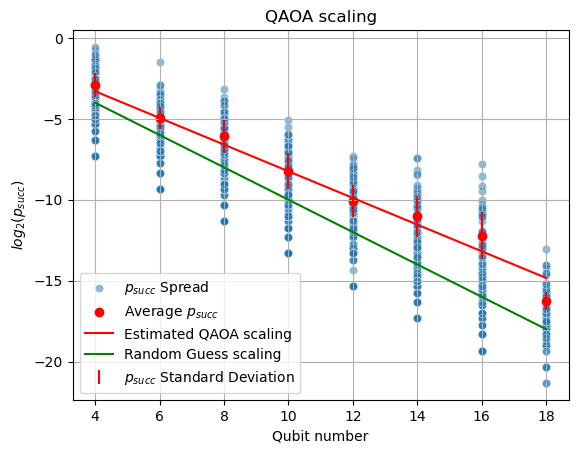

[0.82409872]
[0.02161729]


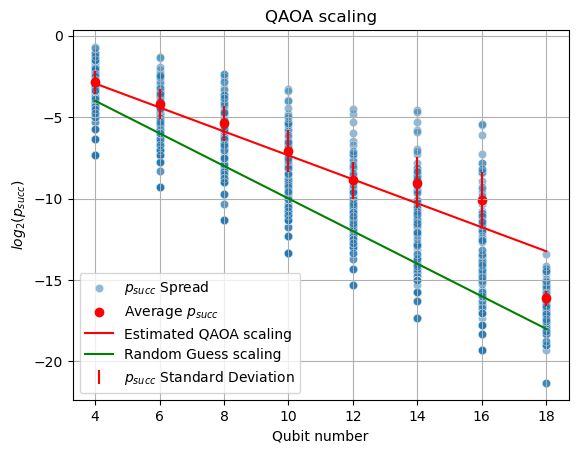

[0.73520157]
[0.04047242]


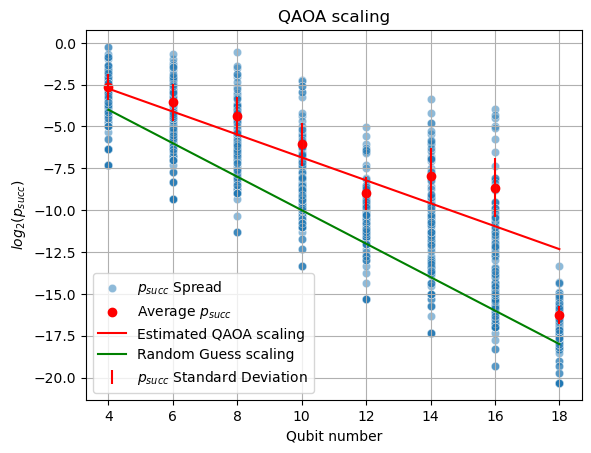

[0.68483644]
[0.05751464]


In [11]:
#Visualizations:
visualize_experiment(experiment_1_1_average, experiment_1_1_spread, 18)
visualize_experiment(experiment_1_1_2_average, experiment_1_1_2_spread, 18)
visualize_experiment(experiment_1_1_3_average, experiment_1_1_3_spread, 18)
#visualize_experiment_spread(experiment_1_1_average, experiment_1_1_spread, 18)

### Complexity scaling (18 qubits, depth 4, 2x5 start circuit [10][2]) Code 1.2

Introduction:

Name: Complexity scaling up to 18 qubits with a different starting circuit

What: find whether the scaling differs in a significant way if we initially train the QAOA parameters on a different circuit

Why: To know whether we need to account from problem variation when performing scaling analysis

Conclusion: No, not really. The difference is in alpha is 0.007

Running parameters:

Name: scaling-up-to-18-2
Bash script name: scaling-18-2.sh

Python script name: VQA-experiments-for-cluster-scaling-18-2.py

Saves to: scaling_up_to_18_2

GPU's: 4

Hours: 2h (took ~ 40 mins)

Job ID: 39744828 

In [17]:
experiment_1_2_result = [(0.13682291666666666, array([0.1375 , 0.01875, 0.025  , 0.28125, 0.13125, 0.09375, 0.10625,
       0.23125, 0.25625, 0.3125 , 0.2375 , 0.26875, 0.0875 , 0.14375,
       0.19375, 0.025  , 0.03125, 0.03125, 0.05625, 0.05   , 0.06875,
       0.275  , 0.1375 , 0.13125, 0.1125 , 0.15625, 0.1625 , 0.2    ,
       0.1375 , 0.1    , 0.20625, 0.14375, 0.1    , 0.21875, 0.0875 ,
       0.05   , 0.05   , 0.2125 , 0.18125, 0.08125, 0.3125 , 0.2875 ,
       0.25   , 0.01875, 0.00625, 0.04375, 0.03125, 0.0125 , 0.25625,
       0.19375, 0.2625 , 0.4125 , 0.1625 , 0.225  , 0.425  , 0.05   ,
       0.04375, 0.4    , 0.04375, 0.0625 , 0.15625, 0.025  , 0.0375 ,
       0.225  , 0.0125 , 0.0125 , 0.08125, 0.1    , 0.05625, 0.2875 ,
       0.125  , 0.1875 , 0.2    , 0.03125, 0.03125, 0.16875, 0.06875,
       0.0875 , 0.1125 , 0.00625, 0.00625, 0.01875, 0.025  , 0.03125,
       0.05   , 0.0625 , 0.09375, 0.45625, 0.01875, 0.0125 , 0.0875 ,
       0.1625 , 0.1375 , 0.11875, 0.01875, 0.01875, 0.1875 , 0.13125,
       0.1375 , 0.0875 , 0.40625, 0.4    , 0.29375, 0.2625 , 0.19375,
       0.53125, 0.03125, 0.03125, 0.43125, 0.13125, 0.18125, 0.0125 ,
       0.06875, 0.04375, 0.16875, 0.15   , 0.1    , 0.0125 , 0.03125,
       0.03125])), (0.08192708333333333, array([0.103125 , 0.0171875, 0.003125 , 0.1328125, 0.059375 , 0.0578125,        
       0.1421875, 0.0203125, 0.06875  , 0.125    , 0.1125   , 0.03125  ,
       0.353125 , 0.0625   , 0.1296875, 0.1609375, 0.0453125, 0.00625  ,
       0.0734375, 0.0078125, 0.009375 , 0.4828125, 0.128125 , 0.2109375,
       0.0609375, 0.03125  , 0.03125  , 0.0140625, 0.0359375, 0.0140625,
       0.20625  , 0.121875 , 0.0953125, 0.0046875, 0.0171875, 0.025    ,
       0.23125  , 0.090625 , 0.0125   , 0.23125  , 0.1890625, 0.103125 ,
       0.0328125, 0.0015625, 0.0046875, 0.0171875, 0.0234375, 0.0046875,
       0.1078125, 0.1296875, 0.1796875, 0.0484375, 0.1      , 0.0390625,
       0.009375 , 0.0421875, 0.0421875, 0.034375 , 0.0015625, 0.0609375,
       0.365625 , 0.1453125, 0.05625  , 0.2078125, 0.0625   , 0.0078125,
       0.1078125, 0.0984375, 0.0203125, 0.24375  , 0.2203125, 0.225    ,
       0.075    , 0.015625 , 0.0140625, 0.1078125, 0.0015625, 0.03125  ,
       0.06875  , 0.003125 , 0.228125 , 0.01875  , 0.05     , 0.0078125,
       0.028125 , 0.0359375, 0.1109375, 0.09375  , 0.021875 , 0.0015625,
       0.0203125, 0.0703125, 0.0015625, 0.009375 , 0.0140625, 0.0046875,
       0.1078125, 0.0609375, 0.04375  , 0.2546875, 0.0140625, 0.00625  ,
       0.2328125, 0.1875   , 0.175    , 0.0640625, 0.1      , 0.0046875,
       0.26875  , 0.1265625, 0.0734375, 0.01875  , 0.0125   , 0.0515625,
       0.021875 , 0.0078125, 0.015625 , 0.1390625, 0.09375  , 0.015625 ])), (0.05033854166666667, array([0.00039063, 0.0015625 , 0.01289062, 0.01640625, 0.04414063,
       0.0203125 , 0.06210938, 0.00703125, 0.05585938, 0.059375  ,
       0.09609375, 0.1125    , 0.02695313, 0.01171875, 0.24257813,
       0.00195312, 0.06523438, 0.29296875, 0.00195312, 0.02148438,
       0.05546875, 0.021875  , 0.06992187, 0.20976563, 0.03671875,
       0.0046875 , 0.01171875, 0.0078125 , 0.02070312, 0.00585938,
       0.00976562, 0.09101563, 0.1546875 , 0.00742187, 0.01289062,
       0.00390625, 0.02773437, 0.01796875, 0.05117187, 0.11289062,
       0.12421875, 0.06953125, 0.00195312, 0.01757812, 0.00390625,
       0.00078125, 0.0234375 , 0.00234375, 0.0609375 , 0.09257812,
       0.05507813, 0.0625    , 0.01875   , 0.02851563, 0.00429688,
       0.01445313, 0.00546875, 0.00546875, 0.0078125 , 0.01953125,
       0.0015625 , 0.13046875, 0.2890625 , 0.00039063, 0.00625   ,
       0.04453125, 0.009375  , 0.0671875 , 0.14609375, 0.0390625 ,
       0.20976563, 0.27851562, 0.00195312, 0.01953125, 0.07382812,
       0.00234375, 0.01054688, 0.22734375, 0.00195312, 0.01757812,
       0.00664062, 0.00195312, 0.01992187, 0.0046875 , 0.009375  ,
       0.03164062, 0.02851562, 0.00039063, 0.03125   , 0.06835938,
       0.021875  , 0.04023437, 0.015625  , 0.00195312, 0.0015625 ,
       0.05429687, 0.01523437, 0.04414063, 0.07265625, 0.16328125,
       0.00429688, 0.05585938, 0.05664062, 0.18398438, 0.22734375,
       0.00195312, 0.01953125, 0.00585938, 0.03164062, 0.06015625,
       0.18242187, 0.003125  , 0.003125  , 0.05039062, 0.01523437,
       0.04765625, 0.00390625, 0.00195312, 0.07539062, 0.09257812])), (0.022195638020833332, array([4.88281250e-04, 4.49218750e-03, 1.26953125e-03, 4.88281250e-04,
       9.08203125e-03, 4.88281250e-04, 9.08203125e-03, 1.55273437e-02,
       8.39843750e-03, 6.34765625e-03, 1.13671875e-01, 1.66015625e-03,
       1.98242188e-02, 3.54492187e-02, 2.63671875e-02, 2.63671875e-03,
       1.91992188e-01, 2.92968750e-04, 4.88281250e-04, 2.78320312e-02,
       4.88281250e-04, 1.92382812e-02, 4.02343750e-02, 2.66601563e-02,
       3.51562500e-03, 1.95312500e-03, 1.39648438e-02, 6.83593750e-04,
       6.34765625e-03, 1.85546875e-03, 8.10546875e-03, 1.12304688e-01,
       4.29687500e-03, 9.76562500e-05, 3.51562500e-03, 4.88281250e-04,
       1.40625000e-02, 1.08398438e-02, 1.29882813e-02, 2.41210937e-02,
       6.80664063e-02, 3.11523437e-02, 8.78906250e-04, 1.19140625e-02,
       6.83593750e-04, 1.17187500e-03, 7.81250000e-04, 3.90625000e-04,
       1.09375000e-02, 6.82617187e-02, 4.88281250e-04, 3.12500000e-03,
       6.93359375e-03, 1.17187500e-03, 6.83593750e-04, 4.58984375e-03,
       9.76562500e-05, 3.22265625e-03, 8.20312500e-03, 9.76562500e-05,
       1.69921875e-02, 1.49121094e-01, 8.69140625e-03, 3.90625000e-04,
       6.34765625e-03, 1.26953125e-03, 3.80859375e-03, 1.15820313e-01,
       2.73437500e-03, 1.72851562e-02, 2.22949219e-01, 4.58984375e-03,
       4.88281250e-04, 5.71289062e-02, 8.78906250e-04, 3.04687500e-02,
       2.20507812e-01, 2.14843750e-03, 4.88281250e-04, 4.88281250e-04,
       5.85937500e-04, 8.78906250e-04, 2.64648437e-02, 1.66015625e-03,
       3.02734375e-03, 1.93359375e-02, 1.56250000e-03, 1.95312500e-04,
       4.51171875e-02, 4.88281250e-04, 3.71093750e-03, 3.48632813e-02,
       5.17578125e-03, 7.81250000e-04, 5.85937500e-04, 4.88281250e-04,
       4.49218750e-03, 4.05273438e-02, 8.78906250e-04, 1.47460937e-02,
       2.11914062e-02, 1.85546875e-03, 1.49414063e-02, 2.18945312e-01,
       7.61718750e-03, 3.90625000e-04, 2.14843750e-03, 4.88281250e-04,
       7.32421875e-03, 1.02539062e-01, 3.80859375e-03, 7.81250000e-04,
       5.00976562e-02, 3.90625000e-04, 8.78906250e-04, 6.57226562e-02,
       2.92968750e-04, 7.42187500e-03, 8.28125000e-02, 1.17187500e-03])), (0.003816731770833333, array([1.95312500e-04, 1.12304688e-03, 9.52148437e-04, 1.29394531e-03,
       5.56640625e-03, 3.41796875e-04, 2.53906250e-03, 3.90625000e-04,
       8.54492188e-04, 9.86328125e-03, 9.76562500e-05, 3.07617187e-03,
       1.06445312e-02, 1.59667969e-02, 9.27734375e-04, 4.83398438e-03,
       3.44238281e-03, 1.70898437e-04, 9.76562500e-05, 2.44140625e-04,
       7.56835937e-04, 2.51464844e-02, 2.79785156e-02, 1.26953125e-03,
       1.12304687e-03, 1.73339844e-03, 1.22070312e-04, 1.70898437e-04,
       1.46484375e-04, 1.95312500e-04, 1.30371094e-02, 1.29394531e-02,
       6.34765625e-04, 7.32421875e-05, 1.22070312e-04, 3.66210938e-04,
       9.91210938e-03, 1.31835938e-03, 3.66210938e-04, 1.82373047e-02,
       7.22656250e-03, 5.61523437e-04, 2.92968750e-04, 1.12304687e-03,
       2.19726562e-04, 2.09960937e-03, 6.59179688e-04, 7.32421875e-05,
       9.57031250e-03, 4.88281250e-05, 2.92968750e-04, 1.26953125e-03,
       6.42089844e-03, 3.66210938e-04, 4.15039063e-04, 2.92968750e-04,
       2.68554688e-04, 1.44042969e-03, 1.51367188e-03, 1.46484375e-04,
       2.72949219e-02, 1.90429687e-03, 1.22070312e-04, 7.08007812e-04,
       2.14843750e-03, 8.30078125e-04, 5.51757813e-03, 2.63671875e-03,
       1.70898437e-04, 3.20800781e-02, 8.15429687e-03, 7.32421875e-05,
       3.41796875e-04, 1.06933594e-02, 4.88281250e-05, 3.34716797e-02,
       4.93164062e-03, 2.44140625e-05, 1.22070312e-04, 1.02539063e-03,
       4.63867187e-04, 5.12695313e-04, 5.85937500e-04, 3.66210938e-04,
       2.12402344e-03, 1.24511719e-02, 3.41796875e-04, 5.61523437e-04,
       3.39355469e-03, 3.90625000e-04, 2.80761719e-03, 6.05468750e-03,
       8.78906250e-04, 1.22070312e-04, 1.92871094e-03, 1.14746094e-03,
       4.17480469e-03, 3.90625000e-04, 2.44140625e-05, 3.36914062e-03,
       7.08007812e-04, 2.44140625e-05, 2.54394531e-02, 1.28662109e-02,
       7.32421875e-05, 1.04980469e-03, 1.07421875e-03, 5.12695313e-04,
       1.04980469e-02, 2.66113281e-03, 9.27734375e-04, 2.44140625e-05,
       2.56347656e-03, 2.44140625e-05, 2.92968750e-03, 1.02539063e-03,
       1.22070312e-04, 7.15332031e-03, 1.24511719e-03, 1.22070312e-04])), (0.005410359700520833, array([6.10351562e-05, 2.01416016e-04, 1.22070313e-05, 7.20214844e-04,
       9.09423828e-04, 5.85937500e-04, 8.48388672e-04, 5.10864258e-03,
       1.40380859e-04, 1.10290527e-02, 9.16748047e-03, 1.09863281e-04,
       2.91137695e-03, 3.05358887e-02, 8.85009766e-04, 7.89794922e-03,
       2.84790039e-02, 3.05175781e-05, 6.16455078e-04, 9.58251953e-04,
       2.44140625e-05, 1.80419922e-02, 5.20812988e-02, 3.41796875e-04,
       2.80761719e-04, 5.06591797e-04, 7.99560547e-04, 1.95312500e-04,
       9.15527344e-05, 2.86865234e-04, 1.28784180e-02, 1.76818848e-02,
       4.57763672e-04, 9.76562500e-05, 6.10351563e-06, 2.44140625e-05,
       3.48510742e-03, 8.84399414e-03, 4.88281250e-04, 1.91589355e-02,
       1.29211426e-02, 2.25830078e-04, 6.34765625e-04, 2.68554688e-04,
       6.10351563e-06, 8.54492187e-04, 7.32421875e-05, 1.28173828e-04,
       9.83886719e-03, 3.99780273e-03, 1.22070313e-05, 6.77490234e-04,
       2.09350586e-03, 2.01416016e-04, 2.62451172e-04, 7.93457031e-05,
       3.05175781e-05, 1.40380859e-03, 8.17871094e-04, 1.95312500e-04,
       2.91015625e-02, 5.87585449e-02, 2.99072266e-04, 5.18798828e-04,
       2.17285156e-03, 1.34277344e-04, 6.56738281e-03, 6.27441406e-03,
       3.05175781e-05, 4.14916992e-02, 4.49951172e-02, 6.71386719e-04,
       6.28662109e-04, 2.40478516e-03, 3.05175781e-05, 2.47009277e-02,
       6.70166016e-03, 1.09863281e-04, 2.68554688e-04, 2.07519531e-04,
       3.05175781e-05, 3.35693359e-04, 1.17797852e-03, 1.28173828e-04,
       1.68457031e-03, 1.62353516e-03, 1.70898437e-04, 1.50756836e-03,
       3.46069336e-03, 3.05175781e-05, 1.78833008e-03, 3.83911133e-03,
       3.35693359e-04, 3.66210937e-05, 1.22070312e-04, 7.32421875e-05,
       3.93066406e-03, 4.25415039e-03, 2.44140625e-05, 1.55639648e-03,
       5.51147461e-03, 3.17382813e-04, 3.16284180e-02, 2.67395020e-02,
       1.29394531e-03, 3.23486328e-04, 1.00708008e-03, 1.28173828e-04,
       1.13037109e-02, 2.40417480e-02, 6.10351562e-05, 3.05175781e-05,
       2.49633789e-03, 6.10351562e-05, 3.80249023e-03, 3.09448242e-03,
       3.35693359e-04, 8.12988281e-03, 5.01098633e-03, 4.27246094e-05])), (0.0030914433797200524, array([9.15527344e-06, 
7.01904297e-05, 1.99890137e-04, 3.66210937e-05,
       1.95312500e-04, 1.06811523e-04, 3.67736816e-04, 2.21557617e-03,
       4.88281250e-05, 2.94494629e-04, 1.13510132e-02, 4.57763672e-06,
       1.68304443e-03, 1.35681152e-02, 1.01928711e-03, 1.66320801e-04,
       3.70468140e-02, 3.35693359e-05, 7.62939453e-06, 1.42364502e-03,
       1.37329102e-05, 2.94342041e-03, 2.03399658e-02, 3.68652344e-03,
       3.96728516e-05, 1.25122070e-04, 1.23596191e-04, 1.52587891e-06,
       8.08715820e-05, 3.96728516e-05, 5.88989258e-04, 1.79443359e-02,
       9.88769531e-04, 7.62939453e-06, 7.62939453e-06, 4.57763672e-06,
       9.99450684e-04, 2.83966064e-03, 1.54113770e-04, 1.99432373e-03,
       1.18103027e-02, 4.19616699e-04, 2.13623047e-05, 1.01165771e-03,
       2.44140625e-05, 8.23974609e-05, 4.53186035e-04, 1.67846680e-05,
       4.24194336e-04, 4.79736328e-03, 4.11987305e-05, 5.18798828e-05,
       5.12695312e-04, 1.03759766e-04, 1.52587891e-06, 5.34057617e-05,
       7.62939453e-06, 1.19018555e-04, 6.11877441e-04, 1.37329102e-05,
       1.87072754e-03, 4.90585327e-02, 1.69677734e-03, 6.25610352e-05,
       3.82995605e-04, 9.91821289e-05, 9.00268555e-05, 9.28802490e-03,
       2.28881836e-05, 1.60980225e-03, 5.25558472e-02, 1.39617920e-03,
       7.62939453e-06, 3.04260254e-03, 1.67846680e-05, 6.60705566e-04,
       1.81945801e-02, 1.19018555e-04, 7.62939453e-06, 2.74658203e-05,
       1.67846680e-05, 7.62939453e-06, 5.38635254e-04, 7.62939453e-06,
       6.25610352e-05, 1.50756836e-03, 3.40270996e-04, 9.15527344e-06,
       3.12500000e-03, 7.62939453e-06, 4.27246094e-05, 7.69042969e-04,
       1.57165527e-04, 4.57763672e-06, 2.54821777e-04, 7.78198242e-05,
       1.52587891e-04, 3.53546143e-03, 8.08715820e-05, 8.75854492e-04,
       2.67486572e-03, 2.28881836e-05, 1.05743408e-03, 3.53637695e-02,
       2.17285156e-03, 2.89916992e-05, 1.69372559e-04, 7.17163086e-05,
       5.95092773e-04, 2.04467773e-02, 6.05773926e-04, 4.57763672e-06,
       3.07464600e-03, 4.42504883e-05, 1.37329102e-05, 3.14178467e-03,
       4.57763672e-05, 2.02941895e-04, 6.08367920e-03, 1.83105469e-05])), (3.3381779988606775e-05, array([1.90734863e-06, 2.05993652e-05, 1.25885010e-05, 5.72204590e-06,
       1.86920166e-05, 3.81469727e-06, 1.10626221e-05, 1.10626221e-05,
       9.15527344e-06, 4.19616699e-06, 5.72204590e-06, 3.81469727e-06,
       8.01086426e-06, 9.53674316e-06, 1.14440918e-06, 1.94549561e-05,
       2.47955322e-05, 5.34057617e-06, 1.14440918e-05, 1.22070312e-05,
       3.05175781e-06, 3.00598145e-04, 2.83432007e-04, 2.37274170e-04,
       9.15527344e-06, 1.10626221e-05, 4.95910645e-06, 7.24792480e-06,
       9.15527344e-06, 1.44958496e-05, 2.91442871e-04, 7.05718994e-05,
       2.28118896e-04, 3.81469727e-06, 1.75476074e-05, 9.53674316e-06,
       1.90734863e-06, 2.67028809e-05, 4.57763672e-06, 4.57763672e-06,
       5.34057617e-06, 7.62939453e-07, 6.48498535e-06, 6.86645508e-06,
       1.52587891e-06, 3.05175781e-06, 1.86920166e-05, 2.67028809e-06,
       7.62939453e-07, 5.72204590e-06, 2.28881836e-06, 1.90734863e-06,
       6.48498535e-06, 1.14440918e-06, 1.83105469e-05, 1.67846680e-05,
       2.67028809e-06, 1.52587891e-06, 1.02996826e-05, 6.48498535e-06,
       2.75421143e-04, 1.64031982e-05, 2.02178955e-04, 9.15527344e-06,
       1.56402588e-05, 6.86645508e-06, 1.52587891e-05, 1.37329102e-05,
       3.01361084e-05, 7.17163086e-05, 1.08337402e-04, 2.44140625e-05,
       1.90734863e-06, 5.34057617e-06, 5.72204590e-06, 8.39233398e-06,
       9.91821289e-06, 9.53674316e-06, 1.33514404e-05, 1.10626221e-05,
       6.48498535e-06, 3.43322754e-06, 3.05175781e-05, 2.28881836e-06,
       1.22070313e-05, 2.40325928e-05, 1.29699707e-05, 6.86645508e-06,
       2.93731689e-05, 5.91278076e-05, 8.01086426e-06, 1.79290771e-05,
       1.10626221e-05, 8.01086426e-06, 9.15527344e-06, 6.10351563e-06,
       8.77380371e-06, 9.15527344e-06, 2.28881836e-06, 3.81469727e-07,
       8.39233398e-06, 1.44958496e-05, 4.02832031e-04, 1.39617920e-04,
       1.73950195e-04, 4.57763672e-06, 1.48773193e-05, 2.67028809e-05,
       5.03540039e-05, 1.52587891e-05, 2.02178955e-05, 3.81469727e-06,
       1.02996826e-05, 2.28881836e-06, 2.28881836e-06, 1.06811523e-05,
       5.72204590e-06, 8.23974609e-05, 9.91821289e-06, 2.51770020e-05]))]

experiment_1_2_average = [x for (x, y) in experiment_1_2_result]
experiment_1_2_spread = [y for (x, y) in experiment_1_2_result]

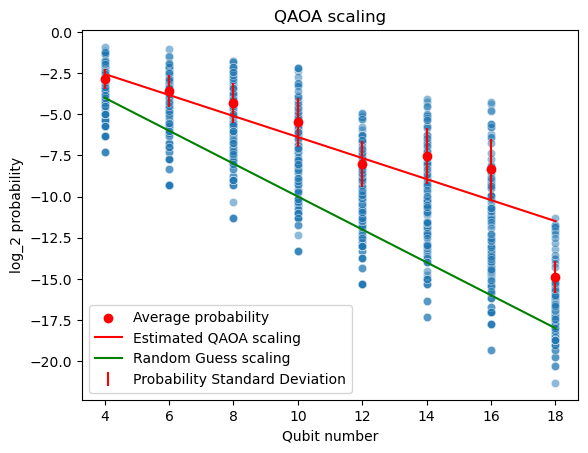

[0.63861056]
[0.04841096]


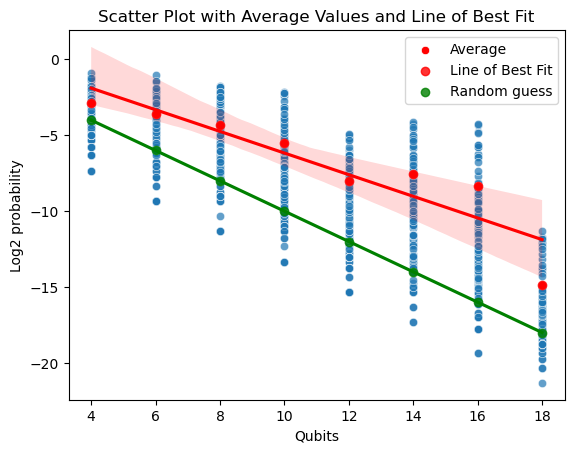

In [126]:
# visualization:
visualize_experiment(experiment_1_2_average, experiment_1_2_spread, 18)
visualize_experiment_spread(experiment_1_2_average, experiment_1_2_spread, 18)

### Complexity scaling (18 qubits, depth 6) Code 1.3

Introduction:

Name: Complexity scaling up to 18 qubits with a depth 6 circuit.

What: Run complexity scaling with a depth 6 circuit

Why: the aim is to find whether there is much difference from depth 4 variant

Conclusion:


Running parameters:

Bash script name: scaling-18-depth6.sh

Python script name: VQA-experiments-for-cluster-scaling-18-depth6.py

Hours: 2h (ran in 40 mins)

GPU's: 2

Job ID: 39744946

In [4]:
experiment_1_3_result = [(0.10197916666666666, array([0.0375 , 0.0125 , 0.04375, 0.06875, 0.0625 , 0.04375, 0.44375,
       0.04375, 0.10625, 0.03125, 0.025  , 0.05625, 0.2125 , 0.0375 ,
       0.01875, 0.08125, 0.00625, 0.00625, 0.2375 , 0.06875, 0.1    ,
       0.25   , 0.09375, 0.08125, 0.13125, 0.03125, 0.025  , 0.54375,
       0.03125, 0.03125, 0.15625, 0.06875, 0.05   , 0.1    , 0.04375,
       0.025  , 0.39375, 0.1    , 0.06875, 0.2125 , 0.0125 , 0.0125 ,
       0.11875, 0.13125, 0.1875 , 0.2125 , 0.0875 , 0.125  , 0.05625,
       0.075  , 0.075  , 0.0125 , 0.01875, 0.0125 , 0.0375 , 0.03125,
       0.025  , 0.19375, 0.04375, 0.075  , 0.3125 , 0.00625, 0.03125,
       0.1125 , 0.0375 , 0.0375 , 0.1375 , 0.1625 , 0.14375, 0.34375,
       0.00625, 0.03125, 0.20625, 0.1    , 0.10625, 0.04375, 0.30625,
       0.25625, 0.4    , 0.025  , 0.01875, 0.50625, 0.01875, 0.03125,
       0.1625 , 0.10625, 0.10625, 0.175  , 0.00625, 0.03125, 0.19375,
       0.01875, 0.04375, 0.39375, 0.03125, 0.00625, 0.0125 , 0.26875,
       0.23125, 0.10625, 0.1125 , 0.09375, 0.0625 , 0.0125 , 0.01875,
       0.19375, 0.05   , 0.05   , 0.05   , 0.03125, 0.0125 , 0.05625,
       0.10625, 0.10625, 0.075  , 0.00625, 0.0125 , 0.13125, 0.05   ,
       0.00625])), (0.03404947916666666, array([0.05     , 0.0390625, 0.0359375, 0.2546875, 0.05     , 0.025    ,
       0.11875  , 0.0359375, 0.009375 , 0.003125 , 0.00625  , 0.009375 ,
       0.0046875, 0.0296875, 0.034375 , 0.0125   , 0.0078125, 0.0078125,
       0.1234375, 0.06875  , 0.0703125, 0.046875 , 0.075    , 0.0109375,
       0.015625 , 0.0171875, 0.0953125, 0.0015625, 0.0078125, 0.003125 ,
       0.0234375, 0.009375 , 0.040625 , 0.028125 , 0.0203125, 0.0078125,
       0.0265625, 0.00625  , 0.0171875, 0.0953125, 0.028125 , 0.0125   ,
       0.0453125, 0.059375 , 0.0078125, 0.003125 , 0.0375   , 0.009375 ,
       0.009375 , 0.0078125, 0.0578125, 0.0078125, 0.0296875, 0.0078125,
       0.0375   , 0.003125 , 0.05     , 0.0328125, 0.03125  , 0.0234375,
       0.0140625, 0.0484375, 0.0875   , 0.1078125, 0.0046875, 0.003125 ,
       0.0375   , 0.015625 , 0.03125  , 0.0171875, 0.0140625, 0.0953125,
       0.0328125, 0.0296875, 0.0109375, 0.0390625, 0.0890625, 0.0078125,
       0.028125 , 0.015625 , 0.0109375, 0.025    , 0.0171875, 0.0140625,
       0.0578125, 0.015625 , 0.0140625, 0.0046875, 0.00625  , 0.0078125,
       0.0046875, 0.0015625, 0.0015625, 0.0140625, 0.0046875, 0.0015625,
       0.2078125, 0.1375   , 0.01875  , 0.1515625, 0.0359375, 0.096875 ,
       0.0046875, 0.0078125, 0.003125 , 0.1515625, 0.0125   , 0.009375 ,
       0.0078125, 0.0078125, 0.0140625, 0.0765625, 0.034375 , 0.0078125,
       0.009375 , 0.0125   , 0.059375 , 0.025    , 0.0109375, 0.0046875])), (0.014365234374999999, array([0.00039063, 0.00546875, 0.00546875, 0.00898437, 0.02890625,
       0.07617188, 0.0046875 , 0.02617188, 0.0234375 , 0.0015625 ,
       0.01679687, 0.00898437, 0.003125  , 0.01445313, 0.009375  ,
       0.00195312, 0.00039063, 0.00195312, 0.00859375, 0.0140625 ,
       0.03828125, 0.00703125, 0.04101562, 0.04492188, 0.0015625 ,
       0.003125  , 0.009375  , 0.00195312, 0.00078125, 0.00078125,
       0.00234375, 0.00390625, 0.00625   , 0.00195312, 0.01640625,
       0.01914063, 0.009375  , 0.0109375 , 0.01210937, 0.00195312,
       0.0078125 , 0.04804688, 0.02148438, 0.0109375 , 0.0046875 ,
       0.015625  , 0.0203125 , 0.0265625 , 0.00546875, 0.003125  ,
       0.0203125 , 0.00195312, 0.015625  , 0.01796875, 0.00195312,
       0.0140625 , 0.03007813, 0.00585938, 0.02226562, 0.00625   ,
       0.00195312, 0.01484375, 0.10742188, 0.00195312, 0.01914063,
       0.00703125, 0.01523437, 0.00664063, 0.02109375, 0.00195312,
       0.02148437, 0.00117188, 0.01640625, 0.01132812, 0.00039063,
       0.08671875, 0.01289062, 0.003125  , 0.00195312, 0.00507813,
       0.01367188, 0.00078125, 0.0046875 , 0.02695313, 0.01210938,
       0.003125  , 0.03242188, 0.00195312, 0.00273437, 0.04414063,
       0.00039063, 0.00039063, 0.00039063, 0.00195312, 0.003125  ,
       0.00546875, 0.05664062, 0.02890625, 0.10390625, 0.01914063,
       0.00390625, 0.05078125, 0.00195312, 0.00273437, 0.00585938,
       0.00390625, 0.01171875, 0.01523437, 0.00195312, 0.0296875 ,
       0.0015625 , 0.003125  , 0.02851562, 0.01289062, 0.00039063,
       0.01796875, 0.0015625 , 0.00195312, 0.00507813, 0.0078125 ])), (0.0031567382812500004, array([4.88281250e-04, 7.32421875e-03, 4.88281250e-04, 4.58984375e-03,
       9.17968750e-03, 8.78906250e-04, 1.75781250e-03, 1.67968750e-02,
       2.73437500e-03, 6.83593750e-04, 5.37109375e-03, 4.88281250e-04,
       1.26953125e-03, 9.76562500e-03, 1.95312500e-03, 4.88281250e-04,
       4.88281250e-04, 4.88281250e-04, 3.51562500e-03, 6.25000000e-03,
       2.73437500e-03, 3.90625000e-04, 2.08984375e-02, 9.76562500e-04,
       1.17187500e-03, 2.44140625e-03, 1.07421875e-03, 4.88281250e-04,
       5.85937500e-04, 4.88281250e-04, 9.76562500e-05, 2.63671875e-03,
       4.88281250e-04, 9.76562500e-05, 1.38671875e-02, 3.90625000e-04,
       1.26953125e-03, 2.05078125e-03, 1.26953125e-03, 4.88281250e-04,
       9.57031250e-03, 7.81250000e-04, 1.26953125e-03, 8.20312500e-03,
       1.95312500e-03, 1.56250000e-03, 7.22656250e-03, 9.76562500e-05,
       4.88281250e-04, 1.40625000e-02, 3.90625000e-04, 9.76562500e-05,
       8.30078125e-03, 4.88281250e-04, 3.90625000e-04, 1.34765625e-02,
       2.05078125e-03, 8.78906250e-04, 6.05468750e-03, 3.12500000e-03,
       1.07421875e-03, 5.27343750e-03, 7.81250000e-04, 2.05078125e-03,
       3.80859375e-03, 3.90625000e-04, 1.26953125e-03, 7.81250000e-04,
       8.78906250e-04, 2.92968750e-04, 3.80859375e-03, 1.36718750e-03,
       9.76562500e-04, 1.95312500e-03, 4.29687500e-03, 2.92968750e-03,
       5.85937500e-04, 3.90625000e-04, 4.88281250e-04, 5.66406250e-03,
       1.95312500e-04, 9.76562500e-05, 4.88281250e-03, 9.76562500e-05,
       3.90625000e-04, 6.25000000e-03, 1.56250000e-03, 2.92968750e-04,
       1.31835938e-02, 4.88281250e-04, 4.88281250e-04, 1.95312500e-04,
       4.88281250e-04, 4.88281250e-04, 2.92968750e-03, 4.88281250e-04,
       7.12890625e-03, 3.33007812e-02, 7.22656250e-03, 1.46484375e-03,
       7.81250000e-03, 1.07421875e-03, 1.95312500e-04, 1.26953125e-03,
       1.95312500e-04, 8.78906250e-04, 9.17968750e-03, 1.95312500e-04,
       2.92968750e-04, 3.90625000e-04, 2.92968750e-04, 4.88281250e-04,
       8.59375000e-03, 8.78906250e-04, 1.95312500e-04, 6.73828125e-03,
       6.83593750e-04, 2.92968750e-04, 8.59375000e-03, 4.88281250e-04])), (0.0009698486328124998, array([1.39160156e-03, 1.48925781e-03, 2.19726562e-04, 5.83496094e-03,
       1.29394531e-03, 4.88281250e-04, 1.51367188e-03, 2.19726562e-04,
       3.41796875e-04, 5.37109375e-04, 8.05664062e-04, 4.15039062e-04,
       1.24511719e-03, 5.37109375e-04, 5.37109375e-04, 1.22070312e-04,
       4.63867188e-04, 1.70898437e-04, 3.44238281e-03, 1.43066406e-02,
       1.46484375e-04, 1.95312500e-04, 1.19628906e-03, 1.46484375e-04,
       6.10351562e-04, 2.85644531e-03, 1.80664063e-03, 1.22070312e-04,
       9.03320312e-04, 9.76562500e-05, 2.44140625e-05, 2.17285156e-03,
       3.17382812e-04, 2.68554688e-04, 4.88281250e-04, 2.19726563e-04,
       6.83593750e-04, 1.12304688e-03, 7.08007812e-04, 3.66210938e-04,
       2.44140625e-03, 1.95312500e-04, 1.12304687e-03, 1.44042969e-03,
       4.63867187e-04, 6.34765625e-04, 1.70898438e-04, 3.41796875e-04,
       4.88281250e-05, 3.97949219e-03, 1.70898437e-04, 2.19726563e-04,
       2.44140625e-04, 2.05078125e-03, 6.83593750e-04, 8.30078125e-04,
       2.92968750e-04, 4.39453125e-04, 1.70898438e-03, 1.19628906e-03,
       5.85937500e-04, 1.31835938e-03, 7.32421875e-04, 8.05664062e-04,
       9.03320313e-04, 2.46582031e-03, 7.56835938e-04, 9.52148438e-04,
       6.83593750e-04, 1.95312500e-04, 2.00195312e-03, 7.56835938e-04,
       3.41796875e-04, 1.46484375e-04, 1.22070312e-04, 9.76562500e-04,
       4.15039062e-04, 5.61523437e-04, 1.46484375e-04, 9.76562500e-05,
       5.37109375e-04, 2.44140625e-04, 5.37109375e-04, 1.46484375e-04,
       1.95312500e-04, 2.68554688e-04, 1.09863281e-03, 1.22070312e-04,
       2.12402344e-03, 1.02539062e-03, 1.22070312e-04, 1.22070312e-04,
       1.36718750e-03, 1.22070312e-04, 5.85937500e-04, 3.17382812e-04,
       6.68945312e-03, 1.78222656e-03, 7.32421875e-05, 1.07421875e-03,
       1.17187500e-03, 1.46484375e-04, 7.32421875e-05, 1.48925781e-03,
       6.59179688e-04, 1.46484375e-04, 2.56347656e-03, 4.88281250e-05,
       1.70898437e-04, 1.07421875e-03, 1.22070312e-04, 1.29394531e-03,
       5.12695312e-04, 9.76562500e-05, 1.04980469e-03, 1.04980469e-03,
       1.46484375e-04, 3.41796875e-04, 1.92871094e-03, 2.68554688e-04])), (0.00048233032226562505, array([6.71386719e-04, 1.72119141e-03, 5.31005859e-04, 3.27148438e-03,
       1.16027832e-02, 1.22070312e-04, 1.48315430e-03, 1.97143555e-03,
       1.22070313e-05, 4.27246094e-04, 5.55419922e-04, 1.83105469e-05,
       4.08935547e-04, 7.93457031e-05, 1.83105469e-05, 6.10351563e-06,
       3.05175781e-05, 3.05175781e-05, 1.24511719e-03, 2.45971680e-03,
       9.70458984e-04, 5.06591797e-04, 8.17871094e-04, 2.13623047e-04,
       4.33349609e-04, 6.53076172e-04, 6.10351563e-06, 3.05175781e-05,
       6.10351563e-06, 3.05175781e-05, 1.83105469e-05, 2.44140625e-04,
       1.83105469e-05, 2.07519531e-04, 1.89208984e-04, 1.22070313e-05,
       9.76562500e-05, 1.22070312e-04, 3.47900391e-04, 1.40380859e-04,
       1.58691406e-04, 6.10351563e-06, 1.83105469e-04, 1.34277344e-04,
       2.44140625e-05, 4.27246094e-04, 1.28173828e-04, 1.22070313e-05,
       3.66210938e-05, 1.83105469e-05, 2.44140625e-05, 2.56347656e-04,
       9.15527344e-05, 6.10351563e-06, 8.72802734e-04, 2.12402344e-03,
       4.27246094e-05, 5.49316406e-04, 1.70898438e-04, 5.49316406e-05,
       1.40380859e-03, 6.95800781e-04, 3.05175781e-05, 4.33349609e-04,
       1.40380859e-04, 4.27246094e-05, 3.54003906e-04, 1.40380859e-04,
       2.68554688e-04, 2.44140625e-04, 3.05175781e-05, 1.83105469e-05,
       1.22070312e-04, 4.88281250e-05, 3.05175781e-05, 1.52587891e-04,
       9.15527344e-05, 5.00488281e-04, 1.15966797e-04, 1.83105469e-04,
       3.05175781e-05, 1.89208984e-04, 7.50732422e-04, 6.71386719e-05,
       3.66210937e-05, 1.58691406e-03, 1.58691406e-04, 3.66210937e-05,
       6.83593750e-04, 1.22070313e-05, 3.05175781e-05, 3.05175781e-05,
       6.10351563e-06, 6.10351563e-06, 1.22070313e-05, 6.10351563e-06,
       3.71704102e-03, 2.02636719e-03, 2.44140625e-04, 1.40380859e-04,
       7.69042969e-04, 3.29589844e-04, 1.03759766e-04, 3.05175781e-05,
       3.05175781e-05, 2.44140625e-04, 4.45556641e-04, 9.15527344e-05,
       6.34765625e-04, 1.40380859e-04, 3.66210937e-05, 1.00097656e-03,
       7.08007812e-04, 1.22070313e-05, 3.54003906e-04, 7.26318359e-04,
       3.05175781e-05, 1.40380859e-04, 3.05175781e-05, 1.46484375e-04])), (0.00018274943033854164, array([7.62939453e-06, 5.43212891e-04, 3.05175781e-05, 4.54711914e-04,
       2.88391113e-03, 2.28881836e-05, 1.09863281e-04, 1.20849609e-03,
       2.28881836e-05, 3.05175781e-06, 1.54113770e-04, 1.98364258e-05,
       3.05175781e-06, 3.58581543e-04, 1.06811523e-05, 7.62939453e-06,
       3.05175781e-06, 4.57763672e-06, 1.23596191e-04, 7.18688965e-04,
       6.57653809e-04, 4.88281250e-05, 2.73132324e-04, 5.18798828e-05,
       1.06811523e-05, 3.61633301e-04, 3.05175781e-05, 7.62939453e-06,
       3.05175781e-06, 4.57763672e-06, 7.62939453e-06, 4.73022461e-05,
       2.44140625e-05, 1.52587891e-06, 2.99072266e-04, 3.05175781e-06,
       2.59399414e-05, 9.15527344e-06, 1.06811523e-05, 1.67846680e-05,
       5.17272949e-04, 1.52587891e-06, 1.06811523e-05, 6.86645508e-05,
       2.13623047e-05, 6.10351563e-06, 1.54113770e-04, 3.20434570e-05,
       7.62939453e-06, 1.92260742e-04, 1.98364258e-05, 7.62939453e-06,
       1.05285645e-04, 7.62939453e-06, 1.52587891e-06, 2.39410400e-03,
       5.64575195e-05, 2.13623047e-05, 2.57873535e-04, 3.20434570e-05,
       6.10351563e-06, 1.69525146e-03, 3.20434570e-05, 3.20434570e-05,
       4.92858887e-04, 5.64575195e-05, 1.52587891e-06, 9.46044922e-05,
       1.06811523e-05, 7.62939453e-06, 1.02233887e-04, 2.13623047e-05,
       1.67846680e-05, 3.35693359e-05, 1.52587891e-06, 7.62939453e-06,
       1.52587891e-06, 1.06811523e-05, 7.62939453e-06, 1.11389160e-04,
       1.52587891e-06, 3.05175781e-06, 9.46044922e-05, 9.15527344e-06,
       1.52587891e-06, 4.60815430e-04, 9.15527344e-06, 1.52587891e-06,
       6.97326660e-04, 4.57763672e-06, 7.62939453e-06, 7.62939453e-06,
       9.15527344e-06, 7.62939453e-06, 7.62939453e-06, 7.62939453e-06,
       4.51660156e-04, 3.19061279e-03, 2.82287598e-04, 3.05175781e-05,
       7.32421875e-05, 7.32421875e-05, 3.05175781e-06, 1.23596191e-04,
       9.15527344e-06, 9.15527344e-06, 2.09045410e-04, 1.98364258e-05,
       1.52587891e-06, 7.93457031e-05, 1.37329102e-05, 1.52587891e-05,
       3.05175781e-04, 1.52587891e-06, 7.62939453e-06, 2.79235840e-04,
       1.52587891e-05, 1.52587891e-06, 1.52587891e-04, 6.10351563e-06])), (1.6463597615559894e-05, array([1.86920166e-05, 7.62939453e-06, 1.14440918e-05, 3.43322754e-06,
       8.01086426e-06, 4.57763672e-06, 1.52587891e-06, 1.83105469e-05,
       3.81469727e-07, 2.32696533e-05, 1.64031982e-05, 4.53948975e-05,
       5.72204590e-06, 5.72204590e-06, 6.48498535e-06, 1.67846680e-05,
       8.01086426e-06, 7.24792480e-06, 4.95910645e-06, 6.86645508e-06,
       9.15527344e-06, 9.15527344e-06, 1.48773193e-05, 3.81469727e-07,
       1.02996826e-05, 1.98364258e-05, 2.28881836e-06, 2.28881836e-06,
       2.09808350e-05, 3.43322754e-06, 1.90734863e-06, 1.48773193e-05,
       4.57763672e-06, 9.91821289e-06, 2.32696533e-05, 9.91821289e-06,
       5.34057617e-06, 1.86920166e-05, 6.86645508e-06, 3.16619873e-05,
       3.50952148e-05, 7.62939453e-07, 3.05175781e-06, 1.41143799e-05,
       9.91821289e-06, 3.81469727e-07, 2.25067139e-05, 7.62939453e-07,
       7.62939453e-06, 9.53674316e-06, 5.72204590e-06, 1.34658813e-04,
       3.47137451e-05, 4.73022461e-05, 1.75476074e-05, 1.22070313e-05,
       1.52587891e-06, 3.08990479e-05, 1.02996826e-05, 1.90734863e-06,
       9.91821289e-06, 8.01086426e-06, 6.86645508e-06, 9.15527344e-06,
       1.79290771e-05, 1.22070313e-05, 6.52313232e-05, 2.59399414e-05,
       3.28063965e-05, 7.62939453e-06, 1.64031982e-05, 1.56402588e-05,
       1.90734863e-06, 1.90734863e-06, 1.90734863e-06, 2.67028809e-06,
       1.48773193e-05, 2.17437744e-05, 3.12805176e-05, 5.72204590e-06,
       3.96728516e-05, 1.02996826e-05, 3.70025635e-05, 2.32696533e-05,
       1.30844116e-04, 7.28607178e-05, 9.34600830e-05, 1.44958496e-05,
       8.39233398e-06, 3.81469727e-07, 1.90734863e-06, 2.25067139e-05,
       5.34057617e-06, 3.62396240e-05, 1.94549561e-05, 7.13348389e-05,
       2.32696533e-05, 1.67846680e-05, 2.09808350e-05, 1.02996826e-05,
       1.29699707e-05, 1.06811523e-05, 1.02996826e-05, 8.77380371e-06,
       2.67028809e-06, 7.24792480e-06, 1.60217285e-05, 3.81469727e-07,
       6.48498535e-06, 6.10351562e-06, 6.86645508e-06, 4.95910645e-06,
       1.33514404e-05, 1.56402588e-05, 6.10351563e-06, 1.10626221e-05,
       7.62939453e-06, 3.43322754e-06, 1.29699707e-05, 2.28881836e-06]))]

experiment_1_3_average  = [x for (x, y) in experiment_1_3_result]
experiment_1_3_spread = [y for (x, y) in experiment_1_3_result]

experiment_1_3_2_results = [(0.15635416666666666, array([0.38125, 0.09375, 0.1    , 0.10625, 0.03125, 0.00625, 0.14375,
       0.05   , 0.0625 , 0.15   , 0.05   , 0.04375, 0.375  , 0.04375,
       0.0125 , 0.38125, 0.01875, 0.0125 , 0.14375, 0.23125, 0.26875,
       0.15   , 0.03125, 0.00625, 0.1125 , 0.1    , 0.06875, 0.2875 ,
       0.0125 , 0.0125 , 0.25625, 0.025  , 0.04375, 0.3125 , 0.0375 ,
       0.05625, 0.26875, 0.1125 , 0.16875, 0.13125, 0.25625, 0.23125,
       0.15625, 0.05625, 0.08125, 0.65625, 0.1    , 0.1375 , 0.25625,
       0.175  , 0.10625, 0.16875, 0.21875, 0.2625 , 0.08125, 0.1    ,
       0.125  , 0.025  , 0.19375, 0.1375 , 0.09375, 0.025  , 0.01875,
       0.0625 , 0.19375, 0.15625, 0.3    , 0.14375, 0.13125, 0.26875,
       0.06875, 0.1375 , 0.1625 , 0.11875, 0.125  , 0.5375 , 0.125  ,
       0.1875 , 0.1875 , 0.075  , 0.04375, 0.28125, 0.625  , 0.7125 ,
       0.31875, 0.01875, 0.03125, 0.3375 , 0.10625, 0.075  , 0.15   ,
       0.03125, 0.03125, 0.1875 , 0.03125, 0.03125, 0.20625, 0.01875,
       0.01875, 0.11875, 0.475  , 0.51875, 0.21875, 0.0375 , 0.04375,
       0.2125 , 0.03125, 0.03125, 0.11875, 0.05   , 0.05   , 0.125  ,
       0.35625, 0.31875, 0.2625 , 0.0125 , 0.0125 , 0.6    , 0.2    ,
       0.16875])), (0.09174479166666667, array([0.23125  , 0.003125 , 0.003125 , 0.4328125, 0.0578125, 0.046875 ,        
       0.0015625, 0.003125 , 0.009375 , 0.1      , 0.009375 , 0.046875 ,
       0.265625 , 0.1125   , 0.00625  , 0.096875 , 0.0578125, 0.090625 ,
       0.571875 , 0.2921875, 0.0296875, 0.171875 , 0.0015625, 0.03125  ,
       0.20625  , 0.034375 , 0.0578125, 0.0296875, 0.009375 , 0.0390625,
       0.025    , 0.0484375, 0.0078125, 0.0296875, 0.0203125, 0.1390625,
       0.0859375, 0.009375 , 0.0171875, 0.353125 , 0.05625  , 0.03125  ,
       0.0921875, 0.0171875, 0.01875  , 0.4984375, 0.078125 , 0.015625 ,
       0.0953125, 0.0109375, 0.040625 , 0.2140625, 0.009375 , 0.034375 ,
       0.3515625, 0.040625 , 0.003125 , 0.05625  , 0.040625 , 0.009375 ,
       0.0609375, 0.0109375, 0.009375 , 0.3125   , 0.14375  , 0.0765625,
       0.3875   , 0.0203125, 0.003125 , 0.4125   , 0.0078125, 0.00625  ,
       0.11875  , 0.0234375, 0.034375 , 0.140625 , 0.03125  , 0.01875  ,
       0.4875   , 0.040625 , 0.0015625, 0.2328125, 0.0375   , 0.0109375,
       0.175    , 0.00625  , 0.0109375, 0.1140625, 0.0078125, 0.0796875,
       0.096875 , 0.0015625, 0.01875  , 0.4125   , 0.01875  , 0.028125 ,
       0.1734375, 0.021875 , 0.00625  , 0.3234375, 0.0078125, 0.003125 ,
       0.275    , 0.0125   , 0.0453125, 0.0734375, 0.0140625, 0.0125   ,
       0.0765625, 0.0734375, 0.0515625, 0.196875 , 0.03125  , 0.00625  ,
       0.234375 , 0.025    , 0.0015625, 0.2078125, 0.0140625, 0.021875 ])), (0.03574869791666666, array([3.90625000e-03, 
2.73437500e-03, 1.06640625e-01, 7.81250000e-04,
       4.80468750e-02, 2.26562500e-01, 1.95312500e-03, 2.42187500e-02,
       4.64843750e-02, 1.17187500e-03, 3.08593750e-02, 1.17187500e-02,
       3.12500000e-03, 4.96093750e-02, 1.95312500e-03, 3.90625000e-04,
       2.89062500e-02, 2.14843750e-02, 6.01562500e-02, 1.20312500e-01,
       2.89062500e-01, 1.95312500e-03, 7.81250000e-04, 8.67187500e-02,
       7.03125000e-03, 1.91406250e-02, 1.09375000e-02, 1.95312500e-03,
       4.29687500e-03, 1.48437500e-02, 3.90625000e-04, 6.25000000e-03,
       1.36718750e-02, 2.73437500e-03, 1.05468750e-02, 8.24218750e-02,
       1.09375000e-02, 6.64062500e-03, 9.45312500e-02, 5.15625000e-02,
       2.46093750e-02, 4.53125000e-02, 4.68750000e-03, 1.13281250e-02,
       3.51562500e-02, 1.13281250e-02, 3.08593750e-02, 1.21093750e-02,
       2.85156250e-02, 2.73437500e-03, 1.83593750e-02, 5.03906250e-02,
       2.07031250e-02, 7.92968750e-02, 1.44531250e-02, 1.17187500e-02,
       7.81250000e-04, 2.89062500e-02, 2.81250000e-02, 5.70312500e-02,
       1.95312500e-03, 1.83593750e-02, 3.39843750e-02, 2.34375000e-02,
       6.79687500e-02, 1.91406250e-01, 1.67968750e-02, 1.01562500e-02,
       1.48437500e-02, 9.76562500e-03, 1.83593750e-02, 1.21093750e-02,
       8.98437500e-03, 4.33593750e-02, 3.55468750e-02, 2.03125000e-02,
       4.80468750e-02, 8.28125000e-02, 3.12500000e-03, 7.03125000e-03,
       6.64062500e-03, 4.73046875e-01, 1.17187500e-03, 1.50390625e-01,
       1.95312500e-03, 6.25000000e-03, 2.03125000e-02, 9.37500000e-03,
       3.08593750e-02, 8.51562500e-02, 1.95312500e-03, 2.34375000e-03,
       4.33593750e-02, 1.95312500e-03, 2.14843750e-02, 2.03125000e-02,
       1.95312500e-03, 1.09375000e-02, 4.10156250e-02, 1.82421875e-01,
       5.85937500e-03, 1.10546875e-01, 3.90625000e-04, 6.25000000e-03,
       1.71875000e-02, 3.90625000e-04, 1.60156250e-02, 3.90625000e-04,
       1.95312500e-03, 2.14843750e-02, 2.07031250e-02, 1.10546875e-01,
       1.36718750e-02, 1.99218750e-02, 1.95312500e-03, 5.19531250e-02,
       3.39843750e-02, 2.96875000e-02, 5.07812500e-03, 1.67968750e-02])), (0.013511555989583335, array([2.92968750e-04, 1.29101562e-01, 1.07421875e-03, 4.00390625e-03,
       1.08007812e-01, 6.83593750e-04, 2.24609375e-03, 6.35742188e-02,
       2.53906250e-03, 4.88281250e-04, 1.13281250e-02, 4.88281250e-04,
       1.17187500e-03, 5.66406250e-03, 4.88281250e-04, 6.83593750e-04,
       4.68750000e-03, 2.92968750e-04, 4.36523438e-02, 1.76367188e-01,
       7.81250000e-03, 3.12500000e-03, 6.34765625e-03, 8.78906250e-04,
       2.92968750e-04, 3.90625000e-03, 5.85937500e-04, 4.88281250e-04,
       6.83593750e-03, 2.92968750e-04, 5.85937500e-04, 1.19140625e-02,
       2.34375000e-03, 1.26953125e-03, 2.92968750e-03, 3.90625000e-04,
       4.88281250e-04, 8.56445313e-02, 4.88281250e-04, 2.63671875e-03,
       8.88671875e-03, 4.88281250e-04, 9.76562500e-04, 4.29687500e-03,
       2.73437500e-03, 1.49414063e-02, 3.32031250e-03, 8.78906250e-04,
       1.95312500e-04, 5.46875000e-03, 2.14843750e-03, 1.26953125e-02,
       5.72265625e-02, 7.81250000e-04, 6.83593750e-04, 3.22265625e-03,
       7.81250000e-04, 1.46484375e-03, 6.02539063e-02, 9.76562500e-05,
       9.76562500e-05, 3.01757813e-02, 9.76562500e-04, 1.55273438e-02,
       9.33593750e-02, 9.86328125e-03, 9.76562500e-04, 2.17773437e-02,
       2.92968750e-04, 5.46875000e-03, 4.10156250e-03, 1.56250000e-03,
       1.95312500e-04, 4.20898438e-02, 9.76562500e-05, 1.75781250e-03,
       4.93164062e-02, 2.24609375e-03, 4.78515625e-03, 3.90625000e-04,
       6.83593750e-04, 1.69921875e-02, 1.47656250e-01, 1.75781250e-03,
       5.85937500e-04, 1.64062500e-02, 1.85546875e-03, 2.44140625e-03,
       3.13476562e-02, 4.88281250e-04, 1.36718750e-03, 2.84179688e-02,
       3.90625000e-04, 1.56250000e-03, 3.61328125e-03, 6.83593750e-04,
       1.66015625e-03, 9.76562500e-04, 7.81250000e-04, 3.22265625e-02,
       4.97070312e-02, 2.34375000e-03, 5.85937500e-04, 1.58203125e-02,
       2.92968750e-04, 1.95312500e-04, 1.35742188e-02, 4.88281250e-04,
       4.39453125e-03, 1.51367187e-02, 8.78906250e-04, 4.58984375e-03,
       1.78710938e-02, 8.78906250e-04, 4.88281250e-04, 8.78906250e-03,
       7.81250000e-04, 1.95312500e-04, 2.95898437e-02, 1.95312500e-04])), (0.0020625813802083335, array([4.88281250e-05, 
6.10351562e-04, 5.37109375e-04, 1.02294922e-02,
       1.70898437e-04, 1.19628906e-03, 1.78222656e-03, 4.15039063e-04,
       1.46484375e-04, 3.17382813e-04, 7.32421875e-05, 1.63574219e-03,
       9.52148438e-03, 7.56835938e-04, 1.22070312e-04, 6.59179688e-04,
       1.46484375e-03, 2.44140625e-05, 5.94238281e-02, 1.44042969e-03,
       9.76562500e-05, 8.78906250e-04, 8.78906250e-04, 7.32421875e-05,
       3.41796875e-04, 1.17187500e-03, 3.17382812e-04, 7.32421875e-05,
       1.09863281e-03, 7.56835937e-04, 7.32421875e-05, 1.39160156e-03,
       3.66210938e-04, 9.76562500e-04, 4.83398438e-03, 7.08007812e-04,
       9.76562500e-05, 1.22070312e-03, 2.68554688e-04, 2.78320313e-03,
       1.39160156e-03, 9.76562500e-05, 7.81250000e-04, 2.63671875e-03,
       4.88281250e-04, 5.68847656e-03, 2.56347656e-03, 2.44140625e-04,
       1.95312500e-04, 2.80761719e-03, 2.44140625e-05, 1.02539062e-02,
       1.02539063e-03, 2.68554688e-04, 1.70898437e-04, 3.17382813e-04,
       3.41796875e-04, 1.12304687e-03, 3.90625000e-04, 5.12695313e-04,
       4.39453125e-04, 3.66210938e-04, 2.68554688e-04, 2.23144531e-02,
       7.15332031e-03, 3.27148437e-03, 1.12304687e-03, 1.31835938e-03,
       5.85937500e-04, 3.90625000e-04, 4.39453125e-04, 2.19726562e-04,
       2.02636719e-03, 3.90625000e-03, 2.44140625e-05, 2.22167969e-03,
       8.05664062e-04, 5.12695313e-04, 1.56250000e-03, 7.32421875e-04,
       5.61523437e-04, 5.73730469e-03, 2.19726562e-04, 2.24609375e-03,
       5.85937500e-04, 1.07421875e-03, 5.12695313e-04, 2.31933594e-03,
       4.88281250e-04, 7.32421875e-04, 1.24511719e-03, 3.88183594e-03,
       4.88281250e-04, 2.97851563e-03, 2.85644531e-03, 1.22070312e-04,
       7.81250000e-04, 1.41601562e-03, 3.41796875e-04, 1.12792969e-02,
       7.81250000e-04, 2.44140625e-05, 2.68554688e-04, 1.51367188e-03,
       2.68554688e-04, 5.61523438e-04, 1.48925781e-03, 1.46484375e-04,
       3.19824219e-03, 8.54492188e-04, 7.56835938e-04, 1.26953125e-03,
       1.61132812e-03, 2.44140625e-05, 6.34765625e-04, 5.61523437e-04,
       4.88281250e-05, 2.92968750e-04, 1.87988281e-03, 1.46484375e-03])), (0.003343556722005209, array([8.05664062e-04, 9.02099609e-03, 1.22070313e-05, 1.08642578e-02,
       5.45288086e-02, 3.05175781e-05, 1.68457031e-03, 5.40771484e-03,
       5.49316406e-05, 7.50732422e-04, 7.56835938e-04, 3.05175781e-05,
       4.11987305e-03, 1.37939453e-03, 1.83105469e-05, 5.67626953e-04,
       7.14111328e-04, 1.34277344e-04, 4.63012695e-02, 7.59338379e-02,
       1.95312500e-04, 4.39453125e-04, 1.00341797e-02, 3.05175781e-05,
       5.67626953e-04, 6.10351562e-05, 4.88281250e-05, 1.34277344e-04,
       5.49316406e-05, 3.05175781e-05, 5.61523438e-04, 7.62939453e-04,
       6.10351563e-06, 7.75146484e-04, 6.16455078e-04, 1.22070313e-05,
       3.60107422e-04, 4.35180664e-03, 7.32421875e-05, 1.22680664e-03,
       9.58251953e-04, 8.54492187e-05, 4.39453125e-04, 2.68554687e-04,
       8.54492187e-05, 2.36206055e-03, 1.73950195e-03, 6.10351563e-06,
       8.54492188e-05, 1.58081055e-03, 6.10351562e-05, 4.90722656e-03,
       8.37402344e-03, 1.52587891e-04, 1.22070312e-04, 1.15356445e-03,
       1.28173828e-04, 1.72119141e-03, 2.34985352e-03, 1.52587891e-04,
       8.48388672e-04, 7.93457031e-05, 3.05175781e-05, 1.70959473e-02,
       2.79479980e-02, 9.39941406e-04, 3.11279297e-04, 5.92041016e-04,
       5.06591797e-04, 7.50732422e-04, 1.22070313e-05, 1.77001953e-04,
       2.36206055e-03, 1.84936523e-03, 3.17382813e-04, 2.79541016e-03,
       5.28564453e-03, 3.05175781e-05, 5.06591797e-04, 7.69042969e-04,
       8.54492187e-05, 3.12500000e-03, 2.01232910e-02, 1.94702148e-03,
       3.96728516e-04, 5.61523437e-04, 7.93457031e-05, 2.72827148e-03,
       5.81054687e-03, 7.93457031e-05, 5.85937500e-04, 2.79541016e-03,
       6.10351563e-06, 8.23974609e-04, 2.88085938e-03, 4.27246094e-05,
       4.27246094e-05, 6.16455078e-04, 3.66210937e-05, 6.18896484e-03,
       9.19189453e-03, 1.52587891e-04, 7.26318359e-04, 1.08032227e-03,
       3.05175781e-05, 2.07519531e-04, 9.15527344e-05, 1.83105469e-05,
       1.34887695e-03, 2.88085938e-03, 3.05175781e-05, 6.83593750e-04,
       2.70996094e-03, 1.89208984e-04, 2.97851562e-03, 5.63354492e-03,
       1.22070313e-05, 1.58691406e-04, 4.88281250e-04, 2.56347656e-04])), (0.001926460266113281, array([1.52587891e-06, 1.39236450e-02, 2.13623047e-05, 6.13403320e-04,
       3.76373291e-02, 1.52587891e-05, 9.30786133e-05, 1.28631592e-03,
       4.73022461e-05, 1.52587891e-06, 5.66101074e-04, 1.52587891e-06,
       2.44140625e-04, 3.23028564e-03, 8.85009766e-05, 1.22070313e-05,
       1.20544434e-04, 3.96728516e-05, 7.32421875e-03, 5.87722778e-02,
       4.56237793e-04, 1.54113770e-04, 2.54364014e-03, 1.54113770e-04,
       2.28881836e-05, 6.80541992e-04, 5.95092773e-05, 7.62939453e-06,
       9.46044922e-05, 9.15527344e-06, 7.62939453e-06, 2.45666504e-04,
       6.25610352e-05, 2.13623047e-05, 1.11236572e-03, 6.10351562e-05,
       7.62939453e-06, 6.01348877e-03, 1.22070313e-05, 8.23974609e-05,
       1.12609863e-03, 8.39233398e-05, 7.62939453e-06, 3.73840332e-04,
       4.57763672e-05, 1.00860596e-03, 9.29260254e-04, 5.03540039e-05,
       7.62939453e-06, 8.22448730e-04, 5.18798828e-05, 6.72912598e-04,
       5.15594482e-03, 9.00268555e-05, 1.22070313e-05, 3.76892090e-04,
       1.22070313e-05, 4.73022461e-05, 2.99072266e-03, 3.05175781e-05,
       1.06811523e-05, 3.25012207e-04, 3.96728516e-05, 1.48773193e-03,
       2.13973999e-02, 9.39941406e-04, 1.37329102e-05, 8.52966309e-04,
       3.05175781e-06, 1.96838379e-04, 6.63757324e-04, 1.22070313e-05,
       3.96728516e-05, 2.34527588e-03, 8.08715820e-05, 3.96728516e-05,
       4.83703613e-03, 7.01904297e-05, 2.33459473e-04, 3.50952148e-04,
       2.28881836e-05, 6.97326660e-04, 2.11578369e-02, 7.47680664e-05,
       1.06811523e-05, 2.73132324e-04, 3.35693359e-05, 7.17163086e-05,
       3.28826904e-03, 4.73022461e-05, 2.74658203e-05, 1.33056641e-03,
       1.22070312e-05, 3.61633301e-04, 2.77709961e-04, 4.27246094e-05,
       1.22070313e-05, 1.12915039e-04, 3.96728516e-05, 1.27716064e-03,
       7.86895752e-03, 6.56127930e-05, 9.00268555e-05, 3.72467041e-03,
       4.27246094e-05, 4.57763672e-06, 5.69152832e-04, 3.05175781e-06,
       1.28173828e-04, 1.05133057e-03, 4.57763672e-05, 4.42504883e-05,
       2.57263184e-03, 1.37329102e-05, 7.62939453e-06, 1.67083740e-03,
       6.10351563e-06, 3.05175781e-06, 3.63159180e-04, 4.27246094e-05])), (1.6050338745117186e-05, array([8.77380371e-06, 3.01361084e-05, 1.10626221e-05, 5.72204590e-06,
       2.05993652e-05, 1.14440918e-05, 1.14440918e-06, 9.15527344e-06,
       1.10626221e-05, 7.24792480e-06, 1.22070312e-05, 1.90734863e-06,
       2.25067139e-05, 1.44958496e-05, 7.62939453e-07, 3.47137451e-05,
       2.74658203e-05, 1.71661377e-05, 8.77380371e-06, 3.28063965e-05,
       1.90734863e-06, 5.34057617e-06, 2.28881836e-05, 1.90734863e-06,
       1.52587891e-05, 3.70025635e-05, 3.43322754e-06, 9.65118408e-05,
       1.90734863e-05, 6.06536865e-05, 3.05175781e-06, 1.64031982e-05,
       2.67028809e-06, 5.72204590e-06, 1.02996826e-05, 4.57763672e-06,
       4.19616699e-06, 8.01086426e-06, 1.90734863e-06, 9.53674316e-06,
       2.28881836e-06, 1.14440918e-06, 3.05175781e-06, 2.51770020e-05,
       3.43322754e-06, 2.05993652e-05, 1.90734863e-05, 1.02996826e-05,
       1.64031982e-05, 2.13623047e-05, 1.37329102e-05, 3.05175781e-06,
       2.02178955e-05, 3.43322754e-06, 1.18255615e-05, 3.16619873e-05,
       2.47955322e-05, 1.37329102e-05, 6.10351562e-06, 1.02996826e-05,
       1.48773193e-05, 4.19616699e-06, 3.43322754e-06, 1.48010254e-04,
       1.42288208e-04, 1.60598755e-04, 1.90734863e-06, 8.39233398e-06,
       4.19616699e-06, 6.10351563e-06, 1.14440918e-05, 1.06811523e-05,
       1.18255615e-05, 3.28063965e-05, 1.14440918e-05, 5.72204590e-06,
       1.14440918e-05, 1.25885010e-05, 7.62939453e-07, 1.33514404e-05,
       2.28881836e-06, 1.90734863e-06, 1.71661377e-05, 1.90734863e-06,
       8.77380371e-06, 1.67846680e-05, 6.48498535e-06, 3.05175781e-06,
       1.02996826e-05, 1.10626221e-05, 1.94549561e-05, 2.89916992e-05,
       1.18255615e-05, 8.77380371e-06, 1.18255615e-05, 1.52587891e-06,
       2.67028809e-06, 1.33514404e-05, 5.34057617e-06, 2.51770020e-05,
       7.62939453e-06, 9.15527344e-06, 7.62939453e-06, 1.86920166e-05,
       3.81469727e-06, 4.19616699e-06, 1.86920166e-05, 4.95910645e-06,
       1.94549561e-05, 2.17437744e-05, 1.33514404e-05, 4.95910645e-06,
       2.28881836e-06, 9.15527344e-06, 1.83105469e-05, 1.75476074e-05,
       9.15527344e-06, 4.57763672e-06, 1.75476074e-05, 7.24792480e-06]))]
experiment_1_3_2_average  = [x for (x, y) in experiment_1_3_2_results]
experiment_1_3_2_spread = [y for (x, y) in experiment_1_3_2_results]

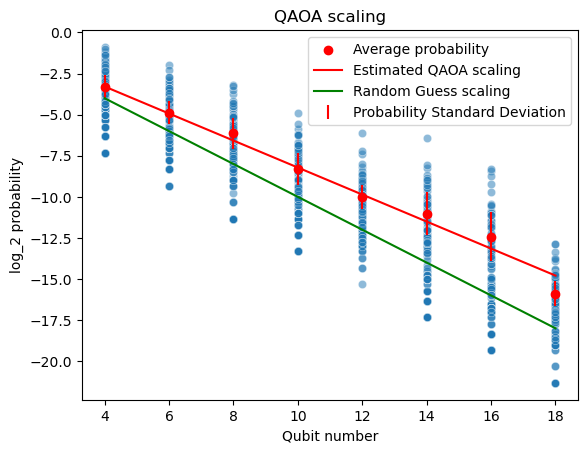

[0.82179118]
[0.01669277]


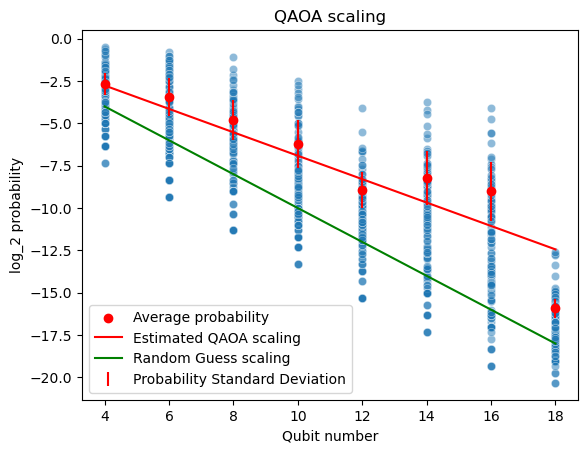

[0.6911371]
[0.05055747]


In [116]:
visualize_experiment(experiment_1_3_average, experiment_1_3_spread, max_qubits_num=18)
# visualize_experiment_spread(experiment_1_3_average, experiment_1_3_spread, 18)
visualize_experiment(experiment_1_3_2_average, experiment_1_3_2_spread, 18)

### Complexity scaling (18 qubits, depth 2) Code: 1.4

Introduction:

Name: Complexity scaling up to 18 qubits with a depth 2 circuit.

What: Run complexity scaling with a depth 2 circuit

Why: the aim is to find whether there is much difference from depth 4 variant

Conclusion:

Running parameters:

Bash script name: scaling-18-depth2.sh

Python script name: VQA-experiments-for-cluster-scaling-18-depth2.py

Hours: 2h

GPU's: 2

Job ID: 39599210
Job failed, run again

In [5]:
experiment_1_4_results = [(0.15208333333333332, array([0.1125 , 0.01875, 0.00625, 0.03125, 0.16875, 0.1875 , 0.2    ,
       0.6    , 0.575  , 0.08125, 0.78125, 0.75   , 0.20625, 0.19375,
       0.24375, 0.16875, 0.00625, 0.00625, 0.53125, 0.15   , 0.1    ,
       0.04375, 0.08125, 0.06875, 0.3625 , 0.25   , 0.26875, 0.0375 ,
       0.10625, 0.075  , 0.03125, 0.16875, 0.23125, 0.2    , 0.075  ,
       0.05   , 0.25   , 0.14375, 0.0625 , 0.25625, 0.00625, 0.0125 ,
       0.625  , 0.16875, 0.13125, 0.18125, 0.06875, 0.01875, 0.1375 ,
       0.025  , 0.00625, 0.1375 , 0.03125, 0.0125 , 0.1    , 0.00625,
       0.00625, 0.3    , 0.18125, 0.2125 , 0.1125 , 0.0875 , 0.08125,
       0.05   , 0.0125 , 0.01875, 0.15625, 0.10625, 0.05625, 0.275  ,
       0.2375 , 0.23125, 0.5625 , 0.0125 , 0.03125, 0.10625, 0.03125,
       0.025  , 0.0125 , 0.00625, 0.0125 , 0.1375 , 0.0625 , 0.06875,
       0.4375 , 0.06875, 0.0875 , 0.1875 , 0.2    , 0.23125, 0.25625,
       0.0375 , 0.0375 , 0.3875 , 0.0375 , 0.10625, 0.3    , 0.175  ,
       0.225  , 0.375  , 0.25625, 0.24375, 0.3    , 0.1375 , 0.225  ,
       0.3875 , 0.03125, 0.00625, 0.0125 , 0.10625, 0.05   , 0.225  ,
       0.00625, 0.0125 , 0.05625, 0.10625, 0.09375, 0.0375 , 0.03125,
       0.03125])), (0.08893229166666668, array([0.4265625, 0.0828125, 0.01875  , 0.01875  , 0.028125 , 0.01875  ,        
       0.0875   , 0.0328125, 0.0015625, 0.0484375, 0.0203125, 0.0125   ,
       0.2640625, 0.1671875, 0.08125  , 0.0046875, 0.015625 , 0.025    ,
       0.1625   , 0.03125  , 0.034375 , 0.1125   , 0.025    , 0.0015625,
       0.4265625, 0.3203125, 0.2453125, 0.1390625, 0.1125   , 0.0265625,
       0.1640625, 0.103125 , 0.0328125, 0.0828125, 0.096875 , 0.046875 ,
       0.26875  , 0.025    , 0.025    , 0.01875  , 0.0109375, 0.0125   ,
       0.06875  , 0.1203125, 0.0390625, 0.103125 , 0.0296875, 0.0015625,
       0.0484375, 0.040625 , 0.034375 , 0.0734375, 0.015625 , 0.0078125,
       0.0265625, 0.003125 , 0.0015625, 0.1890625, 0.184375 , 0.1953125,
       0.234375 , 0.0890625, 0.01875  , 0.1875   , 0.03125  , 0.0265625,
       0.4359375, 0.1265625, 0.0375   , 0.3484375, 0.2546875, 0.15625  ,
       0.009375 , 0.0015625, 0.015625 , 0.128125 , 0.0046875, 0.0046875,
       0.165625 , 0.04375  , 0.04375  , 0.0078125, 0.0078125, 0.0078125,
       0.0515625, 0.0453125, 0.04375  , 0.1765625, 0.0234375, 0.028125 ,
       0.10625  , 0.01875  , 0.021875 , 0.0984375, 0.0453125, 0.034375 ,
       0.228125 , 0.15     , 0.084375 , 0.2859375, 0.196875 , 0.1703125,
       0.2375   , 0.19375  , 0.0921875, 0.1609375, 0.01875  , 0.0390625,
       0.0078125, 0.0015625, 0.01875  , 0.04375  , 0.025    , 0.0171875,
       0.0203125, 0.0375   , 0.071875 , 0.315625 , 0.028125 , 0.0828125])), (0.06259440104166666, array([1.95312500e-03, 
8.51562500e-02, 2.39453125e-01, 3.59375000e-02,
       3.12500000e-03, 1.95312500e-03, 3.98046875e-01, 1.44531250e-02,
       1.05078125e-01, 6.44140625e-01, 3.51562500e-03, 5.31250000e-02,
       4.64843750e-02, 1.41406250e-01, 1.91796875e-01, 1.95312500e-03,
       7.42187500e-03, 3.35937500e-02, 1.28906250e-02, 1.01562500e-02,
       4.76562500e-02, 7.42187500e-03, 1.95312500e-02, 1.95312500e-03,
       8.04687500e-02, 2.12890625e-01, 3.77734375e-01, 8.98437500e-03,
       9.17968750e-02, 1.99609375e-01, 5.58593750e-02, 1.56250000e-02,
       4.25781250e-02, 2.73437500e-03, 3.39843750e-02, 8.32031250e-02,
       9.76562500e-03, 3.12500000e-03, 3.86718750e-02, 1.95312500e-03,
       8.59375000e-03, 3.47656250e-02, 3.04687500e-02, 1.17187500e-01,
       5.89843750e-02, 3.51562500e-03, 2.53906250e-02, 2.73437500e-03,
       1.95312500e-03, 3.94531250e-02, 6.95312500e-02, 1.95312500e-03,
       1.83593750e-02, 6.25000000e-03, 1.95312500e-03, 4.29687500e-03,
       2.38281250e-02, 5.11718750e-02, 1.30078125e-01, 2.00781250e-01,
       7.42187500e-03, 4.53125000e-02, 8.51562500e-02, 3.90625000e-04,
       2.85156250e-02, 1.57421875e-01, 9.76562500e-03, 9.17968750e-02,
       2.57812500e-01, 5.62500000e-02, 1.19140625e-01, 2.40234375e-01,
       1.95312500e-03, 1.17187500e-03, 3.90625000e-04, 1.95312500e-03,
       7.81250000e-03, 6.25000000e-03, 1.95312500e-03, 4.10156250e-02,
       1.81250000e-01, 5.07812500e-03, 1.95312500e-03, 1.95312500e-03,
       5.46875000e-03, 3.24218750e-02, 5.82031250e-02, 5.15625000e-02,
       5.42968750e-02, 3.24218750e-02, 3.90625000e-04, 1.25000000e-02,
       2.85156250e-02, 7.03125000e-03, 2.96875000e-02, 7.26562500e-02,
       2.89062500e-02, 1.23046875e-01, 1.67578125e-01, 5.39062500e-02,
       1.92578125e-01, 2.68750000e-01, 2.46093750e-02, 1.50000000e-01,
       2.16015625e-01, 1.95312500e-03, 8.98437500e-03, 1.01562500e-02,
       4.68750000e-03, 1.56250000e-03, 1.17187500e-03, 1.95312500e-03,
       3.51562500e-02, 4.60937500e-02, 1.21093750e-02, 8.59375000e-03,
       3.24218750e-02, 1.95312500e-03, 2.53906250e-02, 1.58203125e-01])), (0.023895670572916666, array([3.12500000e-03, 1.12011719e-01, 9.76562500e-05, 1.95312500e-03,
       9.76562500e-05, 6.05468750e-03, 1.46484375e-02, 7.89062500e-02,
       8.78906250e-04, 3.71093750e-03, 6.21093750e-02, 4.88281250e-04,
       1.79687500e-02, 1.59472656e-01, 6.54296875e-03, 1.17187500e-03,
       2.73437500e-03, 1.95312500e-04, 3.02734375e-03, 4.19921875e-03,
       4.88281250e-04, 1.95312500e-04, 1.43554687e-02, 3.90625000e-04,
       3.69140625e-02, 2.37890625e-01, 2.19726562e-02, 3.22265625e-03,
       1.44433594e-01, 2.24609375e-03, 1.00585938e-02, 8.88671875e-03,
       1.95312500e-03, 1.46484375e-03, 3.91601562e-02, 7.81250000e-04,
       1.17187500e-03, 1.15234375e-02, 1.36718750e-03, 4.88281250e-04,
       1.37695312e-02, 2.92968750e-04, 6.15234375e-03, 5.93750000e-02,
       4.39453125e-03, 5.56640625e-03, 2.52929687e-02, 2.73437500e-03,
       8.78906250e-04, 7.02148438e-02, 7.81250000e-04, 4.88281250e-04,
       9.08203125e-03, 5.85937500e-04, 4.88281250e-04, 1.93359375e-02,
       1.95312500e-04, 1.32812500e-02, 1.44531250e-01, 7.42187500e-03,
       8.30078125e-03, 8.75976562e-02, 2.53906250e-03, 7.81250000e-04,
       1.19824219e-01, 4.19921875e-03, 3.02734375e-03, 5.87890625e-02,
       2.14843750e-03, 2.54882813e-02, 1.20312500e-01, 1.02539062e-02,
       4.88281250e-04, 2.05078125e-03, 4.88281250e-04, 6.83593750e-04,
       4.29687500e-03, 2.92968750e-04, 1.36718750e-03, 1.22656250e-01,
       3.71093750e-03, 4.88281250e-04, 4.88281250e-04, 4.88281250e-04,
       3.90625000e-04, 1.67968750e-02, 7.81250000e-04, 2.92968750e-04,
       3.41796875e-03, 1.36718750e-03, 3.02734375e-03, 1.26953125e-02,
       9.76562500e-04, 7.81250000e-04, 2.24609375e-02, 2.92968750e-04,
       7.91015625e-03, 1.43066406e-01, 1.95312500e-03, 1.92382812e-02,
       2.30761719e-01, 8.20312500e-03, 1.09375000e-02, 1.65234375e-01,
       3.61328125e-03, 9.76562500e-05, 2.18750000e-02, 1.95312500e-04,
       4.88281250e-04, 7.81250000e-04, 4.88281250e-04, 9.76562500e-05,
       5.53710937e-02, 2.92968750e-04, 1.95312500e-04, 2.17773438e-02,
       6.83593750e-04, 2.92968750e-03, 1.22167969e-01, 1.85546875e-03])), (0.004051920572916667, array([1.14501953e-02, 2.68554688e-04, 3.17382812e-04, 3.17382813e-04,
       2.19726563e-04, 1.46484375e-04, 1.57958984e-02, 1.78222656e-03,
       7.32421875e-05, 3.85742188e-03, 3.90625000e-04, 1.46484375e-04,
       2.68066406e-02, 6.95800781e-03, 1.44042969e-03, 9.52148438e-04,
       1.46484375e-04, 2.44140625e-04, 3.29589844e-03, 6.59179688e-04,
       9.76562500e-05, 7.32421875e-04, 3.32031250e-03, 1.09863281e-03,
       6.91894531e-02, 2.30224609e-02, 4.39453125e-04, 7.93457031e-03,
       4.88281250e-05, 4.39453125e-04, 3.85742187e-03, 5.39550781e-03,
       7.56835938e-04, 2.49023438e-03, 2.34375000e-03, 1.22070312e-04,
       1.61132812e-03, 1.17187500e-03, 4.63867188e-04, 5.12695313e-04,
       1.83105469e-03, 5.12695313e-04, 6.64062500e-03, 1.02539063e-03,
       1.31835938e-03, 2.51464844e-03, 5.61523437e-04, 4.39453125e-04,
       1.46484375e-03, 7.81250000e-04, 9.27734375e-04, 6.59179688e-04,
       2.05078125e-03, 1.46484375e-04, 1.22070312e-04, 4.80957031e-03,
       3.17382812e-04, 2.14843750e-02, 2.15332031e-02, 6.81152344e-03,
       5.54199219e-03, 1.32324219e-02, 1.22070312e-04, 2.27050781e-03,
       3.41796875e-04, 2.68554688e-04, 1.24755859e-02, 2.19726563e-04,
       9.76562500e-04, 3.92089844e-02, 1.28662109e-02, 1.14746094e-03,
       1.22070312e-04, 4.63867188e-04, 4.39453125e-04, 1.70898437e-04,
       2.78320313e-03, 9.76562500e-05, 4.32128906e-03, 1.04980469e-03,
       7.32421875e-04, 1.22070312e-04, 1.22070312e-04, 4.88281250e-05,
       1.36718750e-03, 1.95312500e-04, 4.88281250e-05, 4.51660156e-03,
       9.76562500e-05, 2.68554688e-04, 1.36718750e-03, 1.46484375e-04,
       9.76562500e-05, 2.17285156e-03, 6.10351562e-04, 2.19726563e-04,
       1.47705078e-02, 1.09863281e-03, 4.39453125e-04, 3.33984375e-02,
       1.11572266e-02, 1.26953125e-03, 2.26806641e-02, 1.44042969e-03,
       9.76562500e-05, 4.39453125e-04, 1.66015625e-03, 1.22070312e-04,
       1.22070312e-04, 7.32421875e-04, 1.22070312e-04, 4.88281250e-04,
       1.07421875e-03, 4.88281250e-05, 1.22070312e-04, 2.19726562e-04,
       3.78417969e-03, 3.95507812e-03, 1.22070312e-04, 3.41796875e-04])), (0.007241872151692708, array([1.73217773e-02, 5.79345703e-02, 4.88281250e-05, 2.44140625e-05,
       3.66210937e-05, 8.48388672e-04, 9.49096680e-03, 4.91333008e-03,
       1.92260742e-03, 3.79638672e-03, 1.48925781e-03, 3.66210937e-05,
       2.85583496e-02, 2.95227051e-02, 1.30615234e-03, 8.85009766e-04,
       9.33837891e-04, 1.22070312e-04, 1.14746094e-03, 3.31420898e-03,
       3.66210937e-05, 6.28662109e-04, 1.34277344e-04, 1.09863281e-04,
       7.20336914e-02, 8.96972656e-02, 2.36206055e-03, 9.82666016e-03,
       9.74121094e-03, 1.83105469e-05, 1.93481445e-03, 1.84936523e-03,
       9.70458984e-04, 2.50244141e-03, 3.67431641e-03, 5.49316406e-05,
       4.15039062e-04, 2.82592773e-03, 9.76562500e-05, 4.63867187e-04,
       1.04980469e-03, 1.15966797e-04, 8.92944336e-03, 4.33959961e-03,
       2.38037109e-04, 1.82495117e-03, 1.76391602e-03, 9.76562500e-05,
       1.76391602e-03, 2.27661133e-03, 6.10351563e-06, 4.08935547e-04,
       6.10351563e-06, 1.22070313e-05, 4.88281250e-05, 4.94384766e-04,
       6.10351563e-06, 2.36267090e-02, 1.90612793e-02, 1.29394531e-03,
       5.84106445e-03, 7.62329102e-03, 3.29589844e-04, 3.26538086e-03,
       1.51062012e-02, 2.44140625e-05, 1.46911621e-02, 4.71557617e-02,
       4.88281250e-05, 3.41918945e-02, 4.41467285e-02, 3.08837891e-03,
       6.10351563e-06, 3.05175781e-05, 3.05175781e-05, 5.49316406e-05,
       1.09863281e-04, 6.10351563e-06, 5.57250977e-03, 1.49780273e-02,
       2.25830078e-04, 3.05175781e-05, 3.05175781e-05, 1.83105469e-05,
       1.35498047e-03, 8.36181641e-04, 1.83105469e-05, 4.17480469e-03,
       1.11877441e-02, 5.31005859e-04, 3.47900391e-04, 2.14233398e-03,
       1.40380859e-04, 1.72729492e-03, 2.85034180e-03, 1.52587891e-04,
       1.80358887e-02, 1.68395996e-02, 7.69042969e-04, 4.14916992e-02,
       3.98437500e-02, 2.29492188e-03, 2.59094238e-02, 2.60681152e-02,
       9.52148437e-04, 2.68554687e-04, 2.62451172e-04, 2.07519531e-04,
       6.10351563e-06, 3.05175781e-05, 1.58691406e-04, 8.91113281e-04,
       1.34277344e-03, 3.05175781e-05, 1.22070313e-05, 1.58081055e-03,
       1.64794922e-04, 5.98754883e-03, 3.33740234e-02, 3.66210937e-05])), (0.0042578252156575515, array([6.27136230e-04, 
3.99002075e-02, 5.64575195e-05, 1.22070313e-05,
       6.10351563e-06, 4.11987305e-05, 4.45556641e-04, 6.18591309e-03,
       1.51062012e-04, 6.56127930e-05, 2.25372314e-03, 4.73022461e-05,
       1.64947510e-03, 3.16253662e-02, 1.02233887e-03, 1.22070313e-05,
       1.29699707e-04, 3.20434570e-05, 2.01416016e-04, 1.18103027e-03,
       1.98364258e-05, 3.05175781e-06, 1.52130127e-03, 2.28881836e-05,
       4.84771729e-03, 8.74221802e-02, 4.98199463e-03, 1.52587891e-04,
       1.45843506e-02, 1.52587891e-06, 4.44030762e-04, 1.06811523e-03,
       4.30297852e-04, 7.47680664e-05, 3.43780518e-03, 5.34057617e-05,
       1.98364258e-05, 1.78375244e-03, 1.22070312e-04, 4.57763672e-06,
       7.36999512e-04, 9.15527344e-06, 2.99072266e-04, 8.91571045e-03,
       6.10351563e-06, 1.35803223e-04, 1.50299072e-03, 3.50952148e-05,
       7.62939453e-06, 3.46069336e-03, 7.62939453e-06, 7.62939453e-06,
       1.05285645e-04, 3.05175781e-06, 7.62939453e-06, 5.26428223e-04,
       1.52587891e-06, 7.91931152e-04, 2.35015869e-02, 3.37219238e-03,
       7.03430176e-04, 8.34503174e-03, 5.11169434e-04, 5.64575195e-05,
       1.75781250e-02, 3.50952148e-05, 5.50842285e-04, 2.38891602e-02,
       6.10351563e-06, 2.84576416e-03, 3.49716187e-02, 2.56652832e-03,
       7.62939453e-06, 2.74658203e-05, 7.62939453e-06, 4.57763672e-06,
       1.69372559e-04, 3.20434570e-05, 4.88281250e-05, 2.13073730e-02,
       5.03540039e-05, 7.62939453e-06, 7.62939453e-06, 7.62939453e-06,
       4.57763672e-06, 9.18579102e-04, 1.37329102e-05, 5.79833984e-05,
       2.43225098e-03, 9.15527344e-06, 1.35803223e-04, 1.25427246e-03,
       7.62939453e-06, 1.98364258e-05, 1.92718506e-03, 6.10351563e-06,
       5.05065918e-04, 2.04437256e-02, 2.51770020e-04, 1.83105469e-03,
       4.91134644e-02, 2.32238770e-03, 8.08715820e-04, 2.96203613e-02,
       2.92968750e-04, 1.06811523e-05, 8.59069824e-04, 4.27246094e-05,
       7.62939453e-06, 1.52587891e-06, 7.62939453e-06, 3.05175781e-06,
       2.04010010e-03, 1.52587891e-05, 7.62939453e-06, 9.00268555e-04,
       9.15527344e-06, 2.59399414e-04, 3.09616089e-02, 2.28881836e-05])), (5.8161417643229165e-05, array([3.39508057e-05, 1.25885010e-05, 1.37329102e-05, 1.33514404e-05,
       3.85284424e-05, 3.66210937e-05, 3.70025635e-05, 1.52587891e-05,
       9.53674316e-06, 3.43322754e-06, 2.25067139e-05, 4.19616699e-06,
       3.96347046e-04, 1.10626221e-05, 1.11770630e-04, 9.91821289e-06,
       5.34057617e-06, 9.53674316e-06, 2.21252441e-05, 7.24792480e-06,
       3.43322754e-06, 4.95910645e-06, 6.86645508e-06, 1.75476074e-05,
       3.70788574e-04, 6.02722168e-05, 2.03323364e-04, 7.62939453e-06,
       1.86920166e-05, 7.62939453e-07, 7.24792480e-06, 4.95910645e-06,
       3.43322754e-06, 7.24792480e-06, 1.56402588e-05, 4.57763672e-06,
       1.31225586e-04, 1.48773193e-05, 6.17980957e-05, 1.10626221e-05,
       3.50952148e-05, 4.19616699e-06, 6.10351563e-06, 1.41143799e-05,
       4.19616699e-06, 7.62939453e-06, 5.72204590e-06, 1.10626221e-05,
       3.81469727e-06, 1.14440918e-05, 1.60217285e-05, 1.41143799e-05,
       8.01086426e-06, 4.57763672e-06, 1.06811523e-05, 2.25067139e-05,
       8.01086426e-06, 1.80053711e-04, 1.28555298e-04, 2.86102295e-05,
       1.04522705e-04, 5.37872314e-05, 9.49859619e-05, 4.95910645e-06,
       3.05175781e-05, 1.14440918e-05, 3.05175781e-06, 3.01361084e-05,
       6.10351563e-06, 3.49426270e-04, 5.07354736e-05, 1.67083740e-04,
       3.96728516e-05, 2.21252441e-05, 7.62939453e-06, 3.81469727e-07,
       1.90734863e-05, 1.22070313e-05, 5.72204590e-06, 1.29699707e-05,
       2.67028809e-06, 1.90734863e-06, 2.28881836e-06, 7.24792480e-06,
       9.91821289e-06, 3.12805176e-05, 7.62939453e-06, 7.62939453e-06,
       1.02996826e-05, 1.94549561e-05, 4.57763672e-06, 9.15527344e-06,
       3.81469727e-06, 3.81469727e-06, 1.44958496e-05, 3.05175781e-06,
       1.15585327e-04, 1.41143799e-05, 2.21252441e-05, 8.72039795e-04,
       1.13677979e-04, 4.83322144e-04, 1.17874146e-04, 1.44958496e-05,
       6.02722168e-05, 2.40325928e-05, 9.91821289e-06, 3.05175781e-06,
       1.14440918e-06, 4.19616699e-06, 3.43322754e-06, 1.71661377e-05,
       4.95910645e-06, 6.10351563e-06, 2.91442871e-04, 9.59396362e-04,
       3.33786011e-04, 1.02996826e-05, 2.09808350e-05, 1.52587891e-05]))]
experiment_1_4_average = [x for (x, y) in experiment_1_4_results]
experiment_1_4_spread = [y for (x, y) in experiment_1_4_results]

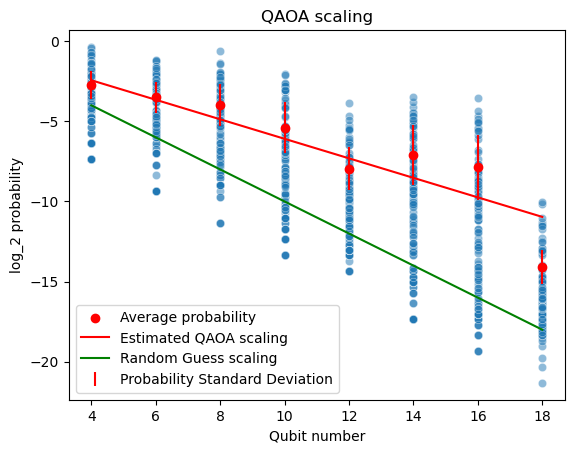

[0.60900522]
[0.04613687]


In [121]:
visualize_experiment(experiment_1_4_average, experiment_1_4_spread, 18)

### Complexity scaling (18 qubits, depth 8) Code: 1.5

Introduction:

Name: Complexity scaling up to 18 qubits with a depth 8 circuit.

What: Run complexity scaling with a depth 8 circuit

Why: the aim is to find whether there is much difference from depth 4 variant

Conclusion: the alpha is actually higher than for depth 4 and 6??

Running parameters:

Bash script name: scaling-18-depth8.sh

Python script name: VQA-experiments-for-cluster-scaling-18-depth8.py

Hours: 3h (took 40 mins)

GPU's: 2

Job ID: 39745060

In [6]:
experiment_1_5_result = [(0.12921875, array([0.05625, 0.06875, 0.1    , 0.33125, 0.05625, 0.0625 , 0.11875,
       0.0375 , 0.03125, 0.05625, 0.0125 , 0.0375 , 0.10625, 0.0375 ,
       0.0375 , 0.05625, 0.51875, 0.43125, 0.0375 , 0.0375 , 0.00625,
       0.075  , 0.0125 , 0.01875, 0.05625, 0.175  , 0.15625, 0.1875 ,
       0.1    , 0.06875, 0.10625, 0.00625, 0.03125, 0.40625, 0.00625,
       0.03125, 0.25625, 0.05625, 0.0625 , 0.23125, 0.09375, 0.06875,
       0.25625, 0.01875, 0.01875, 0.275  , 0.1125 , 0.125  , 0.35   ,
       0.06875, 0.0375 , 0.31875, 0.15625, 0.075  , 0.45   , 0.03125,
       0.05625, 0.2    , 0.03125, 0.0375 , 0.2    , 0.46875, 0.54375,
       0.15625, 0.025  , 0.05   , 0.0625 , 0.2375 , 0.20625, 0.14375,
       0.0375 , 0.09375, 0.6375 , 0.1625 , 0.11875, 0.25625, 0.09375,
       0.1    , 0.04375, 0.16875, 0.10625, 0.3    , 0.11875, 0.11875,
       0.3375 , 0.05   , 0.01875, 0.31875, 0.24375, 0.1875 , 0.10625,
       0.01875, 0.04375, 0.10625, 0.05625, 0.0625 , 0.1125 , 0.01875,
       0.00625, 0.175  , 0.0625 , 0.05625, 0.18125, 0.13125, 0.11875,
       0.10625, 0.03125, 0.03125, 0.1125 , 0.0125 , 0.03125, 0.14375,
       0.0375 , 0.03125, 0.275  , 0.13125, 0.11875, 0.23125, 0.15625,
       0.13125])), (0.038776041666666664, array([0.0265625, 0.0125   , 0.0203125, 0.1109375, 0.08125  , 0.0078125,
       0.0046875, 0.00625  , 0.003125 , 0.009375 , 0.0296875, 0.01875  ,
       0.01875  , 0.0828125, 0.0171875, 0.0578125, 0.01875  , 0.0265625,
       0.153125 , 0.03125  , 0.0453125, 0.0578125, 0.0015625, 0.0046875,
       0.059375 , 0.01875  , 0.021875 , 0.1703125, 0.0875   , 0.059375 ,
       0.0453125, 0.0078125, 0.034375 , 0.053125 , 0.01875  , 0.040625 ,
       0.075    , 0.0015625, 0.053125 , 0.0390625, 0.01875  , 0.0359375,
       0.0015625, 0.0078125, 0.0015625, 0.034375 , 0.09375  , 0.065625 ,
       0.009375 , 0.0265625, 0.05     , 0.090625 , 0.0203125, 0.0515625,
       0.0203125, 0.0140625, 0.0109375, 0.0328125, 0.0078125, 0.009375 ,
       0.071875 , 0.0453125, 0.0109375, 0.0375   , 0.025    , 0.009375 ,
       0.0140625, 0.0046875, 0.0046875, 0.0015625, 0.0109375, 0.0171875,
       0.0515625, 0.0515625, 0.0125   , 0.034375 , 0.0015625, 0.1      ,
       0.209375 , 0.0375   , 0.034375 , 0.096875 , 0.0078125, 0.028125 ,
       0.0375   , 0.021875 , 0.0265625, 0.059375 , 0.1078125, 0.009375 ,
       0.0671875, 0.0109375, 0.0375   , 0.034375 , 0.009375 , 0.05625  ,
       0.0953125, 0.003125 , 0.0078125, 0.04375  , 0.078125 , 0.096875 ,
       0.040625 , 0.075    , 0.0125   , 0.0078125, 0.0125   , 0.0234375,
       0.015625 , 0.0359375, 0.0359375, 0.040625 , 0.015625 , 0.003125 ,
       0.05625  , 0.01875  , 0.0078125, 0.14375  , 0.109375 , 0.040625 ])), (0.021542968749999995, array([0.0078125 , 0.00195312, 0.003125  , 0.00625   , 0.01640625,
       0.04765625, 0.00195312, 0.02851563, 0.040625  , 0.00078125,
       0.0265625 , 0.01484375, 0.00117187, 0.00898437, 0.02226563,
       0.20390625, 0.00195312, 0.00976562, 0.00039063, 0.01289063,
       0.0234375 , 0.00195312, 0.01875   , 0.01015625, 0.02929688,
       0.00664062, 0.05039063, 0.0078125 , 0.01875   , 0.13789062,
       0.00195312, 0.003125  , 0.00664062, 0.00195312, 0.02148438,
       0.03554687, 0.0015625 , 0.00976562, 0.0328125 , 0.00742187,
       0.00117188, 0.00976562, 0.00195312, 0.00039063, 0.00117188,
       0.01953125, 0.03359375, 0.03671875, 0.00351563, 0.02460937,
       0.02578125, 0.02070312, 0.00507813, 0.00195312, 0.003125  ,
       0.00898438, 0.04414062, 0.00078125, 0.003125  , 0.00664063,
       0.2546875 , 0.00859375, 0.08242188, 0.00117187, 0.02421875,
       0.08945312, 0.05195313, 0.01679687, 0.09414063, 0.00390625,
       0.02382812, 0.01484375, 0.01601562, 0.02578125, 0.04648438,
       0.00742187, 0.00625   , 0.00273437, 0.01289062, 0.00234375,
       0.0421875 , 0.01640625, 0.00039063, 0.00898438, 0.0015625 ,
       0.00234375, 0.01289062, 0.04179687, 0.009375  , 0.03984375,
       0.00195312, 0.00625   , 0.06289063, 0.00546875, 0.02148438,
       0.05703125, 0.0015625 , 0.00976562, 0.01679687, 0.00507813,
       0.01484375, 0.02265625, 0.0203125 , 0.01328125, 0.01992188,
       0.00195312, 0.01132813, 0.00195312, 0.00195312, 0.028125  ,
       0.02226563, 0.0015625 , 0.00820313, 0.0109375 , 0.01132812,
       0.00273437, 0.01367188, 0.02109375, 0.03125   , 0.03789062])), (0.004603678385416666, array([8.78906250e-04, 5.85937500e-04, 1.26953125e-03, 2.83203125e-03,
       1.68945312e-02, 2.92968750e-04, 2.05078125e-03, 2.09960938e-02,
       1.95312500e-04, 2.92968750e-04, 1.09375000e-02, 1.95312500e-04,
       4.88281250e-04, 3.61328125e-03, 9.76562500e-05, 2.92968750e-04,
       1.95312500e-04, 6.83593750e-04, 1.56250000e-03, 1.07421875e-03,
       2.83203125e-03, 3.90625000e-04, 1.85546875e-02, 7.81250000e-04,
       1.07421875e-03, 7.81250000e-04, 7.81250000e-04, 1.17187500e-03,
       7.72460937e-02, 1.36718750e-03, 2.92968750e-04, 2.92968750e-04,
       4.88281250e-04, 6.83593750e-04, 6.44531250e-03, 9.76562500e-05,
       1.07421875e-03, 1.66015625e-03, 4.88281250e-04, 3.90625000e-04,
       8.78906250e-04, 1.66015625e-03, 1.95312500e-04, 4.39453125e-03,
       9.76562500e-05, 2.83203125e-03, 9.86328125e-03, 1.36718750e-03,
       6.83593750e-04, 1.14257812e-02, 4.88281250e-04, 1.95312500e-04,
       1.24023437e-02, 7.81250000e-04, 2.92968750e-04, 6.54296875e-03,
       2.92968750e-04, 4.88281250e-04, 1.95312500e-04, 9.76562500e-05,
       2.24609375e-03, 8.89648437e-02, 2.24609375e-03, 9.76562500e-04,
       1.62109375e-02, 1.07421875e-03, 2.92968750e-04, 1.08398438e-02,
       6.83593750e-04, 2.53906250e-03, 1.59179687e-02, 2.63671875e-03,
       1.95312500e-03, 2.08007813e-02, 4.88281250e-04, 9.76562500e-05,
       4.58984375e-03, 2.92968750e-04, 3.02734375e-03, 4.19921875e-03,
       4.19921875e-03, 5.17578125e-03, 1.95312500e-03, 7.81250000e-04,
       2.14843750e-03, 2.16796875e-02, 4.88281250e-04, 4.58984375e-03,
       2.63671875e-03, 1.66015625e-03, 1.95312500e-04, 1.95312500e-04,
       4.88281250e-04, 1.46484375e-03, 8.00781250e-03, 1.95312500e-04,
       2.92968750e-04, 5.07812500e-03, 6.83593750e-04, 2.73437500e-03,
       1.02539062e-02, 3.90625000e-04, 5.85937500e-04, 8.78906250e-03,
       7.81250000e-04, 4.88281250e-04, 1.16210938e-02, 1.95312500e-04,
       1.17187500e-03, 5.76171875e-03, 1.46484375e-03, 9.76562500e-04,
       1.57226562e-02, 4.88281250e-04, 8.78906250e-04, 1.26953125e-03,
       4.88281250e-04, 3.02734375e-03, 3.32031250e-03, 2.53906250e-03])), (0.0008907063802083334, array([1.22070312e-04, 3.90625000e-04, 1.46484375e-04, 2.78320312e-03,
       3.41796875e-04, 1.34277344e-03, 1.53808594e-03, 6.34765625e-04,
       1.70898437e-04, 5.12695313e-04, 1.24511719e-03, 4.88281250e-05,
       1.95312500e-04, 1.19628906e-03, 4.88281250e-05, 3.66210938e-04,
       6.83593750e-04, 7.81250000e-04, 2.09960937e-03, 1.92871094e-03,
       1.12304687e-03, 6.83593750e-04, 2.49023438e-03, 6.83593750e-04,
       1.09863281e-03, 1.19628906e-03, 2.44140625e-05, 6.10351562e-03,
       5.85937500e-04, 1.24511719e-03, 2.44140625e-05, 3.41796875e-04,
       5.61523437e-04, 1.87988281e-03, 4.88281250e-05, 2.44140625e-05,
       8.54492188e-04, 5.37109375e-04, 1.22070312e-04, 2.92968750e-04,
       1.70898437e-04, 2.92968750e-04, 1.22070312e-04, 4.88281250e-04,
       7.81250000e-04, 3.22265625e-03, 1.22070312e-04, 2.68554688e-04,
       4.63867187e-04, 1.19628906e-03, 3.41796875e-04, 1.22070312e-04,
       6.83593750e-04, 7.81250000e-04, 5.61523437e-04, 2.44140625e-05,
       2.44140625e-05, 1.22070312e-04, 1.46484375e-04, 8.78906250e-04,
       8.12988281e-03, 1.39160156e-03, 2.68554688e-04, 1.61132813e-03,
       1.31835938e-03, 1.70898437e-04, 1.09863281e-03, 1.02539062e-03,
       7.32421875e-05, 1.70898437e-04, 1.70898438e-03, 7.81250000e-04,
       2.36816406e-03, 2.68554688e-04, 9.76562500e-05, 2.68554688e-04,
       9.76562500e-05, 2.44140625e-05, 2.00195313e-03, 2.22167969e-03,
       1.22070312e-04, 9.03320313e-04, 2.44140625e-04, 6.10351562e-04,
       1.61132813e-03, 1.46484375e-04, 1.22070312e-04, 6.37207031e-03,
       1.87988281e-03, 3.17382813e-04, 3.17382813e-04, 2.19726562e-04,
       2.44140625e-05, 2.44140625e-04, 1.48925781e-03, 1.24511719e-03,
       3.90625000e-04, 1.22070312e-04, 2.44140625e-05, 1.61132812e-03,
       4.39453125e-04, 2.68554688e-04, 1.34277344e-03, 4.00390625e-03,
       4.63867187e-04, 1.70898437e-04, 2.44140625e-04, 4.88281250e-05,
       9.76562500e-04, 3.90625000e-04, 1.44042969e-03, 3.17382813e-04,
       1.24511719e-03, 4.88281250e-05, 7.81250000e-04, 4.15039062e-04,
       5.37109375e-04, 3.07617188e-03, 2.19726563e-04, 2.44140625e-05])), (0.0007127888997395833, array([3.05175781e-05, 3.05175781e-05, 1.28173828e-04, 1.54418945e-03,
       1.12304688e-03, 8.54492187e-05, 1.62353516e-03, 4.30908203e-03,
       1.52587891e-04, 6.53076172e-04, 2.74658203e-04, 8.54492187e-05,
       1.83105469e-04, 6.34765625e-04, 3.66210937e-05, 1.03759766e-04,
       1.34277344e-04, 6.53076172e-04, 1.20239258e-03, 2.31933594e-03,
       2.44140625e-05, 2.86865234e-04, 1.82495117e-03, 2.44140625e-05,
       1.34277344e-04, 1.61743164e-03, 6.71386719e-05, 4.12597656e-03,
       1.29150391e-02, 3.66210937e-05, 1.83105469e-05, 3.05175781e-05,
       3.05175781e-05, 7.56835937e-04, 1.01318359e-03, 3.05175781e-05,
       2.13623047e-04, 2.86865234e-04, 9.76562500e-05, 6.71386719e-05,
       1.70898437e-04, 1.15966797e-04, 2.44140625e-05, 4.27246094e-05,
       6.10351563e-06, 1.87377930e-03, 1.42211914e-03, 1.00097656e-03,
       4.82177734e-04, 3.66210937e-05, 2.44140625e-05, 6.10351563e-05,
       2.61840820e-03, 2.07519531e-04, 3.11279297e-04, 1.09863281e-04,
       1.52587891e-04, 6.10351563e-06, 3.05175781e-05, 1.83105469e-05,
       5.07812500e-03, 5.42602539e-03, 2.44140625e-05, 1.13525391e-03,
       2.41699219e-03, 2.44140625e-05, 3.11279297e-04, 2.96020508e-03,
       5.00488281e-04, 1.09863281e-04, 1.15966797e-04, 3.05175781e-05,
       1.45263672e-03, 8.36181641e-04, 3.35693359e-04, 1.28173828e-04,
       2.19726562e-04, 9.76562500e-05, 3.05175781e-04, 2.35595703e-03,
       1.22070312e-04, 9.76562500e-05, 5.92041016e-04, 4.88281250e-05,
       4.21142578e-04, 4.08935547e-04, 3.05175781e-05, 8.91113281e-04,
       1.14746094e-03, 4.88281250e-05, 1.28173828e-04, 9.33837891e-04,
       6.10351563e-06, 2.62451172e-04, 1.28173828e-04, 2.01416016e-04,
       7.93457031e-05, 4.08935547e-04, 3.66210937e-05, 9.09423828e-04,
       6.59179688e-04, 1.83105469e-05, 4.76074219e-04, 8.30078125e-04,
       1.83105469e-04, 2.19726563e-04, 3.66210937e-05, 3.05175781e-05,
       4.57763672e-04, 5.49316406e-05, 1.83105469e-05, 1.64794922e-04,
       4.76074219e-04, 3.05175781e-05, 1.03759766e-04, 3.11279297e-04,
       1.34277344e-04, 1.47705078e-03, 1.41601562e-03, 4.27246094e-05])), (0.00033161163330078133, array([6.10351563e-06, 7.62939453e-06, 3.20434570e-05, 5.18798828e-05,
       5.78308105e-04, 3.20434570e-05, 7.62939453e-06, 2.88085938e-03,
       3.96728516e-05, 7.62939453e-06, 3.31115723e-04, 2.89916992e-05,
       7.62939453e-06, 2.74658203e-05, 6.10351562e-05, 3.05175781e-06,
       1.49536133e-04, 3.05175781e-05, 5.34057617e-05, 4.79125977e-04,
       2.13623047e-05, 1.06811523e-05, 6.30187988e-04, 3.66210937e-05,
       1.67846680e-05, 2.77709961e-04, 1.86157227e-04, 1.34277344e-04,
       1.12487793e-02, 3.81469727e-05, 1.52587891e-06, 3.50952148e-05,
       1.06811523e-05, 6.25610352e-05, 1.66320801e-04, 4.73022461e-05,
       6.10351563e-06, 1.81579590e-04, 2.44140625e-05, 7.62939453e-06,
       4.42504883e-05, 1.52587891e-06, 7.62939453e-06, 3.05175781e-06,
       2.74658203e-05, 3.20434570e-05, 8.45336914e-04, 4.11987305e-05,
       7.62939453e-06, 2.53295898e-04, 2.28881836e-05, 1.22070313e-05,
       1.40380859e-03, 1.98364258e-05, 6.10351563e-06, 9.30786133e-05,
       1.06811523e-05, 7.62939453e-06, 1.52587891e-06, 3.05175781e-06,
       1.55639648e-04, 6.69860840e-03, 1.37329102e-05, 1.37329102e-05,
       2.29034424e-03, 2.44140625e-05, 3.05175781e-06, 1.23901367e-03,
       1.14440918e-04, 1.37329102e-05, 8.08715820e-05, 3.66210937e-05,
       5.03540039e-05, 7.41577148e-04, 4.57763672e-06, 3.05175781e-06,
       6.56127930e-05, 2.74658203e-05, 7.78198242e-05, 7.38525391e-04,
       2.19726563e-04, 1.46484375e-04, 2.36511230e-04, 8.54492187e-05,
       6.40869141e-05, 2.99072266e-04, 5.18798828e-05, 4.53186035e-04,
       2.22778320e-04, 1.99890137e-04, 1.37329102e-05, 5.18798828e-04,
       7.62939453e-06, 3.05175781e-06, 7.70568848e-04, 2.74658203e-05,
       3.05175781e-06, 9.15527344e-06, 1.22070313e-05, 9.15527344e-06,
       7.14111328e-04, 5.64575195e-05, 2.59399414e-05, 2.60925293e-04,
       2.05993652e-04, 1.52587891e-06, 4.01306152e-04, 1.37329102e-05,
       4.57763672e-06, 4.02832031e-04, 3.05175781e-06, 1.52587891e-06,
       5.03540039e-04, 2.28881836e-05, 2.89916992e-05, 5.64575195e-05,
       6.56127930e-05, 8.23974609e-05, 3.50952148e-04, 3.96728516e-05])), (1.9086201985677082e-05, array([1.14440918e-05, 1.25885010e-05, 2.28881836e-06, 2.67028809e-06,
       2.25067139e-05, 6.48498535e-06, 1.14440918e-06, 1.83105469e-05,
       8.01086426e-06, 1.18637085e-04, 8.92639160e-05, 1.32369995e-04,
       2.67028809e-06, 1.64031982e-05, 8.77380371e-06, 1.98364258e-05,
       9.91821289e-06, 6.10351563e-06, 7.47680664e-05, 2.13623047e-05,
       8.39233398e-06, 4.19616699e-06, 2.82287598e-05, 6.48498535e-06,
       3.81469727e-06, 1.14440918e-05, 5.34057617e-06, 8.39233398e-06,
       1.52587891e-06, 1.64031982e-05, 7.70568848e-05, 1.52587891e-06,
       1.83105469e-05, 3.81469727e-06, 4.19616699e-06, 1.02996826e-05,
       2.67028809e-06, 5.68389893e-05, 1.37329102e-05, 5.72204590e-06,
       1.64031982e-05, 9.53674316e-06, 1.75476074e-05, 9.91821289e-06,
       1.90734863e-06, 2.28881836e-06, 2.32696533e-05, 2.67028809e-06,
       6.98089600e-05, 2.44140625e-05, 5.72204590e-05, 4.57763672e-05,
       1.94549561e-05, 9.91821289e-06, 1.25885010e-05, 2.47955322e-05,
       2.28881836e-05, 1.90734863e-06, 1.71661377e-05, 3.05175781e-06,
       9.15527344e-06, 5.34057617e-06, 1.52587891e-05, 4.08172607e-05,
       2.25067139e-05, 8.39233398e-06, 1.52587891e-06, 4.95910645e-06,
       7.62939453e-07, 7.24792480e-06, 6.14166260e-05, 2.78472900e-05,
       5.22613525e-05, 1.44958496e-05, 8.01086426e-06, 9.91821289e-06,
       3.08990479e-05, 7.24792480e-06, 1.79672241e-04, 4.31060791e-05,
       5.79833984e-05, 2.67028809e-06, 1.86920166e-05, 6.48498535e-06,
       6.86645508e-06, 1.83105469e-05, 1.14440918e-05, 6.10351563e-06,
       2.25067139e-05, 3.05175781e-06, 3.05175781e-06, 2.02178955e-05,
       1.44958496e-05, 1.22070313e-05, 2.36511230e-05, 6.48498535e-06,
       1.90734863e-06, 1.48773193e-05, 1.90734863e-06, 1.48773193e-05,
       7.62939453e-06, 2.02178955e-05, 3.81469727e-07, 4.57763672e-06,
       3.81469727e-06, 4.19616699e-06, 8.39233398e-06, 2.67028809e-06,
       1.71661377e-05, 4.57763672e-06, 7.24792480e-06, 2.67028809e-06,
       2.47955322e-05, 3.05175781e-06, 1.90734863e-05, 1.94549561e-05,
       1.29699707e-05, 1.64031982e-05, 2.05993652e-05, 5.34057617e-06]))]
experiment_1_5_average = [x for (x, y) in experiment_1_5_result]
experiment_1_5_spread = [y for (x, y) in experiment_1_5_result]

experiment_1_5_2_results = [(0.14947916666666666, array([0.3625 , 0.03125, 0.00625, 0.31875, 0.00625, 0.00625, 0.26875,
       0.03125, 0.05625, 0.1875 , 0.18125, 0.24375, 0.29375, 0.05625,
       0.0625 , 0.19375, 0.15   , 0.13125, 0.05   , 0.0125 , 0.0125 ,
       0.1375 , 0.35   , 0.4    , 0.04375, 0.075  , 0.09375, 0.16875,
       0.1125 , 0.15   , 0.18125, 0.0125 , 0.03125, 0.0375 , 0.26875,
       0.2375 , 0.19375, 0.1    , 0.0875 , 0.15   , 0.25   , 0.23125,
       0.21875, 0.00625, 0.01875, 0.00625, 0.5125 , 0.4875 , 0.28125,
       0.125  , 0.10625, 0.10625, 0.05625, 0.08125, 0.3625 , 0.16875,
       0.2375 , 0.0875 , 0.00625, 0.00625, 0.025  , 0.03125, 0.0375 ,
       0.24375, 0.06875, 0.03125, 0.06875, 0.05   , 0.01875, 0.4125 ,
       0.16875, 0.20625, 0.15   , 0.01875, 0.04375, 0.03125, 0.08125,
       0.0875 , 0.25   , 0.25625, 0.29375, 0.11875, 0.03125, 0.00625,
       0.23125, 0.15   , 0.18125, 0.2375 , 0.65625, 0.625  , 0.0875 ,
       0.3125 , 0.35   , 0.125  , 0.18125, 0.13125, 0.1875 , 0.2375 ,
       0.2375 , 0.4875 , 0.08125, 0.14375, 0.3375 , 0.0125 , 0.00625,
       0.03125, 0.2375 , 0.18125, 0.09375, 0.0125 , 0.025  , 0.09375,
       0.01875, 0.03125, 0.1625 , 0.05625, 0.0375 , 0.0875 , 0.14375,
       0.14375])), (0.10223958333333334, array([0.3296875, 0.0078125, 0.00625  , 0.0171875, 0.009375 , 0.0234375,        
       0.365625 , 0.0359375, 0.0125   , 0.0328125, 0.1015625, 0.0046875,
       0.0421875, 0.01875  , 0.05     , 0.009375 , 0.003125 , 0.003125 ,
       0.046875 , 0.00625  , 0.0515625, 0.06875  , 0.11875  , 0.053125 ,
       0.4625   , 0.0078125, 0.0265625, 0.4140625, 0.1      , 0.0625   ,
       0.078125 , 0.0171875, 0.034375 , 0.625    , 0.1140625, 0.09375  ,
       0.3640625, 0.0046875, 0.0109375, 0.0453125, 0.0671875, 0.0015625,
       0.00625  , 0.0296875, 0.0078125, 0.1859375, 0.028125 , 0.015625 ,
       0.1078125, 0.040625 , 0.003125 , 0.340625 , 0.021875 , 0.0015625,
       0.171875 , 0.00625  , 0.059375 , 0.271875 , 0.0203125, 0.028125 ,
       0.4046875, 0.00625  , 0.028125 , 0.0171875, 0.0203125, 0.0453125,
       0.24375  , 0.025    , 0.0203125, 0.0953125, 0.0015625, 0.0078125,
       0.1609375, 0.0375   , 0.0390625, 0.3171875, 0.0078125, 0.0140625,
       0.203125 , 0.028125 , 0.0125   , 0.465625 , 0.071875 , 0.04375  ,
       0.465625 , 0.034375 , 0.040625 , 0.5      , 0.0546875, 0.0953125,
       0.228125 , 0.0484375, 0.0453125, 0.390625 , 0.003125 , 0.0078125,
       0.3828125, 0.0625   , 0.0578125, 0.1484375, 0.075    , 0.1046875,
       0.35     , 0.0578125, 0.0171875, 0.415625 , 0.003125 , 0.0265625,
       0.025    , 0.0109375, 0.015625 , 0.4671875, 0.0859375, 0.01875  ,
       0.240625 , 0.0078125, 0.0109375, 0.096875 , 0.0484375, 0.0125   ])), (0.03271484375, array([1.95312500e-03, 1.17187500e-02, 3.71093750e-02, 3.90625000e-04,
       1.56250000e-02, 6.21093750e-02, 3.12500000e-03, 2.85156250e-02,
       2.07031250e-02, 5.93750000e-02, 6.25000000e-03, 7.03125000e-03,
       6.64062500e-03, 3.75000000e-02, 7.07031250e-02, 2.30468750e-02,
       3.59375000e-02, 7.89062500e-02, 1.95312500e-03, 1.05468750e-02,
       1.95312500e-03, 1.36328125e-01, 7.42187500e-02, 4.02343750e-02,
       5.85937500e-03, 5.85937500e-03, 8.51562500e-02, 1.36718750e-02,
       1.09375000e-02, 1.09375000e-02, 1.95312500e-03, 1.01562500e-02,
       6.21093750e-02, 5.54687500e-02, 2.10937500e-02, 6.40625000e-02,
       4.68750000e-03, 1.44531250e-02, 9.45312500e-02, 7.61718750e-02,
       5.07812500e-03, 9.37500000e-03, 1.95312500e-03, 3.90625000e-03,
       7.81250000e-04, 2.21484375e-01, 2.07031250e-02, 7.81250000e-03,
       2.03125000e-02, 4.68750000e-03, 2.26562500e-02, 6.25000000e-03,
       5.93750000e-02, 1.95312500e-03, 3.12500000e-02, 1.56250000e-03,
       1.99218750e-02, 1.95312500e-03, 3.08593750e-02, 5.39062500e-02,
       4.29687500e-03, 1.64062500e-02, 4.29687500e-02, 6.64062500e-03,
       3.98437500e-02, 1.64062500e-02, 7.81250000e-04, 4.29687500e-02,
       2.34375000e-03, 4.84375000e-02, 6.64062500e-03, 7.38281250e-02,
       1.95312500e-03, 2.46093750e-02, 1.60156250e-02, 3.12500000e-03,
       3.12500000e-03, 4.25781250e-02, 8.82812500e-02, 7.42187500e-03,
       6.28906250e-02, 1.95312500e-03, 2.30468750e-02, 1.05859375e-01,
       3.55468750e-02, 3.12500000e-02, 1.99609375e-01, 4.39062500e-01,
       1.52343750e-02, 3.39843750e-02, 7.81250000e-02, 1.05468750e-02,
       2.34375000e-03, 2.81250000e-02, 3.24218750e-02, 1.13281250e-02,
       5.78125000e-02, 1.79687500e-02, 1.32812500e-02, 1.09375000e-02,
       2.03125000e-02, 1.32812500e-02, 3.90625000e-04, 1.28906250e-02,
       3.32031250e-02, 4.57031250e-02, 1.40625000e-02, 3.78906250e-02,
       7.81250000e-04, 4.68750000e-03, 2.61718750e-02, 1.95312500e-03,
       3.00781250e-02, 3.94531250e-02, 1.17187500e-03, 2.77343750e-02,
       4.80468750e-02, 2.30468750e-02, 7.42187500e-03, 2.73437500e-03])), (0.007066243489583332, array([2.14843750e-03, 2.13867187e-02, 1.95312500e-04, 9.76562500e-05,
       1.07421875e-03, 1.95312500e-03, 9.76562500e-04, 8.78906250e-04,
       1.95312500e-04, 3.32031250e-03, 1.85546875e-03, 2.05078125e-03,
       3.22265625e-03, 1.48437500e-02, 6.83593750e-04, 2.63671875e-03,
       3.51562500e-03, 1.95312500e-04, 1.95312500e-04, 7.81250000e-03,
       1.85546875e-03, 7.12890625e-03, 3.36914062e-02, 1.07421875e-03,
       1.26953125e-03, 2.52929687e-02, 6.25000000e-03, 1.66015625e-03,
       9.76562500e-05, 6.83593750e-04, 9.76562500e-04, 8.59375000e-03,
       2.92968750e-04, 9.37500000e-03, 9.76562500e-05, 1.36718750e-03,
       4.10156250e-03, 3.77929687e-02, 6.64062500e-03, 3.41796875e-03,
       2.93945313e-02, 9.76562500e-04, 3.90625000e-04, 1.95312500e-03,
       1.26953125e-03, 4.39453125e-03, 2.00195312e-02, 4.10156250e-03,
       3.90625000e-04, 3.02734375e-03, 7.81250000e-04, 1.17187500e-03,
       3.94531250e-02, 9.76562500e-05, 1.95312500e-04, 2.37304688e-02,
       3.51562500e-03, 4.49218750e-03, 6.11328125e-02, 2.24609375e-03,
       4.88281250e-04, 1.85546875e-03, 4.88281250e-04, 2.24609375e-03,
       2.26562500e-02, 8.78906250e-04, 2.92968750e-04, 3.31054687e-02,
       1.95312500e-04, 2.92968750e-04, 3.90625000e-02, 7.81250000e-04,
       4.88281250e-04, 4.88281250e-04, 1.95312500e-04, 1.95312500e-04,
       2.48046875e-02, 1.95312500e-04, 4.98046875e-03, 2.63671875e-03,
       7.03125000e-03, 2.83203125e-03, 1.78710938e-02, 9.76562500e-05,
       3.54492187e-02, 5.78125000e-02, 1.66015625e-03, 1.47460937e-02,
       4.29687500e-03, 6.73828125e-03, 9.17968750e-03, 8.49609375e-03,
       6.25000000e-03, 6.83593750e-04, 1.53320312e-02, 1.26953125e-03,
       9.76562500e-05, 3.78906250e-02, 2.34375000e-03, 5.27343750e-03,
       6.34765625e-03, 9.76562500e-05, 6.83593750e-04, 1.75781250e-03,
       9.76562500e-05, 1.17187500e-03, 9.76562500e-05, 4.88281250e-04,
       1.75781250e-03, 5.76171875e-03, 5.85937500e-04, 4.88281250e-04,
       1.85546875e-03, 5.85937500e-04, 1.95312500e-04, 1.88476563e-02,
       9.76562500e-05, 2.44140625e-03, 8.78906250e-03, 4.88281250e-04])), (0.0014058430989583334, array([1.04980469e-03, 
1.90429687e-03, 3.90625000e-04, 4.39453125e-04,
       1.56250000e-03, 4.15039063e-04, 2.00195312e-03, 7.08007813e-04,
       2.44140625e-05, 1.80664063e-03, 1.34277344e-03, 4.88281250e-05,
       4.61425781e-03, 8.54492188e-04, 1.70898437e-04, 2.44140625e-03,
       9.52148437e-04, 2.68554688e-04, 1.46484375e-04, 2.51464844e-03,
       1.34277344e-03, 7.10449219e-03, 4.51660156e-03, 9.03320313e-04,
       2.92968750e-04, 1.14746094e-03, 8.05664062e-04, 1.48925781e-03,
       2.24609375e-03, 4.63867187e-04, 2.44140625e-04, 1.00097656e-03,
       7.08007812e-04, 6.68945312e-03, 2.68554688e-03, 9.76562500e-05,
       2.17285156e-03, 3.22265625e-03, 1.22070312e-04, 7.32421875e-04,
       1.36718750e-03, 4.88281250e-05, 1.80664063e-03, 1.41601563e-03,
       3.17382813e-04, 3.27148437e-03, 9.03320312e-04, 2.44140625e-05,
       3.66210938e-04, 1.29394531e-03, 9.03320313e-04, 2.92968750e-03,
       6.83593750e-04, 1.14746094e-03, 5.61523437e-04, 8.05664062e-04,
       3.17382812e-04, 4.63867188e-03, 5.37109375e-04, 6.83593750e-04,
       8.78906250e-04, 1.29394531e-03, 2.44140625e-04, 2.02636719e-03,
       1.31835938e-03, 3.41796875e-04, 4.15039063e-04, 1.22070312e-04,
       1.36718750e-03, 1.70898438e-04, 1.70898438e-03, 4.15039063e-04,
       1.02539063e-03, 1.51367188e-03, 1.07421875e-03, 3.41796875e-04,
       1.63574219e-03, 9.76562500e-05, 8.05664063e-04, 2.95410156e-03,
       3.41796875e-04, 9.76562500e-04, 9.52148437e-04, 2.19726563e-04,
       1.68212891e-02, 7.81250000e-04, 4.88281250e-05, 6.54296875e-03,
       5.10253906e-03, 1.22070312e-04, 7.56835938e-04, 3.41796875e-04,
       2.68554688e-04, 8.78906250e-04, 2.29492187e-03, 4.39453125e-04,
       1.51367188e-03, 1.29394531e-03, 3.90625000e-04, 5.63964844e-03,
       4.15039062e-04, 1.46484375e-04, 8.78906250e-04, 1.83105469e-03,
       6.10351562e-04, 3.90625000e-04, 5.37109375e-04, 9.52148438e-04,
       1.70898437e-04, 5.10253906e-03, 1.39160156e-03, 9.76562500e-04,
       1.02539063e-03, 1.95312500e-04, 7.08007812e-04, 5.61523437e-04,
       1.22070312e-04, 1.70898437e-04, 1.26953125e-03, 9.76562500e-05])), (0.0015870666503906253, array([2.50244141e-04, 
2.25830078e-03, 1.46484375e-04, 7.32421875e-04,
       8.54492188e-05, 1.28173828e-04, 9.70458984e-04, 4.82177734e-04,
       3.66210937e-05, 2.31933594e-04, 2.07519531e-04, 2.44140625e-05,
       2.13012695e-03, 3.52172852e-03, 6.10351563e-06, 1.00708008e-03,
       8.91113281e-04, 2.01416016e-04, 1.09863281e-04, 6.71386719e-05,
       8.54492187e-05, 4.93774414e-03, 5.92041016e-04, 8.54492187e-05,
       2.62451172e-04, 5.14526367e-03, 2.07519531e-04, 4.63867187e-04,
       2.62451172e-04, 7.32421875e-05, 5.61523437e-04, 1.29394531e-03,
       1.77001953e-04, 1.88598633e-03, 6.34155273e-03, 1.34277344e-04,
       1.51977539e-03, 1.13586426e-02, 3.90625000e-04, 1.56250000e-03,
       4.57763672e-04, 1.83105469e-05, 5.49316406e-04, 2.80761719e-04,
       1.58691406e-04, 1.08032227e-03, 4.57763672e-04, 4.33349609e-04,
       5.43212891e-04, 4.45556641e-04, 7.93457031e-05, 4.69970703e-04,
       8.66699219e-04, 5.49316406e-05, 7.75146484e-04, 5.10253906e-03,
       1.02539063e-03, 4.31518555e-03, 5.23681641e-03, 3.66210937e-05,
       1.83105469e-04, 1.48925781e-03, 3.05175781e-05, 1.07421875e-03,
       5.24902344e-04, 7.32421875e-05, 1.42822266e-03, 2.62451172e-04,
       1.83105469e-05, 4.76074219e-04, 4.88281250e-04, 6.95800781e-04,
       4.45556641e-04, 5.06591797e-04, 4.08935547e-04, 2.80761719e-04,
       5.92041016e-04, 3.66210937e-05, 9.33837891e-04, 3.67431641e-03,
       3.60107422e-04, 6.28662109e-04, 1.39282227e-02, 9.76562500e-05,
       9.78393555e-03, 4.97070313e-02, 4.88281250e-05, 1.87988281e-03,
       4.65087891e-03, 4.15039062e-04, 3.96728516e-04, 1.50756836e-03,
       2.50244141e-04, 8.05664062e-04, 2.19726563e-04, 9.15527344e-05,
       3.60107422e-04, 1.92260742e-03, 6.71386719e-05, 2.13012695e-03,
       6.50024414e-03, 1.22070313e-05, 3.54003906e-04, 5.43212891e-04,
       6.10351563e-06, 2.86865234e-04, 6.46972656e-04, 5.49316406e-05,
       2.13623047e-04, 3.60107422e-04, 3.05175781e-05, 6.65283203e-04,
       1.92871094e-03, 2.01416016e-04, 1.30615234e-03, 5.73730469e-04,
       3.05175781e-05, 2.80761719e-04, 6.10351563e-06, 3.54003906e-04])), (0.0007337951660156249, array([1.52587891e-06, 
2.24456787e-03, 4.57763672e-05, 4.57763672e-06,
       2.82287598e-04, 6.71386719e-05, 6.10351563e-06, 7.99560547e-04,
       3.96728516e-05, 2.89916992e-05, 1.05285645e-04, 7.32421875e-05,
       1.12915039e-04, 1.57318115e-03, 2.13623047e-05, 1.02233887e-04,
       6.88171387e-04, 1.67846680e-05, 1.06811523e-05, 1.37329102e-04,
       5.34057617e-05, 2.19726563e-04, 9.53674316e-04, 9.15527344e-05,
       2.74658203e-05, 2.90222168e-03, 7.62939453e-06, 1.73950195e-04,
       8.11767578e-04, 1.22070312e-04, 2.44140625e-05, 9.39941406e-04,
       2.59399414e-05, 2.13623047e-04, 3.46374512e-04, 1.52587891e-06,
       2.56347656e-04, 6.41174316e-03, 7.01904297e-05, 1.70898437e-04,
       5.78308105e-04, 9.15527344e-05, 6.10351563e-06, 2.73132324e-04,
       1.22070313e-05, 1.52587891e-06, 7.50732422e-04, 5.03540039e-05,
       8.08715820e-05, 2.22778320e-04, 3.05175781e-06, 9.15527344e-06,
       5.37109375e-04, 3.50952148e-05, 7.62939453e-06, 1.61743164e-03,
       3.35693359e-05, 8.39233398e-05, 1.14151001e-02, 3.35693359e-05,
       3.20434570e-05, 4.69970703e-04, 1.98364258e-05, 1.98364258e-05,
       4.50134277e-04, 4.11987305e-05, 3.05175781e-06, 2.88848877e-03,
       4.57763672e-06, 7.62939453e-06, 5.14221191e-04, 4.42504883e-05,
       4.57763672e-06, 1.23596191e-04, 4.27246094e-05, 9.15527344e-06,
       5.88989258e-04, 6.40869141e-05, 1.52587891e-06, 5.81359863e-04,
       6.86645508e-05, 6.10351563e-06, 5.37872314e-03, 4.42504883e-05,
       6.29882813e-03, 2.40722656e-02, 1.35803223e-04, 6.72912598e-04,
       8.11767578e-04, 1.02081299e-03, 1.52587891e-04, 3.20434570e-04,
       1.38854980e-04, 4.88281250e-05, 3.38745117e-04, 5.34057617e-05,
       5.95092773e-05, 2.94494629e-04, 3.50952148e-05, 2.19726563e-04,
       1.30004883e-03, 7.32421875e-05, 3.05175781e-05, 3.55529785e-04,
       1.83105469e-05, 1.06811523e-05, 6.14929199e-04, 3.50952148e-05,
       7.62939453e-06, 1.46484375e-03, 3.81469727e-05, 7.62939453e-06,
       4.11987305e-04, 6.71386719e-05, 1.22070313e-05, 7.91931152e-04,
       5.18798828e-05, 1.22070313e-05, 6.24084473e-04, 1.52587891e-05])), (9.80059305826823e-06, array([6.86645508e-06, 1.41143799e-05, 4.95910645e-06, 2.47955322e-05,
       1.41143799e-05, 4.95910645e-06, 5.34057617e-06, 1.29699707e-05,
       2.67028809e-06, 6.48498535e-06, 1.14440918e-05, 8.39233398e-06,
       1.52587891e-06, 6.86645508e-06, 1.14440918e-06, 1.25885010e-05,
       1.64031982e-05, 1.14440918e-05, 3.43322754e-06, 1.06811523e-05,
       3.05175781e-06, 7.62939453e-06, 9.91821289e-06, 4.95910645e-06,
       1.29699707e-05, 8.01086426e-06, 7.24792480e-06, 3.43322754e-06,
       1.90734863e-05, 6.10351563e-06, 1.52587891e-06, 2.25067139e-05,
       1.14440918e-05, 7.24792480e-06, 3.24249268e-05, 8.77380371e-06,
       2.21252441e-05, 1.67846680e-05, 1.90734863e-06, 1.14440918e-05,
       2.36511230e-05, 7.24792480e-06, 7.24792480e-06, 2.25067139e-05,
       1.33514404e-05, 2.28881836e-06, 8.77380371e-06, 5.34057617e-06,
       6.86645508e-06, 1.83105469e-05, 3.05175781e-06, 3.05175781e-06,
       4.57763672e-06, 7.62939453e-06, 1.41143799e-05, 3.70025635e-05,
       4.19616699e-06, 1.90734863e-06, 9.15527344e-06, 1.41143799e-05,
       9.53674316e-06, 1.79290771e-05, 3.05175781e-05, 4.95910645e-06,
       5.34057617e-06, 2.02178955e-05, 5.72204590e-06, 4.95910645e-06,
       4.57763672e-06, 3.81469727e-06, 1.67846680e-05, 8.01086426e-06,
       3.81469727e-07, 5.72204590e-06, 2.02178955e-05, 1.52587891e-06,
       9.53674316e-06, 4.57763672e-06, 9.91821289e-06, 1.79290771e-05,
       8.01086426e-06, 5.34057617e-06, 9.53674316e-06, 2.17437744e-05,
       1.52587891e-06, 1.02996826e-05, 4.19616699e-06, 1.06811523e-05,
       8.39233398e-06, 6.10351563e-06, 6.86645508e-06, 6.48498535e-06,
       8.39233398e-06, 6.10351563e-06, 9.15527344e-06, 3.43322754e-06,
       1.41143799e-05, 6.86645508e-06, 7.62939453e-06, 5.72204590e-06,
       3.01361084e-05, 1.52587891e-05, 1.79290771e-05, 1.48773193e-05,
       3.43322754e-06, 9.53674316e-06, 1.48773193e-05, 8.01086426e-06,
       4.19616699e-06, 2.05993652e-05, 3.81469727e-07, 2.28881836e-06,
       3.05175781e-06, 1.25885010e-05, 8.01086426e-06, 9.91821289e-06,
       3.81469727e-06, 1.37329102e-05, 4.95910645e-06, 1.52587891e-06]))]
experiment_1_5_2_average = [x for (x, y) in experiment_1_5_2_results]
experiment_1_5_2_spread = [y for (x, y) in experiment_1_5_2_results]

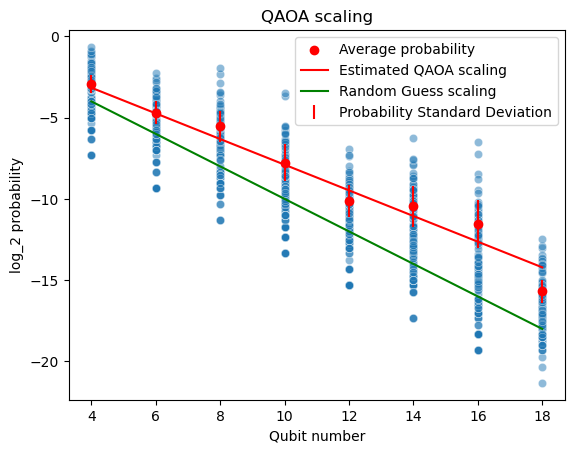

[0.78955601]
[0.02447775]


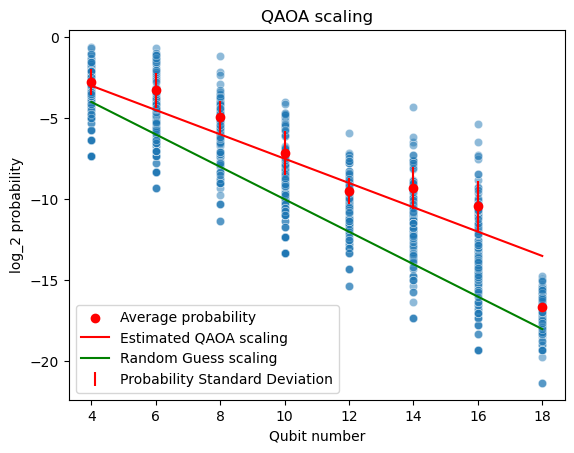

[0.74965274]
[0.04600733]


In [124]:
visualize_experiment(experiment_1_5_average, experiment_1_5_spread, 18)
#visualize_experiment_spread(experiment_1_5_average, experiment_1_5_spread, 18)
visualize_experiment(experiment_1_5_2_average, experiment_1_5_2_spread, 18)

### Complexity scaling (18 qubits, depth 12) Code: 1.6

Introduction:

Name: Complexity scaling up to 18 qubits with a depth 12 circuit.

What: Run complexity scaling with a depth 12 circuit

Why: the aim is to find whether there is much difference from depth 4 variant

Conclusion: it gets better!!

Running parameters:

Bash script name: scaling-18-depth12.sh

Python script name: VQA-experiments-for-cluster-scaling-18-depth12.py

Hours: 3h (took 50 mins)

GPU's: 4

Job ID: 39745415 

In [7]:
experiment_1_6_results = [(0.12421875, array([0.11875, 0.16875, 0.19375, 0.325  , 0.15625, 0.16875, 0.14375,
       0.00625, 0.00625, 0.59375, 0.06875, 0.09375, 0.35   , 0.03125,
       0.025  , 0.08125, 0.0125 , 0.025  , 0.225  , 0.18125, 0.125  ,
       0.1875 , 0.05625, 0.01875, 0.33125, 0.1625 , 0.14375, 0.125  ,
       0.00625, 0.03125, 0.25625, 0.1    , 0.0875 , 0.09375, 0.15625,
       0.14375, 0.175  , 0.03125, 0.03125, 0.20625, 0.03125, 0.03125,
       0.29375, 0.0125 , 0.025  , 0.29375, 0.03125, 0.0125 , 0.13125,
       0.125  , 0.2    , 0.59375, 0.00625, 0.00625, 0.35   , 0.10625,
       0.1125 , 0.13125, 0.225  , 0.2375 , 0.325  , 0.025  , 0.00625,
       0.075  , 0.09375, 0.06875, 0.13125, 0.05625, 0.04375, 0.1875 ,
       0.025  , 0.04375, 0.14375, 0.15   , 0.10625, 0.08125, 0.05625,
       0.075  , 0.16875, 0.1875 , 0.1375 , 0.4375 , 0.075  , 0.05   ,
       0.18125, 0.18125, 0.225  , 0.51875, 0.03125, 0.03125, 0.0625 ,
       0.10625, 0.15   , 0.0375 , 0.09375, 0.05625, 0.1375 , 0.025  ,
       0.025  , 0.2375 , 0.025  , 0.0125 , 0.30625, 0.06875, 0.06875,
       0.10625, 0.06875, 0.075  , 0.19375, 0.0125 , 0.0125 , 0.1125 ,
       0.05   , 0.06875, 0.05   , 0.01875, 0.025  , 0.3    , 0.03125,
       0.05   ])), (0.048111979166666666, array([0.0046875, 0.1453125, 0.0265625, 0.2484375, 0.1875   , 0.10625  ,
       0.2734375, 0.00625  , 0.0515625, 0.025    , 0.03125  , 0.0375   ,
       0.0703125, 0.0046875, 0.0140625, 0.046875 , 0.0109375, 0.03125  ,
       0.2671875, 0.140625 , 0.16875  , 0.0234375, 0.053125 , 0.040625 ,
       0.221875 , 0.10625  , 0.00625  , 0.0125   , 0.0078125, 0.009375 ,
       0.125    , 0.015625 , 0.0984375, 0.0375   , 0.0203125, 0.015625 ,
       0.03125  , 0.0140625, 0.0421875, 0.2640625, 0.003125 , 0.0453125,
       0.1046875, 0.0421875, 0.0015625, 0.0015625, 0.0078125, 0.0046875,
       0.0421875, 0.0375   , 0.046875 , 0.1421875, 0.034375 , 0.0046875,
       0.0828125, 0.0046875, 0.0015625, 0.04375  , 0.015625 , 0.0140625,
       0.065625 , 0.0015625, 0.0421875, 0.034375 , 0.0078125, 0.003125 ,
       0.1515625, 0.025    , 0.0078125, 0.05625  , 0.00625  , 0.0109375,
       0.0109375, 0.00625  , 0.01875  , 0.1421875, 0.01875  , 0.01875  ,
       0.0625   , 0.021875 , 0.0453125, 0.025    , 0.0171875, 0.0015625,
       0.0265625, 0.0078125, 0.040625 , 0.0375   , 0.0046875, 0.0125   ,
       0.00625  , 0.003125 , 0.0078125, 0.05625  , 0.01875  , 0.0625   ,
       0.0234375, 0.0015625, 0.1015625, 0.0546875, 0.00625  , 0.0234375,
       0.0859375, 0.0109375, 0.0140625, 0.028125 , 0.0234375, 0.1046875,
       0.115625 , 0.04375  , 0.0328125, 0.01875  , 0.0796875, 0.0078125,
       0.0921875, 0.0140625, 0.0265625, 0.0015625, 0.021875 , 0.0296875])), (0.022024739583333335, array([0.02382812, 0.02734375, 0.0015625 , 0.03085938, 0.07421875,
       0.2203125 , 0.00195312, 0.00507813, 0.00195312, 0.00507813,
       0.01171875, 0.0140625 , 0.00195312, 0.00976562, 0.0796875 ,
       0.00195312, 0.009375  , 0.021875  , 0.01484375, 0.09726562,
       0.18828125, 0.00195312, 0.02304688, 0.00976562, 0.03398437,
       0.07539062, 0.10742188, 0.00195312, 0.00117188, 0.00976562,
       0.01015625, 0.05546875, 0.003125  , 0.02773437, 0.028125  ,
       0.03828125, 0.00195312, 0.00078125, 0.040625  , 0.00195312,
       0.01953125, 0.0921875 , 0.00039063, 0.00625   , 0.01796875,
       0.00039063, 0.00820313, 0.08359375, 0.0140625 , 0.0125    ,
       0.01757812, 0.00195312, 0.04609375, 0.03867188, 0.0125    ,
       0.01210938, 0.06132812, 0.05859375, 0.03359375, 0.02421875,
       0.00195312, 0.00585938, 0.01914063, 0.0046875 , 0.00117188,
       0.00039063, 0.00117187, 0.00117188, 0.02109375, 0.00117187,
       0.00703125, 0.0171875 , 0.01796875, 0.0046875 , 0.00273438,
       0.0015625 , 0.02890625, 0.03710938, 0.03710938, 0.01875   ,
       0.0078125 , 0.00234375, 0.00625   , 0.0421875 , 0.04804688,
       0.0078125 , 0.02226563, 0.00195312, 0.0046875 , 0.0296875 ,
       0.021875  , 0.00429688, 0.015625  , 0.0109375 , 0.01367188,
       0.0015625 , 0.00078125, 0.00976562, 0.00898438, 0.00039063,
       0.00703125, 0.03515625, 0.0078125 , 0.00976563, 0.003125  ,
       0.009375  , 0.00585938, 0.0078125 , 0.00039063, 0.00703125,
       0.05078125, 0.00039063, 0.01210938, 0.07695312, 0.00429688,
       0.003125  , 0.02382812, 0.003125  , 0.0046875 , 0.00117188])), (0.005313313802083334, array([6.83593750e-04, 3.41796875e-03, 4.88281250e-04, 1.39648438e-02,
       5.99609375e-02, 1.46484375e-03, 7.81250000e-04, 3.90625000e-04,
       2.05078125e-03, 9.76562500e-04, 4.98046875e-03, 4.88281250e-04,
       4.88281250e-04, 2.60742187e-02, 6.83593750e-04, 2.92968750e-04,
       1.69921875e-02, 4.88281250e-04, 1.32812500e-02, 1.14941406e-01,
       7.81250000e-03, 2.34375000e-03, 4.68750000e-03, 9.76562500e-05,
       5.27343750e-03, 4.05273438e-02, 1.85546875e-03, 9.76562500e-05,
       1.36718750e-03, 4.88281250e-04, 2.63671875e-03, 3.92578125e-02,
       3.90625000e-04, 4.88281250e-04, 4.88281250e-04, 1.36718750e-03,
       3.90625000e-04, 5.27343750e-03, 1.95312500e-04, 3.90625000e-04,
       2.14843750e-03, 1.75781250e-03, 9.76562500e-05, 4.29687500e-03,
       2.92968750e-04, 4.88281250e-04, 3.32031250e-03, 7.81250000e-04,
       2.92968750e-04, 3.51562500e-03, 1.95312500e-04, 9.76562500e-04,
       1.95312500e-04, 7.81250000e-04, 7.81250000e-04, 2.18750000e-02,
       4.88281250e-04, 4.98046875e-03, 1.85546875e-03, 2.24609375e-03,
       4.88281250e-04, 5.07812500e-03, 2.92968750e-04, 3.90625000e-04,
       1.95312500e-04, 4.88281250e-04, 3.90625000e-04, 1.29882813e-02,
       3.90625000e-04, 4.88281250e-04, 3.12500000e-03, 2.92968750e-04,
       2.92968750e-04, 3.61328125e-03, 1.36718750e-03, 3.90625000e-04,
       1.36718750e-03, 9.76562500e-04, 1.85546875e-03, 4.39453125e-03,
       1.16210938e-02, 2.92968750e-04, 1.75781250e-03, 1.95312500e-04,
       2.05078125e-03, 9.66796875e-03, 2.05078125e-03, 4.88281250e-04,
       1.36718750e-03, 9.76562500e-05, 4.88281250e-04, 3.90625000e-03,
       1.95312500e-04, 9.76562500e-04, 6.54296875e-03, 6.83593750e-04,
       9.76562500e-05, 2.89062500e-02, 5.85937500e-04, 9.76562500e-05,
       3.12500000e-03, 4.88281250e-04, 2.24609375e-03, 4.88281250e-04,
       1.75781250e-03, 3.90625000e-04, 1.85546875e-03, 5.85937500e-04,
       1.85546875e-03, 2.46093750e-02, 2.92968750e-04, 2.63671875e-03,
       4.32617187e-02, 9.76562500e-05, 1.95312500e-04, 7.32421875e-03,
       2.73437500e-03, 1.95312500e-04, 2.05078125e-03, 7.81250000e-04])), (0.0015053304036458334, array([7.32421875e-04, 7.32421875e-04, 4.63867187e-04, 2.59033203e-02,
       7.69042969e-03, 4.88281250e-05, 6.10351562e-04, 7.32421875e-04,
       4.88281250e-05, 2.68554688e-04, 1.34277344e-03, 5.61523437e-04,
       6.10351562e-04, 9.27734375e-04, 2.05078125e-03, 9.76562500e-05,
       3.97949219e-03, 2.49023437e-03, 1.88964844e-02, 1.54052734e-02,
       6.10351562e-04, 3.58886719e-03, 1.75781250e-03, 7.32421875e-05,
       5.85937500e-03, 1.78222656e-03, 1.46484375e-04, 4.88281250e-05,
       1.70898437e-04, 1.22070312e-04, 2.73437500e-03, 7.81250000e-04,
       2.44140625e-05, 1.70898437e-04, 6.34765625e-04, 1.51367188e-03,
       1.22070312e-04, 2.61230469e-03, 1.22070312e-04, 4.39453125e-04,
       2.27050781e-03, 2.92968750e-04, 2.92968750e-04, 1.12304687e-03,
       4.88281250e-05, 1.95312500e-04, 6.90917969e-03, 9.52148438e-04,
       4.39453125e-04, 2.53906250e-03, 1.46484375e-04, 6.83593750e-04,
       7.34863281e-03, 1.22070312e-04, 6.34765625e-04, 1.56250000e-03,
       5.61523437e-04, 1.02539063e-03, 7.56835938e-04, 4.88281250e-05,
       3.90625000e-04, 5.12695313e-04, 1.97753906e-03, 1.22070312e-04,
       1.22070312e-04, 7.08007812e-04, 2.19726563e-04, 7.32421875e-04,
       1.22070312e-04, 9.76562500e-05, 1.22070312e-04, 9.76562500e-04,
       4.88281250e-05, 5.61523438e-04, 4.88281250e-05, 1.70898438e-04,
       2.02636719e-03, 2.61230469e-03, 7.56835938e-04, 2.53906250e-03,
       1.22070312e-04, 4.39453125e-04, 2.92968750e-04, 1.66015625e-03,
       1.80664063e-03, 1.17187500e-03, 3.90625000e-04, 2.44140625e-05,
       2.17285156e-03, 7.81250000e-04, 2.68554688e-04, 8.78906250e-04,
       1.22070312e-03, 5.85937500e-04, 8.78906250e-04, 8.54492188e-04,
       9.27734375e-04, 1.12304687e-03, 2.44140625e-05, 7.32421875e-05,
       5.85937500e-04, 9.76562500e-05, 5.85937500e-04, 4.15039062e-04,
       1.02539063e-03, 9.27734375e-04, 2.44140625e-03, 1.22070312e-04,
       5.61523437e-04, 4.88281250e-05, 2.44140625e-04, 1.73339844e-03,
       1.22070312e-03, 2.19726563e-04, 3.90625000e-04, 4.15039062e-04,
       3.90625000e-04, 4.88281250e-05, 2.07519531e-03, 1.66015625e-03])), (0.0014207458496093748, array([7.75146484e-04, 2.44140625e-04, 7.93457031e-05, 1.87133789e-02,
       3.11889648e-02, 1.03759766e-03, 2.50244141e-04, 3.05175781e-04,
       1.83105469e-05, 3.05175781e-04, 9.76562500e-05, 3.05175781e-05,
       4.21142578e-04, 1.68457031e-03, 7.32421875e-05, 4.27246094e-05,
       1.69067383e-03, 6.10351563e-06, 1.87011719e-02, 3.10119629e-02,
       5.43212891e-04, 3.72314453e-04, 2.21557617e-03, 2.31933594e-04,
       4.02832031e-03, 3.77197266e-03, 3.05175781e-05, 6.10351563e-06,
       1.09863281e-04, 1.52587891e-04, 3.09448242e-03, 4.13208008e-03,
       4.27246094e-05, 7.81250000e-04, 1.77612305e-03, 3.05175781e-05,
       1.40380859e-04, 7.01904297e-04, 1.22070313e-05, 7.62939453e-04,
       4.13818359e-03, 1.22070313e-05, 4.27246094e-05, 3.60107422e-04,
       1.40380859e-04, 9.15527344e-05, 1.40380859e-04, 3.05175781e-05,
       2.56347656e-04, 2.01416016e-04, 5.49316406e-05, 1.46484375e-03,
       1.42822266e-03, 4.27246094e-05, 2.56347656e-04, 3.25927734e-03,
       1.52587891e-04, 6.95800781e-04, 6.83593750e-04, 9.70458984e-04,
       4.82177734e-04, 1.27563477e-03, 5.49316406e-05, 1.83105469e-05,
       3.05175781e-05, 3.05175781e-05, 5.49316406e-05, 7.26318359e-04,
       3.05175781e-05, 6.10351562e-05, 1.04980469e-03, 6.71386719e-05,
       3.05175781e-05, 6.10351563e-06, 9.76562500e-05, 1.18408203e-03,
       3.19824219e-03, 3.05175781e-05, 4.57763672e-04, 2.80761719e-04,
       8.23974609e-04, 1.89208984e-04, 4.88281250e-05, 1.83105469e-05,
       8.42285156e-04, 1.17187500e-03, 7.93457031e-04, 7.32421875e-05,
       1.52587891e-04, 6.10351563e-06, 2.19726563e-04, 1.40380859e-04,
       7.93457031e-05, 4.02832031e-04, 1.40380859e-04, 1.58691406e-04,
       3.29589844e-04, 7.26318359e-04, 2.25830078e-04, 1.34277344e-04,
       2.31933594e-04, 3.05175781e-05, 2.50244141e-04, 6.16455078e-04,
       5.49316406e-05, 4.02832031e-04, 4.27246094e-04, 4.57763672e-04,
       7.56835937e-04, 9.39941406e-04, 3.05175781e-05, 1.64794922e-03,
       4.00390625e-03, 1.83105469e-05, 1.77001953e-04, 2.19726562e-04,
       2.07519531e-04, 7.93457031e-05, 1.83105469e-05, 3.66210937e-05])), (0.0006568654378255208, array([1.83105469e-05, 3.99780273e-04, 4.11987305e-05, 1.05590820e-03,
       2.10281372e-02, 9.67407227e-04, 3.35693359e-05, 2.41088867e-04,
       7.62939453e-06, 6.10351563e-06, 3.34167480e-04, 2.74658203e-05,
       9.15527344e-06, 1.02996826e-03, 9.15527344e-06, 7.62939453e-06,
       3.09753418e-04, 6.40869141e-05, 1.10626221e-03, 2.60910034e-02,
       2.03399658e-03, 2.44140625e-05, 3.08227539e-04, 1.75476074e-04,
       1.23596191e-04, 2.53143311e-03, 1.03759766e-04, 3.05175781e-06,
       3.05175781e-05, 1.52587891e-06, 1.22070313e-05, 4.20837402e-03,
       5.03540039e-05, 1.52587891e-06, 8.68225098e-04, 2.44140625e-05,
       7.62939453e-06, 4.68444824e-04, 1.52587891e-06, 1.52587891e-05,
       1.82037354e-03, 1.06811523e-05, 1.22070313e-05, 2.05993652e-04,
       4.57763672e-06, 7.62939453e-06, 2.07519531e-04, 4.73022461e-05,
       7.62939453e-06, 8.54492187e-05, 3.05175781e-05, 3.81469727e-05,
       3.32641602e-04, 4.57763672e-06, 7.62939453e-06, 1.08184814e-03,
       7.32421875e-05, 4.11987305e-05, 3.84521484e-04, 8.54492188e-05,
       1.52587891e-06, 8.23974609e-04, 1.22070313e-05, 7.62939453e-06,
       4.57763672e-06, 1.52587891e-06, 7.62939453e-06, 5.78308105e-04,
       9.15527344e-06, 7.62939453e-06, 2.56347656e-04, 9.15527344e-06,
       7.62939453e-06, 5.79833984e-05, 2.13623047e-05, 6.10351563e-06,
       1.84631348e-04, 2.13623047e-05, 8.85009766e-05, 9.00268555e-05,
       3.15856934e-04, 7.62939453e-06, 8.69750977e-05, 1.22070313e-05,
       7.17163086e-05, 3.55529785e-04, 3.96728516e-05, 7.62939453e-06,
       6.86645508e-05, 3.35693359e-05, 1.67846680e-05, 1.36413574e-03,
       2.89916992e-05, 1.98364258e-05, 1.08337402e-04, 8.08715820e-05,
       1.37329102e-05, 2.10571289e-04, 3.35693359e-05, 7.62939453e-06,
       2.68554688e-04, 7.62939453e-06, 1.67846680e-05, 8.08715820e-05,
       1.83105469e-05, 7.93457031e-05, 4.86755371e-04, 1.25122070e-04,
       7.93457031e-05, 1.12915039e-03, 6.10351563e-06, 7.17163086e-05,
       2.67639160e-03, 6.86645508e-05, 1.06811523e-05, 2.68554687e-04,
       2.74658203e-05, 7.62939453e-06, 1.98364258e-05, 2.28881836e-05])), (2.4770100911458336e-05, array([3.81469727e-06, 2.78472900e-05, 1.22070313e-05, 1.29699707e-05,
       2.17437744e-05, 3.81469727e-07, 4.57763672e-06, 8.77380371e-06,
       6.86645508e-06, 1.83105469e-05, 1.86920166e-05, 1.44958496e-05,
       3.81469727e-07, 2.13623047e-05, 6.48498535e-06, 4.84466553e-05,
       1.77383423e-04, 5.45501709e-05, 5.23757935e-04, 8.39233398e-05,
       3.50952148e-04, 9.53674316e-06, 9.53674316e-06, 1.29699707e-05,
       3.05175781e-05, 5.72204590e-06, 2.28881836e-05, 9.15527344e-06,
       9.53674316e-06, 8.01086426e-06, 1.64031982e-05, 4.23431396e-05,
       1.14440918e-05, 4.38690186e-05, 5.30242920e-05, 6.98089600e-05,
       3.05175781e-06, 2.13623047e-05, 8.01086426e-06, 3.16619873e-05,
       1.06811523e-05, 1.14440918e-06, 1.14440918e-06, 1.02996826e-05,
       4.57763672e-06, 1.06811523e-05, 2.51770020e-05, 6.86645508e-06,
       8.01086426e-06, 1.90734863e-05, 3.81469727e-07, 9.53674316e-06,
       4.15802002e-05, 6.10351563e-06, 6.10351563e-06, 5.34057617e-06,
       4.57763672e-06, 1.79290771e-05, 1.02996826e-05, 5.72204590e-06,
       6.10351563e-06, 3.73840332e-05, 1.10626221e-05, 3.43322754e-06,
       8.77380371e-06, 9.91821289e-06, 1.52587891e-06, 1.67846680e-05,
       7.62939453e-07, 2.13623047e-05, 1.60217285e-05, 2.02178955e-05,
       1.02996826e-05, 2.86102295e-05, 1.52587891e-05, 2.36511230e-05,
       2.36511230e-05, 5.30242920e-05, 3.66210937e-05, 1.18255615e-05,
       1.41143799e-05, 8.77380371e-06, 4.53948975e-05, 1.18255615e-05,
       7.24792480e-06, 2.28881836e-05, 8.39233398e-06, 6.10351563e-06,
       5.34057617e-06, 1.48773193e-05, 7.24792480e-06, 1.25885010e-05,
       1.02996826e-05, 1.10626221e-05, 2.09808350e-05, 1.18255615e-05,
       1.90734863e-06, 6.48498535e-06, 2.28881836e-06, 6.86645508e-06,
       2.36511230e-05, 1.48773193e-05, 1.90734863e-06, 1.90734863e-05,
       1.52587891e-05, 6.02722168e-05, 2.47955322e-05, 2.13623047e-05,
       4.95910645e-06, 4.84466553e-05, 1.33514404e-05, 7.24792480e-06,
       1.41143799e-05, 8.77380371e-06, 3.05175781e-06, 2.44140625e-05,
       1.14440918e-06, 1.79290771e-05, 1.25885010e-05, 3.81469727e-07]))]

experiment_1_6_average = [x for (x, y) in experiment_1_6_results]
experiment_1_6_spread = [y for (x, y) in experiment_1_6_results]

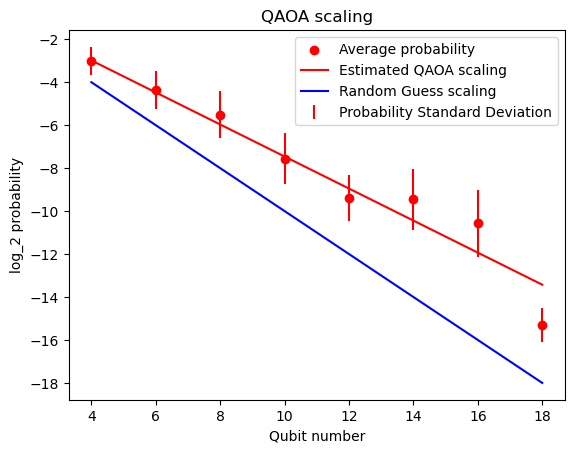

[0.74595901]
[0.02913955]


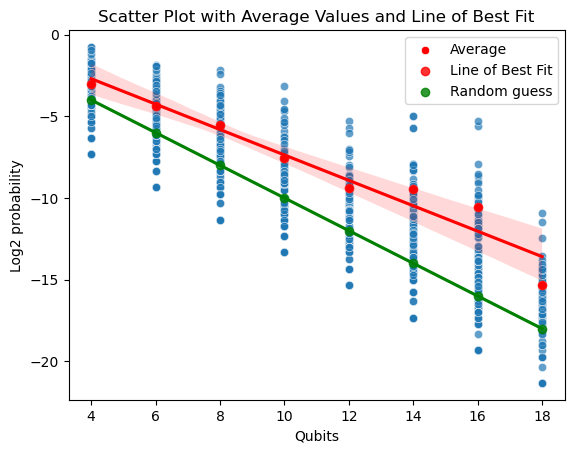

In [45]:
visualize_experiment(experiment_1_6_average, experiment_1_6_spread, 18)
visualize_experiment_spread(experiment_1_6_average, experiment_1_6_spread, 18)

## Complexity scaling (18 qubits, depth 16) Code: 1.8

Introduction:

Name: Complexity scaling up to 18 qubits with a depth 16 circuit.

What: Run complexity scaling with a depth 16 circuit

Why: the aim is to find whether there is much difference from depth 4 variant

Conclusion: 

Running parameters:

Bash script name: scaling-18-depth16.sh

Python script name: VQA-experiments-for-cluster-scaling-18-depth16.py

Hours: 3h (took half an hour?)

GPU's: 4

Job ID: 39919618

In [8]:
experiment_1_8_results = [(0.14656249999999998, array([0.08125, 0.075  , 0.09375, 0.1    , 0.03125, 0.03125, 0.175  ,
       0.01875, 0.00625, 0.0125 , 0.025  , 0.00625, 0.25625, 0.18125,
       0.21875, 0.29375, 0.20625, 0.25625, 0.38125, 0.21875, 0.18125,
       0.4375 , 0.125  , 0.16875, 0.06875, 0.075  , 0.05625, 0.0375 ,
       0.14375, 0.13125, 0.14375, 0.075  , 0.15625, 0.35   , 0.10625,
       0.08125, 0.14375, 0.10625, 0.0875 , 0.45   , 0.01875, 0.0125 ,
       0.31875, 0.0125 , 0.025  , 0.3625 , 0.20625, 0.24375, 0.06875,
       0.05625, 0.04375, 0.0875 , 0.20625, 0.18125, 0.09375, 0.0125 ,
       0.03125, 0.25   , 0.1    , 0.0625 , 0.06875, 0.09375, 0.10625,
       0.45625, 0.05625, 0.0375 , 0.06875, 0.03125, 0.025  , 0.1375 ,
       0.05625, 0.03125, 0.60625, 0.01875, 0.0375 , 0.0875 , 0.075  ,
       0.14375, 0.2125 , 0.14375, 0.125  , 0.46875, 0.05   , 0.09375,
       0.23125, 0.11875, 0.1125 , 0.25   , 0.3625 , 0.3625 , 0.3125 ,
       0.28125, 0.3    , 0.225  , 0.025  , 0.03125, 0.2    , 0.0125 ,
       0.01875, 0.5    , 0.00625, 0.03125, 0.10625, 0.15   , 0.14375,
       0.26875, 0.13125, 0.0625 , 0.04375, 0.13125, 0.225  , 0.54375,
       0.14375, 0.05625, 0.375  , 0.15625, 0.15   , 0.05625, 0.03125,
       0.0125 ])), (0.046848958333333336, array([0.134375 , 0.0515625, 0.0296875, 0.115625 , 0.003125 , 0.0125   ,
       0.003125 , 0.0015625, 0.0078125, 0.0125   , 0.034375 , 0.0078125,
       0.103125 , 0.034375 , 0.0921875, 0.1390625, 0.040625 , 0.0109375,
       0.028125 , 0.0109375, 0.0015625, 0.0046875, 0.0015625, 0.028125 ,
       0.053125 , 0.0453125, 0.0265625, 0.1703125, 0.034375 , 0.0421875,
       0.0546875, 0.040625 , 0.05625  , 0.0609375, 0.0140625, 0.0015625,
       0.00625  , 0.0171875, 0.015625 , 0.11875  , 0.034375 , 0.0109375,
       0.025    , 0.028125 , 0.0078125, 0.2921875, 0.1625   , 0.1390625,
       0.0703125, 0.0125   , 0.0140625, 0.0734375, 0.0328125, 0.028125 ,
       0.0921875, 0.0109375, 0.0578125, 0.125    , 0.028125 , 0.0421875,
       0.059375 , 0.0140625, 0.1828125, 0.00625  , 0.003125 , 0.0078125,
       0.0015625, 0.003125 , 0.0203125, 0.18125  , 0.0171875, 0.0015625,
       0.00625  , 0.0046875, 0.028125 , 0.2015625, 0.04375  , 0.0609375,
       0.0828125, 0.04375  , 0.003125 , 0.0640625, 0.003125 , 0.0140625,
       0.1390625, 0.028125 , 0.03125  , 0.109375 , 0.0109375, 0.009375 ,
       0.0890625, 0.021875 , 0.040625 , 0.14375  , 0.0015625, 0.0125   ,
       0.0125   , 0.0015625, 0.0078125, 0.00625  , 0.0078125, 0.0078125,
       0.125    , 0.0234375, 0.0140625, 0.0578125, 0.078125 , 0.040625 ,
       0.0078125, 0.0484375, 0.0484375, 0.078125 , 0.04375  , 0.0078125,
       0.0375   , 0.0390625, 0.0125   , 0.190625 , 0.015625 , 0.0625   ])), (0.017399088541666666, array([0.00546875, 0.01914063, 0.0046875 , 0.00195312, 0.00507813,
       0.00234375, 0.00195312, 0.00078125, 0.00195312, 0.00078125,
       0.01796875, 0.02695313, 0.05039063, 0.02421875, 0.00625   ,
       0.0640625 , 0.0046875 , 0.0078125 , 0.0421875 , 0.01171875,
       0.00585937, 0.02304688, 0.00234375, 0.003125  , 0.00546875,
       0.02617188, 0.02070312, 0.01796875, 0.003125  , 0.01523437,
       0.01132812, 0.02070313, 0.0171875 , 0.0140625 , 0.01953125,
       0.08515625, 0.00390625, 0.00546875, 0.05507813, 0.00039063,
       0.01835937, 0.02539062, 0.00078125, 0.02148437, 0.0203125 ,
       0.06367188, 0.02734375, 0.08554687, 0.00625   , 0.00234375,
       0.03710938, 0.04101562, 0.0078125 , 0.0171875 , 0.00039063,
       0.04335937, 0.0109375 , 0.00703125, 0.00898437, 0.00390625,
       0.00898437, 0.01132813, 0.04257812, 0.00429688, 0.00546875,
       0.01015625, 0.00078125, 0.00039063, 0.01132812, 0.0015625 ,
       0.00703125, 0.01367188, 0.00195312, 0.01835938, 0.02148438,
       0.03203125, 0.00195312, 0.03476562, 0.0109375 , 0.009375  ,
       0.0234375 , 0.00273437, 0.00390625, 0.00195312, 0.0140625 ,
       0.00429688, 0.00234375, 0.11953125, 0.01992187, 0.06210938,
       0.08046875, 0.00742188, 0.01171875, 0.00195312, 0.00390625,
       0.0109375 , 0.00117187, 0.00390625, 0.00117188, 0.00195312,
       0.00078125, 0.0015625 , 0.01679687, 0.01601562, 0.05664062,
       0.00859375, 0.00703125, 0.02109375, 0.03320312, 0.00234375,
       0.01210937, 0.01171875, 0.00351563, 0.053125  , 0.02851562,
       0.003125  , 0.00273437, 0.00195312, 0.02109375, 0.053125  ])), (0.004124348958333334, array([1.85546875e-03, 1.56250000e-03, 4.88281250e-04, 1.95312500e-04,
       5.56640625e-03, 9.76562500e-05, 4.88281250e-04, 3.02734375e-03,
       4.88281250e-04, 9.76562500e-05, 2.08007813e-02, 4.88281250e-04,
       2.92968750e-03, 1.28906250e-02, 1.75781250e-03, 7.81250000e-04,
       9.27734375e-03, 6.83593750e-04, 9.76562500e-05, 1.17187500e-02,
       3.90625000e-04, 3.90625000e-04, 3.90625000e-04, 4.88281250e-04,
       5.85937500e-04, 2.31445313e-02, 1.95312500e-04, 6.34765625e-03,
       4.88281250e-04, 3.51562500e-03, 1.46484375e-03, 1.37695312e-02,
       2.73437500e-03, 2.05078125e-03, 1.51367188e-02, 9.76562500e-04,
       4.88281250e-04, 4.39453125e-03, 7.81250000e-04, 1.46484375e-03,
       1.64062500e-02, 4.19921875e-03, 1.26953125e-03, 9.76562500e-05,
       4.88281250e-04, 2.06054688e-02, 3.51562500e-03, 6.15234375e-03,
       9.76562500e-05, 1.19140625e-02, 1.95312500e-04, 6.64062500e-03,
       3.51562500e-03, 6.44531250e-03, 3.12500000e-03, 2.92968750e-04,
       5.85937500e-04, 3.02734375e-03, 4.19921875e-03, 3.80859375e-03,
       1.95312500e-03, 9.27734375e-03, 1.07421875e-03, 4.88281250e-04,
       9.76562500e-05, 2.92968750e-04, 4.88281250e-04, 2.14843750e-03,
       5.85937500e-04, 1.56250000e-03, 1.07421875e-03, 1.85546875e-03,
       4.88281250e-04, 5.85937500e-04, 1.36718750e-03, 3.61328125e-03,
       1.94335937e-02, 4.68750000e-03, 2.92968750e-03, 6.64062500e-03,
       4.00390625e-03, 9.76562500e-04, 8.78906250e-04, 4.88281250e-04,
       2.73437500e-03, 1.06445313e-02, 8.78906250e-04, 2.83203125e-03,
       6.37695312e-02, 6.83593750e-04, 1.66015625e-03, 1.11328125e-02,
       1.17187500e-03, 1.17187500e-03, 8.59375000e-03, 2.24609375e-03,
       9.76562500e-05, 2.73437500e-03, 5.85937500e-04, 4.88281250e-04,
       4.88281250e-04, 9.76562500e-05, 2.83203125e-03, 2.35351563e-02,
       1.95312500e-04, 4.88281250e-04, 5.85937500e-04, 9.76562500e-04,
       4.88281250e-04, 3.32031250e-03, 5.56640625e-03, 2.24609375e-03,
       7.81250000e-03, 6.83593750e-04, 2.83203125e-03, 4.00390625e-03,
       2.05078125e-03, 9.76562500e-05, 6.54296875e-03, 5.85937500e-04])), (0.0011324055989583334, array([1.51367188e-03, 2.92968750e-04, 3.17382812e-04, 1.70898437e-04,
       5.12695313e-04, 8.54492188e-04, 2.44140625e-04, 5.12695313e-04,
       2.44140625e-04, 1.95312500e-04, 2.19726562e-04, 1.22070312e-04,
       5.12695313e-04, 6.34765625e-04, 5.12695313e-04, 1.70898437e-04,
       5.37109375e-04, 2.44140625e-05, 3.66210938e-04, 2.27050781e-03,
       2.44140625e-05, 1.70898437e-04, 2.92968750e-04, 7.32421875e-05,
       7.81250000e-04, 4.63867188e-03, 9.27734375e-04, 2.31933594e-03,
       7.08007812e-03, 2.68554688e-04, 1.31835938e-03, 1.63574219e-03,
       7.32421875e-05, 8.30078125e-04, 8.54492187e-04, 5.85937500e-04,
       9.76562500e-05, 1.83105469e-03, 1.22070312e-04, 3.66210938e-03,
       1.46484375e-04, 1.95312500e-04, 7.32421875e-05, 3.17382813e-04,
       2.19726562e-04, 1.82128906e-02, 1.33056641e-02, 1.22070312e-04,
       7.32421875e-05, 8.05664062e-04, 4.63867188e-04, 1.48925781e-03,
       6.10351562e-04, 3.66210938e-04, 3.22265625e-03, 6.10351562e-04,
       1.46484375e-04, 1.48925781e-03, 3.66210938e-04, 5.85937500e-04,
       3.17382813e-04, 5.73730469e-03, 2.68554688e-04, 2.44140625e-05,
       1.78222656e-03, 7.32421875e-05, 4.88281250e-05, 1.02539062e-03,
       1.14746094e-03, 1.73339844e-03, 4.00390625e-03, 2.44140625e-04,
       4.39453125e-04, 2.44140625e-04, 4.15039062e-04, 1.09863281e-03,
       3.90625000e-04, 1.95312500e-04, 2.05078125e-03, 7.08007812e-04,
       3.17382813e-04, 1.95312500e-04, 2.56347656e-03, 2.19726562e-04,
       1.14746094e-03, 2.46582031e-03, 4.88281250e-05, 3.22265625e-03,
       1.48925781e-03, 2.44140625e-04, 4.88281250e-04, 1.51367187e-03,
       8.05664062e-04, 1.17187500e-03, 1.19628906e-03, 2.44140625e-05,
       7.32421875e-05, 2.68554688e-04, 7.08007812e-04, 1.22070312e-04,
       2.92968750e-04, 9.76562500e-05, 2.61230469e-03, 6.83593750e-04,
       4.63867187e-04, 1.12304687e-03, 7.56835938e-04, 9.03320313e-04,
       4.15039062e-04, 7.32421875e-04, 9.76562500e-05, 6.34765625e-04,
       3.17382813e-04, 6.83593750e-04, 8.30078125e-04, 1.73339844e-03,
       3.66210938e-04, 4.88281250e-05, 1.83105469e-03, 3.90625000e-04])), (0.0007788594563802084, array([4.82177734e-04, 1.15966797e-04, 1.34277344e-04, 4.88281250e-05,
       5.00488281e-04, 3.05175781e-05, 1.09863281e-04, 4.27246094e-05,
       1.22070313e-05, 1.22070312e-04, 1.70898437e-04, 3.05175781e-05,
       8.30078125e-04, 4.88281250e-05, 1.34277344e-04, 1.09863281e-04,
       7.32421875e-05, 8.48388672e-04, 2.44140625e-04, 2.31933594e-04,
       1.09863281e-04, 4.88281250e-05, 3.05175781e-05, 2.25830078e-04,
       7.38525391e-04, 5.37109375e-04, 1.46484375e-04, 2.74658203e-04,
       1.02539063e-03, 3.05175781e-04, 8.66699219e-04, 7.99560547e-04,
       7.32421875e-05, 6.77490234e-04, 1.89208984e-04, 3.05175781e-05,
       5.49316406e-05, 1.58691406e-04, 1.15966797e-04, 1.67236328e-03,
       7.89794922e-03, 1.22070313e-05, 4.76074219e-04, 2.19726563e-04,
       6.10351563e-06, 6.01806641e-03, 1.41357422e-02, 5.46875000e-03,
       7.32421875e-05, 1.20239258e-03, 1.83105469e-05, 4.57763672e-04,
       6.77490234e-04, 1.09252930e-03, 1.55639648e-03, 2.99072266e-04,
       9.76562500e-05, 3.90625000e-04, 2.31933594e-04, 1.09863281e-04,
       1.77001953e-04, 7.20214844e-04, 5.55419922e-04, 1.83105469e-05,
       9.76562500e-05, 3.05175781e-05, 6.10351563e-06, 6.10351563e-06,
       1.40380859e-04, 6.16455078e-04, 2.19726562e-03, 5.49316406e-05,
       7.87353516e-04, 2.34375000e-03, 3.66210937e-05, 2.92968750e-04,
       2.97851562e-03, 5.61523437e-04, 5.55419922e-04, 4.33349609e-04,
       2.31933594e-04, 5.24902344e-04, 1.68457031e-03, 2.07519531e-04,
       1.40380859e-04, 1.34277344e-04, 4.27246094e-04, 2.67333984e-03,
       3.99780273e-03, 9.76562500e-05, 1.64794922e-04, 6.34765625e-04,
       7.93457031e-04, 3.17382813e-04, 2.38037109e-04, 1.83105469e-05,
       7.32421875e-05, 6.10351563e-06, 6.71386719e-05, 3.05175781e-05,
       3.05175781e-05, 1.22070313e-05, 1.36718750e-03, 3.61938477e-03,
       1.64794922e-04, 5.18798828e-04, 3.41796875e-04, 3.05175781e-05,
       2.68554688e-04, 3.05175781e-04, 2.44140625e-05, 3.11279297e-04,
       3.29589844e-04, 1.03759766e-04, 1.70898438e-04, 1.83105469e-04,
       3.05175781e-05, 7.38525391e-04, 6.89697266e-03, 9.76562500e-05])), (0.00026078542073567707, array([5.64575195e-05, 1.02233887e-04, 1.67846680e-05, 7.62939453e-06,
       2.09045410e-04, 6.10351563e-06, 1.22070313e-05, 1.64794922e-04,
       3.35693359e-05, 7.62939453e-06, 1.51062012e-04, 7.62939453e-06,
       1.05285645e-04, 3.28063965e-04, 4.88281250e-05, 7.62939453e-06,
       3.02124023e-04, 1.06811523e-05, 9.15527344e-06, 4.27246094e-05,
       1.06811523e-05, 7.62939453e-06, 4.57763672e-06, 8.85009766e-05,
       6.10351563e-06, 4.76074219e-04, 5.64575195e-05, 2.07519531e-04,
       8.08715820e-05, 4.45556641e-04, 4.73022461e-05, 5.40161133e-04,
       1.52587891e-04, 2.13623047e-05, 3.14331055e-04, 4.57763672e-05,
       7.62939453e-06, 1.96838379e-04, 1.22070313e-05, 1.95312500e-04,
       1.32598877e-03, 1.22070312e-05, 5.49316406e-05, 4.82177734e-04,
       3.66210937e-05, 1.44042969e-03, 2.57568359e-03, 1.77154541e-03,
       7.62939453e-06, 5.44738770e-04, 9.15527344e-06, 1.32751465e-04,
       1.67846680e-04, 1.66320801e-04, 8.39233398e-05, 7.32421875e-05,
       7.17163086e-05, 9.61303711e-05, 1.93786621e-04, 2.39562988e-04,
       9.15527344e-06, 3.17382813e-04, 3.54003906e-04, 7.62939453e-06,
       7.32421875e-05, 3.35693359e-05, 7.62939453e-06, 1.52587891e-05,
       9.15527344e-06, 1.54113770e-04, 3.84521484e-04, 7.93457031e-05,
       6.10351563e-06, 1.47552490e-03, 4.57763672e-06, 1.60217285e-04,
       1.41448975e-03, 1.12915039e-04, 9.00268555e-05, 1.08337402e-04,
       3.50952148e-05, 7.62939453e-06, 4.42504883e-05, 2.44140625e-05,
       5.18798828e-05, 2.19726563e-04, 1.67846680e-05, 1.60217285e-04,
       5.12542725e-03, 5.79833984e-05, 9.15527344e-06, 8.57543945e-04,
       1.20544434e-04, 2.74658203e-05, 2.77709961e-04, 3.96728516e-05,
       4.57763672e-06, 9.15527344e-06, 1.52587891e-05, 7.62939453e-06,
       7.62939453e-06, 7.62939453e-06, 1.52587891e-04, 2.07061768e-03,
       7.62939453e-06, 2.44140625e-05, 1.43432617e-04, 1.06811523e-05,
       1.22070313e-05, 8.08715820e-05, 4.88281250e-05, 5.64575195e-05,
       2.51770020e-04, 1.37329102e-05, 6.10351562e-05, 2.68554688e-04,
       5.49316406e-05, 7.62939453e-06, 2.02789307e-03, 2.28881836e-05])), (1.7744700113932294e-05, array([1.71661377e-05, 1.33514404e-05, 3.81469727e-06, 1.52587891e-06,
       2.05993652e-05, 8.77380371e-06, 4.19616699e-05, 1.14440918e-05,
       7.24792480e-06, 2.93731689e-05, 9.91821289e-06, 7.62939453e-06,
       1.56402588e-05, 5.34057617e-06, 8.01086426e-06, 5.34057617e-06,
       6.67572021e-05, 2.55584717e-05, 2.82287598e-05, 7.24792480e-06,
       1.98364258e-05, 2.28881836e-06, 1.90734863e-05, 6.48498535e-06,
       1.52587891e-05, 1.52587891e-05, 1.90734863e-05, 6.67572021e-05,
       1.25885010e-05, 3.92913818e-05, 9.91821289e-06, 1.10626221e-05,
       1.90734863e-06, 9.91821289e-06, 1.75476074e-05, 8.77380371e-06,
       2.67028809e-06, 6.48498535e-06, 6.86645508e-06, 7.24792480e-06,
       1.52587891e-05, 1.52587891e-06, 7.62939453e-06, 7.62939453e-06,
       3.05175781e-06, 2.67028809e-06, 1.64031982e-05, 6.86645508e-06,
       1.22070313e-05, 2.93731689e-05, 7.62939453e-07, 8.16345215e-05,
       6.25610352e-05, 1.15966797e-04, 6.86645508e-06, 1.22070313e-05,
       4.57763672e-06, 5.72204590e-06, 8.39233398e-06, 5.72204590e-06,
       6.48498535e-06, 5.34057617e-06, 2.59399414e-05, 1.14440918e-06,
       1.64031982e-05, 6.86645508e-06, 1.14440918e-05, 8.01086426e-06,
       7.62939453e-06, 6.06536865e-05, 1.35421753e-04, 6.06536865e-05,
       3.43322754e-06, 2.78472900e-05, 4.95910645e-06, 6.21795654e-05,
       1.56402588e-05, 2.63214111e-05, 4.57763672e-06, 3.05175781e-05,
       6.86645508e-06, 2.28881836e-06, 1.18255615e-05, 8.01086426e-06,
       6.40869141e-05, 2.86102295e-05, 3.16619873e-05, 1.41143799e-05,
       8.77380371e-06, 1.06811523e-05, 1.41143799e-05, 2.28881836e-05,
       3.43322754e-06, 6.86645508e-06, 9.15527344e-06, 3.81469727e-07,
       3.43322754e-06, 3.39508057e-05, 8.39233398e-06, 6.48498535e-06,
       4.19616699e-06, 6.10351563e-06, 1.44958496e-05, 2.05993652e-05,
       1.90734863e-06, 4.15802002e-05, 4.95910645e-06, 4.99725342e-05,
       7.62939453e-06, 2.59399414e-05, 1.90734863e-06, 2.67028809e-06,
       1.60217285e-05, 6.48498535e-06, 8.01086426e-06, 1.90734863e-05,
       2.67028809e-06, 3.81469727e-07, 2.89916992e-05, 8.01086426e-06]))]
experiment_1_8_average = [x for (x, y) in experiment_1_8_results]
experiment_1_8_spread = [y for (x, y) in experiment_1_8_results]

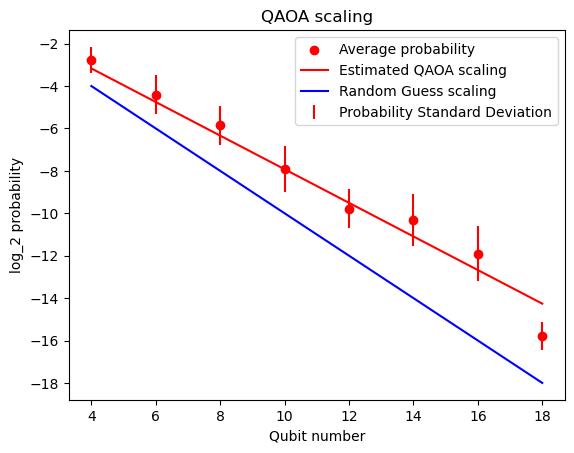

[0.79235507]
[0.02267897]


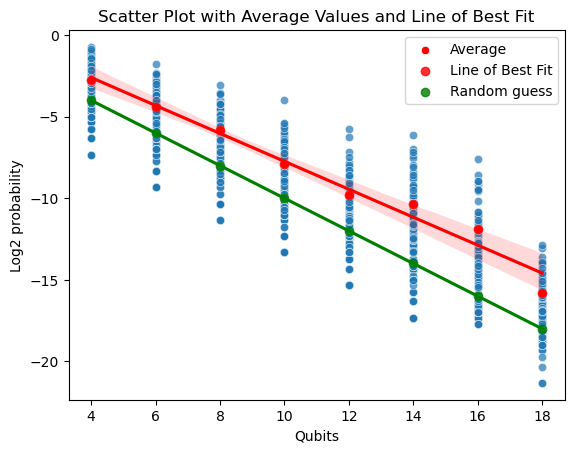

In [46]:
visualize_experiment(experiment_1_8_average, experiment_1_8_spread, 18)
visualize_experiment_spread(experiment_1_8_average, experiment_1_8_spread, 18)

## Complexity scaling (18 to 21 qubits, depth 4) Code: 1.7

Introduction:

Name: Complexity scaling up to 21 qubits from 18 qubits with a depth 4 circuit.

What: Run scaling but for the bigger problem sizes

Why: find how long it takes to be able to run all of the problem sizes together

Conclusion: it took under 2 hours... which is suspicious but nonetheless good

Running parameters:

Name: scaling-18-21
Bash script name: scaling-18-21.sh

Python script name: VQA-experiments-for-cluster-scaling-18-21.py

Saves to: scaling_18_21.txt

GPU's: 2 failed, trying 4GPU's failed

Hours: 6h (took under 2?)

Job ID: 39919488 

In [2]:
experiment_1_7_results = [(0.0005900573730468752, array([1.52587891e-06, 9.46044922e-05, 1.52587891e-05, 1.37329102e-05,
       2.21252441e-04, 6.10351563e-06, 1.22070313e-05, 4.88281250e-04,
       2.12097168e-04, 1.52587891e-06, 1.17492676e-04, 6.10351563e-06,
       5.49316406e-05, 1.96533203e-03, 2.30407715e-04, 6.10351563e-06,
       1.01623535e-03, 7.62939453e-06, 7.62939453e-06, 3.35693359e-05,
       7.17163086e-05, 2.71606445e-04, 6.56127930e-05, 2.45666504e-04,
       2.44140625e-05, 1.55639648e-04, 4.42504883e-05, 2.44140625e-05,
       5.82885742e-04, 2.31933594e-04, 1.06811523e-05, 5.64575195e-05,
       4.27246094e-05, 7.17163086e-05, 1.37329102e-04, 5.18798828e-05,
       5.79833984e-04, 2.08145142e-02, 2.34985352e-04, 1.98364258e-05,
       4.90570068e-03, 8.54492187e-05, 2.44140625e-05, 1.03607178e-03,
       5.64575195e-05, 3.05175781e-06, 5.79833984e-04, 1.67846680e-05,
       1.52587891e-06, 9.00268555e-05, 1.52587891e-05, 7.62939453e-06,
       2.89916992e-05, 7.62939453e-06, 9.15527344e-06, 1.93786621e-04,
       1.37329102e-05, 1.83105469e-05, 4.73022461e-05, 1.22070313e-05])), (3.2068888346354165e-05, array([4.38690186e-05, 2.47955322e-05, 5.18798828e-05, 1.52587891e-06,
       6.10351563e-06, 1.90734863e-06, 4.19616699e-06, 8.77380371e-06,
       4.19616699e-06, 1.14440918e-06, 9.91821289e-06, 4.57763672e-06,
       8.39233398e-06, 1.33514404e-05, 1.83105469e-05, 1.48773193e-05,
       1.71661377e-05, 9.15527344e-06, 7.62939453e-07, 2.21252441e-05,
       2.67028809e-06, 1.12533569e-04, 4.19616699e-05, 4.04357910e-05,
       2.25067139e-05, 9.91821289e-06, 5.34057617e-06, 5.72204590e-06,
       1.94549561e-05, 1.37329102e-05, 5.34057617e-06, 1.79290771e-05,
       9.15527344e-06, 2.28881836e-05, 8.39233398e-06, 2.51770020e-05,
       2.32696533e-05, 1.98364258e-05, 7.24792480e-06, 1.18255615e-05,
       1.56402588e-05, 4.95910645e-06, 4.50134277e-04, 2.34603882e-04,
       3.94821167e-04, 3.43322754e-06, 1.33514404e-05, 1.14440918e-06,
       6.48498535e-06, 9.15527344e-06, 7.62939453e-06, 8.01086426e-06,
       8.39233398e-06, 1.44958496e-05, 3.05175781e-06, 9.53674316e-06,
       7.62939453e-06, 1.56402588e-05, 1.25885010e-05, 1.10626221e-05])), (4.627704620361327e-06, array([1.23977661e-06, 6.24656677e-06, 1.98841095e-05, 1.85966492e-06,
       1.04904175e-06, 8.10623169e-07, 5.72204590e-07, 1.76429749e-06,
       7.62939453e-07, 2.38418579e-07, 1.76429749e-06, 2.38418579e-07,
       2.52723694e-06, 6.67572021e-07, 1.90734863e-07, 1.43051147e-07,
       3.43322754e-06, 5.24520874e-06, 2.38418579e-07, 3.00407410e-06,
       4.76837158e-08, 2.14576721e-05, 7.62939453e-06, 9.05990601e-07,
       9.53674316e-08, 2.62260437e-06, 5.72204590e-07, 2.38418579e-07,
       1.95503235e-06, 2.47955322e-06, 5.72204590e-07, 2.62260437e-06,
       7.15255737e-07, 1.04427338e-05, 6.62803650e-06, 9.25064087e-06,
       6.67572021e-07, 3.14712524e-06, 3.52859497e-06, 3.81469727e-07,
       3.81469727e-06, 4.29153442e-07, 4.48226929e-06, 7.04765320e-05,
       4.77790833e-05, 2.38418579e-07, 2.81333923e-06, 3.81469727e-07,
       2.38418579e-07, 1.19209290e-06, 2.38418579e-07, 2.76565552e-06,
       3.05175781e-06, 2.05039978e-06, 1.14440918e-06, 3.48091125e-06,
       2.86102295e-07, 2.38418579e-07, 3.00407410e-06, 1.71661377e-06]))]
experiment_1_7_average = [x for (x, y) in experiment_1_7_results]
experiment_1_7_spread = [y for (x, y) in experiment_1_7_results]

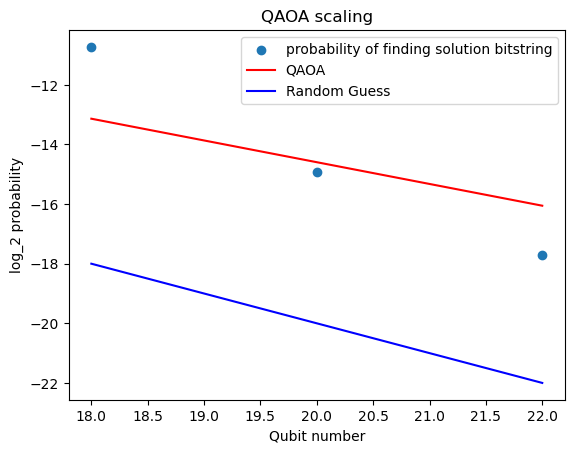

[0.7297357]
[0.05997684]


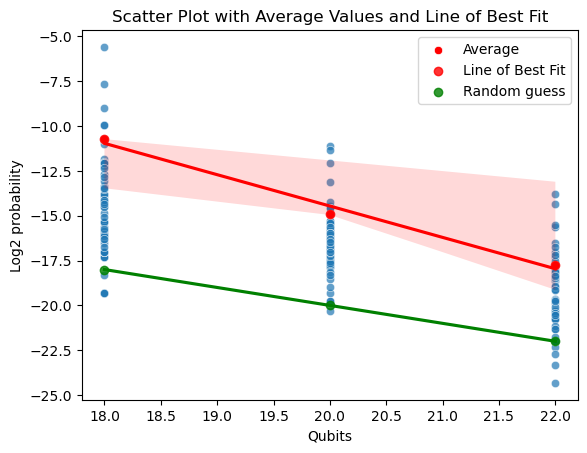

In [8]:
visualize_experiment(experiment_1_7_average, 21, min_qubits_num=18)
visualize_experiment_spread(experiment_1_7_average, experiment_1_7_spread, 21, min_qubits_num=18)

## Complexity scaling (21 qubits, depth 4) Code 1.9

Introduction:

Name: Complexity scaling up to 21 qubits

What: larger scaling experiment

Why: find whether the scaling would be similar with up to 18 qubits...

Conclusion: Scaling not looking too good because major dip after 16 qubits :/

Running parameters:

Name: scaling-21-depth4
Bash script name: scaling-21-depth4.sh

Python script name: VQA-experiments-for-cluster-scaling-21-depth4.py

Saves to: scaling_up_to_21_depth4.txt

GPU's: 4 GPU

Hours: 6h (took 5 hours)

Job ID: 40023863 (running it again! 40284589)

In [6]:
experiment_1_9_results = [(0.16192708333333333, array([0.59375, 0.08125, 0.09375, 0.1    , 0.03125, 0.03125, 0.4625 ,
       0.325  , 0.275  , 0.125  , 0.1625 , 0.15   , 0.28125, 0.21875,
       0.20625, 0.425  , 0.175  , 0.175  , 0.0875 , 0.03125, 0.05   ,
       0.24375, 0.05625, 0.025  , 0.1875 , 0.03125, 0.01875, 0.33125,
       0.05625, 0.05625, 0.35625, 0.23125, 0.2875 , 0.15625, 0.03125,
       0.03125, 0.10625, 0.025  , 0.025  , 0.0875 , 0.14375, 0.18125,
       0.15625, 0.15   , 0.19375, 0.3125 , 0.175  , 0.1875 , 0.2125 ,
       0.18125, 0.18125, 0.175  , 0.025  , 0.05   , 0.15   , 0.00625,
       0.03125, 0.1625 , 0.16875, 0.15   , 0.275  , 0.075  , 0.0625 ,
       0.2125 , 0.275  , 0.2625 , 0.1375 , 0.19375, 0.175  , 0.225  ,
       0.06875, 0.1    , 0.23125, 0.19375, 0.11875, 0.275  , 0.05   ,
       0.025  , 0.11875, 0.19375, 0.175  , 0.2125 , 0.1    , 0.06875,
       0.2    , 0.03125, 0.04375, 0.09375, 0.18125, 0.1625 , 0.09375,
       0.43125, 0.38125, 0.1625 , 0.14375, 0.14375, 0.175  , 0.03125,
       0.0625 , 0.6375 , 0.20625, 0.26875, 0.19375, 0.06875, 0.09375,
       0.1125 , 0.18125, 0.225  , 0.24375, 0.00625, 0.03125, 0.1    ,
       0.35   , 0.41875, 0.34375, 0.03125, 0.03125, 0.225  , 0.0375 ,
       0.04375])), (0.09119791666666667, array([0.1671875, 0.08125  , 0.03125  , 0.109375 , 0.0078125, 0.0078125,
       0.43125  , 0.1375   , 0.0078125, 0.0671875, 0.021875 , 0.0015625,
       0.3546875, 0.0765625, 0.0609375, 0.3484375, 0.121875 , 0.0125   ,
       0.096875 , 0.05625  , 0.025    , 0.31875  , 0.003125 , 0.009375 ,
       0.29375  , 0.0109375, 0.0140625, 0.146875 , 0.0640625, 0.0015625,
       0.1390625, 0.009375 , 0.0046875, 0.025    , 0.01875  , 0.0234375,
       0.0578125, 0.0140625, 0.0078125, 0.028125 , 0.003125 , 0.0671875,
       0.215625 , 0.0171875, 0.021875 , 0.11875  , 0.0203125, 0.0359375,
       0.2640625, 0.0046875, 0.0078125, 0.3      , 0.05     , 0.0140625,
       0.0078125, 0.003125 , 0.0046875, 0.190625 , 0.1328125, 0.0390625,
       0.1890625, 0.00625  , 0.0265625, 0.271875 , 0.0625   , 0.00625  ,
       0.6359375, 0.16875  , 0.1546875, 0.3625   , 0.03125  , 0.003125 ,
       0.0234375, 0.0125   , 0.0015625, 0.1765625, 0.0078125, 0.0203125,
       0.0859375, 0.0140625, 0.040625 , 0.071875 , 0.00625  , 0.0671875,
       0.0078125, 0.0015625, 0.0015625, 0.2      , 0.16875  , 0.146875 ,
       0.0765625, 0.0171875, 0.009375 , 0.246875 , 0.0609375, 0.003125 ,
       0.365625 , 0.08125  , 0.0671875, 0.2796875, 0.1953125, 0.1015625,
       0.003125 , 0.0015625, 0.00625  , 0.3203125, 0.0046875, 0.025    ,
       0.0140625, 0.0078125, 0.0234375, 0.5515625, 0.003125 , 0.0078125,
       0.3953125, 0.025    , 0.009375 , 0.0890625, 0.0171875, 0.0265625])), (0.04558268229166666, array([7.42187500e-03, 7.42187500e-02, 5.85937500e-02, 1.95312500e-03,
       1.95312500e-03, 1.21875000e-01, 9.17968750e-02, 4.02343750e-02,
       7.96875000e-02, 4.14062500e-02, 2.73437500e-03, 8.98437500e-03,
       3.63281250e-02, 7.85156250e-02, 5.82031250e-02, 2.26562500e-02,
       9.45312500e-02, 1.01562500e-01, 7.81250000e-04, 6.95312500e-02,
       9.06250000e-02, 7.81250000e-04, 3.55468750e-02, 1.44531250e-02,
       1.95312500e-03, 8.98437500e-03, 2.35156250e-01, 4.29687500e-03,
       2.50000000e-02, 5.62500000e-02, 6.36718750e-02, 1.01562500e-02,
       1.11328125e-01, 1.95312500e-03, 4.64843750e-02, 9.49218750e-02,
       3.90625000e-03, 4.29687500e-03, 3.59375000e-02, 2.73437500e-02,
       5.46875000e-03, 3.71093750e-02, 2.07031250e-02, 1.36718750e-02,
       1.71875000e-02, 2.96875000e-02, 1.64062500e-02, 1.28906250e-02,
       3.55468750e-02, 6.64062500e-03, 5.00000000e-02, 3.90625000e-04,
       8.59375000e-03, 1.05468750e-02, 1.95312500e-03, 4.68750000e-03,
       1.56250000e-03, 2.26562500e-02, 2.65625000e-02, 7.61718750e-02,
       1.48437500e-02, 2.65625000e-02, 2.38281250e-02, 5.82031250e-02,
       1.36718750e-02, 1.01562500e-02, 3.35937500e-02, 1.05468750e-01,
       4.82421875e-01, 4.68750000e-03, 1.99218750e-02, 5.00000000e-02,
       3.00781250e-02, 2.46093750e-02, 9.76562500e-03, 3.90625000e-03,
       7.81250000e-03, 5.07812500e-03, 4.60937500e-02, 7.03125000e-03,
       1.71875000e-02, 6.64062500e-03, 2.73437500e-03, 4.57031250e-02,
       1.17187500e-03, 3.51562500e-03, 3.90625000e-04, 2.81250000e-02,
       1.31250000e-01, 2.01953125e-01, 1.53906250e-01, 1.48437500e-02,
       6.64062500e-02, 2.69531250e-02, 5.42968750e-02, 6.13281250e-02,
       3.51562500e-03, 9.53125000e-02, 1.66015625e-01, 5.19531250e-02,
       2.08203125e-01, 2.22656250e-01, 5.07812500e-03, 1.95312500e-03,
       6.64062500e-03, 4.17968750e-02, 3.39843750e-02, 2.02734375e-01,
       1.95312500e-03, 1.44531250e-02, 6.32812500e-02, 1.58203125e-01,
       2.53906250e-02, 1.71875000e-02, 7.81250000e-04, 2.26562500e-02,
       3.00781250e-02, 2.73437500e-03, 9.37500000e-03, 2.53906250e-02])), (0.01863199869791667, array([1.26953125e-03, 8.66210937e-02, 2.34375000e-03, 4.88281250e-04,
       8.64257812e-02, 4.88281250e-04, 2.85156250e-02, 1.39648438e-02,
       8.88671875e-03, 1.95312500e-04, 1.25000000e-02, 2.05078125e-03,
       5.56640625e-03, 3.39843750e-02, 5.95703125e-03, 1.85546875e-02,
       5.77148437e-02, 1.48437500e-02, 6.83593750e-04, 8.71093750e-02,
       2.92968750e-04, 3.90625000e-04, 2.73437500e-03, 1.95312500e-04,
       4.88281250e-04, 1.32031250e-01, 6.83593750e-04, 4.88281250e-04,
       7.12890625e-03, 2.53906250e-03, 1.15234375e-02, 8.78906250e-02,
       3.90625000e-04, 4.88281250e-04, 4.29687500e-02, 6.83593750e-04,
       2.92968750e-04, 6.34765625e-03, 2.73437500e-03, 4.88281250e-04,
       4.09179687e-02, 7.81250000e-04, 5.85937500e-04, 1.36718750e-03,
       6.83593750e-04, 2.34375000e-03, 1.36718750e-02, 2.92968750e-04,
       4.58984375e-03, 5.11718750e-02, 2.92968750e-04, 1.95312500e-04,
       4.19921875e-03, 4.49218750e-03, 4.88281250e-04, 1.46484375e-03,
       4.88281250e-04, 3.32031250e-03, 2.34375000e-02, 2.24609375e-03,
       1.95312500e-04, 2.30468750e-02, 1.26953125e-03, 4.39453125e-03,
       2.50000000e-02, 9.76562500e-05, 6.34765625e-02, 1.93066406e-01,
       2.15820313e-02, 4.88281250e-04, 7.81250000e-03, 9.76562500e-05,
       1.36718750e-03, 3.80859375e-03, 4.88281250e-04, 3.90625000e-04,
       2.14843750e-03, 4.88281250e-04, 2.14843750e-03, 1.45507812e-02,
       9.76562500e-05, 4.88281250e-04, 4.21875000e-02, 9.76562500e-05,
       4.88281250e-04, 5.85937500e-04, 4.88281250e-04, 1.16210938e-02,
       1.56054688e-01, 2.14843750e-03, 6.83593750e-03, 7.98828125e-02,
       4.88281250e-04, 2.92968750e-04, 1.47460938e-02, 7.81250000e-04,
       2.53906250e-03, 1.21386719e-01, 1.95312500e-04, 2.38281250e-02,
       2.46679687e-01, 3.80859375e-03, 4.88281250e-04, 7.61718750e-03,
       4.88281250e-04, 1.75781250e-03, 1.67480469e-01, 8.78906250e-04,
       1.95312500e-04, 1.38671875e-02, 4.88281250e-04, 1.85546875e-03,
       1.26953125e-02, 4.88281250e-04, 3.90625000e-04, 2.44140625e-03,
       2.92968750e-04, 1.85546875e-03, 1.30859375e-02, 1.85546875e-03])), (0.0026035563151041666, array([2.85644531e-03, 1.17187500e-03, 9.52148437e-04, 9.76562500e-05,
       1.07421875e-03, 1.22070312e-04, 1.95800781e-02, 2.85644531e-03,
       3.41796875e-04, 8.54492188e-04, 2.36816406e-03, 1.07421875e-03,
       3.73535156e-03, 3.63769531e-03, 1.46484375e-04, 1.56005859e-02,
       9.76562500e-04, 1.22070312e-04, 2.12402344e-03, 1.22070312e-04,
       1.46484375e-04, 1.09863281e-03, 3.66210938e-04, 4.88281250e-04,
       4.15039063e-04, 1.97753906e-03, 2.44140625e-04, 1.09863281e-03,
       3.17382812e-03, 7.32421875e-04, 8.76464844e-03, 4.32128906e-03,
       1.46484375e-04, 5.37109375e-04, 5.88378906e-03, 4.15039062e-04,
       3.90625000e-04, 7.56835938e-04, 3.66210938e-04, 1.22070312e-04,
       1.14746094e-03, 2.19726563e-04, 6.59179688e-04, 2.00195312e-03,
       7.32421875e-05, 1.68457031e-03, 3.05175781e-03, 3.12500000e-03,
       8.05664063e-04, 9.76562500e-04, 7.08007813e-04, 1.68457031e-03,
       7.81250000e-04, 1.95312500e-04, 1.22070312e-04, 1.95312500e-04,
       2.19726563e-04, 3.12500000e-03, 7.08007812e-04, 3.41796875e-04,
       8.30078125e-04, 1.78222656e-03, 1.70898438e-03, 1.00097656e-03,
       1.29394531e-03, 9.03320313e-04, 6.79687500e-02, 1.15722656e-02,
       2.44140625e-05, 1.56250000e-03, 6.59179688e-04, 1.70898437e-04,
       2.05078125e-03, 9.76562500e-04, 3.66210938e-04, 3.17382812e-04,
       1.19628906e-03, 2.44140625e-04, 1.22070312e-04, 1.61132813e-03,
       4.88281250e-05, 1.46484375e-04, 2.44140625e-04, 2.19726562e-04,
       2.44140625e-05, 3.17382813e-04, 1.22070312e-04, 2.16552734e-02,
       2.92968750e-03, 5.85937500e-04, 6.90917969e-03, 9.76562500e-05,
       1.46484375e-04, 1.73339844e-03, 7.15332031e-03, 1.14746094e-03,
       5.98144531e-03, 5.37109375e-03, 1.70898437e-04, 3.21044922e-02,
       9.76562500e-04, 8.30078125e-04, 1.22070312e-04, 5.37109375e-04,
       1.22070312e-04, 1.00097656e-03, 1.73339844e-03, 8.78906250e-04,
       2.44140625e-04, 3.17382812e-04, 9.76562500e-05, 1.58691406e-03,
       1.56250000e-03, 4.39453125e-04, 6.59179688e-04, 1.73339844e-03,
       1.04980469e-03, 4.88281250e-05, 1.58691406e-03, 3.41796875e-04])), (0.005126393636067708, array([3.97338867e-03, 3.69262695e-03, 3.66210937e-05, 6.71386719e-05,
       7.83081055e-03, 3.05175781e-05, 7.18383789e-03, 1.21215820e-02,
       1.83105469e-05, 6.16455078e-04, 6.10351563e-06, 3.47900391e-04,
       4.68750000e-03, 2.14233398e-03, 2.85034180e-03, 1.21093750e-02,
       6.76879883e-03, 2.44140625e-04, 3.58886719e-03, 3.67431641e-03,
       3.05175781e-05, 8.05664062e-04, 2.31933594e-04, 2.44140625e-05,
       8.85009766e-04, 3.06396484e-02, 3.05175781e-05, 2.19726563e-03,
       1.31225586e-03, 3.66210937e-05, 4.27856445e-03, 9.68627930e-03,
       2.13623047e-04, 1.22680664e-03, 2.69165039e-03, 2.44140625e-05,
       1.89208984e-04, 1.23291016e-03, 6.10351562e-05, 2.01416016e-04,
       8.36181641e-04, 1.46484375e-04, 7.62939453e-04, 1.22070312e-04,
       6.10351562e-05, 5.73730469e-04, 8.42285156e-04, 6.16455078e-04,
       2.50244141e-04, 5.30395508e-03, 4.51660156e-04, 1.89208984e-04,
       1.66625977e-03, 6.71386719e-05, 6.10351563e-06, 4.88281250e-05,
       3.05175781e-05, 2.56958008e-03, 5.28564453e-03, 4.27246094e-05,
       9.21630859e-04, 3.37524414e-03, 2.44140625e-05, 9.33837891e-04,
       1.70288086e-03, 3.66210937e-05, 5.27587891e-02, 1.85058594e-01,
       1.66625977e-03, 1.00097656e-03, 1.19018555e-03, 1.22070313e-05,
       1.31225586e-03, 5.67626953e-04, 7.93457031e-05, 8.54492187e-05,
       1.34277344e-04, 1.83105469e-05, 7.32421875e-05, 1.77001953e-04,
       2.07519531e-04, 7.32421875e-05, 1.12304688e-03, 3.05175781e-05,
       3.05175781e-05, 3.05175781e-05, 2.44140625e-05, 2.22961426e-02,
       2.69836426e-02, 2.50244141e-04, 6.28051758e-03, 2.91137695e-03,
       8.05664062e-04, 2.52685547e-03, 2.16674805e-03, 1.09863281e-03,
       1.01684570e-02, 1.74804687e-02, 1.83105469e-05, 4.52453613e-02,
       3.86413574e-02, 4.02832031e-04, 3.05175781e-05, 1.22070313e-05,
       8.54492187e-05, 2.79541016e-03, 2.65075684e-02, 1.83105469e-05,
       3.41796875e-04, 1.37939453e-03, 2.92968750e-04, 9.64355469e-04,
       7.56835937e-04, 6.10351563e-06, 4.33349609e-04, 2.07519531e-03,
       1.22070313e-05, 3.66210938e-04, 1.26953125e-03, 3.05175781e-05])), (0.003241717020670573, array([5.64575195e-05, 5.40313721e-03, 3.81469727e-05, 3.05175781e-06,
       8.36181641e-03, 3.05175781e-06, 2.57720947e-03, 3.59344482e-03,
       4.40979004e-04, 4.57763672e-06, 1.15814209e-03, 1.98364258e-05,
       1.44958496e-04, 2.30865479e-03, 1.43280029e-03, 1.49688721e-03,
       7.90557861e-03, 5.18798828e-05, 1.52587891e-05, 5.81359863e-03,
       1.52587891e-06, 5.03540039e-05, 7.55310059e-04, 9.46044922e-05,
       1.52587891e-06, 2.89093018e-02, 1.52587891e-05, 1.06811523e-05,
       1.97601318e-03, 2.59399414e-05, 7.44628906e-04, 9.16137695e-03,
       4.27246094e-05, 1.52587891e-06, 3.46679687e-03, 3.20434570e-05,
       1.67846680e-05, 5.50842285e-04, 4.57763672e-05, 7.62939453e-06,
       1.08184814e-03, 2.13623047e-05, 7.62939453e-06, 3.89099121e-04,
       1.81579590e-04, 6.40869141e-05, 4.44030762e-04, 5.64575195e-05,
       6.71386719e-05, 5.04608154e-03, 3.35693359e-05, 3.35693359e-05,
       2.71606445e-04, 2.13623047e-05, 7.62939453e-06, 3.20434570e-05,
       7.62939453e-06, 4.42504883e-05, 1.07421875e-03, 5.18798828e-05,
       9.30786133e-05, 1.90734863e-04, 5.79833984e-05, 1.63269043e-04,
       2.13928223e-03, 1.15966797e-04, 1.44317627e-02, 1.25711060e-01,
       3.92608643e-03, 2.13623047e-05, 7.84301758e-04, 3.20434570e-05,
       1.37329102e-05, 4.25720215e-04, 4.27246094e-05, 1.06811523e-05,
       9.00268555e-05, 1.98364258e-05, 3.05175781e-06, 1.98364258e-05,
       3.66210938e-05, 1.52587891e-06, 1.28173828e-03, 9.15527344e-06,
       7.62939453e-06, 7.62939453e-06, 7.62939453e-06, 8.65173340e-04,
       2.85064697e-02, 5.32531738e-04, 1.81579590e-04, 4.08782959e-03,
       1.06811523e-05, 5.03540039e-05, 3.11584473e-03, 3.35693359e-05,
       1.14440918e-04, 1.90521240e-02, 2.13623047e-04, 2.36816406e-03,
       5.20812988e-02, 3.08227539e-04, 7.62939453e-06, 3.05175781e-05,
       1.52587891e-06, 2.13623047e-05, 3.01742554e-02, 3.05175781e-06,
       7.62939453e-06, 9.91821289e-05, 1.37329102e-05, 3.96728516e-05,
       7.69042969e-04, 5.95092773e-05, 1.52587891e-06, 3.44848633e-04,
       3.66210937e-05, 7.93457031e-05, 4.04357910e-04, 6.86645508e-05])), (2.0488103230794272e-05, array([3.96728516e-05, 3.66210937e-05, 1.22070313e-05, 2.28881836e-06,
       2.59399414e-05, 6.10351563e-06, 6.10351563e-06, 2.67028809e-06,
       2.67028809e-06, 6.86645508e-06, 1.64031982e-05, 4.95910645e-06,
       1.71661377e-04, 1.61361694e-04, 6.46972656e-04, 1.44958496e-05,
       2.09808350e-05, 3.05175781e-06, 2.40325928e-05, 5.72204590e-06,
       1.90734863e-06, 1.02996826e-05, 2.25067139e-05, 2.67028809e-06,
       1.14440918e-06, 9.91821289e-06, 1.25885010e-05, 1.02996826e-05,
       2.36511230e-05, 1.41143799e-05, 7.24792480e-06, 2.44140625e-05,
       1.14440918e-06, 2.63214111e-05, 1.71661377e-05, 8.77380371e-06,
       2.67028809e-06, 3.47137451e-05, 1.37329102e-05, 1.10626221e-05,
       1.60217285e-05, 2.67028809e-06, 1.02996826e-05, 1.18255615e-05,
       9.53674316e-06, 6.86645508e-06, 4.76837158e-05, 1.90734863e-05,
       1.14440918e-06, 1.22070313e-05, 1.44958496e-05, 1.10626221e-05,
       2.97546387e-05, 6.10351563e-06, 9.91821289e-06, 1.14440918e-05,
       8.39233398e-06, 4.19616699e-06, 1.29699707e-05, 3.81469727e-06,
       1.83105469e-05, 4.00543213e-05, 1.06811523e-05, 2.09808350e-05,
       1.44958496e-05, 1.18255615e-05, 4.57763672e-06, 3.81469727e-06,
       4.19616699e-06, 3.81469727e-07, 1.18255615e-05, 9.91821289e-06,
       1.48773193e-05, 1.52587891e-05, 4.57763672e-06, 7.62939453e-07,
       3.81469727e-06, 4.19616699e-06, 1.90734863e-06, 6.10351563e-06,
       1.52587891e-06, 4.19616699e-06, 2.78472900e-05, 1.52587891e-06,
       1.14440918e-06, 6.10351563e-06, 1.94549561e-05, 7.24792480e-06,
       1.41143799e-05, 8.39233398e-06, 4.19616699e-06, 4.19616699e-06,
       4.95910645e-06, 2.67028809e-06, 1.98364258e-05, 6.10351563e-06,
       2.28881836e-06, 2.51770020e-05, 1.64031982e-05, 5.11169434e-05,
       1.98364258e-05, 2.78472900e-05, 1.90734863e-06, 1.83105469e-05,
       5.34057617e-06, 8.69750977e-05, 2.63214111e-05, 1.60217285e-05,
       1.67846680e-05, 1.29699707e-05, 1.18255615e-05, 1.06811523e-05,
       8.39233398e-06, 1.14440918e-06, 8.77380371e-06, 1.33514404e-05,
       6.10351563e-06, 1.14440918e-06, 1.37329102e-05, 3.43322754e-06])), (2.9472510019938146e-06, array([2.38418579e-07, 5.72204590e-06, 6.29425049e-06, 1.43051147e-07,
       2.19345093e-06, 1.57356262e-06, 2.38418579e-07, 5.57899475e-06,
       4.29153442e-07, 5.72204590e-07, 2.71797180e-06, 3.81469727e-07,
       6.10351563e-06, 8.23974609e-05, 6.69956207e-05, 2.38418579e-07,
       2.24113464e-06, 1.95503235e-06, 2.33650208e-06, 3.19480896e-06,
       1.38282776e-06, 4.29153442e-07, 2.05039978e-06, 1.95503235e-06,
       2.38418579e-07, 1.57356262e-06, 1.00135803e-06, 2.38418579e-07,
       2.33650208e-06, 9.53674316e-08, 1.28746033e-06, 4.24385071e-06,
       2.90870667e-06, 6.19888306e-07, 5.29289246e-06, 4.57763672e-06,
       9.53674316e-08, 5.96046448e-06, 1.28746033e-06, 1.66893005e-06,
       3.29017639e-06, 2.86102295e-07, 1.71661377e-06, 3.09944153e-06,
       1.09672546e-06, 5.24520874e-07, 4.76837158e-06, 1.43051147e-07,
       4.29153442e-07, 2.09808350e-06, 4.76837158e-07, 1.90734863e-07,
       1.23977661e-06, 3.81469727e-07, 2.38418579e-07, 1.85966492e-06,
       1.00135803e-06, 1.33514404e-06, 6.43730164e-06, 1.43051147e-07,
       2.86102295e-07, 1.07765198e-05, 2.28881836e-06, 1.04904175e-06,
       2.47955322e-06, 1.90734863e-07, 2.38418579e-07, 2.90870667e-06,
       4.14848328e-06, 1.43051147e-07, 2.05039978e-06, 2.24113464e-06,
       1.76429749e-06, 2.09808350e-06, 5.24520874e-07, 4.76837158e-08,
       2.62260437e-06, 1.43051147e-06, 2.38418579e-07, 1.66893005e-06,
       1.90734863e-07, 4.76837158e-08, 1.85966492e-06, 3.81469727e-07,
       2.38418579e-07, 1.43051147e-06, 8.58306885e-07, 8.10623169e-07,
       1.57356262e-06, 3.09944153e-06, 4.76837158e-08, 1.57356262e-06,
       1.19209290e-06, 3.81469727e-07, 1.76429749e-06, 5.24520874e-07,
       9.05990601e-07, 2.47955322e-06, 1.62124634e-06, 5.24520874e-07,
       2.76565552e-06, 2.62260437e-06, 4.76837158e-08, 2.09808350e-06,
       2.38418579e-07, 1.04904175e-06, 6.00814819e-06, 1.90734863e-07,
       8.58306885e-07, 2.95639038e-06, 8.58306885e-07, 4.76837158e-08,
       1.14440918e-06, 8.58306885e-07, 1.14440918e-06, 3.52859497e-06,
       7.62939453e-07, 1.57356262e-06, 1.19209290e-06, 1.47819519e-06]))]
experiment_1_9_2_results = [(0.16505208333333332, array([0.325  , 0.03125, 0.0125 , 0.225  , 0.03125, 0.00625, 0.075  ,
       0.125  , 0.1    , 0.3    , 0.14375, 0.1125 , 0.21875, 0.41875,
       0.4875 , 0.275  , 0.1375 , 0.1625 , 0.3    , 0.21875, 0.19375,
       0.0875 , 0.05   , 0.11875, 0.19375, 0.1    , 0.10625, 0.375  ,
       0.1625 , 0.09375, 0.2    , 0.2625 , 0.34375, 0.16875, 0.0375 ,
       0.04375, 0.25625, 0.2125 , 0.15625, 0.3125 , 0.10625, 0.0375 ,
       0.28125, 0.19375, 0.18125, 0.08125, 0.69375, 0.73125, 0.3125 ,
       0.31875, 0.28125, 0.0625 , 0.06875, 0.09375, 0.075  , 0.18125,
       0.16875, 0.1375 , 0.075  , 0.125  , 0.0625 , 0.0875 , 0.04375,
       0.33125, 0.13125, 0.14375, 0.025  , 0.14375, 0.15   , 0.075  ,
       0.15   , 0.1375 , 0.2125 , 0.2375 , 0.15625, 0.25   , 0.00625,
       0.04375, 0.3125 , 0.1125 , 0.16875, 0.475  , 0.0875 , 0.0625 ,
       0.20625, 0.06875, 0.05   , 0.11875, 0.2375 , 0.3125 , 0.15   ,
       0.18125, 0.16875, 0.1    , 0.01875, 0.03125, 0.275  , 0.04375,
       0.0125 , 0.3625 , 0.03125, 0.0125 , 0.40625, 0.075  , 0.0375 ,
       0.0625 , 0.09375, 0.0875 , 0.0625 , 0.2375 , 0.2    , 0.46875,
       0.0875 , 0.09375, 0.1    , 0.06875, 0.0625 , 0.21875, 0.025  ,
       0.04375])), (0.0770703125, array([0.075    , 0.0375   , 0.0359375, 0.0015625, 0.0078125, 0.003125 ,
       0.234375 , 0.0046875, 0.0359375, 0.171875 , 0.0421875, 0.040625 ,
       0.2828125, 0.0578125, 0.0796875, 0.1390625, 0.14375  , 0.08125  ,
       0.1      , 0.0734375, 0.084375 , 0.0140625, 0.0171875, 0.084375 ,
       0.0265625, 0.0609375, 0.0171875, 0.19375  , 0.121875 , 0.003125 ,
       0.0875   , 0.01875  , 0.06875  , 0.2421875, 0.025    , 0.0453125,
       0.021875 , 0.0359375, 0.0078125, 0.315625 , 0.08125  , 0.053125 ,
       0.1859375, 0.00625  , 0.003125 , 0.0328125, 0.0109375, 0.021875 ,
       0.275    , 0.2078125, 0.1578125, 0.20625  , 0.04375  , 0.021875 ,
       0.159375 , 0.0015625, 0.015625 , 0.1671875, 0.0109375, 0.00625  ,
       0.05     , 0.0015625, 0.003125 , 0.4609375, 0.0265625, 0.028125 ,
       0.3375   , 0.0765625, 0.0515625, 0.234375 , 0.05     , 0.0109375,
       0.0375   , 0.00625  , 0.0546875, 0.0515625, 0.059375 , 0.0203125,
       0.0078125, 0.0015625, 0.0046875, 0.065625 , 0.0109375, 0.003125 ,
       0.2296875, 0.1      , 0.075    , 0.0078125, 0.0078125, 0.0203125,
       0.209375 , 0.0671875, 0.0015625, 0.034375 , 0.065625 , 0.0078125,
       0.1984375, 0.0171875, 0.0015625, 0.3765625, 0.021875 , 0.040625 ,
       0.0875   , 0.0375   , 0.01875  , 0.065625 , 0.053125 , 0.0109375,
       0.0890625, 0.03125  , 0.0109375, 0.396875 , 0.0046875, 0.059375 ,
       0.1921875, 0.1078125, 0.034375 , 0.071875 , 0.0203125, 0.009375 ])), (0.04213541666666666, array([1.95312500e-03, 5.70312500e-02, 1.26562500e-01, 1.95312500e-03,
       1.17187500e-03, 3.90625000e-03, 8.59375000e-03, 1.17187500e-02,
       2.10937500e-02, 2.42187500e-02, 1.25000000e-02, 2.09765625e-01,
       1.62890625e-01, 5.39062500e-02, 1.79687500e-01, 1.56250000e-02,
       1.05859375e-01, 1.48437500e-01, 3.55468750e-02, 8.71093750e-02,
       1.12109375e-01, 9.37500000e-03, 2.30468750e-02, 1.52343750e-02,
       1.05468750e-02, 4.10156250e-02, 4.02343750e-02, 2.96875000e-02,
       4.02343750e-02, 1.28906250e-02, 9.92187500e-02, 1.17187500e-03,
       2.34375000e-02, 1.95312500e-03, 7.03125000e-03, 9.53125000e-02,
       2.14843750e-02, 8.55468750e-02, 4.49218750e-02, 6.25000000e-03,
       8.47656250e-02, 8.75000000e-02, 3.35937500e-02, 6.64062500e-03,
       1.91406250e-02, 5.07031250e-01, 1.01562500e-02, 4.96093750e-02,
       7.77343750e-02, 1.94140625e-01, 2.54296875e-01, 6.64062500e-03,
       1.32812500e-02, 4.29687500e-02, 2.96875000e-02, 3.90625000e-03,
       8.59375000e-03, 8.59375000e-03, 9.37500000e-03, 3.90625000e-04,
       8.59375000e-03, 1.05468750e-02, 7.53906250e-02, 1.75781250e-02,
       1.32812500e-02, 3.59375000e-02, 1.99218750e-02, 6.64062500e-03,
       5.42968750e-02, 1.91406250e-02, 2.34375000e-02, 1.83593750e-02,
       3.67187500e-02, 2.34375000e-02, 6.75781250e-02, 1.17187500e-03,
       3.94531250e-02, 9.37500000e-03, 1.44531250e-02, 1.75781250e-02,
       1.95312500e-03, 5.07812500e-03, 3.59375000e-02, 4.88281250e-02,
       1.17187500e-03, 4.72656250e-02, 7.38281250e-02, 6.99218750e-02,
       1.95312500e-03, 7.81250000e-03, 2.03125000e-02, 2.42187500e-02,
       5.66406250e-02, 1.17187500e-03, 1.48437500e-02, 1.40625000e-02,
       7.81250000e-04, 1.91406250e-02, 4.92187500e-02, 1.95312500e-03,
       2.53906250e-02, 1.71875000e-02, 5.85937500e-03, 4.21875000e-02,
       5.89843750e-02, 1.13281250e-02, 1.28906250e-02, 2.14843750e-02,
       5.42968750e-02, 7.81250000e-04, 7.03125000e-03, 1.40625000e-02,
       3.78906250e-02, 2.14843750e-02, 1.17187500e-03, 6.28906250e-02,
       1.09765625e-01, 3.90625000e-04, 3.59375000e-02, 6.79687500e-02])), (0.013422037760416667, array([1.17187500e-03, 1.45507813e-02, 2.92968750e-04, 4.88281250e-04,
       4.68750000e-03, 2.92968750e-04, 1.36718750e-03, 2.34375000e-03,
       2.24609375e-03, 1.75781250e-03, 8.83789062e-02, 3.41796875e-03,
       2.25585938e-02, 1.17675781e-01, 4.00390625e-03, 5.56640625e-03,
       1.24804687e-01, 9.76562500e-04, 5.46875000e-03, 1.16210937e-01,
       1.85546875e-03, 5.85937500e-04, 1.42578125e-02, 1.56250000e-03,
       9.76562500e-04, 4.25781250e-02, 9.76562500e-05, 1.26953125e-03,
       1.17187500e-03, 4.88281250e-04, 1.26953125e-03, 2.16796875e-02,
       1.17187500e-03, 1.46484375e-03, 4.88281250e-04, 9.76562500e-05,
       1.95312500e-03, 5.34179687e-02, 1.95312500e-04, 2.53906250e-03,
       4.95117188e-02, 3.61328125e-03, 1.46484375e-03, 9.37500000e-03,
       8.78906250e-04, 7.81250000e-03, 5.97656250e-02, 2.92968750e-04,
       2.26562500e-02, 2.16015625e-01, 3.41796875e-03, 9.76562500e-04,
       1.00585938e-02, 5.85937500e-04, 3.61328125e-03, 1.85546875e-03,
       3.90625000e-03, 1.75781250e-03, 2.04101562e-02, 4.88281250e-04,
       9.76562500e-05, 8.00781250e-02, 4.88281250e-04, 4.10156250e-03,
       2.32421875e-02, 3.90625000e-04, 1.09375000e-02, 2.83203125e-03,
       7.61718750e-03, 1.95312500e-04, 1.39648437e-02, 3.90625000e-04,
       2.92968750e-04, 4.88281250e-03, 1.07421875e-03, 2.92968750e-04,
       6.05468750e-03, 4.88281250e-04, 1.36718750e-03, 6.54296875e-03,
       2.83203125e-03, 7.32421875e-03, 1.26953125e-02, 9.76562500e-05,
       7.22656250e-03, 4.82421875e-02, 7.32421875e-03, 6.83593750e-04,
       1.33789062e-02, 6.83593750e-04, 7.81250000e-04, 9.27734375e-03,
       3.90625000e-04, 2.34375000e-03, 2.48046875e-02, 2.44140625e-03,
       1.07421875e-03, 2.53906250e-03, 1.95312500e-04, 1.46484375e-03,
       1.02539062e-02, 4.88281250e-04, 2.24609375e-03, 5.09765625e-02,
       2.92968750e-04, 9.76562500e-04, 3.90625000e-04, 3.90625000e-04,
       5.66406250e-03, 4.88281250e-03, 3.32031250e-03, 3.90625000e-04,
       2.28515625e-02, 2.92968750e-04, 4.00390625e-03, 1.93359375e-02,
       1.95312500e-03, 9.76562500e-05, 8.43750000e-02, 4.88281250e-04])), (0.00219482421875, array([2.24609375e-03, 1.46484375e-04, 1.63574219e-03, 1.22070312e-04,
       1.14746094e-03, 1.95312500e-04, 4.15039062e-04, 1.46484375e-03,
       5.85937500e-04, 1.56250000e-03, 3.75976563e-03, 7.08007812e-04,
       1.59423828e-02, 3.02734375e-03, 1.95312500e-04, 1.07421875e-02,
       1.95312500e-03, 1.22070312e-04, 6.90917969e-03, 3.00292969e-03,
       3.90625000e-04, 5.37109375e-04, 4.02832031e-03, 9.52148437e-04,
       1.26953125e-03, 2.44140625e-05, 1.51367188e-03, 1.46484375e-03,
       3.41796875e-04, 3.90625000e-04, 1.46484375e-04, 1.31835938e-03,
       5.85937500e-04, 7.56835938e-04, 1.68457031e-03, 1.95312500e-04,
       6.66503906e-03, 4.49218750e-03, 2.19726563e-04, 4.71191406e-03,
       1.53808594e-03, 2.92968750e-04, 1.46484375e-04, 5.12695313e-04,
       4.88281250e-04, 7.25097656e-03, 1.46484375e-04, 9.76562500e-05,
       3.60839844e-02, 5.34667969e-03, 1.02539062e-03, 3.41796875e-04,
       3.66210938e-04, 3.66210938e-04, 9.52148437e-04, 2.66113281e-03,
       1.22070312e-04, 3.41796875e-04, 8.78906250e-04, 5.12695313e-04,
       2.44140625e-05, 1.97753906e-03, 7.81250000e-04, 9.76562500e-04,
       7.15332031e-03, 8.05664062e-04, 8.71582031e-03, 1.16455078e-02,
       1.80664062e-03, 1.53808594e-03, 3.90625000e-04, 3.41796875e-04,
       1.02539063e-03, 1.58691406e-03, 1.95312500e-04, 2.36816406e-03,
       1.29394531e-03, 1.22070312e-04, 4.63867187e-04, 1.61132812e-03,
       5.12695313e-04, 4.22363281e-03, 1.46484375e-04, 3.41796875e-04,
       1.20361328e-02, 3.41796875e-04, 6.34765625e-04, 2.19726563e-04,
       3.12500000e-03, 5.37109375e-04, 1.68457031e-03, 8.78906250e-04,
       2.44140625e-05, 2.44140625e-04, 1.19628906e-03, 3.17382812e-04,
       1.53808594e-03, 4.15039062e-03, 1.41601563e-03, 1.75781250e-03,
       2.14843750e-03, 2.92968750e-04, 3.00292969e-03, 1.70898437e-04,
       2.68554688e-04, 1.41601562e-03, 8.54492188e-04, 1.22070312e-04,
       5.49316406e-03, 5.93261719e-03, 7.56835937e-04, 2.05078125e-03,
       1.09863281e-03, 2.44140625e-04, 8.59375000e-03, 1.02539063e-03,
       4.15039062e-04, 4.63867188e-04, 4.88281250e-05, 1.78222656e-03])), (0.0028079732259114584, array([1.88598633e-03, 7.20214844e-04, 4.88281250e-05, 3.05175781e-05,
       6.10351563e-06, 1.83105469e-05, 5.73730469e-04, 2.43530273e-03,
       1.15966797e-04, 1.78222656e-03, 1.22436523e-02, 3.90625000e-04,
       1.45263672e-02, 2.45605469e-02, 1.23291016e-03, 1.27868652e-02,
       1.29943848e-02, 2.44140625e-04, 9.60083008e-03, 6.71997070e-03,
       8.48388672e-04, 8.54492188e-04, 1.48315430e-03, 1.46484375e-04,
       1.88598633e-03, 7.14111328e-04, 1.22070313e-05, 8.05664062e-04,
       6.22558594e-04, 9.76562500e-05, 1.64794922e-04, 9.46044922e-04,
       6.10351563e-06, 4.76074219e-04, 9.33837891e-04, 1.22070312e-04,
       4.93774414e-03, 3.78417969e-03, 2.44140625e-04, 6.84814453e-03,
       8.23974609e-03, 1.83105469e-05, 9.76562500e-05, 1.77001953e-04,
       1.03759766e-04, 7.54394531e-03, 1.20239258e-03, 1.52587891e-03,
       4.12719727e-02, 3.87878418e-02, 3.34472656e-03, 4.33349609e-04,
       1.47094727e-03, 1.34277344e-04, 8.17871094e-04, 3.90625000e-04,
       3.05175781e-05, 2.07519531e-04, 5.67626953e-04, 3.05175781e-05,
       1.40380859e-04, 2.42309570e-03, 1.22070313e-05, 9.52148437e-04,
       3.18603516e-03, 4.33349609e-04, 2.24609375e-03, 8.91723633e-03,
       1.11083984e-03, 1.05590820e-03, 9.09423828e-04, 5.06591797e-04,
       1.40380859e-04, 4.02832031e-04, 3.47900391e-04, 2.06298828e-03,
       1.27563477e-03, 8.54492187e-05, 4.21142578e-04, 1.13525391e-03,
       4.76074219e-04, 3.37524414e-03, 8.91113281e-04, 6.71386719e-05,
       5.74951172e-03, 1.09497070e-02, 9.15527344e-05, 1.22070312e-04,
       2.44140625e-04, 4.27246094e-04, 1.50756836e-03, 2.90527344e-03,
       6.71386719e-05, 3.29589844e-04, 2.25830078e-04, 4.88281250e-05,
       1.00708008e-03, 2.66723633e-03, 2.86865234e-04, 1.28173828e-03,
       1.61743164e-03, 3.05175781e-05, 3.13110352e-03, 3.32641602e-03,
       2.44140625e-05, 3.23486328e-04, 5.85937500e-04, 2.44140625e-05,
       4.04052734e-03, 5.24902344e-04, 2.80761719e-04, 3.54614258e-03,
       7.01904297e-03, 4.27246094e-05, 6.48803711e-03, 6.28662109e-03,
       2.44140625e-05, 1.25732422e-03, 2.61840820e-03, 3.05175781e-05])), (0.0015567779541015626, array([1.83105469e-05, 7.67517090e-04, 1.83105469e-05, 7.62939453e-06,
       9.15527344e-06, 7.62939453e-06, 3.96728516e-05, 8.52966309e-04,
       4.57763672e-05, 3.81469727e-05, 1.54342651e-02, 3.54003906e-04,
       1.83258057e-03, 2.28775024e-02, 1.15966797e-04, 3.03649902e-04,
       1.52511597e-02, 1.63269043e-04, 1.98364258e-04, 9.84039307e-03,
       3.96728516e-04, 1.37329102e-05, 2.55584717e-03, 9.30786133e-05,
       4.57763672e-06, 1.11846924e-03, 7.62939453e-06, 1.52587891e-05,
       6.95800781e-04, 1.06811523e-05, 4.57763672e-06, 7.49206543e-04,
       3.81469727e-05, 8.85009766e-05, 9.78088379e-04, 2.74658203e-05,
       9.00268555e-05, 1.95617676e-03, 1.60217285e-04, 9.61303711e-05,
       6.33850098e-03, 6.56127930e-05, 7.62939453e-06, 1.60217285e-04,
       1.37329102e-05, 9.91821289e-05, 1.95922852e-03, 1.06811523e-05,
       2.03399658e-03, 4.61624146e-02, 1.75018311e-03, 3.20434570e-05,
       7.21740723e-04, 1.52587891e-05, 2.45666504e-04, 9.42993164e-04,
       2.18200684e-04, 6.10351563e-06, 4.57763672e-05, 2.44140625e-05,
       7.62939453e-06, 3.81622314e-03, 7.62939453e-06, 1.49536133e-04,
       2.99072266e-03, 2.02941895e-04, 9.26208496e-04, 1.32141113e-03,
       1.42517090e-03, 7.62939453e-06, 6.68334961e-04, 2.44140625e-05,
       2.44140625e-05, 3.61633301e-04, 4.11987305e-05, 6.56127930e-05,
       4.04663086e-03, 2.13623047e-05, 3.05175781e-06, 1.26800537e-03,
       3.50952148e-05, 2.50244141e-04, 2.37426758e-03, 8.23974609e-05,
       2.44140625e-04, 4.93774414e-03, 3.20434570e-05, 7.62939453e-06,
       2.74658203e-05, 3.66210938e-05, 4.57763672e-05, 7.09533691e-04,
       4.27246094e-05, 3.50952148e-05, 4.15039063e-04, 2.74658203e-05,
       1.29699707e-04, 2.44140625e-04, 1.06811523e-05, 7.62939453e-05,
       1.01013184e-03, 2.74658203e-05, 5.79833984e-05, 3.52478027e-03,
       2.44140625e-05, 3.66210937e-05, 4.19616699e-04, 3.05175781e-05,
       9.46044922e-05, 2.57720947e-03, 6.10351563e-06, 5.03540039e-05,
       5.27954102e-03, 2.44140625e-05, 3.09753418e-04, 3.84826660e-03,
       5.64575195e-05, 6.10351563e-06, 4.15344238e-03, 1.52587891e-06])), (2.0583470662434898e-05, array([1.52587891e-06, 1.25885010e-05, 7.62939453e-06, 5.34057617e-06,
       1.37329102e-05, 3.05175781e-06, 2.67028809e-06, 1.60217285e-05,
       7.24792480e-06, 1.94549561e-05, 1.37329102e-05, 9.53674316e-06,
       1.90734863e-05, 8.77380371e-06, 4.23431396e-05, 1.38092041e-04,
       1.71661377e-05, 6.40869141e-05, 8.23974609e-05, 5.60760498e-05,
       8.81195068e-05, 4.19616699e-06, 1.14440918e-05, 6.86645508e-06,
       4.57763672e-06, 2.59399414e-05, 2.28881836e-06, 1.14440918e-06,
       2.40325928e-05, 3.05175781e-06, 1.86920166e-05, 1.48773193e-05,
       3.81469727e-06, 3.05175781e-06, 2.25067139e-05, 1.22070313e-05,
       7.62939453e-06, 1.18255615e-05, 1.02996826e-05, 1.90734863e-06,
       2.36511230e-05, 3.05175781e-06, 5.34057617e-06, 5.34057617e-06,
       1.90734863e-05, 2.67028809e-06, 6.86645508e-06, 1.90734863e-06,
       1.26647949e-04, 4.95910645e-05, 1.41143799e-04, 6.48498535e-06,
       8.01086426e-06, 1.37329102e-05, 1.29699707e-05, 2.36511230e-05,
       2.25067139e-05, 2.28881836e-06, 4.50134277e-05, 4.19616699e-06,
       5.34057617e-06, 2.67028809e-05, 2.44140625e-05, 1.14440918e-05,
       1.18255615e-05, 4.19616699e-06, 2.57492065e-04, 1.02615356e-04,
       7.55310059e-05, 1.02996826e-05, 1.98364258e-05, 5.72204590e-06,
       1.14440918e-06, 1.22070313e-05, 6.10351563e-06, 1.22070313e-05,
       6.48498535e-06, 4.95910645e-06, 1.25885010e-05, 1.64031982e-05,
       3.05175781e-06, 3.81469727e-07, 1.41143799e-05, 9.53674316e-06,
       2.09808350e-05, 1.94549561e-05, 1.14440918e-05, 1.52587891e-05,
       2.05993652e-05, 8.01086426e-06, 1.90734863e-06, 1.71661377e-05,
       9.91821289e-06, 4.95910645e-06, 1.18255615e-05, 1.14440918e-05,
       2.67028809e-06, 1.64031982e-05, 1.90734863e-06, 6.10351563e-06,
       7.62939453e-06, 6.48498535e-06, 3.43322754e-06, 4.46319580e-05,
       3.81469727e-06, 2.28881836e-06, 1.44958496e-05, 1.14440918e-05,
       1.52587891e-05, 1.52587891e-05, 1.56402588e-05, 8.39233398e-06,
       2.70843506e-05, 4.57763672e-06, 5.34057617e-06, 1.75476074e-05,
       5.72204590e-06, 2.09808350e-05, 7.62939453e-06, 5.45501709e-05])), (3.713766733805338e-06, array([2.86102295e-06, 3.52859497e-06, 1.04904175e-06, 5.72204590e-07,
       3.38554382e-06, 2.86102295e-07, 1.43051147e-07, 3.52859497e-06,
       2.52723694e-06, 5.72204590e-07, 7.39097595e-06, 1.00135803e-06,
       2.38418579e-07, 4.48226929e-06, 1.64985657e-05, 9.53674316e-07,
       3.14712524e-06, 2.23159790e-05, 4.76837158e-08, 3.50952148e-05,
       7.13348389e-05, 9.05990601e-07, 2.62260437e-06, 2.81333923e-06,
       1.23977661e-06, 7.15255737e-07, 9.53674316e-07, 2.38418579e-07,
       1.33514404e-06, 2.19345093e-06, 5.72204590e-07, 2.09808350e-06,
       8.10623169e-07, 2.38418579e-07, 1.09672546e-06, 6.67572021e-07,
       2.86102295e-07, 3.09944153e-06, 1.14440918e-06, 6.19888306e-07,
       4.10079956e-06, 1.81198120e-06, 4.76837158e-08, 1.85966492e-06,
       9.05990601e-07, 4.76837158e-08, 3.76701355e-06, 6.67572021e-07,
       6.67572021e-07, 1.47819519e-05, 4.59194183e-05, 5.24520874e-07,
       3.33786011e-06, 4.76837158e-07, 1.43051147e-07, 3.71932983e-06,
       1.71661377e-06, 4.76837158e-08, 8.10623169e-07, 2.86102295e-06,
       2.38418579e-07, 2.90870667e-06, 1.19209290e-06, 4.76837158e-08,
       1.38282776e-06, 1.00135803e-06, 7.10487366e-06, 3.85761261e-05,
       2.76088715e-05, 1.43051147e-07, 1.85966492e-06, 8.10623169e-07,
       3.81469727e-07, 4.10079956e-06, 7.15255737e-07, 9.53674316e-07,
       2.00271606e-06, 7.62939453e-07, 3.81469727e-07, 2.81333923e-06,
       3.81469727e-07, 2.00271606e-06, 1.76429749e-06, 1.81198120e-06,
       4.76837158e-07, 1.66893005e-06, 1.43051147e-07, 7.15255737e-07,
       1.43051147e-06, 5.29289246e-06, 5.24520874e-07, 2.90870667e-06,
       2.57492065e-06, 4.76837158e-08, 1.23977661e-06, 6.19888306e-07,
       1.43051147e-07, 1.62124634e-06, 5.24520874e-07, 1.43051147e-07,
       1.04904175e-06, 4.29153442e-07, 1.14440918e-06, 8.58306885e-07,
       8.10623169e-07, 2.57492065e-06, 2.47955322e-06, 9.05990601e-07,
       4.76837158e-07, 1.62124634e-06, 1.00135803e-06, 1.14440918e-06,
       3.38554382e-06, 1.47819519e-06, 1.43051147e-07, 4.33921814e-06,
       6.19888306e-07, 2.38418579e-07, 5.34057617e-06, 1.76429749e-06]))]
experiment_1_9_2_average = [x for (x, y) in experiment_1_9_2_results]
experiment_1_9_2_spread = [y for (x, y) in experiment_1_9_2_results]
experiment_1_9_average = [x for (x, y) in experiment_1_9_results]
experiment_1_9_spread = [y for (x, y) in experiment_1_9_results]

9
9
[ 4  6  8 10 12 14 16 18 20]
[ -2.62658379  -3.45485532  -4.45537037  -5.74607375  -8.58530067
  -7.60784002  -8.26902613 -15.57485405 -18.37219864]


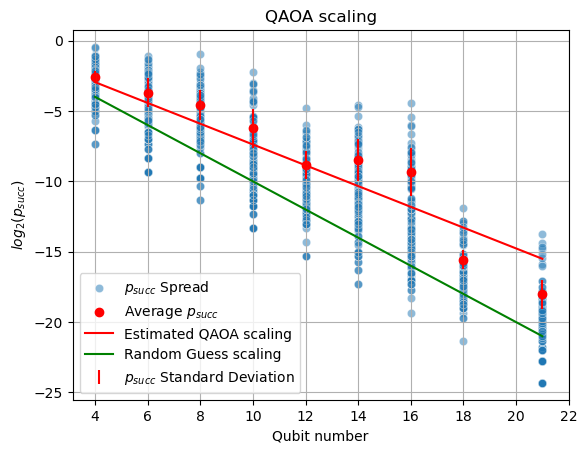

[0.73826737]
[0.04456776]


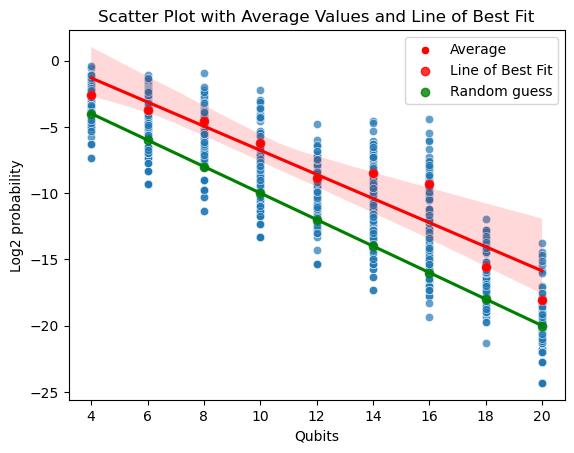

In [29]:
print(len(experiment_1_9_average))
print(len(np.arange(4, 20+2, 2)))
x_data = np.arange(4, 20+2, 2)
y_data = np.log2(experiment_1_9_average)
print(x_data)
print(y_data)

visualize_experiment(experiment_1_9_2_average, experiment_1_9_2_spread, 21)
visualize_experiment_spread(experiment_1_9_2_average, experiment_1_9_2_spread, 20)

### Complexity scaling (16 qubits, depth 4) Code: 0.1

Introduction:

Name: Complexity scaling up to 16 qubits with a depth 4 circuit.

What: find whether the cluster can do this within a reasonable time
Why: the aim is to find whether the cluster is now using GPU's and whether the script will work

Conclusion: yes.


Running parameters:

Bash script name: scaling-16.sh

Python script name: VQA-experiments-for-cluster-scaling-16.py

Hours: set for 2 hours, completed in <30mins

GPU's: 2

In [70]:
import numpy as np
from numpy import array
experiment_0_1_results = [
    (0.12848958333333332, array([0.4875 , 0.00625, 0.0125 , 0.03125, 0.04375, 0.0875 , 0.09375,
       0.01875, 0.0125 , 0.1375 , 0.03125, 0.03125, 0.0375 , 0.05   ,
       0.04375, 0.3625 , 0.05   , 0.01875, 0.01875, 0.1625 , 0.1125 ,
       0.1125 , 0.08125, 0.1125 , 0.14375, 0.18125, 0.21875, 0.23125,
       0.075  , 0.05625, 0.21875, 0.0125 , 0.0125 , 0.26875, 0.00625,
       0.01875, 0.30625, 0.03125, 0.0625 , 0.48125, 0.1125 , 0.175  ,
       0.48125, 0.0125 , 0.03125, 0.125  , 0.175  , 0.10625, 0.175  ,
       0.175  , 0.225  , 0.025  , 0.15   , 0.225  , 0.2375 , 0.03125,
       0.00625, 0.14375, 0.13125, 0.1    , 0.39375, 0.08125, 0.06875,
       0.3625 , 0.0125 , 0.05   , 0.0375 , 0.08125, 0.10625, 0.00625,
       0.00625, 0.025  , 0.41875, 0.06875, 0.09375, 0.33125, 0.0375 ,
       0.025  , 0.15625, 0.025  , 0.03125, 0.3125 , 0.03125, 0.01875,
       0.1875 , 0.1125 , 0.025  , 0.18125, 0.53125, 0.50625, 0.175  ,
       0.13125, 0.225  , 0.175  , 0.0875 , 0.06875, 0.175  , 0.11875,
       0.15625, 0.1375 , 0.025  , 0.03125, 0.44375, 0.1    , 0.08125,
       0.14375, 0.00625, 0.00625, 0.03125, 0.0875 , 0.0875 , 0.1    ,
       0.2    , 0.18125, 0.275  , 0.125  , 0.06875, 0.3    , 0.00625,
       0.01875])), 

       (0.04276041666666667, array([0.0109375, 0.0015625, 0.0125   , 0.171875 , 0.01875  , 0.028125 ,
       0.015625 , 0.003125 , 0.00625  , 0.00625  , 0.003125 , 0.003125 ,
       0.1109375, 0.0078125, 0.0078125, 0.2921875, 0.0359375, 0.01875  ,
       0.01875  , 0.046875 , 0.0484375, 0.259375 , 0.084375 , 0.0765625,
       0.0046875, 0.025    , 0.0046875, 0.0265625, 0.1046875, 0.0078125,
       0.025    , 0.0109375, 0.0265625, 0.0953125, 0.0125   , 0.0421875,
       0.0203125, 0.0203125, 0.0578125, 0.06875  , 0.0734375, 0.0078125,
       0.009375 , 0.009375 , 0.0078125, 0.0828125, 0.0359375, 0.0328125,
       0.0140625, 0.1515625, 0.0765625, 0.078125 , 0.0265625, 0.015625 ,
       0.1453125, 0.021875 , 0.0078125, 0.00625  , 0.0125   , 0.0078125,
       0.0359375, 0.021875 , 0.0171875, 0.0078125, 0.00625  , 0.04375  ,
       0.034375 , 0.0796875, 0.0234375, 0.0296875, 0.0234375, 0.0265625,
       0.0578125, 0.01875  , 0.01875  , 0.1234375, 0.0078125, 0.0234375,
       0.090625 , 0.021875 , 0.003125 , 0.0578125, 0.0171875, 0.009375 ,
       0.0109375, 0.0125   , 0.071875 , 0.0546875, 0.015625 , 0.1125   ,
       0.065625 , 0.04375  , 0.0296875, 0.075    , 0.05     , 0.0328125,
       0.0859375, 0.040625 , 0.0203125, 0.0078125, 0.0046875, 0.0046875,
       0.0296875, 0.0296875, 0.0234375, 0.0453125, 0.0109375, 0.0421875,
       0.11875  , 0.01875  , 0.059375 , 0.1453125, 0.125    , 0.0578125,
       0.16875  , 0.0125   , 0.009375 , 0.0078125, 0.0140625, 0.0078125])), 
       
       (0.019690755208333334, array([0.00195312, 0.01328125, 0.08203125, 0.00742187, 0.02226563,
       0.01679688, 0.00039063, 0.02070312, 0.015625  , 0.00195312,
       0.00429688, 0.0125    , 0.00273437, 0.00742187, 0.0234375 ,
       0.00351563, 0.00273437, 0.01914063, 0.01835938, 0.00195312,
       0.06054688, 0.01054688, 0.040625  , 0.10351562, 0.03164062,
       0.00546875, 0.00820312, 0.00820313, 0.0515625 , 0.06445312,
       0.00195312, 0.00859375, 0.01914063, 0.00195312, 0.01953125,
       0.04375   , 0.00195312, 0.02226562, 0.04140625, 0.02695313,
       0.01640625, 0.01484375, 0.00195312, 0.00546875, 0.00507813,
       0.00898437, 0.01796875, 0.034375  , 0.03359375, 0.01914063,
       0.02421875, 0.0328125 , 0.0015625 , 0.0078125 , 0.00195312,
       0.01054688, 0.01953125, 0.01679687, 0.00039063, 0.01953125,
       0.00742187, 0.02304688, 0.02734375, 0.00078125, 0.00117188,
       0.00195312, 0.00898437, 0.06054688, 0.065625  , 0.00039063,
       0.00507813, 0.03515625, 0.00585938, 0.00742187, 0.028125  ,
       0.00195312, 0.00351563, 0.0015625 , 0.00195312, 0.021875  ,
       0.03671875, 0.00195312, 0.01445313, 0.0046875 , 0.00429688,
       0.0171875 , 0.01015625, 0.23359375, 0.0015625 , 0.03984375,
       0.02070312, 0.02421875, 0.00273437, 0.00703125, 0.01484375,
       0.02148438, 0.01367188, 0.01640625, 0.01875   , 0.00039063,
       0.00039063, 0.00078125, 0.0140625 , 0.03789062, 0.01523438,
       0.00039063, 0.01757812, 0.04335937, 0.00742187, 0.00039063,
       0.01953125, 0.03632813, 0.05390625, 0.07851563, 0.01015625,
       0.009375  , 0.01367188, 0.00195312, 0.00546875, 0.03828125])), 
       
       (0.004449869791666667, array([8.78906250e-04, 1.36718750e-03, 9.76562500e-04, 1.95312500e-04,
       2.14843750e-03, 4.88281250e-04, 3.02734375e-03, 1.26953125e-02,
       4.88281250e-04, 1.95312500e-04, 4.58984375e-03, 4.88281250e-04,
       3.90625000e-04, 1.32812500e-02, 5.85937500e-04, 1.36718750e-03,
       6.44531250e-03, 3.90625000e-04, 1.85546875e-03, 6.83593750e-03,
       3.02734375e-03, 7.61718750e-03, 2.77343750e-02, 4.98046875e-03,
       1.95312500e-04, 7.81250000e-04, 1.14257812e-02, 5.85937500e-04,
       2.05078125e-02, 3.71093750e-03, 9.76562500e-05, 1.27929687e-02,
       9.76562500e-05, 1.95312500e-04, 2.83203125e-02, 1.56250000e-03,
       1.26953125e-03, 1.66015625e-02, 3.90625000e-04, 4.19921875e-03,
       6.54296875e-03, 1.07421875e-03, 4.88281250e-04, 3.22265625e-03,
       4.88281250e-04, 2.63671875e-03, 9.76562500e-03, 2.05078125e-03,
       4.29687500e-03, 1.25976563e-02, 7.81250000e-04, 5.76171875e-03,
       8.78906250e-04, 1.03515625e-02, 1.46484375e-03, 1.75781250e-03,
       1.46484375e-03, 4.88281250e-04, 8.78906250e-04, 9.76562500e-04,
       6.83593750e-04, 1.18164062e-02, 3.90625000e-04, 4.88281250e-04,
       4.88281250e-04, 9.76562500e-05, 7.91015625e-03, 5.48828125e-02,
       2.73437500e-03, 4.88281250e-04, 5.85937500e-04, 4.88281250e-04,
       1.07421875e-03, 1.85546875e-02, 2.92968750e-04, 9.76562500e-05,
       6.54296875e-03, 5.85937500e-04, 1.95312500e-04, 1.55273438e-02,
       4.88281250e-04, 1.85546875e-03, 2.73437500e-03, 9.76562500e-05,
       7.81250000e-04, 1.12304688e-02, 1.75781250e-03, 2.63671875e-03,
       2.53906250e-03, 1.66015625e-03, 2.14843750e-03, 1.22070312e-02,
       1.46484375e-03, 2.05078125e-03, 3.51562500e-03, 1.95312500e-03,
       3.02734375e-03, 5.27343750e-03, 2.34375000e-03, 9.76562500e-05,
       4.88281250e-04, 2.92968750e-04, 1.66015625e-03, 9.66796875e-03,
       2.44140625e-03, 1.75781250e-03, 3.51562500e-03, 2.92968750e-03,
       2.92968750e-04, 1.26953125e-03, 2.73437500e-03, 1.23046875e-02,
       1.36718750e-02, 1.15234375e-02, 3.02734375e-03, 4.88281250e-04,
       3.90625000e-04, 9.76562500e-05, 8.69140625e-03, 1.95312500e-04])), 
       
       (0.0014036051432291666, array([3.41796875e-04, 7.08007813e-04, 6.34765625e-04, 1.78222656e-03,
       9.52148437e-04, 1.00097656e-03, 1.17187500e-03, 5.61523438e-04,
       1.04980469e-03, 2.44140625e-05, 2.68554688e-04, 1.53808594e-03,
       2.41699219e-03, 6.59179688e-04, 7.56835938e-04, 1.68457031e-03,
       2.05078125e-03, 4.15039063e-04, 9.27734375e-04, 6.83593750e-04,
       2.44140625e-04, 8.91113281e-03, 1.07910156e-02, 2.22167969e-03,
       6.83593750e-04, 2.66113281e-03, 4.88281250e-05, 1.53808594e-03,
       2.92968750e-04, 4.39453125e-04, 4.88281250e-05, 2.92968750e-04,
       1.22070312e-04, 3.90625000e-04, 2.09960938e-03, 3.90625000e-04,
       7.56835938e-04, 4.54101563e-03, 6.34765625e-04, 2.05078125e-03,
       1.48925781e-03, 3.41796875e-04, 4.88281250e-05, 2.44140625e-05,
       4.88281250e-04, 1.95312500e-03, 2.46582031e-03, 7.81250000e-04,
       2.46582031e-03, 2.19726563e-04, 9.76562500e-05, 1.26953125e-03,
       2.51464844e-03, 9.76562500e-05, 4.88281250e-04, 1.46484375e-04,
       1.22070312e-04, 2.19726563e-04, 7.81250000e-04, 1.22070312e-04,
       7.56835938e-04, 7.81250000e-04, 5.12695313e-04, 1.22070312e-04,
       2.44140625e-05, 1.46484375e-04, 8.27636719e-03, 1.64550781e-02,
       8.78906250e-04, 1.22070312e-04, 1.09863281e-03, 2.19726562e-04,
       8.78906250e-04, 7.32421875e-05, 2.19726563e-04, 1.22070312e-04,
       3.66210938e-03, 2.92968750e-04, 8.54492188e-04, 7.32421875e-05,
       2.24609375e-03, 1.19628906e-03, 1.24511719e-03, 7.32421875e-05,
       2.92968750e-04, 7.08007813e-04, 2.44140625e-04, 1.95312500e-04,
       3.12500000e-03, 1.46484375e-04, 5.85937500e-04, 1.17187500e-03,
       7.32421875e-05, 1.41601563e-03, 2.36816406e-03, 2.78320313e-03,
       1.26953125e-03, 3.12500000e-03, 1.12304687e-03, 2.44140625e-05,
       7.32421875e-05, 2.44140625e-05, 1.09863281e-03, 3.07617187e-03,
       7.32421875e-04, 2.85644531e-03, 2.83203125e-03, 2.92968750e-04,
       4.63867187e-04, 1.29394531e-03, 1.46484375e-04, 1.13037109e-02,
       7.17773437e-03, 7.56835937e-04, 2.44140625e-04, 1.80664063e-03,
       4.88281250e-05, 4.88281250e-05, 1.46484375e-04, 9.76562500e-05])), 
       
       (0.000910797119140625, array([2.99072266e-04, 1.34277344e-04, 6.71386719e-05, 8.54492188e-05,
       1.67846680e-03, 4.27246094e-05, 7.50732422e-04, 4.86450195e-03,
       1.22070313e-05, 3.05175781e-05, 8.54492188e-05, 3.05175781e-05,
       1.06201172e-03, 7.25708008e-03, 8.54492187e-05, 5.31005859e-04,
       5.85937500e-04, 6.04248047e-04, 3.84521484e-04, 6.71386719e-05,
       1.28173828e-04, 6.15844727e-03, 1.65710449e-02, 3.35693359e-04,
       1.64794922e-04, 7.32421875e-05, 7.93457031e-05, 2.28881836e-03,
       6.95800781e-04, 6.10351563e-06, 2.50244141e-04, 4.94384766e-04,
       3.05175781e-05, 6.95800781e-04, 1.77001953e-03, 3.05175781e-05,
       8.54492188e-04, 8.11767578e-04, 5.49316406e-05, 7.93457031e-04,
       3.84521484e-04, 1.22070313e-05, 3.05175781e-05, 2.44140625e-05,
       3.05175781e-05, 1.07421875e-03, 1.37329102e-03, 1.09863281e-04,
       1.38549805e-03, 7.32421875e-05, 9.46044922e-04, 1.77001953e-04,
       5.73730469e-04, 3.90625000e-04, 7.44628906e-04, 1.18408203e-03,
       1.83105469e-04, 1.22070313e-05, 4.27246094e-05, 3.66210938e-04,
       4.57763672e-04, 4.51660156e-04, 4.15039062e-04, 3.05175781e-05,
       3.05175781e-05, 6.10351563e-06, 5.96923828e-03, 5.70678711e-03,
       1.03759766e-04, 5.49316406e-05, 2.38037109e-04, 6.10351563e-06,
       6.04248047e-04, 9.09423828e-04, 3.05175781e-05, 1.03759766e-04,
       2.80761719e-04, 2.19726563e-04, 8.17871094e-04, 1.84326172e-03,
       3.05175781e-05, 1.89208984e-04, 1.22070313e-05, 2.38037109e-04,
       2.62451172e-04, 6.10351562e-04, 3.05175781e-05, 1.83105469e-05,
       2.13623047e-04, 3.84521484e-04, 5.61523437e-04, 5.00488281e-04,
       2.56347656e-04, 7.38525391e-04, 8.36181641e-04, 1.64794922e-04,
       6.65283203e-04, 8.78906250e-04, 4.27246094e-04, 1.22070313e-05,
       1.22070313e-05, 3.05175781e-05, 1.10473633e-03, 7.32421875e-04,
       3.66210937e-05, 2.09960937e-03, 4.51049805e-03, 5.49316406e-05,
       4.88281250e-05, 1.04980469e-03, 1.22070313e-05, 6.57958984e-03,
       6.26831055e-03, 3.11279297e-04, 3.23486328e-04, 5.43212891e-04,
       3.66210937e-05, 6.10351562e-05, 6.10351562e-05, 4.27246094e-05])), 
       
       (0.00032723744710286463, array([3.05175781e-06, 4.25720215e-04, 1.67846680e-05, 4.27246094e-05,
       4.83703613e-04, 7.62939453e-06, 1.22070313e-05, 2.42614746e-04,
       3.96728516e-05, 7.62939453e-06, 3.81469727e-05, 1.37329102e-05,
       1.43432617e-04, 2.46429443e-03, 2.74658203e-05, 1.09863281e-04,
       4.25720215e-04, 4.42504883e-05, 2.28881836e-05, 2.12097168e-04,
       3.05175781e-06, 5.20324707e-04, 7.02972412e-03, 3.00598145e-04,
       7.62939453e-06, 3.50952148e-05, 4.57763672e-05, 1.06811523e-05,
       1.16577148e-03, 1.22070312e-05, 7.62939453e-06, 3.78417969e-04,
       3.05175781e-06, 9.15527344e-06, 1.52587891e-03, 3.05175781e-06,
       9.15527344e-06, 7.98034668e-04, 5.18798828e-05, 1.08337402e-04,
       3.61633301e-04, 1.67846680e-05, 7.62939453e-06, 1.37329102e-05,
       7.62939453e-06, 7.32421875e-05, 7.20214844e-04, 1.14440918e-04,
       1.20544434e-04, 2.22778320e-04, 1.38854980e-04, 2.24304199e-04,
       7.47680664e-05, 3.25012207e-04, 8.54492187e-05, 1.77001953e-04,
       3.05175781e-06, 7.62939453e-06, 7.78198242e-05, 5.64575195e-05,
       1.67846680e-05, 4.34875488e-04, 3.20434570e-05, 7.62939453e-06,
       7.62939453e-06, 1.06811523e-05, 2.45666504e-04, 5.47637939e-03,
       1.46484375e-04, 7.62939453e-06, 2.19726563e-04, 7.62939453e-06,
       3.35693359e-05, 8.04138184e-04, 1.67846680e-05, 9.15527344e-06,
       4.60815430e-04, 2.89916992e-05, 6.10351563e-06, 1.08489990e-03,
       1.52587891e-06, 3.05175781e-06, 2.33459473e-04, 4.57763672e-06,
       3.05175781e-06, 1.95312500e-04, 3.05175781e-06, 7.62939453e-06,
       8.54492187e-05, 6.10351563e-06, 3.20434570e-05, 4.65393066e-04,
       1.28173828e-04, 5.79833984e-05, 2.99072266e-04, 1.46484375e-04,
       1.28173828e-04, 3.23486328e-04, 1.69372559e-04, 7.62939453e-06,
       3.05175781e-06, 1.52587891e-06, 2.89916992e-05, 3.55529785e-04,
       7.93457031e-05, 2.28881836e-05, 2.05230713e-03, 4.42504883e-05,
       9.15527344e-06, 4.11987305e-05, 4.42504883e-05, 7.46154785e-04,
       3.46984863e-03, 7.94982910e-04, 4.42504883e-05, 3.78417969e-04,
       2.74658203e-05, 7.62939453e-06, 1.19018555e-04, 1.52587891e-06]))]

experiment_0_1_averages = [x for (x, y) in experiment_0_1_results]
experiment_0_1_spread = [y for (x, y) in experiment_0_1_results]

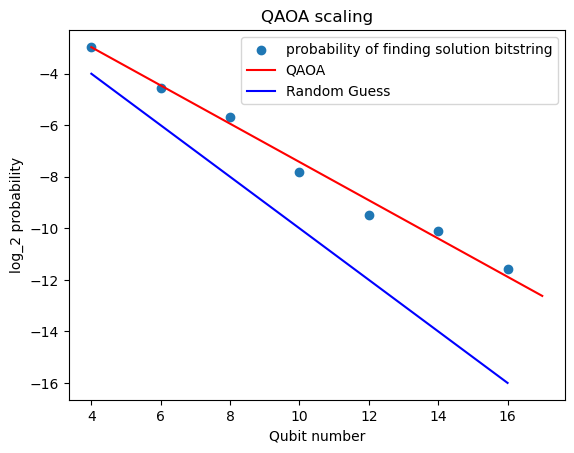

[0.74254115]
[0.0122633]


c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldc

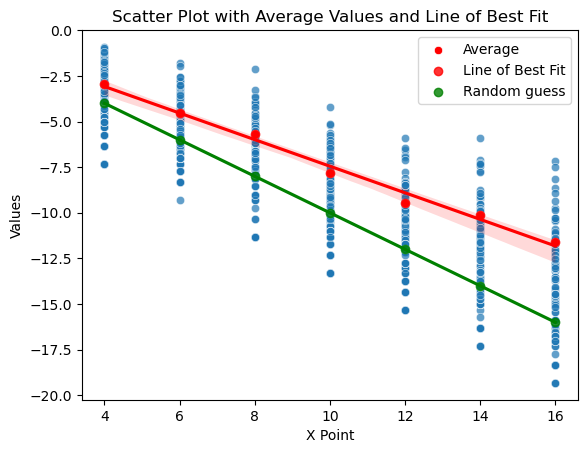

In [73]:
visualize_experiment(experiment_0_1_averages, 16)
visualize_experiment_spread(experiment_0_1_averages, experiment_0_1_spread, 16)

### Complexity scaling (16 qubits, depth 6) Code 0.2

Introduction:

Name: Complexity scaling up to 16 qubits with a depth 6 circuit.

What: find whether the cluster can do this within a reasonable time
Why: the aim is to find whether the cluster is now using GPU's and whether the script will work

Conclusion: yes.


Running parameters:

Bash script name: scaling-16-6.sh

Python script name: VQA-experiments-for-cluster-scaling-16-6.py

Hours: set for 2 hours, completed in <30mins

GPU's: 2

In [64]:
experiment_0_2_results = [
    (0.12718749999999998, array([0.11875, 0.0375 , 0.0875 , 0.1875 , 0.04375, 0.03125, 0.05   ,
       0.05   , 0.05625, 0.19375, 0.00625, 0.00625, 0.31875, 0.06875,
       0.0375 , 0.1    , 0.09375, 0.125  , 0.125  , 0.11875, 0.11875,
       0.1125 , 0.03125, 0.05   , 0.03125, 0.08125, 0.0375 , 0.325  ,
       0.025  , 0.0125 , 0.3    , 0.19375, 0.1125 , 0.15625, 0.1625 ,
       0.19375, 0.33125, 0.0125 , 0.0125 , 0.3125 , 0.05625, 0.04375,
       0.5125 , 0.01875, 0.03125, 0.11875, 0.15   , 0.2    , 0.20625,
       0.11875, 0.0625 , 0.05   , 0.10625, 0.08125, 0.1125 , 0.01875,
       0.0125 , 0.1125 , 0.03125, 0.03125, 0.18125, 0.0125 , 0.00625,
       0.16875, 0.03125, 0.03125, 0.23125, 0.05625, 0.09375, 0.51875,
       0.01875, 0.01875, 0.4625 , 0.20625, 0.18125, 0.16875, 0.06875,
       0.05625, 0.2625 , 0.0375 , 0.0375 , 0.15625, 0.00625, 0.03125,
       0.2125 , 0.04375, 0.01875, 0.425  , 0.09375, 0.1375 , 0.2125 ,
       0.16875, 0.19375, 0.2875 , 0.10625, 0.1125 , 0.05625, 0.025  ,
       0.00625, 0.1875 , 0.1375 , 0.15625, 0.3375 , 0.075  , 0.0375 ,
       0.1125 , 0.03125, 0.0125 , 0.40625, 0.2625 , 0.20625, 0.21875,
       0.08125, 0.075  , 0.125  , 0.25625, 0.31875, 0.1125 , 0.24375,
       0.18125])), 
       
       (0.042994791666666664, array([0.040625 , 0.0265625, 0.0078125, 0.0609375, 0.028125 , 0.0046875,
       0.0265625, 0.0359375, 0.0203125, 0.0109375, 0.00625  , 0.0359375,
       0.009375 , 0.003125 , 0.0203125, 0.075    , 0.028125 , 0.0203125,
       0.0671875, 0.0078125, 0.015625 , 0.0625   , 0.009375 , 0.009375 ,
       0.0015625, 0.0078125, 0.0234375, 0.09375  , 0.021875 , 0.0015625,
       0.0015625, 0.03125  , 0.0296875, 0.284375 , 0.0828125, 0.0953125,
       0.0078125, 0.00625  , 0.0265625, 0.0890625, 0.01875  , 0.003125 ,
       0.021875 , 0.0046875, 0.0296875, 0.140625 , 0.1734375, 0.1453125,
       0.0640625, 0.053125 , 0.059375 , 0.0203125, 0.0078125, 0.0484375,
       0.0125   , 0.0015625, 0.0078125, 0.0421875, 0.015625 , 0.0015625,
       0.2078125, 0.0109375, 0.01875  , 0.009375 , 0.0328125, 0.025    ,
       0.140625 , 0.0140625, 0.03125  , 0.0140625, 0.00625  , 0.0125   ,
       0.1015625, 0.04375  , 0.0078125, 0.0734375, 0.0078125, 0.0078125,
       0.0984375, 0.0328125, 0.0015625, 0.0046875, 0.003125 , 0.00625  ,
       0.0546875, 0.015625 , 0.1015625, 0.2296875, 0.0453125, 0.01875  ,
       0.0546875, 0.025    , 0.0375   , 0.0796875, 0.0453125, 0.0296875,
       0.0078125, 0.003125 , 0.0109375, 0.0875   , 0.0515625, 0.1203125,
       0.0390625, 0.0203125, 0.0140625, 0.0265625, 0.0078125, 0.0078125,
       0.0734375, 0.14375  , 0.0828125, 0.06875  , 0.040625 , 0.0171875,
       0.009375 , 0.059375 , 0.1078125, 0.1390625, 0.0546875, 0.00625  ])), 
       
       (0.021757812499999998, array([0.00273437, 0.00703125, 0.06328125, 0.00117187, 0.00820313,
       0.00664063, 0.00195312, 0.009375  , 0.02265625, 0.00195312,
       0.01210938, 0.03046875, 0.0015625 , 0.00117187, 0.01601563,
       0.0109375 , 0.0125    , 0.0296875 , 0.01367188, 0.0140625 ,
       0.03320312, 0.00117187, 0.00820313, 0.03789062, 0.00195312,
       0.00390625, 0.00703125, 0.00195312, 0.01835937, 0.0296875 ,
       0.02890625, 0.01289063, 0.02304688, 0.02578125, 0.07382812,
       0.20820312, 0.00039063, 0.00859375, 0.01640625, 0.00117187,
       0.0109375 , 0.01210937, 0.00039063, 0.00546875, 0.01289062,
       0.03359375, 0.06328125, 0.14414063, 0.0078125 , 0.03710938,
       0.05507812, 0.00585938, 0.00976562, 0.07460938, 0.00195312,
       0.00195312, 0.00039063, 0.00195312, 0.00546875, 0.02304687,
       0.00195312, 0.02734375, 0.0390625 , 0.00195312, 0.00859375,
       0.00742188, 0.003125  , 0.00859375, 0.02851563, 0.00078125,
       0.00507813, 0.0046875 , 0.03164062, 0.0234375 , 0.13007812,
       0.00507813, 0.009375  , 0.01132813, 0.00351563, 0.0171875 ,
       0.02226563, 0.00195312, 0.00273437, 0.009375  , 0.00195312,
       0.01601562, 0.05429687, 0.01679687, 0.04453125, 0.02890625,
       0.04296875, 0.0046875 , 0.06796875, 0.009375  , 0.01953125,
       0.01171875, 0.00195312, 0.00195312, 0.00117188, 0.02226563,
       0.01875   , 0.01171875, 0.00390625, 0.01835937, 0.0140625 ,
       0.00195312, 0.00039063, 0.00195312, 0.05742187, 0.05664062,
       0.0875    , 0.0078125 , 0.01054688, 0.01640625, 0.0859375 ,
       0.00820312, 0.03945313, 0.04765625, 0.01875   , 0.03476563])), 
       
       (0.006215820312499999, array([2.92968750e-03, 7.42187500e-03, 1.85546875e-03, 8.78906250e-04,
       1.46484375e-03, 2.92968750e-04, 4.88281250e-04, 1.56250000e-03,
       6.83593750e-04, 4.88281250e-04, 5.66406250e-03, 5.85937500e-04,
       9.76562500e-05, 8.98437500e-03, 1.95312500e-04, 1.56250000e-03,
       1.25976563e-02, 7.81250000e-04, 8.78906250e-04, 7.81250000e-03,
       4.88281250e-04, 4.88281250e-04, 7.81250000e-04, 9.76562500e-05,
       2.92968750e-04, 9.76562500e-05, 1.56250000e-03, 3.90625000e-04,
       1.07421875e-02, 2.92968750e-04, 6.15234375e-03, 1.66015625e-03,
       7.81250000e-04, 7.81250000e-03, 1.57714844e-01, 3.90625000e-04,
       4.88281250e-04, 5.76171875e-03, 9.76562500e-05, 3.90625000e-04,
       1.53320312e-02, 2.05078125e-03, 2.92968750e-04, 5.56640625e-03,
       2.92968750e-04, 1.22070312e-02, 5.30273437e-02, 8.69140625e-03,
       1.66015625e-03, 3.78906250e-02, 5.85937500e-04, 2.34375000e-03,
       1.78710938e-02, 5.85937500e-04, 4.88281250e-04, 4.88281250e-04,
       9.76562500e-05, 4.88281250e-04, 1.94335937e-02, 4.88281250e-04,
       3.90625000e-04, 1.39648438e-02, 1.26953125e-03, 5.27343750e-03,
       4.88281250e-04, 1.17187500e-03, 2.92968750e-03, 1.30859375e-02,
       2.24609375e-03, 6.83593750e-04, 1.36718750e-03, 2.92968750e-04,
       4.10156250e-03, 2.50976563e-02, 6.83593750e-03, 4.88281250e-04,
       2.73437500e-03, 1.75781250e-03, 2.53906250e-03, 3.08593750e-02,
       1.75781250e-03, 9.76562500e-05, 2.63671875e-03, 4.88281250e-04,
       3.90625000e-04, 2.25585937e-02, 1.26953125e-03, 2.14843750e-03,
       1.18164062e-02, 3.61328125e-03, 7.81250000e-04, 1.13281250e-02,
       1.56250000e-03, 3.41796875e-03, 3.80859375e-03, 3.80859375e-03,
       4.88281250e-04, 9.76562500e-05, 1.95312500e-04, 3.51562500e-03,
       2.63671875e-03, 3.02734375e-03, 6.83593750e-04, 4.00390625e-03,
       9.76562500e-05, 4.88281250e-04, 2.92968750e-04, 9.76562500e-05,
       1.30859375e-02, 2.91992188e-02, 5.17578125e-03, 1.85546875e-03,
       3.12500000e-03, 1.26953125e-03, 8.78906250e-04, 1.25000000e-02,
       8.10546875e-03, 9.47265625e-03, 6.93359375e-03, 1.60156250e-02])), 
       
       (0.0015541585286458332, array([2.92968750e-04, 4.39453125e-04, 4.63867188e-04, 4.39453125e-04,
       1.41601562e-03, 3.10058594e-03, 2.19726563e-04, 1.39160156e-03,
       7.32421875e-05, 2.19726563e-04, 3.00292969e-03, 3.90625000e-04,
       2.44140625e-05, 3.66210938e-04, 7.32421875e-05, 7.56835938e-04,
       4.88281250e-05, 1.22070312e-04, 5.12695313e-04, 2.53906250e-03,
       1.46484375e-04, 3.66210938e-04, 3.93066406e-03, 1.04980469e-03,
       7.32421875e-05, 2.90527344e-03, 3.90625000e-04, 8.05664063e-04,
       1.61132813e-03, 1.95312500e-04, 1.36718750e-03, 7.56835938e-04,
       7.32421875e-05, 1.07177734e-02, 1.75781250e-03, 1.22070312e-04,
       4.88281250e-05, 3.58886719e-03, 9.52148437e-04, 4.88281250e-04,
       3.17382812e-04, 3.66210938e-04, 7.32421875e-05, 2.46582031e-03,
       3.17382813e-04, 2.07519531e-02, 1.61376953e-02, 1.92871094e-03,
       3.14941406e-03, 5.63964844e-03, 6.10351562e-04, 2.17285156e-03,
       6.34765625e-04, 4.88281250e-05, 1.22070312e-04, 3.95507812e-03,
       9.76562500e-05, 3.17382812e-04, 1.12304687e-03, 1.70898437e-04,
       2.44140625e-04, 6.44531250e-03, 3.41796875e-04, 1.51367187e-03,
       8.30078125e-04, 1.87988281e-03, 1.44042969e-03, 1.61132812e-03,
       2.92968750e-04, 1.22070312e-04, 1.17187500e-03, 9.27734375e-04,
       4.88281250e-03, 7.32421875e-04, 1.22070312e-04, 3.90625000e-04,
       7.08007813e-04, 3.90625000e-04, 2.68554688e-04, 1.87988281e-03,
       2.44140625e-05, 4.88281250e-05, 5.41992187e-03, 1.09863281e-03,
       5.12695313e-04, 4.15039063e-04, 1.46484375e-04, 1.24511719e-03,
       7.81250000e-04, 2.92968750e-04, 1.70898437e-04, 1.00097656e-03,
       3.66210938e-04, 1.80664062e-03, 1.44042969e-03, 1.07421875e-03,
       1.22070312e-04, 2.70996094e-03, 7.56835937e-04, 1.53808594e-03,
       2.12402344e-03, 1.70898437e-04, 7.32421875e-05, 5.61523438e-04,
       2.44140625e-04, 1.22070312e-04, 2.68554688e-04, 1.95312500e-04,
       1.32568359e-02, 1.46484375e-04, 6.34765625e-04, 1.04980469e-03,
       6.34765625e-04, 1.22070312e-04, 2.31933594e-03, 2.09960938e-03,
       7.32421875e-05, 4.32128906e-03, 3.19824219e-03, 7.32421875e-05])), 
       
       (0.0013841756184895834, array([4.82177734e-04, 1.47705078e-03, 1.22070313e-05, 1.58691406e-04,
       3.54003906e-04, 4.88281250e-05, 2.86865234e-04, 2.86865234e-04,
       6.71386719e-05, 4.27246094e-05, 5.43212891e-04, 2.44140625e-05,
       3.05175781e-05, 2.19726563e-04, 6.59179688e-04, 5.37109375e-04,
       6.95800781e-04, 6.10351563e-06, 1.18408203e-03, 1.43432617e-03,
       6.10351562e-05, 2.13623047e-04, 4.94384766e-04, 1.09863281e-04,
       3.05175781e-05, 3.05175781e-05, 9.76562500e-05, 6.77490234e-04,
       1.56860352e-03, 1.83105469e-05, 6.83593750e-04, 6.10351563e-06,
       1.89208984e-04, 1.40197754e-02, 3.20556641e-02, 5.06591797e-04,
       3.66210937e-05, 2.44140625e-05, 1.22070313e-05, 2.86865234e-04,
       1.09863281e-04, 1.83105469e-05, 3.05175781e-05, 1.40380859e-04,
       1.22070313e-05, 1.35253906e-02, 1.85180664e-02, 6.89697266e-04,
       2.91748047e-03, 3.07006836e-03, 1.03759766e-04, 1.03759766e-04,
       1.86767578e-03, 1.22070313e-05, 3.05175781e-05, 3.05175781e-05,
       1.22070313e-05, 2.38037109e-04, 2.19726563e-04, 6.71386719e-05,
       6.16455078e-04, 3.79028320e-03, 1.83105469e-05, 5.55419922e-04,
       1.10473633e-03, 3.05175781e-05, 6.34765625e-04, 2.17895508e-03,
       8.54492187e-05, 2.44140625e-05, 3.05175781e-05, 7.32421875e-05,
       3.17993164e-03, 7.46459961e-03, 3.47900391e-04, 1.15966797e-04,
       2.31933594e-04, 8.54492187e-05, 4.51660156e-04, 3.93676758e-03,
       1.58691406e-04, 2.44140625e-05, 1.09863281e-04, 2.07519531e-04,
       7.75146484e-04, 1.06201172e-03, 2.99072266e-04, 1.31225586e-03,
       3.54003906e-04, 8.54492187e-05, 4.88281250e-05, 1.56250000e-03,
       5.79833984e-04, 6.34765625e-04, 7.87353516e-04, 1.22070312e-04,
       3.05175781e-05, 3.05175781e-05, 6.10351563e-06, 6.40869141e-04,
       8.36181641e-04, 2.31933594e-04, 2.19726563e-04, 4.88281250e-05,
       4.27246094e-05, 3.05175781e-05, 1.22070313e-05, 2.44140625e-05,
       8.86840820e-03, 1.11267090e-02, 3.72314453e-04, 3.84521484e-04,
       5.43212891e-04, 6.71386719e-05, 1.20239258e-03, 2.25830078e-04,
       2.07519531e-04, 1.75170898e-03, 3.16162109e-03, 1.56250000e-03])), 
       
       (0.0006931050618489583, array([4.42504883e-05, 1.86157227e-04, 1.52587891e-05, 9.15527344e-06,
       8.54492188e-05, 2.28881836e-05, 7.62939453e-06, 8.39233398e-05,
       1.83105469e-05, 1.52587891e-06, 5.95092773e-05, 1.22070313e-05,
       7.62939453e-06, 1.46484375e-04, 6.10351563e-06, 2.74658203e-05,
       4.40979004e-04, 1.22070313e-05, 3.50952148e-05, 1.39617920e-03,
       8.08715820e-05, 4.57763672e-06, 1.28173828e-04, 2.89916992e-05,
       7.62939453e-06, 7.62939453e-06, 2.59399414e-05, 1.67846680e-05,
       6.79016113e-04, 6.10351563e-06, 2.13623047e-05, 1.03759766e-04,
       2.13623047e-05, 5.99670410e-04, 3.33145142e-02, 1.43432617e-04,
       7.62939453e-06, 3.66210938e-05, 7.62939453e-06, 4.57763672e-06,
       3.73840332e-04, 4.57763672e-06, 7.62939453e-06, 1.12915039e-04,
       3.05175781e-06, 7.20214844e-04, 1.24481201e-02, 2.27508545e-03,
       7.32421875e-05, 2.59704590e-03, 1.64794922e-04, 7.01904297e-05,
       2.89916992e-04, 1.98364258e-05, 7.62939453e-06, 7.62939453e-06,
       1.83105469e-05, 7.62939453e-06, 5.03540039e-05, 2.74658203e-05,
       1.37329102e-05, 7.03430176e-04, 3.05175781e-06, 9.15527344e-06,
       5.08117676e-04, 2.41088867e-04, 1.49536133e-04, 1.25427246e-03,
       4.42504883e-05, 6.10351563e-06, 3.05175781e-06, 4.57763672e-06,
       1.02233887e-04, 5.09338379e-03, 9.15527344e-06, 1.22070313e-05,
       8.54492187e-05, 7.78198242e-05, 7.62939453e-06, 2.68859863e-03,
       1.19018555e-04, 7.62939453e-06, 7.47680664e-05, 9.15527344e-06,
       7.62939453e-06, 1.10321045e-03, 3.81469727e-05, 4.27246094e-05,
       3.82995605e-04, 7.01904297e-05, 7.62939453e-06, 9.01794434e-04,
       1.05285645e-04, 5.79833984e-05, 2.59399414e-04, 7.78198242e-05,
       7.62939453e-06, 7.62939453e-06, 1.06811523e-05, 4.73022461e-05,
       1.61743164e-04, 1.77001953e-04, 1.52587891e-06, 5.34057617e-05,
       3.05175781e-06, 7.62939453e-06, 1.52587891e-06, 7.62939453e-06,
       7.46154785e-04, 7.36389160e-03, 5.34057617e-05, 3.50952148e-05,
       1.60217285e-04, 4.27246094e-05, 1.52587891e-06, 4.71496582e-04,
       3.32641602e-04, 4.69970703e-04, 1.03454590e-03, 5.47790527e-04]))]

experiment_0_2_averages = [x for (x, y) in experiment_0_2_results]
experiment_0_2_spread = [y for (x, y) in experiment_0_2_results]


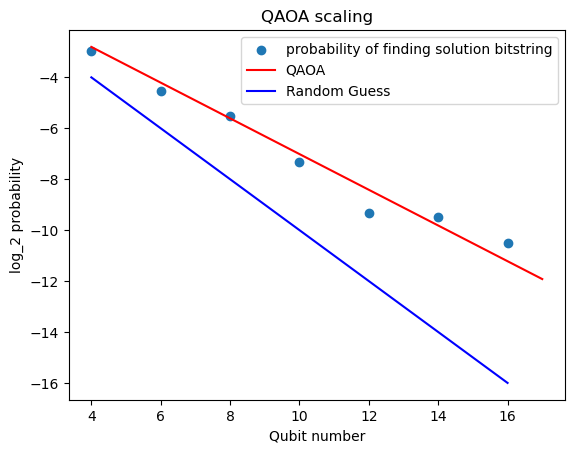

[0.70128036]
[0.01875237]


c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexander's Laptop\Documents\Computing Stuff\Quantum\.conda\Lib\site-packages\seaborn\_oldc

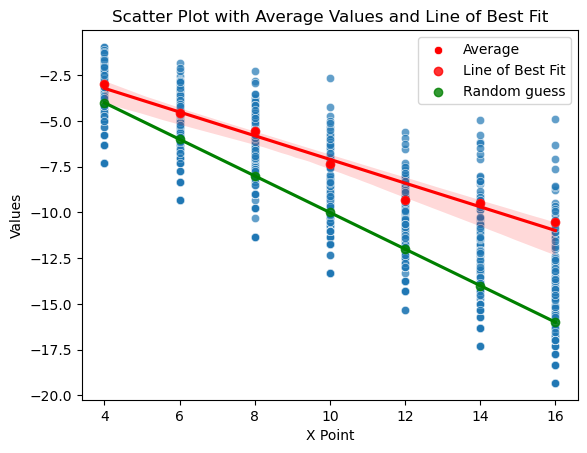

In [66]:
visualize_experiment(experiment_0_2_averages, 16)
visualize_experiment_spread(experiment_0_2_averages, experiment_0_2_spread, 16)

## 2x9 vs 3x6 comparison (18 qubits, depth 4) Code 1.10

Introduction:

Name: Compare pattern graph of size 2 vs 3

What: Running 2x9 vs 3x6 for 30 iterations
Why: See whether there is a real difference in performance between pattern graph size 2 vs 3. Different from the next experiment in that we want to actually run QAOA and train parameters on the 18 qubit problem, rather than estimate performance from different starting circuits.
Conclusion: 

Running parameters:

Name: performance-18-comparison
Bash script name: performance-18-comparison.sh

Python script name: VQA-experiments-for-cluster-performance-18-comparison.py

Saves to: performance-18_comparison.txt

GPU's: 4 GPU

Hours: 10h

Job ID: 41190053

## Starting circuit different subgraph size (18 qubits, depth 4) Code: 1.11

Introduction:

Name: Compare results for different starting circuit size

What: Running 2x9 with start 2x3 and 3x4 vs 3x9 with start 2x3 and 3x4 for 20 iterations
Why: See whether there is a real difference in performance caused by the circuit the parameters are trained on. Does training it on a circuit that finds subgraph of size 2 make it perform significantly worse on problems where subgraphs are size 3
Conclusion: Rerun with larger number of runs

Running parameters:

Name: starting-problem-sizes-comparison
Bash script name: starting-problem-sizes-comparison.sh

Python script name: VQA-experiments-for-cluster-starting-problem-sizes-comparison.py

Saves to: starting_problem_sizes_comparison.txt

GPU's: 4 GPU

Hours: 12h

Job ID: 41074010

In [4]:
start_2_3_size_2_9 = [(1.739501953125e-05, array([1.90734863e-06, 2.02178955e-05, 3.81469727e-06, 2.51770020e-05,
       2.97546387e-05, 1.94549561e-05, 7.82012939e-05, 1.83105469e-05,
       1.23214722e-04, 7.24792480e-06, 1.71661377e-05, 1.14440918e-06,
       1.90734863e-06, 2.28881836e-06, 1.90734863e-06, 4.95910645e-06,
       1.22070313e-05, 2.63214111e-05, 3.31878662e-05, 2.09808350e-05,
       3.43322754e-06, 1.52587891e-05, 2.82287598e-05, 1.06811523e-05,
       4.19616699e-06, 1.18255615e-05, 6.48498535e-06, 1.52587891e-06,
       1.02996826e-05, 3.81469727e-06, 2.67028809e-06, 1.02996826e-05,
       1.37329102e-05, 1.18255615e-05, 1.25885010e-05, 1.06811523e-05,
       5.34057617e-06, 1.14440918e-05, 3.05175781e-06, 1.90734863e-06,
       1.75476074e-05, 3.05175781e-06, 5.34057617e-06, 7.62939453e-06,
       1.06811523e-05, 2.67028809e-06, 2.44140625e-05, 1.25885010e-05,
       1.64031982e-05, 2.21252441e-05, 8.77380371e-06, 1.64031982e-05,
       7.24792480e-06, 5.72204590e-06, 5.34057617e-05, 5.64575195e-05,
       1.06048584e-04, 1.06811523e-05, 1.90734863e-05, 8.77380371e-06]))]
start_2_3_size_3_6 = [(8.73565673828125e-06, array([2.67028809e-06, 1.90734863e-06, 2.78472900e-05, 3.05175781e-06,
       1.14440918e-06, 3.05175781e-06, 1.90734863e-06, 3.43322754e-06,
       1.90734863e-06, 2.36511230e-05, 1.06811523e-05, 1.52587891e-06,
       3.81469727e-07, 8.77380371e-06, 3.81469727e-07, 1.14440918e-06,
       3.08990479e-05, 3.81469727e-07, 3.73840332e-05, 1.25885010e-05]))]
start_3_4_size_2_9 = [(2.125422159830729e-05, array([2.47955322e-05, 2.70843506e-05, 1.98364258e-05, 1.33514404e-05,
       1.56402588e-05, 3.81469727e-06, 3.81469727e-07, 1.25885010e-05,
       3.05175781e-06, 4.95910645e-06, 1.48773193e-05, 1.18255615e-05,
       4.57763672e-06, 4.31060791e-05, 1.33514404e-05, 3.54766846e-05,
       1.18255615e-05, 6.29425049e-05, 3.24249268e-05, 1.14440918e-05,
       2.93731689e-05, 7.62939453e-06, 1.79290771e-05, 4.57763672e-06,
       6.10351563e-06, 3.04412842e-04, 6.48498535e-06, 2.21252441e-05,
       9.91821289e-06, 2.05993652e-05, 8.77380371e-06, 1.18255615e-05,
       3.05175781e-06, 1.37329102e-05, 1.06811523e-05, 8.01086426e-06,
       9.53674316e-06, 2.09808350e-05, 7.62939453e-06, 4.95910645e-06,
       1.48773193e-05, 1.14440918e-06, 1.18255615e-05, 4.76837158e-05,
       9.91821289e-06, 7.62939453e-07, 2.47955322e-05, 3.05175781e-06,
       3.05175781e-06, 1.67846680e-05, 8.01086426e-06, 1.18255615e-05,
       8.39233398e-06, 3.81469727e-06, 1.15585327e-04, 1.75476074e-05,
       7.40051270e-05, 7.62939453e-07, 4.95910645e-06, 7.62939453e-07]))]
start_3_4_size_3_6 = [(7.400512695312501e-06, array([8.39233398e-06, 9.53674316e-06, 7.62939453e-07, 1.14440918e-05,
       1.90734863e-06, 1.48773193e-05, 2.28881836e-06, 1.90734863e-06,
       1.90734863e-06, 1.90734863e-06, 6.86645508e-06, 2.28881836e-06,
       2.82287598e-05, 2.05993652e-05, 1.90734863e-06, 1.25885010e-05,
       2.67028809e-06, 2.28881836e-06, 3.05175781e-06, 1.25885010e-05]))]


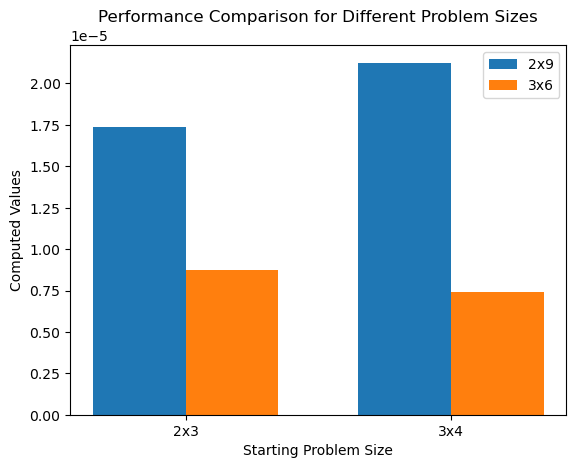

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual computed values)
sizes = ['2x3', '3x4']
values_2x9 = [start_2_3_size_2_9[0][0], start_3_4_size_2_9[0][0]]  # Performance values for problem size 2x9
values_3x6 = [start_2_3_size_3_6[0][0], start_3_4_size_3_6[0][0]]  # Performance values for problem size 3x6

# Width of the bars
bar_width = 0.35

# Positions for the bars on x-axis
index = np.arange(len(sizes))

# Create grouped bar chart
plt.bar(index - bar_width/2, values_2x9, bar_width, label='2x9')
plt.bar(index + bar_width/2, values_3x6, bar_width, label='3x6')

# Add labels, title, and legend
plt.xlabel('Starting Problem Size')
plt.ylabel('Computed Values')
plt.title('Performance Comparison for Different Problem Sizes')
plt.xticks(index, sizes)
plt.legend()

# Show the plot
plt.show()

## Complexity scaling (18 qubits depth 4 3x4 start) Code 1.3.4

In [19]:
experiment_1_3_4_results = [(0.12692708333333333, array([0.25   , 0.1125 , 0.10625, 0.375  , 0.025  , 0.04375, 0.45   ,
       0.08125, 0.08125, 0.225  , 0.26875, 0.225  , 0.1375 , 0.01875,
       0.01875, 0.225  , 0.03125, 0.025  , 0.18125, 0.2125 , 0.18125,
       0.21875, 0.11875, 0.0875 , 0.16875, 0.025  , 0.03125, 0.05625,
       0.0375 , 0.025  , 0.23125, 0.1    , 0.10625, 0.05625, 0.03125,
       0.03125, 0.04375, 0.3125 , 0.3125 , 0.03125, 0.05625, 0.05625,
       0.1625 , 0.03125, 0.03125, 0.0625 , 0.2625 , 0.39375, 0.125  ,
       0.04375, 0.01875, 0.31875, 0.00625, 0.01875, 0.1875 , 0.2375 ,
       0.20625, 0.125  , 0.175  , 0.1625 , 0.15625, 0.03125, 0.00625,
       0.5    , 0.00625, 0.03125, 0.16875, 0.125  , 0.09375, 0.4125 ,
       0.03125, 0.03125, 0.29375, 0.09375, 0.11875, 0.10625, 0.0375 ,
       0.0375 , 0.06875, 0.09375, 0.05   , 0.18125, 0.0125 , 0.025  ,
       0.575  , 0.03125, 0.03125, 0.21875, 0.175  , 0.2125 , 0.19375,
       0.2    , 0.1625 , 0.34375, 0.0375 , 0.04375, 0.1    , 0.075  ,
       0.0625 , 0.28125, 0.0375 , 0.025  , 0.1    , 0.08125, 0.1    ,
       0.24375, 0.00625, 0.00625, 0.16875, 0.025  , 0.03125, 0.0375 ,
       0.09375, 0.125  , 0.31875, 0.10625, 0.08125, 0.10625, 0.05   ,
       0.05   ])), (0.04462239583333334, array([0.146875 , 0.0375   , 0.003125 , 0.090625 , 0.0390625, 0.0015625,        
       0.1203125, 0.01875  , 0.0328125, 0.2390625, 0.040625 , 0.040625 ,
       0.0234375, 0.05     , 0.01875  , 0.0734375, 0.034375 , 0.05     ,
       0.096875 , 0.003125 , 0.0015625, 0.1921875, 0.021875 , 0.0921875,
       0.0640625, 0.0421875, 0.028125 , 0.01875  , 0.028125 , 0.0609375,
       0.1015625, 0.0265625, 0.03125  , 0.15625  , 0.0046875, 0.0078125,
       0.271875 , 0.1703125, 0.0171875, 0.0640625, 0.0359375, 0.009375 ,
       0.059375 , 0.01875  , 0.0046875, 0.225    , 0.03125  , 0.0328125,
       0.0296875, 0.0203125, 0.0203125, 0.0796875, 0.00625  , 0.0078125,
       0.01875  , 0.0234375, 0.0078125, 0.0984375, 0.0078125, 0.046875 ,
       0.0671875, 0.0359375, 0.0171875, 0.0046875, 0.00625  , 0.0015625,
       0.046875 , 0.00625  , 0.0046875, 0.0046875, 0.00625  , 0.00625  ,
       0.00625  , 0.04375  , 0.0078125, 0.015625 , 0.0015625, 0.021875 ,
       0.1203125, 0.0078125, 0.0078125, 0.01875  , 0.0546875, 0.003125 ,
       0.0078125, 0.0046875, 0.021875 , 0.19375  , 0.15     , 0.0953125,
       0.0015625, 0.0125   , 0.0453125, 0.015625 , 0.01875  , 0.0453125,
       0.0015625, 0.040625 , 0.0125   , 0.2890625, 0.009375 , 0.0078125,
       0.1234375, 0.021875 , 0.0234375, 0.040625 , 0.0078125, 0.0171875,
       0.0078125, 0.003125 , 0.0296875, 0.040625 , 0.01875  , 0.0390625,
       0.0109375, 0.009375 , 0.0671875, 0.0265625, 0.028125 , 0.0015625])), (0.020159505208333334, array([0.01015625, 0.0234375 , 0.06210937, 0.00039063, 0.01171875,
       0.0109375 , 0.01054688, 0.0125    , 0.13046875, 0.08515625,
       0.01835938, 0.00039063, 0.00039063, 0.00859375, 0.01367188,
       0.00117187, 0.009375  , 0.00898437, 0.02226563, 0.00742188,
       0.01171875, 0.01210938, 0.02070313, 0.03828125, 0.00039063,
       0.01015625, 0.003125  , 0.00078125, 0.015625  , 0.01210938,
       0.00859375, 0.00742187, 0.07578125, 0.00195312, 0.00546875,
       0.03007812, 0.06445312, 0.14648438, 0.09609375, 0.00429688,
       0.01445313, 0.0359375 , 0.00195312, 0.0171875 , 0.01289062,
       0.1171875 , 0.00390625, 0.109375  , 0.00234375, 0.00273437,
       0.01835938, 0.00039063, 0.028125  , 0.00429688, 0.05585938,
       0.00195312, 0.00351562, 0.0296875 , 0.0015625 , 0.00820313,
       0.00195312, 0.02851563, 0.04335937, 0.00039063, 0.01367188,
       0.01054688, 0.009375  , 0.00742187, 0.01015625, 0.00195312,
       0.0109375 , 0.02109375, 0.0234375 , 0.00117187, 0.00859375,
       0.00078125, 0.02109375, 0.0265625 , 0.00390625, 0.03359375,
       0.02773438, 0.00039063, 0.0109375 , 0.01835938, 0.00195312,
       0.00351562, 0.00546875, 0.025     , 0.07539063, 0.11953125,
       0.02539062, 0.00273437, 0.02734375, 0.00117187, 0.0078125 ,
       0.01015625, 0.00234375, 0.01328125, 0.01679687, 0.00117187,
       0.00273437, 0.01367188, 0.01679687, 0.009375  , 0.02382812,
       0.00195312, 0.00859375, 0.00820313, 0.00195312, 0.00585938,
       0.01015625, 0.01445313, 0.00078125, 0.00976562, 0.00625   ,
       0.00351563, 0.0640625 , 0.00117187, 0.02421875, 0.03320312])), (0.005859375, array([4.98046875e-03, 1.31835938e-02, 1.07421875e-03, 7.81250000e-04,
       1.34765625e-02, 2.92968750e-04, 1.56250000e-03, 1.85546875e-03,
       4.88281250e-04, 3.12500000e-03, 3.22265625e-03, 4.88281250e-04,
       1.95312500e-03, 1.85546875e-03, 9.76562500e-04, 5.85937500e-04,
       3.22265625e-03, 5.85937500e-04, 3.90625000e-04, 3.04687500e-02,
       9.76562500e-05, 3.41796875e-03, 2.16796875e-02, 4.78515625e-03,
       4.88281250e-04, 1.46484375e-03, 9.76562500e-05, 9.76562500e-04,
       6.93359375e-03, 4.88281250e-04, 5.85937500e-04, 2.15820313e-02,
       1.95312500e-04, 4.88281250e-04, 1.17187500e-02, 2.92968750e-04,
       2.70507812e-02, 1.18652344e-01, 1.22070312e-02, 1.07421875e-03,
       1.42578125e-02, 4.68750000e-03, 2.92968750e-04, 1.45507813e-02,
       1.95312500e-04, 3.51562500e-03, 2.83203125e-02, 1.17187500e-03,
       4.88281250e-04, 1.43554687e-02, 4.88281250e-04, 4.88281250e-04,
       9.76562500e-05, 9.76562500e-05, 1.07421875e-03, 3.90625000e-03,
       2.24609375e-03, 4.78515625e-03, 5.85937500e-04, 3.22265625e-03,
       1.66015625e-03, 8.59375000e-03, 5.85937500e-04, 3.22265625e-03,
       1.52343750e-02, 4.88281250e-04, 1.95312500e-04, 7.51953125e-03,
       9.76562500e-05, 5.85937500e-04, 4.88281250e-04, 9.76562500e-05,
       1.75781250e-03, 7.91015625e-03, 1.66015625e-03, 9.76562500e-04,
       1.82617187e-02, 4.88281250e-04, 1.95312500e-04, 3.01757812e-02,
       2.14843750e-03, 6.83593750e-04, 4.88281250e-04, 2.14843750e-03,
       4.88281250e-04, 4.68750000e-03, 4.88281250e-04, 1.02539062e-02,
       6.69921875e-02, 3.90625000e-03, 4.88281250e-04, 1.95312500e-04,
       4.88281250e-03, 7.81250000e-04, 4.58984375e-03, 3.90625000e-04,
       3.51562500e-03, 1.85546875e-03, 2.92968750e-04, 1.95312500e-04,
       3.61328125e-03, 5.85937500e-04, 5.27343750e-03, 1.95312500e-04,
       5.56640625e-03, 2.24609375e-03, 1.17187500e-03, 1.36718750e-03,
       4.88281250e-04, 6.34765625e-03, 4.88281250e-04, 1.95312500e-04,
       1.07421875e-02, 3.90625000e-04, 1.26953125e-03, 5.76171875e-03,
       9.76562500e-05, 9.76562500e-05, 2.95898437e-02, 2.92968750e-04])), (0.0018088785807291667, array([5.22460937e-03, 
5.22460937e-03, 5.37109375e-04, 5.37109375e-04,
       4.15039062e-04, 8.78906250e-04, 5.85937500e-04, 7.08007813e-04,
       8.30078125e-04, 2.19726563e-04, 3.27148438e-03, 1.46484375e-04,
       2.92968750e-04, 4.39453125e-04, 1.02539063e-03, 6.10351562e-04,
       7.81250000e-04, 4.88281250e-04, 6.10351562e-04, 2.68554688e-04,
       2.19726562e-04, 1.70898438e-03, 9.76562500e-03, 1.19628906e-03,
       5.12695313e-04, 2.22167969e-03, 6.59179688e-04, 6.10351562e-04,
       1.70898438e-03, 2.51464844e-03, 3.66210938e-04, 1.70898438e-03,
       2.44140625e-05, 4.88281250e-05, 9.03320313e-04, 2.44140625e-05,
       2.60498047e-02, 6.90917969e-03, 1.50878906e-02, 1.61132812e-03,
       1.17187500e-03, 1.83105469e-03, 5.61523437e-04, 6.10351562e-04,
       5.10253906e-03, 2.02636719e-03, 5.61523438e-04, 2.44140625e-05,
       1.70898438e-04, 2.31933594e-03, 9.76562500e-05, 3.66210938e-04,
       1.04980469e-03, 1.22070312e-04, 4.88281250e-05, 1.14746094e-03,
       4.88281250e-05, 4.63867187e-04, 5.20019531e-03, 2.44140625e-05,
       6.59179688e-04, 8.30078125e-04, 1.22070312e-04, 4.78515625e-03,
       2.92968750e-04, 6.10351562e-04, 1.22070312e-04, 7.98339844e-03,
       7.32421875e-04, 2.92968750e-04, 1.70898437e-04, 2.44140625e-04,
       1.04980469e-03, 3.00292969e-03, 4.88281250e-05, 9.03320313e-04,
       2.68554688e-04, 4.39453125e-04, 2.05078125e-03, 1.68457031e-03,
       4.15039062e-04, 5.12695313e-04, 1.02539062e-03, 1.14746094e-03,
       1.22070312e-04, 4.88281250e-05, 1.46484375e-03, 1.24267578e-02,
       1.61621094e-02, 1.22070312e-04, 3.41796875e-04, 1.41601562e-03,
       8.78906250e-04, 4.63867187e-04, 5.39550781e-03, 7.81250000e-04,
       1.29394531e-03, 7.32421875e-04, 2.44140625e-05, 7.32421875e-04,
       5.37109375e-04, 7.56835937e-04, 1.46484375e-03, 5.85937500e-04,
       8.30078125e-04, 9.76562500e-04, 1.51367188e-03, 3.66210938e-04,
       2.44140625e-04, 3.66210938e-04, 5.12695313e-04, 2.44140625e-04,
       2.75878906e-03, 1.90429687e-03, 7.08007812e-04, 2.85644531e-03,
       2.44140625e-05, 3.66210938e-04, 2.85644531e-03, 5.49316406e-03])), (0.0011673482259114585, array([2.38037109e-03, 
5.28564453e-03, 1.52587891e-04, 6.28662109e-04,
       1.08642578e-03, 6.10351563e-06, 8.23974609e-04, 1.89208984e-03,
       6.10351563e-06, 5.12695313e-04, 3.05175781e-04, 7.93457031e-05,
       5.49316406e-05, 6.59179688e-04, 1.22070313e-05, 3.35693359e-04,
       4.45556641e-04, 6.10351562e-05, 8.54492188e-05, 8.05664062e-04,
       1.28173828e-04, 1.37939453e-03, 2.03857422e-03, 2.74658203e-04,
       2.56347656e-04, 3.66210937e-05, 1.09863281e-04, 2.74658203e-04,
       7.56835937e-04, 7.32421875e-05, 3.29589844e-04, 3.05175781e-05,
       1.40380859e-04, 2.13623047e-04, 1.71508789e-03, 3.05175781e-05,
       2.58605957e-02, 1.97998047e-02, 6.95800781e-04, 1.04980469e-03,
       1.23901367e-03, 7.32421875e-05, 4.45556641e-04, 5.67626953e-04,
       1.22070313e-05, 9.09423828e-04, 4.90722656e-03, 3.66210937e-05,
       1.40380859e-04, 1.91650391e-03, 2.44140625e-05, 6.46972656e-04,
       1.59912109e-03, 3.05175781e-05, 2.44140625e-05, 6.71386719e-05,
       3.05175781e-05, 6.71386719e-05, 3.35693359e-04, 2.56347656e-04,
       8.23974609e-04, 9.88769531e-04, 3.05175781e-05, 1.40380859e-03,
       5.22460938e-03, 1.22070313e-05, 1.89208984e-04, 7.32421875e-05,
       3.66210937e-05, 3.66210938e-04, 4.88281250e-05, 6.10351562e-05,
       5.49316406e-04, 2.50244141e-04, 3.11279297e-04, 6.83593750e-04,
       3.47290039e-03, 3.05175781e-05, 2.71606445e-03, 3.39355469e-03,
       2.44140625e-05, 2.01416016e-04, 3.90625000e-04, 4.27246094e-05,
       3.66210938e-05, 3.05175781e-05, 3.05175781e-05, 1.08093262e-02,
       1.27746582e-02, 3.11279297e-04, 1.40380859e-04, 1.95312500e-04,
       1.89208984e-04, 2.68554687e-04, 5.79833984e-04, 1.83105469e-04,
       4.63867188e-04, 6.34765625e-04, 8.54492187e-05, 2.74658203e-04,
       1.22680664e-03, 4.88281250e-05, 6.40869141e-04, 6.71386719e-04,
       5.00488281e-04, 2.62451172e-04, 7.93457031e-05, 7.32421875e-05,
       8.54492187e-05, 4.88281250e-05, 6.71386719e-05, 3.17382813e-04,
       1.45874023e-03, 5.49316406e-05, 2.74658203e-04, 3.35693359e-04,
       1.89208984e-04, 4.33349609e-04, 7.62939453e-04, 7.32421875e-05])), (0.0005509694417317707, array([2.63977051e-04, 
2.25219727e-03, 4.11987305e-04, 4.57763672e-06,
       3.21960449e-04, 3.81469727e-05, 2.28881836e-05, 1.72882080e-03,
       1.37329102e-05, 2.44140625e-05, 3.96728516e-04, 1.73950195e-04,
       3.05175781e-05, 3.92150879e-04, 3.96728516e-05, 1.52587891e-05,
       1.22070312e-04, 3.35693359e-05, 7.62939453e-06, 4.56237793e-04,
       2.59399414e-05, 1.64794922e-04, 1.49993896e-03, 5.17272949e-04,
       1.06811523e-05, 4.57763672e-06, 1.52587891e-06, 1.06811523e-05,
       1.64794922e-04, 3.81469727e-05, 9.15527344e-06, 3.96728516e-04,
       4.42504883e-05, 7.62939453e-06, 8.33129883e-04, 4.57763672e-06,
       2.49938965e-03, 2.08831787e-02, 7.15637207e-04, 3.05175781e-05,
       9.26208496e-04, 1.08337402e-04, 6.10351563e-06, 5.90515137e-04,
       1.52587891e-06, 1.20544434e-04, 3.64227295e-03, 4.11987305e-05,
       1.52587891e-06, 1.04675293e-03, 1.22070312e-05, 7.62939453e-06,
       5.67626953e-04, 4.57763672e-06, 1.52587891e-06, 3.96728516e-05,
       5.79833984e-05, 1.54113770e-04, 3.50952148e-05, 4.47082520e-04,
       1.22070313e-05, 1.37786865e-03, 9.15527344e-06, 9.46044922e-05,
       1.16729736e-03, 6.25610352e-05, 3.05175781e-06, 1.22070312e-04,
       3.66210937e-05, 4.57763672e-06, 2.67028809e-04, 1.52587891e-06,
       4.11987305e-05, 2.28881836e-04, 3.35693359e-05, 3.05175781e-06,
       1.11846924e-03, 1.83105469e-05, 5.34057617e-05, 2.24609375e-03,
       2.89916992e-05, 1.52587891e-06, 8.85009766e-05, 7.32421875e-05,
       7.62939453e-06, 2.59399414e-05, 1.52587891e-06, 5.96618652e-04,
       9.59167480e-03, 2.00195313e-03, 1.52587891e-06, 1.84631348e-04,
       2.89916992e-05, 7.62939453e-06, 2.10571289e-04, 1.00708008e-04,
       4.11987305e-05, 2.79235840e-04, 7.01904297e-05, 6.10351563e-06,
       3.75366211e-04, 5.34057617e-05, 1.52587891e-04, 5.03540039e-05,
       1.22070312e-04, 1.52587891e-06, 7.35473633e-04, 3.05175781e-05,
       1.52587891e-06, 4.27246094e-05, 6.10351563e-06, 2.44140625e-05,
       3.76892090e-04, 5.34057617e-05, 3.20434570e-05, 5.87463379e-04,
       4.88281250e-05, 3.05175781e-06, 7.35473633e-04, 7.62939453e-06])), (0.00015543619791666665, array([9.91821289e-06, 1.52587891e-05, 3.43322754e-06, 6.48498535e-06,
       5.72204590e-06, 1.90734863e-06, 6.86645508e-06, 3.54766846e-05,
       1.22070313e-05, 5.72204590e-06, 9.91821289e-06, 5.72204590e-06,
       8.01086426e-06, 1.71661377e-05, 2.28881836e-06, 4.95910645e-06,
       1.41143799e-05, 6.48498535e-06, 4.19616699e-06, 3.31878662e-05,
       2.28881836e-06, 1.03759766e-04, 8.62121582e-05, 6.94274902e-05,
       1.02996826e-05, 3.47137451e-05, 3.81469727e-06, 9.07897949e-05,
       3.43704224e-04, 7.70568848e-05, 2.28881836e-06, 2.21252441e-05,
       4.95910645e-06, 3.05175781e-06, 3.81469727e-05, 1.83105469e-05,
       5.69915771e-04, 3.13110352e-03, 7.59887695e-04, 5.76782227e-04,
       1.15623474e-03, 3.55911255e-04, 1.50871277e-03, 1.89590454e-04,
       9.86480713e-04, 2.67028809e-06, 3.20434570e-05, 5.34057617e-06,
       6.10351563e-06, 1.25885010e-05, 4.57763672e-06, 8.77380371e-06,
       1.67846680e-05, 6.86645508e-06, 7.62939453e-07, 3.43322754e-06,
       2.67028809e-06, 3.20434570e-05, 2.44140625e-05, 1.37329102e-05,
       1.86920166e-05, 2.21252441e-05, 1.41143799e-05, 1.79290771e-05,
       2.51770020e-05, 1.14440918e-05, 3.81469727e-06, 2.51770020e-05,
       1.90734863e-06, 2.74658203e-05, 4.00543213e-05, 1.86920166e-05,
       9.19342041e-05, 3.16619873e-05, 1.86920166e-05, 6.75201416e-05,
       4.23431396e-05, 2.25067139e-05, 5.34057617e-06, 5.22613525e-05,
       1.90734863e-06, 1.86157227e-04, 6.06536865e-05, 9.42230225e-05,
       2.94113159e-04, 1.06468201e-03, 3.42941284e-04, 9.16671753e-04,
       1.93786621e-04, 4.96292114e-04, 5.72204590e-06, 2.89916992e-05,
       1.52587891e-06, 1.03416443e-03, 1.48200989e-03, 1.03378296e-04,
       3.81469727e-07, 2.02178955e-05, 1.52587891e-06, 2.67028809e-06,
       2.55584717e-05, 4.95910645e-06, 2.05993652e-05, 1.90734863e-05,
       1.52587891e-05, 1.10626221e-05, 1.25885010e-05, 3.43322754e-06,
       6.10351563e-06, 1.29699707e-05, 1.90734863e-06, 1.48773193e-05,
       1.18255615e-05, 4.53948975e-05, 7.62939453e-06, 2.97546387e-05,
       3.05175781e-06, 3.15856934e-04, 1.89208984e-04, 4.82940674e-04]))]
experiment_1_3_4_average = [x for (x, y) in experiment_1_3_4_results]
experiment_1_3_4_spread = [y for (x, y) in experiment_1_3_4_results]

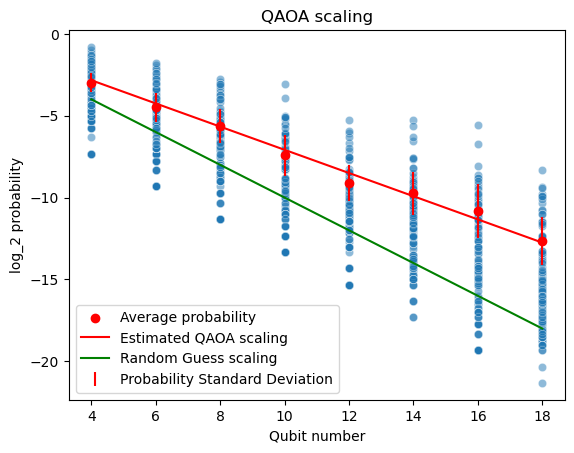

[0.70836144]
[0.01039027]


In [4]:
visualize_experiment(experiment_1_3_4_average, experiment_1_3_4_spread, 18)

## Complexity scaling (18 qubits depth 2 3x4 start) Code 1.3.4.2

In [20]:
experiment_1_3_4_2_results = [(0.1328125, array([0.35   , 0.075  , 0.13125, 0.0625 , 0.03125, 0.0375 , 0.04375,
       0.06875, 0.01875, 0.3875 , 0.05   , 0.08125, 0.125  , 0.00625,
       0.03125, 0.175  , 0.075  , 0.1625 , 0.39375, 0.3875 , 0.44375,
       0.19375, 0.1    , 0.0875 , 0.39375, 0.09375, 0.1    , 0.3375 ,
       0.19375, 0.225  , 0.21875, 0.0375 , 0.03125, 0.03125, 0.05625,
       0.03125, 0.2    , 0.06875, 0.10625, 0.275  , 0.025  , 0.0125 ,
       0.14375, 0.0625 , 0.03125, 0.33125, 0.1125 , 0.0875 , 0.01875,
       0.06875, 0.0375 , 0.1    , 0.05   , 0.04375, 0.2125 , 0.00625,
       0.03125, 0.1375 , 0.1875 , 0.1    , 0.14375, 0.01875, 0.0125 ,
       0.1875 , 0.075  , 0.025  , 0.04375, 0.125  , 0.1125 , 0.43125,
       0.03125, 0.00625, 0.56875, 0.06875, 0.04375, 0.05625, 0.0875 ,
       0.075  , 0.0625 , 0.15   , 0.16875, 0.36875, 0.15625, 0.1375 ,
       0.125  , 0.0625 , 0.0625 , 0.0375 , 0.05625, 0.06875, 0.41875,
       0.09375, 0.01875, 0.36875, 0.1    , 0.04375, 0.1375 , 0.0125 ,
       0.03125, 0.1625 , 0.0375 , 0.03125, 0.1    , 0.2    , 0.18125,
       0.3375 , 0.11875, 0.11875, 0.5875 , 0.075  , 0.06875, 0.1    ,
       0.1125 , 0.1125 , 0.2125 , 0.075  , 0.06875, 0.54375, 0.075  ,
       0.10625])), (0.040533854166666675, array([0.021875 , 0.0453125, 0.034375 , 0.0765625, 0.0390625, 0.0125   , 
       0.0640625, 0.021875 , 0.0046875, 0.078125 , 0.0109375, 0.03125  ,
       0.0421875, 0.0234375, 0.0296875, 0.0078125, 0.003125 , 0.025    ,
       0.021875 , 0.025    , 0.015625 , 0.05625  , 0.0046875, 0.0234375,
       0.0484375, 0.053125 , 0.0546875, 0.003125 , 0.0125   , 0.0578125,
       0.0390625, 0.0078125, 0.0078125, 0.015625 , 0.05625  , 0.0171875,
       0.071875 , 0.0515625, 0.0578125, 0.025    , 0.0125   , 0.0203125,
       0.08125  , 0.059375 , 0.0265625, 0.00625  , 0.090625 , 0.003125 ,
       0.059375 , 0.0109375, 0.003125 , 0.3875   , 0.0734375, 0.0453125,
       0.0015625, 0.0046875, 0.0046875, 0.003125 , 0.03125  , 0.0046875,
       0.071875 , 0.03125  , 0.0546875, 0.0484375, 0.0328125, 0.0484375,
       0.05     , 0.0171875, 0.0328125, 0.0015625, 0.0078125, 0.0015625,
       0.0703125, 0.0109375, 0.05     , 0.0078125, 0.0015625, 0.0015625,
       0.13125  , 0.05625  , 0.0515625, 0.1109375, 0.1015625, 0.140625 ,
       0.040625 , 0.028125 , 0.0359375, 0.0421875, 0.0484375, 0.0046875,
       0.0890625, 0.04375  , 0.01875  , 0.0609375, 0.0328125, 0.0203125,
       0.028125 , 0.009375 , 0.0046875, 0.04375  , 0.021875 , 0.0578125,
       0.234375 , 0.075    , 0.096875 , 0.0171875, 0.0375   , 0.0265625,
       0.00625  , 0.0125   , 0.0015625, 0.00625  , 0.0296875, 0.0328125,
       0.065625 , 0.0625   , 0.0265625, 0.0328125, 0.0578125, 0.05     ])), (0.019957682291666667, array([0.01914063, 0.00195312, 0.003125  , 0.00078125, 0.0171875 ,
       0.04257813, 0.00117187, 0.02070312, 0.015625  , 0.00351563,
       0.0046875 , 0.03632813, 0.00195312, 0.01875   , 0.01992187,
       0.015625  , 0.01015625, 0.03789062, 0.13867188, 0.00429688,
       0.00664062, 0.00546875, 0.01523437, 0.01523438, 0.00585938,
       0.0328125 , 0.03515625, 0.0546875 , 0.0015625 , 0.00117188,
       0.00507813, 0.00117187, 0.00742188, 0.00390625, 0.02070312,
       0.04257813, 0.00625   , 0.021875  , 0.02890625, 0.00195312,
       0.00351563, 0.00078125, 0.0046875 , 0.02695312, 0.04765625,
       0.01523437, 0.01328125, 0.01875   , 0.00078125, 0.00195312,
       0.0125    , 0.00078125, 0.01992187, 0.03398437, 0.00195312,
       0.00195312, 0.00039063, 0.02109375, 0.00507813, 0.00664063,
       0.00195312, 0.02070313, 0.078125  , 0.00507813, 0.0125    ,
       0.01953125, 0.00820313, 0.01640625, 0.01210937, 0.00195312,
       0.0015625 , 0.003125  , 0.00820313, 0.01875   , 0.00429688,
       0.01015625, 0.0125    , 0.05898437, 0.0296875 , 0.00976562,
       0.0265625 , 0.03398437, 0.0953125 , 0.09960938, 0.00273437,
       0.00390625, 0.01875   , 0.00195312, 0.01914063, 0.06484375,
       0.00390625, 0.00625   , 0.028125  , 0.01328125, 0.01367188,
       0.021875  , 0.00195312, 0.0046875 , 0.01132812, 0.00078125,
       0.01679687, 0.05507813, 0.03359375, 0.0203125 , 0.19414063,
       0.01289062, 0.00507813, 0.04335938, 0.00585938, 0.0015625 ,
       0.02695313, 0.01328125, 0.01992187, 0.01054688, 0.00390625,
       0.01796875, 0.04296875, 0.00742187, 0.04648437, 0.04492188])), (0.00483154296875, array([2.24609375e-03, 7.81250000e-04, 3.90625000e-04, 1.75781250e-03,
       1.63085937e-02, 1.95312500e-04, 4.88281250e-04, 1.28906250e-02,
       2.92968750e-04, 1.17187500e-03, 6.15234375e-03, 4.88281250e-04,
       8.78906250e-04, 5.37109375e-03, 2.92968750e-04, 2.24609375e-03,
       1.83593750e-02, 9.76562500e-05, 7.51953125e-03, 2.44140625e-03,
       2.63671875e-03, 1.26953125e-03, 5.56640625e-03, 9.76562500e-04,
       9.76562500e-04, 1.79687500e-02, 2.24609375e-03, 3.90625000e-03,
       1.86523437e-02, 3.71093750e-03, 4.88281250e-04, 3.61328125e-03,
       2.92968750e-04, 3.90625000e-04, 1.38671875e-02, 9.76562500e-04,
       1.75781250e-03, 1.39648437e-02, 1.85546875e-03, 4.88281250e-04,
       3.22265625e-03, 4.88281250e-04, 1.95312500e-04, 1.85546875e-02,
       1.36718750e-03, 7.81250000e-04, 7.71484375e-03, 1.66015625e-03,
       2.92968750e-04, 3.90625000e-04, 9.76562500e-05, 3.51562500e-03,
       9.76562500e-05, 3.80859375e-03, 9.76562500e-05, 1.95312500e-04,
       4.88281250e-04, 9.76562500e-05, 4.88281250e-04, 1.07421875e-03,
       1.07421875e-03, 4.63867188e-02, 1.66015625e-03, 5.85937500e-04,
       8.49609375e-03, 1.17187500e-03, 1.46484375e-03, 4.88281250e-04,
       2.92968750e-04, 4.88281250e-04, 4.88281250e-04, 4.88281250e-04,
       1.07421875e-03, 8.49609375e-03, 9.76562500e-05, 1.95312500e-04,
       5.27343750e-03, 3.90625000e-04, 8.69140625e-03, 4.19921875e-03,
       9.96093750e-03, 7.91015625e-03, 6.42578125e-02, 6.25000000e-03,
       1.95312500e-04, 2.24609375e-03, 1.95312500e-04, 8.78906250e-04,
       2.87109375e-02, 3.90625000e-04, 8.78906250e-04, 2.92968750e-03,
       9.76562500e-04, 1.07421875e-03, 1.73828125e-02, 4.88281250e-04,
       4.88281250e-04, 3.41796875e-03, 3.90625000e-04, 1.36718750e-03,
       6.05468750e-03, 2.92968750e-04, 8.88671875e-03, 4.01367188e-02,
       7.81250000e-03, 2.92968750e-03, 9.76562500e-05, 1.85546875e-03,
       4.88281250e-04, 5.95703125e-03, 1.95312500e-04, 1.75781250e-03,
       6.25000000e-03, 1.17187500e-03, 7.81250000e-04, 9.08203125e-03,
       4.88281250e-04, 2.92968750e-04, 2.14843750e-02, 1.26953125e-03])), (0.0013539632161458333, array([6.34765625e-04, 1.48925781e-03, 1.02539063e-03, 2.07519531e-03,
       1.95312500e-03, 1.70898438e-03, 1.04980469e-03, 3.17382813e-04,
       2.68554688e-04, 9.76562500e-05, 5.12695313e-04, 2.44140625e-04,
       2.44140625e-04, 8.30078125e-04, 3.66210938e-04, 2.46582031e-03,
       5.85937500e-04, 3.90625000e-04, 9.76562500e-04, 9.76562500e-05,
       6.83593750e-04, 3.90625000e-04, 1.58691406e-03, 4.88281250e-04,
       1.90429687e-03, 1.41601562e-03, 2.44140625e-05, 1.22070312e-04,
       1.92871094e-03, 3.66210938e-04, 2.19726562e-04, 4.63867188e-04,
       6.59179688e-04, 1.26953125e-03, 1.70898438e-03, 6.90917969e-03,
       1.53808594e-03, 4.32128906e-03, 1.17187500e-03, 2.44140625e-05,
       1.07421875e-03, 2.92968750e-04, 1.44042969e-03, 9.52148438e-04,
       2.92968750e-04, 9.03320313e-04, 4.00390625e-03, 1.14746094e-03,
       7.32421875e-05, 2.44140625e-05, 1.70898437e-04, 4.93164063e-03,
       6.83593750e-04, 7.56835937e-04, 7.32421875e-05, 8.30078125e-04,
       7.56835938e-04, 1.22070312e-04, 1.53808594e-03, 1.70898437e-04,
       1.17187500e-03, 2.53906250e-03, 1.14746094e-03, 7.08007812e-04,
       1.61132813e-03, 1.83105469e-03, 3.41796875e-04, 3.66210937e-04,
       6.10351562e-04, 1.22070312e-04, 3.66210938e-04, 2.68554688e-04,
       2.44140625e-04, 5.85937500e-04, 9.76562500e-04, 1.46484375e-04,
       5.85937500e-04, 4.15039063e-04, 3.41796875e-03, 1.25244141e-02,
       2.44140625e-04, 8.98437500e-03, 1.63818359e-02, 4.24804687e-03,
       3.17382813e-04, 9.27734375e-04, 2.44140625e-04, 6.10351562e-04,
       5.37109375e-04, 2.58789062e-03, 7.08007812e-04, 1.56250000e-03,
       4.39453125e-04, 1.92871094e-03, 1.83105469e-03, 2.44140625e-05,
       1.22070312e-04, 2.92968750e-04, 2.19726562e-04, 3.41796875e-04,
       8.30078125e-04, 1.14746094e-03, 4.12597656e-03, 5.63964844e-03,
       5.12695313e-04, 1.51367187e-03, 7.08007812e-04, 1.22070312e-04,
       4.88281250e-05, 5.85937500e-04, 6.83593750e-04, 5.12695312e-04,
       1.66015625e-03, 9.03320313e-04, 1.90429687e-03, 1.48925781e-03,
       3.66210938e-04, 1.31835938e-03, 7.08007813e-04, 3.90625000e-04])), (0.000711212158203125, array([9.76562500e-05, 7.93457031e-05, 3.54003906e-04, 1.00708008e-03,
       2.77099609e-03, 6.10351563e-06, 6.10351562e-04, 2.37426758e-03,
       1.22070313e-05, 3.84521484e-04, 3.05175781e-05, 6.71386719e-05,
       1.28173828e-04, 3.05175781e-05, 3.05175781e-05, 2.99072266e-04,
       1.00097656e-03, 3.66210937e-05, 1.15966797e-04, 1.52587891e-04,
       3.11279297e-04, 4.15039062e-04, 1.11694336e-03, 6.71386719e-05,
       1.32446289e-03, 9.52148437e-04, 1.40380859e-04, 2.25830078e-04,
       8.54492188e-05, 2.31933594e-04, 1.09863281e-04, 1.83105469e-05,
       6.10351563e-06, 9.82666016e-04, 5.12695313e-04, 1.15966797e-04,
       9.88769531e-04, 1.18408203e-03, 1.09863281e-04, 1.28173828e-04,
       2.68554688e-04, 2.44140625e-05, 1.32446289e-03, 1.80053711e-03,
       8.54492187e-05, 6.16455078e-04, 1.34277344e-04, 1.13525391e-03,
       3.05175781e-05, 6.71386719e-05, 3.05175781e-05, 1.80053711e-03,
       3.76586914e-03, 3.05175781e-05, 3.05175781e-05, 3.05175781e-05,
       6.10351563e-06, 3.66210938e-05, 4.88281250e-05, 3.66210937e-05,
       1.30004883e-03, 3.11889648e-03, 2.44140625e-05, 5.61523438e-04,
       5.61523437e-04, 4.88281250e-05, 4.33349609e-04, 3.11279297e-04,
       6.10351563e-06, 3.05175781e-05, 3.05175781e-05, 6.10351563e-06,
       3.29589844e-04, 7.32421875e-05, 1.28173828e-04, 1.22070312e-04,
       1.83105469e-04, 3.05175781e-05, 1.03149414e-03, 2.38647461e-03,
       1.55029297e-03, 9.07592773e-03, 7.06787109e-03, 9.88769531e-04,
       2.86865234e-04, 4.08935547e-04, 6.10351562e-05, 6.71386719e-04,
       3.47900391e-04, 1.22070313e-05, 4.27246094e-04, 2.53906250e-03,
       6.71386719e-05, 8.30078125e-04, 1.18408203e-03, 6.10351563e-06,
       7.32421875e-05, 1.03759766e-04, 3.05175781e-05, 2.50244141e-04,
       2.19726562e-04, 1.70898437e-04, 1.92260742e-03, 9.72290039e-03,
       3.66210937e-05, 5.73730469e-04, 4.63867188e-04, 1.83105469e-05,
       1.22070312e-04, 1.77001953e-04, 3.66210937e-05, 3.17382813e-04,
       1.44042969e-03, 1.28173828e-04, 4.63867188e-04, 5.85937500e-04,
       9.76562500e-05, 1.44042969e-03, 6.83593750e-04, 1.03759766e-04])), (0.00032185872395833334, array([2.89916992e-05, 1.67846680e-05, 3.50952148e-05, 7.32421875e-05,
       1.31225586e-03, 6.86645508e-05, 1.52587891e-05, 8.16345215e-04,
       1.22070312e-05, 2.13623047e-05, 3.18908691e-04, 1.67846680e-05,
       4.57763672e-06, 1.22070312e-05, 2.59399414e-05, 4.42504883e-05,
       2.68554688e-04, 7.62939453e-06, 1.41906738e-04, 4.88281250e-05,
       5.49316406e-05, 1.37329102e-05, 3.66210938e-05, 1.06811523e-05,
       2.28881836e-05, 8.28552246e-04, 5.79833984e-05, 1.22070313e-05,
       1.41906738e-04, 9.76562500e-05, 3.20434570e-05, 8.08715820e-05,
       4.42504883e-05, 3.05175781e-06, 6.68334961e-04, 4.27246094e-05,
       3.35693359e-05, 6.48498535e-04, 2.34985352e-04, 6.10351563e-06,
       1.55639648e-04, 1.06811523e-05, 1.37329102e-05, 1.17034912e-03,
       2.13623047e-05, 1.52587891e-06, 1.25122070e-04, 3.66210937e-05,
       7.62939453e-06, 1.98364258e-05, 1.52587891e-06, 3.81469727e-04,
       1.44958496e-04, 6.10351563e-06, 7.62939453e-06, 7.62939453e-06,
       3.05175781e-06, 3.05175781e-06, 1.03759766e-04, 2.28881836e-05,
       1.52587891e-05, 3.23638916e-03, 5.03540039e-05, 1.67846680e-05,
       2.91442871e-04, 6.71386719e-05, 4.42504883e-05, 8.60595703e-04,
       1.06811523e-05, 7.62939453e-06, 3.05175781e-06, 1.52587891e-06,
       1.67846680e-05, 1.08337402e-04, 4.57763672e-05, 7.62939453e-06,
       9.07897949e-04, 1.37329102e-05, 3.15856934e-04, 5.05065918e-04,
       1.38854980e-03, 2.21252441e-04, 6.40106201e-03, 2.00653076e-03,
       3.05175781e-06, 1.03759766e-04, 1.67846680e-05, 1.22070313e-05,
       1.11694336e-03, 1.22070313e-05, 3.05175781e-05, 7.29370117e-04,
       3.35693359e-05, 4.42504883e-05, 6.46972656e-04, 2.44140625e-05,
       7.62939453e-06, 5.49316406e-05, 4.57763672e-06, 6.10351563e-06,
       9.65881348e-04, 3.81469727e-05, 2.97546387e-04, 6.70013428e-03,
       6.77490234e-04, 7.32421875e-05, 5.79833984e-04, 1.67846680e-05,
       9.15527344e-06, 1.12915039e-04, 7.62939453e-06, 2.28881836e-05,
       7.93457031e-05, 2.74658203e-05, 3.20434570e-05, 4.42504883e-05,
       1.17492676e-04, 6.10351563e-06, 7.98034668e-04, 1.98364258e-05])), (0.00014010429382324218, array([4.25720215e-04, 2.58636475e-04, 1.22451782e-04, 1.05285645e-04,
       4.62722778e-04, 1.34277344e-04, 6.71386719e-05, 8.73565674e-05,
       6.79016113e-05, 3.43322754e-06, 2.63214111e-05, 1.10626221e-05,
       5.41687012e-05, 7.13348389e-05, 8.08715820e-05, 9.53674316e-06,
       3.96728516e-05, 4.95910645e-06, 4.95910645e-06, 1.06811523e-05,
       3.54766846e-05, 2.55584717e-05, 6.67572021e-05, 4.38690186e-05,
       1.90734863e-06, 1.60217285e-05, 4.95910645e-06, 2.28881836e-06,
       2.17437744e-05, 7.62939453e-07, 7.62939453e-06, 9.15527344e-06,
       1.52587891e-06, 1.14669800e-03, 6.26373291e-04, 7.21359253e-04,
       1.13945007e-03, 1.10626221e-04, 5.47409058e-04, 3.05175781e-06,
       3.43322754e-06, 1.18255615e-05, 3.01361084e-05, 4.53948975e-05,
       3.05175781e-05, 5.72204590e-05, 3.12805176e-05, 6.14166260e-05,
       8.39233398e-06, 9.91821289e-06, 3.05175781e-06, 3.05175781e-06,
       1.29699707e-05, 3.81469727e-06, 3.05175781e-06, 2.36511230e-05,
       1.29699707e-05, 7.59124756e-05, 1.10626221e-04, 8.73565674e-05,
       1.53732300e-04, 4.12750244e-04, 1.65557861e-04, 1.14440918e-04,
       1.02996826e-05, 1.12915039e-04, 4.95910645e-06, 3.08990479e-05,
       4.57763672e-06, 4.20761108e-04, 1.62506104e-04, 3.23486328e-04,
       2.29263306e-04, 7.97271729e-05, 1.23214722e-04, 5.72204590e-06,
       9.91821289e-06, 1.29699707e-05, 5.77545166e-04, 9.76562500e-05,
       1.43814087e-04, 2.71301270e-03, 6.31713867e-04, 1.96533203e-03,
       2.28881836e-06, 3.01361084e-05, 5.72204590e-06, 6.29425049e-05,
       9.80377197e-05, 8.58306885e-05, 1.29699707e-05, 2.17437744e-05,
       6.10351562e-06, 4.57763672e-06, 5.34057617e-06, 1.90734863e-06,
       1.10626221e-05, 2.55584717e-05, 2.47955322e-05, 2.17056274e-04,
       2.09808350e-05, 6.75201416e-05, 6.48498535e-06, 1.06811523e-05,
       7.62939453e-07, 1.52587891e-06, 1.29699707e-05, 5.34057617e-06,
       4.57763672e-05, 4.95910645e-06, 1.98364258e-05, 3.58581543e-05,
       1.25885010e-05, 3.62396240e-05, 4.95910645e-06, 1.48773193e-05,
       2.28881836e-06, 6.56127930e-05, 5.95092773e-05, 5.37872314e-05]))]
experiment_1_3_4_2_average = [x for (x, y) in experiment_1_3_4_2_results]
experiment_1_3_4_2_spread = [y for (x, y) in experiment_1_3_4_2_results]

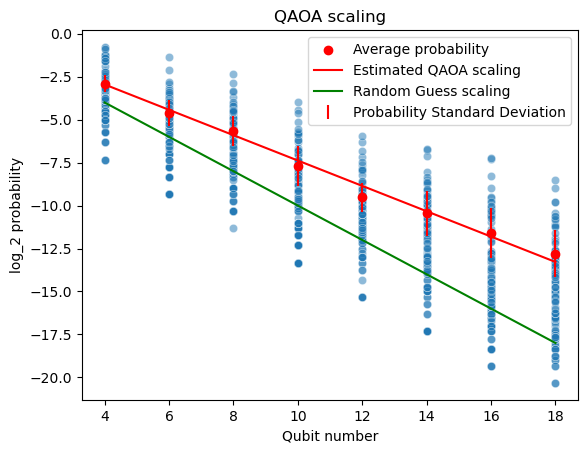

[0.73793696]
[0.01092111]


In [51]:
visualize_experiment(experiment_1_3_4_2_average, experiment_1_3_4_2_spread, 18)

## Complexity scaling (18 qubits depth 6 3x4 start) Code 1.3.4.3

In [21]:
experiment_1_3_4_3_results = [(0.14317708333333332, array([0.2125 , 0.18125, 0.1875 , 0.19375, 0.0375 , 0.05   , 0.06875,
       0.04375, 0.04375, 0.81875, 0.025  , 0.01875, 0.1875 , 0.03125,
       0.0125 , 0.20625, 0.10625, 0.1375 , 0.03125, 0.04375, 0.05   ,
       0.13125, 0.00625, 0.0125 , 0.0875 , 0.10625, 0.10625, 0.375  ,
       0.1375 , 0.1875 , 0.19375, 0.18125, 0.21875, 0.325  , 0.00625,
       0.0125 , 0.2    , 0.03125, 0.03125, 0.025  , 0.375  , 0.3625 ,
       0.4    , 0.1    , 0.0875 , 0.29375, 0.05   , 0.025  , 0.15625,
       0.225  , 0.1875 , 0.1625 , 0.03125, 0.03125, 0.35   , 0.05625,
       0.04375, 0.14375, 0.03125, 0.0375 , 0.35   , 0.075  , 0.0625 ,
       0.16875, 0.10625, 0.06875, 0.25625, 0.1875 , 0.2125 , 0.2625 ,
       0.2    , 0.15625, 0.325  , 0.03125, 0.0625 , 0.4    , 0.1125 ,
       0.125  , 0.4125 , 0.1125 , 0.15625, 0.20625, 0.20625, 0.21875,
       0.28125, 0.05   , 0.075  , 0.5    , 0.1125 , 0.1    , 0.08125,
       0.0875 , 0.13125, 0.2    , 0.04375, 0.03125, 0.20625, 0.06875,
       0.0875 , 0.18125, 0.00625, 0.03125, 0.15625, 0.08125, 0.05625,
       0.375  , 0.03125, 0.0625 , 0.28125, 0.13125, 0.11875, 0.2875 ,
       0.0375 , 0.03125, 0.025  , 0.125  , 0.1125 , 0.04375, 0.1125 ,
       0.15   ])), (0.039544270833333325, array([0.04375  , 0.0078125, 0.0078125, 0.0203125, 0.0078125, 0.0453125, 
       0.0078125, 0.0078125, 0.103125 , 0.034375 , 0.00625  , 0.0109375,
       0.0109375, 0.028125 , 0.0015625, 0.1      , 0.00625  , 0.0078125,
       0.025    , 0.03125  , 0.0078125, 0.23125  , 0.1203125, 0.0046875,
       0.0546875, 0.028125 , 0.0265625, 0.015625 , 0.0140625, 0.025    ,
       0.1203125, 0.059375 , 0.0359375, 0.0671875, 0.0078125, 0.03125  ,
       0.10625  , 0.003125 , 0.0375   , 0.0890625, 0.0078125, 0.065625 ,
       0.021875 , 0.0171875, 0.0140625, 0.0765625, 0.0140625, 0.009375 ,
       0.040625 , 0.0390625, 0.0140625, 0.0515625, 0.0109375, 0.0890625,
       0.0953125, 0.0453125, 0.0015625, 0.0234375, 0.0109375, 0.025    ,
       0.0640625, 0.021875 , 0.003125 , 0.003125 , 0.0296875, 0.021875 ,
       0.1828125, 0.021875 , 0.015625 , 0.021875 , 0.0078125, 0.0125   ,
       0.1453125, 0.0328125, 0.0140625, 0.0984375, 0.0296875, 0.09375  ,
       0.0984375, 0.0765625, 0.059375 , 0.0234375, 0.00625  , 0.0453125,
       0.0234375, 0.0171875, 0.0203125, 0.1      , 0.0078125, 0.0140625,
       0.015625 , 0.05625  , 0.0421875, 0.0203125, 0.0421875, 0.05625  ,
       0.0171875, 0.06875  , 0.05625  , 0.021875 , 0.0078125, 0.04375  ,
       0.128125 , 0.0078125, 0.0453125, 0.0671875, 0.0078125, 0.0203125,
       0.0671875, 0.0125   , 0.0296875, 0.034375 , 0.0328125, 0.053125 ,
       0.05625  , 0.0078125, 0.0375   , 0.065625 , 0.034375 , 0.003125 ])), (0.016507161458333332, array([0.02617188, 0.003125  , 0.01171875, 0.0015625 , 0.003125  ,
       0.00625   , 0.00117187, 0.00195312, 0.00039063, 0.00195312,
       0.003125  , 0.00039063, 0.00195312, 0.02382813, 0.04335938,
       0.01523437, 0.00507813, 0.00195312, 0.003125  , 0.009375  ,
       0.03476563, 0.00195312, 0.02226562, 0.0453125 , 0.01132812,
       0.028125  , 0.02421875, 0.02382812, 0.03671875, 0.01875   ,
       0.04570312, 0.0078125 , 0.059375  , 0.00195312, 0.01210938,
       0.04375   , 0.00195312, 0.0078125 , 0.00117188, 0.10507812,
       0.00585938, 0.12226563, 0.0046875 , 0.00742187, 0.01796875,
       0.00078125, 0.003125  , 0.00117188, 0.05390625, 0.01171875,
       0.01601562, 0.00195312, 0.01054687, 0.00820313, 0.00117187,
       0.02382812, 0.00039063, 0.00039063, 0.01953125, 0.02578125,
       0.00390625, 0.01601562, 0.0078125 , 0.00507813, 0.01679687,
       0.02382812, 0.05195313, 0.00273437, 0.00625   , 0.04882812,
       0.01328125, 0.01289063, 0.003125  , 0.0125    , 0.0078125 ,
       0.0203125 , 0.01054688, 0.01796875, 0.01523437, 0.06484375,
       0.05859375, 0.04960937, 0.0125    , 0.00390625, 0.003125  ,
       0.00625   , 0.009375  , 0.00976562, 0.0265625 , 0.00625   ,
       0.00546875, 0.0171875 , 0.03007813, 0.00195312, 0.01601562,
       0.00351563, 0.00390625, 0.03242188, 0.02578125, 0.00195312,
       0.0265625 , 0.003125  , 0.003125  , 0.0015625 , 0.01210937,
       0.0015625 , 0.0125    , 0.003125  , 0.01914063, 0.003125  ,
       0.03125   , 0.00195312, 0.01757812, 0.01914063, 0.01210938,
       0.0046875 , 0.0265625 , 0.01757812, 0.03203125, 0.01054688])), (0.004632161458333334, array([5.85937500e-04, 8.69140625e-03, 1.36718750e-03, 5.85937500e-04,
       1.86523438e-02, 2.92968750e-04, 4.88281250e-04, 4.88281250e-04,
       4.88281250e-04, 4.88281250e-04, 2.14843750e-03, 4.88281250e-04,
       9.76562500e-04, 5.37109375e-03, 2.34375000e-03, 2.14843750e-03,
       2.63671875e-03, 4.88281250e-04, 1.95312500e-04, 7.81250000e-03,
       1.36718750e-03, 7.81250000e-04, 8.20312500e-03, 4.00390625e-03,
       3.90625000e-04, 1.87500000e-02, 2.05078125e-03, 2.05078125e-03,
       1.26953125e-03, 3.51562500e-03, 1.85546875e-03, 2.14843750e-03,
       2.05078125e-03, 9.76562500e-04, 3.80859375e-02, 1.75781250e-03,
       1.56250000e-03, 5.37109375e-03, 1.85546875e-03, 4.39453125e-03,
       1.15234375e-02, 9.76562500e-05, 5.17578125e-03, 1.12304688e-02,
       5.85937500e-04, 8.78906250e-04, 8.20312500e-03, 8.78906250e-04,
       1.85546875e-03, 9.17968750e-03, 4.88281250e-04, 3.90625000e-04,
       9.08203125e-03, 8.78906250e-04, 2.92968750e-04, 8.88671875e-03,
       4.88281250e-04, 1.36718750e-03, 2.68554688e-02, 4.88281250e-04,
       2.92968750e-04, 2.99804687e-02, 3.90625000e-04, 7.81250000e-04,
       2.88085937e-02, 1.95312500e-04, 9.76562500e-05, 1.26953125e-02,
       1.95312500e-04, 9.76562500e-05, 5.85937500e-04, 9.76562500e-04,
       1.07421875e-03, 5.27343750e-03, 7.81250000e-04, 2.24609375e-03,
       1.47460937e-02, 3.41796875e-03, 3.80859375e-03, 4.00390625e-02,
       2.24609375e-03, 6.83593750e-04, 9.37500000e-03, 1.95312500e-04,
       4.88281250e-04, 7.12890625e-03, 6.83593750e-04, 1.07421875e-03,
       5.07812500e-03, 5.85937500e-04, 1.56250000e-03, 1.33789062e-02,
       9.76562500e-05, 4.88281250e-04, 3.80859375e-03, 2.44140625e-03,
       1.17187500e-03, 1.60156250e-02, 1.07421875e-03, 3.22265625e-03,
       7.61718750e-03, 1.95312500e-03, 3.90625000e-04, 9.76562500e-04,
       1.75781250e-03, 4.88281250e-04, 1.73828125e-02, 4.88281250e-04,
       2.14843750e-03, 9.57031250e-03, 8.78906250e-04, 8.78906250e-04,
       1.06445312e-02, 8.78906250e-04, 1.85546875e-03, 2.73437500e-03,
       6.83593750e-04, 1.75781250e-03, 1.68945313e-02, 5.85937500e-04])), (0.0013069661458333334, array([2.92968750e-04, 1.12304687e-03, 2.70996094e-03, 2.92968750e-04,
       2.92968750e-03, 1.22070312e-04, 1.22070312e-04, 8.05664062e-04,
       9.74121094e-03, 1.22070312e-04, 1.70898437e-04, 3.17382812e-04,
       9.76562500e-05, 1.56250000e-03, 1.02539063e-03, 7.81250000e-04,
       1.78222656e-03, 7.32421875e-05, 2.90527344e-03, 1.44042969e-03,
       3.66210938e-04, 2.51464844e-03, 2.44140625e-03, 4.88281250e-05,
       8.30078125e-04, 5.37109375e-04, 9.76562500e-04, 1.17187500e-03,
       1.12304687e-03, 9.52148437e-04, 3.56445312e-03, 9.03320312e-04,
       9.52148438e-04, 1.22070312e-04, 2.34375000e-03, 2.92968750e-04,
       4.39453125e-04, 2.29492188e-03, 9.27734375e-04, 2.14843750e-03,
       3.32031250e-03, 7.56835938e-04, 2.92968750e-04, 1.92871094e-03,
       1.29394531e-03, 9.52148437e-04, 1.00097656e-03, 3.17382813e-04,
       2.05078125e-03, 3.41796875e-04, 1.07421875e-03, 2.19726562e-04,
       2.68554688e-04, 2.68554688e-04, 4.39453125e-04, 8.05664062e-04,
       2.92968750e-04, 1.26953125e-03, 2.53906250e-03, 7.32421875e-05,
       1.39160156e-03, 5.12695313e-04, 2.68554688e-04, 1.36718750e-03,
       3.39355469e-03, 6.59179688e-04, 8.30078125e-04, 1.39160156e-03,
       1.22070312e-04, 3.66210938e-04, 3.46679687e-03, 1.95312500e-04,
       4.22363281e-03, 1.07421875e-03, 1.22070312e-04, 1.68457031e-03,
       2.68554688e-04, 9.76562500e-05, 5.00488281e-03, 1.44042969e-03,
       9.76562500e-05, 7.32421875e-04, 8.78906250e-04, 2.44140625e-04,
       1.39160156e-03, 1.39160156e-03, 1.34277344e-03, 1.68457031e-03,
       5.37109375e-04, 9.03320313e-04, 4.15039062e-04, 4.90722656e-03,
       2.19726563e-04, 2.19726562e-04, 7.08007812e-04, 4.63867188e-04,
       2.49023437e-03, 4.66308594e-03, 5.07812500e-03, 7.08007812e-04,
       2.75878906e-03, 1.70898437e-04, 6.83593750e-04, 1.66015625e-03,
       3.17382813e-04, 1.00097656e-03, 1.87988281e-03, 1.26953125e-03,
       2.24609375e-03, 1.00097656e-03, 4.63867188e-04, 3.41796875e-04,
       9.52148437e-04, 6.34765625e-04, 8.05664062e-04, 4.12597656e-03,
       1.22070312e-04, 2.68554688e-03, 3.27148437e-03, 6.10351562e-04])), (0.000662384033203125, array([1.83105469e-04, 2.44140625e-05, 5.49316406e-05, 3.47900391e-04,
       1.67846680e-03, 1.09863281e-04, 6.10351563e-06, 6.10351563e-06,
       4.88281250e-05, 1.22070313e-05, 6.10351563e-06, 3.66210937e-05,
       1.95312500e-04, 1.28784180e-03, 3.05175781e-05, 6.22558594e-04,
       2.13623047e-03, 3.05175781e-05, 7.62939453e-04, 2.30712891e-03,
       1.83105469e-05, 1.12915039e-03, 2.08740234e-03, 4.27246094e-05,
       7.08007812e-04, 3.19213867e-03, 6.22558594e-04, 6.89697266e-04,
       6.10351563e-06, 1.83105469e-05, 9.70458984e-04, 3.14941406e-03,
       6.71386719e-05, 1.15966797e-03, 1.62353516e-03, 2.07519531e-04,
       3.47900391e-04, 6.10351563e-04, 1.09863281e-04, 2.50244141e-04,
       8.97216797e-04, 3.72314453e-04, 3.96728516e-04, 6.04248047e-04,
       7.32421875e-05, 5.06591797e-04, 2.56347656e-04, 3.05175781e-05,
       5.12695313e-04, 1.65405273e-03, 2.74658203e-04, 2.50244141e-04,
       6.10351562e-05, 4.88281250e-05, 1.77001953e-04, 3.29589844e-04,
       1.22070313e-05, 6.40869141e-04, 1.48925781e-03, 4.88281250e-05,
       4.21142578e-04, 2.86865234e-04, 2.86865234e-04, 9.64355469e-04,
       4.29687500e-03, 3.72314453e-04, 2.01416016e-04, 1.25122070e-03,
       4.27246094e-05, 3.05175781e-04, 1.22070313e-05, 6.71386719e-05,
       1.26953125e-03, 2.49633789e-03, 3.05175781e-05, 5.98144531e-04,
       2.66113281e-03, 7.32421875e-05, 4.44335937e-03, 3.18603516e-03,
       1.22070312e-04, 6.71386719e-04, 9.76562500e-05, 1.77001953e-04,
       2.44140625e-04, 1.81884766e-03, 2.44140625e-05, 5.37109375e-04,
       5.49316406e-05, 3.05175781e-05, 3.90625000e-04, 2.25830078e-04,
       2.56347656e-04, 2.01416016e-04, 4.88281250e-05, 2.44140625e-05,
       1.62353516e-03, 1.74560547e-03, 4.21142578e-04, 2.92968750e-04,
       3.84521484e-04, 1.52587891e-04, 2.38037109e-04, 2.56347656e-04,
       6.16455078e-04, 6.77490234e-04, 1.04370117e-03, 6.71386719e-05,
       5.06591797e-04, 4.01000977e-03, 1.28173828e-04, 3.35693359e-04,
       7.81250000e-04, 4.88281250e-05, 6.89697266e-04, 3.47900391e-04,
       5.49316406e-05, 1.00097656e-03, 3.05175781e-04, 3.05175781e-05])), (0.00020860036214192704, array([1.37329102e-05, 1.57165527e-04, 9.15527344e-05, 1.67846680e-05,
       5.23376465e-04, 3.05175781e-05, 7.62939453e-06, 7.62939453e-06,
       2.44140625e-05, 7.62939453e-06, 1.37329102e-05, 3.05175781e-06,
       1.52587891e-06, 4.88281250e-05, 3.05175781e-06, 9.15527344e-06,
       8.69750977e-05, 3.96728516e-05, 2.89916992e-05, 7.52258301e-04,
       4.42504883e-05, 8.23974609e-05, 2.19726563e-04, 2.28881836e-05,
       2.89916992e-05, 6.63757324e-04, 2.74658203e-05, 1.83105469e-05,
       6.60705566e-04, 3.35693359e-05, 3.86047363e-04, 9.27734375e-04,
       8.69750977e-05, 5.95092773e-05, 3.00598145e-04, 3.66210937e-05,
       1.52587891e-06, 9.76562500e-05, 3.66210937e-05, 1.52587891e-06,
       8.56018066e-04, 9.00268555e-05, 1.06811523e-05, 4.15039062e-04,
       1.12915039e-04, 2.28881836e-05, 4.13513184e-04, 8.54492188e-05,
       4.25720215e-04, 2.34985352e-04, 3.50952148e-05, 2.28881836e-05,
       6.24084473e-04, 7.62939453e-06, 3.05175781e-06, 4.91333008e-04,
       6.10351563e-06, 1.06811523e-05, 4.19616699e-04, 3.35693359e-05,
       6.71386719e-05, 3.47900391e-04, 5.49316406e-05, 2.74658203e-05,
       1.10931396e-03, 5.34057617e-05, 1.06811523e-05, 5.64575195e-04,
       4.27246094e-05, 4.57763672e-06, 7.01904297e-05, 7.01904297e-05,
       7.62939453e-06, 9.39941406e-04, 5.95092773e-05, 5.49316406e-05,
       1.89208984e-04, 4.73022461e-05, 1.17492676e-04, 2.79846191e-03,
       1.70898437e-04, 2.13623047e-05, 8.69750977e-05, 2.13623047e-05,
       1.98364258e-05, 7.36999512e-04, 3.50952148e-05, 7.62939453e-06,
       2.53295898e-04, 1.83105469e-05, 1.52587891e-06, 3.12805176e-04,
       1.29699707e-04, 9.15527344e-06, 1.02233887e-04, 3.66210937e-05,
       5.64575195e-05, 1.16882324e-03, 6.19506836e-04, 6.10351563e-06,
       1.40380859e-04, 6.10351563e-06, 7.62939453e-06, 6.10351562e-05,
       1.98364258e-05, 2.28881836e-05, 1.02996826e-03, 3.50952148e-05,
       1.19018555e-04, 7.62939453e-04, 6.86645508e-05, 2.13623047e-05,
       3.92150879e-04, 9.15527344e-06, 5.79833984e-05, 1.34582520e-03,
       6.10351562e-05, 3.05175781e-06, 3.23486328e-04, 1.66320801e-04])), (5.827585856119792e-05, array([2.67028809e-06, 1.37329102e-05, 1.52587891e-06, 8.01086426e-06,
       1.37329102e-05, 3.81469727e-07, 6.08825684e-04, 4.08172607e-05,
       4.26864624e-04, 1.10626221e-05, 4.42504883e-05, 7.24792480e-06,
       7.09533691e-05, 1.38473511e-04, 4.15802002e-05, 6.86645508e-06,
       2.44140625e-05, 7.62939453e-07, 1.56402588e-05, 2.21252441e-05,
       1.33514404e-05, 1.02996826e-05, 1.22070313e-05, 2.21252441e-05,
       8.39233398e-06, 5.72204590e-06, 1.48773193e-05, 1.60217285e-05,
       6.82830811e-05, 4.57763672e-05, 2.28881836e-06, 8.39233398e-06,
       1.79290771e-05, 1.14440918e-06, 1.98364258e-05, 1.52587891e-06,
       1.90734863e-06, 2.25067139e-05, 3.43322754e-06, 1.22070313e-05,
       1.98364258e-05, 7.62939453e-07, 4.57763672e-06, 7.24792480e-06,
       6.86645508e-06, 7.24792480e-06, 2.44140625e-05, 1.33514404e-05,
       1.90734863e-06, 2.32696533e-05, 2.28881836e-06, 5.34057617e-06,
       4.42504883e-05, 2.74658203e-05, 9.53674316e-06, 5.72204590e-06,
       9.91821289e-06, 2.60925293e-04, 5.34057617e-05, 1.20925903e-04,
       2.28881836e-06, 9.53674316e-06, 6.86645508e-06, 6.86645508e-06,
       3.62396240e-05, 1.41143799e-04, 4.57763672e-06, 1.83105469e-05,
       1.90734863e-05, 3.81469727e-06, 1.22070313e-05, 1.52587891e-06,
       7.24792480e-06, 2.21252441e-05, 9.91821289e-06, 3.31878662e-05,
       2.59399414e-05, 1.14440918e-05, 1.52587891e-05, 2.78472900e-05,
       1.06811523e-05, 2.28881836e-06, 1.10626221e-05, 1.75476074e-05,
       8.01086426e-06, 3.31878662e-05, 8.77380371e-06, 2.32696533e-05,
       1.18255615e-05, 1.79290771e-05, 7.62939453e-06, 2.89916992e-05,
       3.05175781e-06, 9.91821289e-06, 2.32696533e-05, 1.52587891e-06,
       7.41958618e-04, 7.94982910e-04, 1.22451782e-03, 2.05993652e-05,
       1.56402588e-05, 7.24792480e-06, 8.01086426e-06, 3.54766846e-05,
       3.81469727e-07, 5.34057617e-06, 4.53948975e-05, 1.20544434e-04,
       1.22070313e-05, 1.79290771e-05, 2.28881836e-06, 2.71606445e-04,
       4.04357910e-04, 1.18255615e-04, 1.25885010e-05, 1.44958496e-05,
       2.28881836e-06, 5.72204590e-06, 1.60217285e-05, 3.43322754e-06]))]
experiment_1_3_4_3_average = [x for (x, y) in experiment_1_3_4_3_results]
experiment_1_3_4_3_spread = [y for (x, y) in experiment_1_3_4_3_results]

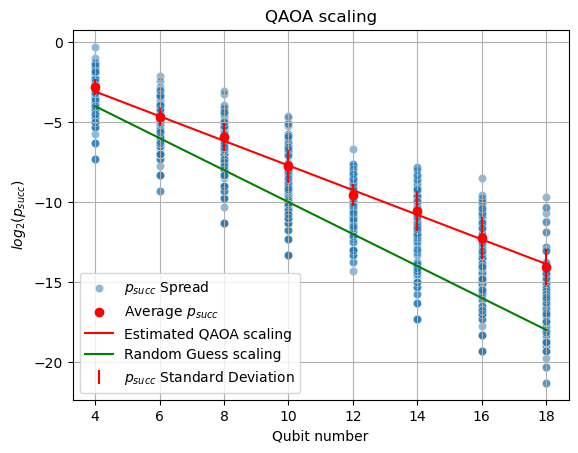

[0.77087517]
[0.00665425]


In [78]:
visualize_experiment(experiment_1_3_4_3_average, experiment_1_3_4_3_spread, 18)

## Complexity scaling (18 qubits depth 8 3x4 start) Code 1.3.4.4

In [22]:
experiment_1_3_4_4_result = [(0.13953125000000002, array([0.1    , 0.00625, 0.03125, 0.14375, 0.3875 , 0.4125 , 0.15   ,
       0.19375, 0.23125, 0.03125, 0.01875, 0.025  , 0.0125 , 0.00625,
       0.025  , 0.03125, 0.025  , 0.03125, 0.20625, 0.05   , 0.0125 ,
       0.25625, 0.09375, 0.0875 , 0.4625 , 0.1    , 0.08125, 0.23125,
       0.05   , 0.075  , 0.25625, 0.29375, 0.2875 , 0.3    , 0.1375 ,
       0.09375, 0.24375, 0.20625, 0.28125, 0.225  , 0.1875 , 0.29375,
       0.03125, 0.14375, 0.0875 , 0.2375 , 0.03125, 0.03125, 0.3875 ,
       0.05625, 0.04375, 0.0875 , 0.0625 , 0.06875, 0.1875 , 0.03125,
       0.03125, 0.04375, 0.0625 , 0.05625, 0.2    , 0.0375 , 0.04375,
       0.19375, 0.03125, 0.0125 , 0.18125, 0.125  , 0.15   , 0.3    ,
       0.03125, 0.03125, 0.2    , 0.03125, 0.01875, 0.14375, 0.01875,
       0.01875, 0.125  , 0.0125 , 0.0125 , 0.4    , 0.05   , 0.05625,
       0.1    , 0.0375 , 0.03125, 0.45   , 0.0625 , 0.03125, 0.34375,
       0.05   , 0.0375 , 0.3    , 0.24375, 0.2    , 0.2    , 0.45   ,
       0.4375 , 0.29375, 0.06875, 0.09375, 0.06875, 0.24375, 0.20625,
       0.45   , 0.03125, 0.00625, 0.36875, 0.08125, 0.06875, 0.18125,
       0.0375 , 0.06875, 0.2125 , 0.3375 , 0.36875, 0.075  , 0.0125 ,
       0.0125 ])), (0.046302083333333334, array([0.1109375, 0.0046875, 0.01875  , 0.1984375, 0.0046875, 0.0078125, 
       0.0625   , 0.0078125, 0.0109375, 0.0484375, 0.003125 , 0.003125 ,
       0.1296875, 0.0234375, 0.0078125, 0.09375  , 0.01875  , 0.028125 ,
       0.1125   , 0.021875 , 0.03125  , 0.021875 , 0.021875 , 0.04375  ,
       0.06875  , 0.0890625, 0.0015625, 0.1109375, 0.028125 , 0.0015625,
       0.0078125, 0.01875  , 0.071875 , 0.0109375, 0.0734375, 0.028125 ,
       0.0859375, 0.046875 , 0.034375 , 0.334375 , 0.1453125, 0.0125   ,
       0.0046875, 0.0046875, 0.0234375, 0.003125 , 0.0015625, 0.003125 ,
       0.065625 , 0.021875 , 0.0453125, 0.125    , 0.0171875, 0.0234375,
       0.0921875, 0.04375  , 0.0546875, 0.1875   , 0.0203125, 0.0640625,
       0.0015625, 0.015625 , 0.0109375, 0.01875  , 0.034375 , 0.0609375,
       0.025    , 0.15625  , 0.0578125, 0.1078125, 0.0171875, 0.00625  ,
       0.028125 , 0.00625  , 0.00625  , 0.0234375, 0.053125 , 0.075    ,
       0.1265625, 0.0109375, 0.0265625, 0.0890625, 0.0046875, 0.0421875,
       0.1046875, 0.0125   , 0.046875 , 0.165625 , 0.046875 , 0.015625 ,
       0.053125 , 0.009375 , 0.0375   , 0.0171875, 0.003125 , 0.0453125,
       0.0734375, 0.0125   , 0.0078125, 0.009375 , 0.0046875, 0.040625 ,
       0.1609375, 0.0296875, 0.009375 , 0.1421875, 0.0078125, 0.0078125,
       0.0734375, 0.0140625, 0.0421875, 0.009375 , 0.015625 , 0.0046875,
       0.159375 , 0.090625 , 0.003125 , 0.040625 , 0.00625  , 0.0203125])), (0.022594401041666667, array([0.00195312, 0.0109375 , 0.00976562, 0.11835938, 0.00195312,
       0.06054688, 0.06289063, 0.00234375, 0.02890625, 0.00078125,
       0.02578125, 0.00195312, 0.0015625 , 0.02070313, 0.00664063,
       0.00078125, 0.02421875, 0.00625   , 0.00078125, 0.01328125,
       0.13867188, 0.00664062, 0.01835938, 0.00976562, 0.00703125,
       0.02890625, 0.00429688, 0.00820313, 0.01757812, 0.04140625,
       0.08789062, 0.00117188, 0.01054688, 0.02109375, 0.00976562,
       0.01210937, 0.05546875, 0.01679687, 0.03046875, 0.0546875 ,
       0.04375   , 0.153125  , 0.0078125 , 0.0046875 , 0.02070313,
       0.00195312, 0.00234375, 0.00117188, 0.00351563, 0.00429688,
       0.00390625, 0.00234375, 0.01328125, 0.03945312, 0.00195312,
       0.00859375, 0.0265625 , 0.00234375, 0.0265625 , 0.01953125,
       0.00390625, 0.00976562, 0.00078125, 0.00039063, 0.00898438,
       0.00078125, 0.01523437, 0.03125   , 0.01289062, 0.00195312,
       0.03164062, 0.00078125, 0.00078125, 0.02070313, 0.02460938,
       0.00039063, 0.02929688, 0.084375  , 0.00195312, 0.01640625,
       0.00664063, 0.003125  , 0.00429687, 0.01015625, 0.00351563,
       0.04335938, 0.06015625, 0.003125  , 0.03203125, 0.11640625,
       0.00273437, 0.01171875, 0.025     , 0.0484375 , 0.02070313,
       0.01875   , 0.20078125, 0.02226562, 0.02070312, 0.00625   ,
       0.01328125, 0.00195312, 0.04375   , 0.003125  , 0.05117187,
       0.00195312, 0.00234375, 0.00351563, 0.00507813, 0.01289062,
       0.003125  , 0.00117187, 0.00742188, 0.01484375, 0.07890625,
       0.02929688, 0.08085937, 0.00195312, 0.01328125, 0.01523437])), (0.0049462890625, array([6.34765625e-03, 1.56250000e-03, 2.34375000e-03, 2.92968750e-04,
       5.55664063e-02, 1.17187500e-03, 3.51562500e-03, 8.59375000e-03,
       1.95312500e-04, 1.36718750e-03, 1.52343750e-02, 4.88281250e-04,
       4.88281250e-04, 6.15234375e-03, 9.76562500e-05, 6.83593750e-04,
       2.28515625e-02, 8.78906250e-04, 3.22265625e-03, 1.36718750e-03,
       1.26953125e-03, 1.95312500e-04, 2.59765625e-02, 2.92968750e-04,
       4.88281250e-04, 1.56250000e-02, 4.88281250e-04, 1.26953125e-03,
       1.46484375e-03, 4.88281250e-04, 6.44531250e-03, 2.66601563e-02,
       4.88281250e-04, 3.90625000e-04, 1.02539062e-02, 1.56250000e-03,
       2.92968750e-04, 5.95703125e-03, 1.95312500e-04, 1.66992188e-02,
       6.70898437e-02, 4.00390625e-03, 5.85937500e-04, 2.92968750e-03,
       1.95312500e-04, 9.76562500e-05, 1.66015625e-03, 4.88281250e-04,
       4.88281250e-04, 8.78906250e-03, 1.17187500e-03, 1.95312500e-04,
       5.27343750e-03, 4.88281250e-04, 1.36718750e-03, 3.80859375e-03,
       4.88281250e-04, 4.88281250e-04, 1.47460937e-02, 9.76562500e-05,
       3.71093750e-03, 5.76171875e-03, 7.81250000e-04, 3.61328125e-03,
       2.14843750e-03, 1.07421875e-03, 3.02734375e-03, 1.17187500e-03,
       5.85937500e-04, 4.19921875e-03, 1.80664062e-02, 1.56250000e-03,
       1.46484375e-03, 4.88281250e-04, 4.88281250e-04, 1.66015625e-03,
       3.50585938e-02, 1.56250000e-03, 4.39453125e-03, 1.75781250e-03,
       1.17187500e-03, 4.88281250e-04, 2.05078125e-03, 4.88281250e-04,
       9.76562500e-04, 1.17187500e-03, 1.46484375e-03, 1.46484375e-03,
       1.46484375e-03, 2.44140625e-03, 4.88281250e-04, 2.92968750e-04,
       1.07421875e-03, 5.85937500e-04, 9.86328125e-03, 6.83593750e-04,
       8.78906250e-03, 2.73437500e-03, 1.95312500e-04, 7.81250000e-04,
       9.37500000e-03, 8.78906250e-04, 3.90625000e-04, 2.53906250e-03,
       7.81250000e-04, 1.75781250e-03, 3.32031250e-03, 2.73437500e-03,
       1.95312500e-04, 1.61132812e-02, 3.90625000e-04, 1.56250000e-03,
       2.14843750e-03, 7.81250000e-04, 2.19726562e-02, 2.21679688e-02,
       5.27343750e-03, 4.88281250e-04, 5.56640625e-03, 4.88281250e-04])), (0.0013045247395833334, array([1.22070312e-03, 2.68554688e-03, 3.90625000e-04, 2.44140625e-04,
       1.78222656e-03, 3.90625000e-04, 1.02539063e-03, 5.73730469e-03,
       9.76562500e-05, 8.05664062e-04, 9.03320313e-04, 3.41796875e-04,
       8.30078125e-04, 8.05664063e-04, 9.52148438e-04, 9.27734375e-04,
       1.39160156e-03, 6.83593750e-04, 5.12695313e-04, 1.36718750e-03,
       4.39453125e-04, 3.66210938e-04, 1.31835938e-03, 1.51367188e-03,
       1.70898438e-03, 9.52148437e-04, 8.30078125e-04, 5.85937500e-04,
       1.68457031e-03, 2.19726563e-04, 2.41699219e-03, 1.56250000e-03,
       3.41796875e-04, 1.22070312e-04, 5.37109375e-04, 8.78906250e-04,
       8.78906250e-04, 2.00195312e-03, 4.39453125e-04, 2.04345703e-02,
       1.95312500e-04, 2.19726563e-04, 1.70898437e-04, 8.30078125e-04,
       1.95312500e-04, 1.22070312e-04, 8.54492188e-04, 2.92968750e-04,
       2.19726563e-04, 9.76562500e-04, 1.22070312e-04, 7.32421875e-05,
       1.17187500e-03, 2.44140625e-05, 1.70898437e-04, 1.34277344e-03,
       8.05664062e-04, 1.70898437e-04, 2.41699219e-03, 9.76562500e-05,
       1.66015625e-03, 7.56835938e-04, 3.66210938e-04, 8.54492188e-04,
       1.90429687e-03, 1.31835938e-03, 4.39453125e-04, 2.68554688e-04,
       1.22070312e-04, 1.46484375e-03, 5.95703125e-03, 1.48925781e-03,
       5.85937500e-04, 4.39453125e-04, 1.70898437e-04, 6.34765625e-04,
       9.27734375e-04, 6.10351562e-04, 1.31835938e-03, 4.27246094e-03,
       9.03320313e-04, 2.44140625e-04, 1.39160156e-03, 6.34765625e-04,
       1.31835938e-03, 1.09863281e-03, 3.41796875e-04, 2.75878906e-03,
       1.12304687e-03, 2.44140625e-04, 4.88281250e-04, 4.15039062e-04,
       2.44140625e-04, 3.17382813e-04, 3.46679687e-03, 1.22070312e-04,
       4.46777344e-03, 2.31933594e-03, 6.83593750e-04, 4.63867187e-04,
       8.54492187e-04, 2.44140625e-05, 9.76562500e-05, 1.41601562e-03,
       1.41601562e-03, 1.04980469e-03, 3.66210938e-03, 1.70898437e-04,
       1.46484375e-03, 1.80664062e-03, 1.17187500e-03, 1.85546875e-03,
       1.12304688e-03, 1.22070312e-04, 1.35253906e-02, 1.63574219e-03,
       4.15039062e-04, 4.15039062e-04, 2.70996094e-03, 1.95312500e-04])), (0.0010424804687500001, array([2.74658203e-04, 3.11279297e-04, 6.10351563e-06, 1.58691406e-04,
       6.95190430e-03, 8.54492187e-05, 8.78906250e-04, 1.97753906e-03,
       4.27246094e-05, 3.90625000e-04, 1.37329102e-03, 9.76562500e-05,
       5.85937500e-04, 3.58276367e-03, 1.15966797e-04, 2.50244141e-04,
       5.49316406e-04, 1.22070313e-05, 7.08007812e-04, 2.55737305e-03,
       1.15966797e-04, 3.84521484e-04, 3.66210937e-05, 7.93457031e-05,
       1.53808594e-03, 5.52368164e-03, 8.54492187e-05, 2.74658203e-04,
       4.33349609e-04, 1.89208984e-04, 1.19628906e-03, 2.18505859e-03,
       1.70898437e-04, 6.83593750e-04, 2.42309570e-03, 8.54492187e-05,
       7.32421875e-04, 1.20239258e-03, 8.54492187e-05, 1.09863281e-02,
       1.92749023e-02, 3.66210937e-05, 6.71386719e-05, 4.57763672e-04,
       1.95312500e-04, 6.10351563e-06, 6.10351563e-06, 1.22070313e-05,
       7.93457031e-05, 1.44042969e-03, 1.22070313e-05, 4.33349609e-04,
       2.19726563e-04, 6.10351562e-05, 3.35693359e-04, 9.70458984e-04,
       1.83105469e-05, 9.88769531e-04, 7.44628906e-04, 3.66210937e-05,
       8.05664062e-04, 2.30102539e-03, 4.27246094e-05, 7.87353516e-04,
       7.26318359e-04, 2.44140625e-05, 7.99560547e-04, 4.33349609e-04,
       1.15966797e-04, 1.47705078e-03, 1.73950195e-03, 2.68554688e-04,
       5.37109375e-04, 9.76562500e-05, 4.27246094e-05, 5.24902344e-04,
       1.42211914e-03, 6.71386719e-05, 5.24902344e-04, 6.22558594e-04,
       1.03759766e-04, 1.83105469e-04, 2.99072266e-04, 1.22070313e-05,
       7.75146484e-04, 4.88281250e-05, 1.22070312e-04, 1.84326172e-03,
       3.90014648e-03, 6.10351563e-06, 3.47900391e-04, 7.38525391e-04,
       4.27246094e-05, 5.61523437e-04, 4.33349609e-04, 1.15966797e-04,
       8.85009766e-04, 1.31225586e-03, 3.05175781e-05, 2.01416016e-04,
       2.01416016e-04, 2.44140625e-05, 4.57763672e-04, 1.80664063e-03,
       7.93457031e-05, 2.99072266e-04, 2.19726563e-04, 2.25830078e-04,
       1.95312500e-04, 1.14135742e-03, 1.58691406e-04, 1.10473633e-03,
       1.61743164e-03, 2.44140625e-05, 5.95092773e-03, 9.91210937e-03,
       9.70458984e-04, 1.03759766e-04, 5.31005859e-04, 3.05175781e-05])), (0.00042830149332682293, array([5.64575195e-05, 1.25122070e-04, 6.40869141e-05, 3.05175781e-06,
       4.56848145e-03, 2.59399414e-05, 1.29699707e-04, 7.49206543e-04,
       4.11987305e-05, 3.05175781e-06, 5.12695313e-04, 7.01904297e-05,
       1.22070313e-05, 1.52130127e-03, 2.13623047e-05, 7.62939453e-06,
       1.50909424e-03, 1.37329102e-04, 2.44140625e-05, 8.85009766e-05,
       5.49316406e-05, 1.83105469e-05, 1.41906738e-04, 1.67846680e-05,
       3.05175781e-05, 6.56127930e-04, 8.39233398e-05, 7.47680664e-05,
       5.27954102e-04, 3.66210937e-05, 8.85009766e-05, 1.36108398e-03,
       1.22070312e-04, 6.10351563e-06, 1.35345459e-03, 2.28881836e-05,
       6.10351563e-06, 6.40869141e-05, 4.57763672e-06, 1.21459961e-03,
       1.38397217e-02, 5.03540039e-05, 7.62939453e-06, 2.31933594e-04,
       3.20434570e-05, 7.62939453e-06, 3.05175781e-06, 3.05175781e-06,
       7.62939453e-06, 4.60815430e-04, 9.15527344e-06, 7.62939453e-06,
       6.63757324e-04, 2.13623047e-05, 1.98364258e-05, 9.15527344e-05,
       1.83105469e-05, 4.57763672e-06, 4.39453125e-04, 7.62939453e-06,
       1.06811523e-05, 5.43212891e-04, 2.89916992e-05, 1.83105469e-05,
       6.25610352e-05, 7.62939453e-06, 9.76562500e-05, 1.25122070e-04,
       9.61303711e-05, 5.49316406e-05, 1.35803223e-03, 1.40380859e-04,
       4.57763672e-06, 2.94494629e-04, 4.11987305e-05, 7.62939453e-06,
       1.08642578e-03, 3.35693359e-05, 1.37329102e-04, 2.07519531e-04,
       8.23974609e-05, 1.37329102e-05, 8.69750977e-05, 1.06811523e-05,
       6.10351562e-05, 1.17645264e-03, 4.73022461e-05, 2.59399414e-04,
       9.39941406e-04, 2.74658203e-05, 7.62939453e-06, 5.03540039e-05,
       3.50952148e-05, 7.62939453e-06, 3.15856934e-04, 1.08337402e-04,
       3.96728516e-05, 1.04980469e-03, 3.05175781e-05, 3.05175781e-06,
       2.59399414e-04, 6.10351563e-06, 2.89916992e-05, 1.02233887e-03,
       5.49316406e-05, 5.95092773e-05, 3.69262695e-04, 2.13623047e-05,
       1.37329102e-05, 7.14111328e-04, 7.62939453e-05, 1.54113770e-04,
       1.83105469e-03, 4.42504883e-05, 1.46942139e-03, 4.76837158e-03,
       1.69372559e-04, 9.15527344e-06, 9.76562500e-05, 3.35693359e-05])), (1.3443628946940105e-05, array([1.25885010e-05, 2.36511230e-05, 1.60217285e-05, 8.39233398e-06,
       2.36511230e-05, 4.57763672e-06, 3.43322754e-06, 1.06811523e-05,
       1.90734863e-06, 8.01086426e-06, 1.41143799e-05, 1.90734863e-06,
       1.90734863e-06, 1.41143799e-05, 8.39233398e-06, 2.82287598e-05,
       1.22070313e-05, 2.82287598e-05, 8.39233398e-06, 6.86645508e-06,
       1.02996826e-05, 2.32696533e-05, 7.17163086e-05, 7.01904297e-05,
       4.57763672e-06, 7.62939453e-06, 1.10626221e-05, 5.72204590e-06,
       1.44958496e-05, 4.19616699e-06, 1.14440918e-06, 2.74658203e-05,
       9.53674316e-06, 7.24792480e-06, 2.63214111e-05, 1.02996826e-05,
       3.81469727e-06, 1.25885010e-05, 4.19616699e-06, 1.10626221e-05,
       1.37329102e-05, 7.24792480e-06, 1.33514404e-05, 2.67028809e-06,
       1.52587891e-06, 1.48773193e-05, 2.28881836e-05, 2.55584717e-05,
       1.33514404e-05, 1.06811523e-05, 4.95910645e-06, 4.57763672e-06,
       5.34057617e-06, 8.39233398e-06, 1.22070313e-05, 2.13623047e-05,
       3.81469727e-07, 1.79290771e-05, 4.31060791e-05, 6.48498535e-06,
       1.14440918e-06, 4.19616699e-06, 3.05175781e-06, 6.86645508e-06,
       2.63214111e-05, 9.53674316e-06, 1.90734863e-06, 1.14440918e-05,
       9.15527344e-06, 2.02178955e-05, 1.87301636e-04, 6.33239746e-05,
       4.19616699e-06, 3.43322754e-05, 2.67028809e-06, 4.57763672e-06,
       1.22070313e-05, 1.48773193e-05, 1.94549561e-05, 7.62939453e-06,
       2.28881836e-06, 6.48498535e-06, 6.48498535e-06, 1.90734863e-05,
       6.10351563e-06, 2.36511230e-05, 4.57763672e-06, 6.10351563e-06,
       1.37329102e-05, 6.10351563e-06, 9.15527344e-06, 1.41143799e-05,
       1.14440918e-06, 4.95910645e-06, 1.25885010e-05, 2.67028809e-06,
       1.14440918e-06, 7.62939453e-06, 4.57763672e-06, 4.57763672e-06,
       1.71661377e-05, 4.95910645e-06, 1.90734863e-06, 2.13623047e-05,
       1.90734863e-06, 4.95910645e-06, 1.56402588e-05, 1.02996826e-05,
       2.28881836e-06, 1.56402588e-05, 1.79290771e-05, 9.15527344e-06,
       1.18255615e-05, 6.86645508e-06, 4.95910645e-06, 1.33514404e-05,
       2.67028809e-06, 3.05175781e-06, 6.86645508e-06, 1.41143799e-05]))]
experiment_1_3_4_4_average = [x for (x, y) in experiment_1_3_4_4_result]
experiment_1_3_4_4_spread = [y for (x, y) in experiment_1_3_4_4_result]


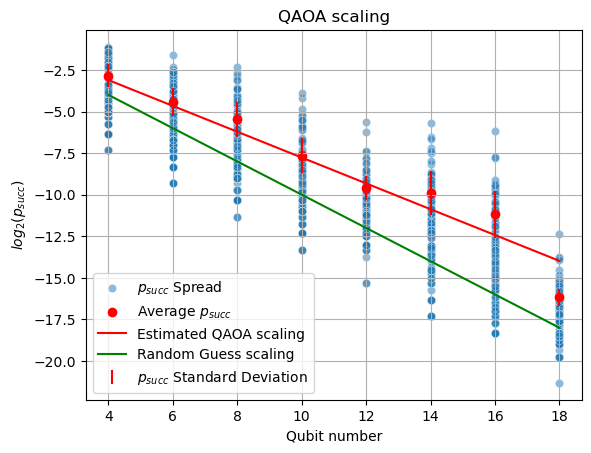

[0.77665638]
[0.03187184]


In [82]:
visualize_experiment(experiment_1_3_4_4_average, experiment_1_3_4_4_spread, 18)

### Complexity scaling (21 qubits depth 4 3x4 start) Code B

In [9]:
from numpy import array
experiment_B_result = [(0.11968750000000002, array([0.26875, 0.08125, 0.06875, 0.5125 , 0.00625, 0.03125, 0.18125,
       0.0625 , 0.075  , 0.2    , 0.04375, 0.0625 , 0.01875, 0.01875,
       0.025  , 0.05   , 0.03125, 0.075  , 0.05625, 0.0125 , 0.03125,
       0.175  , 0.325  , 0.26875, 0.125  , 0.0875 , 0.11875, 0.175  ,
       0.0125 , 0.0125 , 0.475  , 0.00625, 0.0125 , 0.01875, 0.14375,
       0.1125 , 0.04375, 0.10625, 0.04375, 0.06875, 0.11875, 0.09375,
       0.11875, 0.30625, 0.34375, 0.20625, 0.05625, 0.0625 , 0.54375,
       0.14375, 0.13125, 0.0875 , 0.075  , 0.0875 , 0.1875 , 0.03125,
       0.00625, 0.11875, 0.10625, 0.1125 ])), (0.03924479166666667, array([0.0421875, 0.0546875, 0.0125   , 0.046875 , 0.0015625, 0.009375 ,       0.1984375, 0.015625 , 0.0078125, 0.053125 , 0.021875 , 0.00625  ,
       0.046875 , 0.0234375, 0.0328125, 0.1      , 0.040625 , 0.03125  ,
       0.028125 , 0.0078125, 0.009375 , 0.00625  , 0.00625  , 0.053125 ,
       0.140625 , 0.01875  , 0.028125 , 0.0015625, 0.0140625, 0.0078125,
       0.2640625, 0.0140625, 0.00625  , 0.121875 , 0.0015625, 0.0078125,
       0.0390625, 0.0203125, 0.01875  , 0.1640625, 0.03125  , 0.0140625,
       0.0484375, 0.025    , 0.0078125, 0.05625  , 0.0296875, 0.0203125,
       0.0171875, 0.08125  , 0.028125 , 0.0484375, 0.025    , 0.04375  ,
       0.0015625, 0.0109375, 0.0078125, 0.0828125, 0.0375   , 0.0125   ])), (0.020130208333333333, array([0.00859375, 0.0265625 , 0.025     
, 0.00078125, 0.00976562,
       0.03398437, 0.003125  , 0.00625   , 0.00507813, 0.00429688,
       0.0109375 , 0.0515625 , 0.00039063, 0.0046875 , 0.034375  ,
       0.00507813, 0.00820313, 0.06835938, 0.00195312, 0.00664062,
       0.04179687, 0.08867187, 0.00195312, 0.00078125, 0.00625   ,
       0.00742187, 0.09335937, 0.00195312, 0.01640625, 0.00898437,
       0.00195312, 0.02070312, 0.0234375 , 0.01015625, 0.0078125 ,
       0.02460937, 0.01210938, 0.0140625 , 0.01679688, 0.01210938,
       0.00664062, 0.03789062, 0.12773438, 0.02734375, 0.01328125,
       0.00195312, 0.01523437, 0.00429688, 0.015625  , 0.0515625 ,
       0.065625  , 0.00703125, 0.0140625 , 0.00507813, 0.00078125,
       0.0046875 , 0.0078125 , 0.01054688, 0.03984375, 0.02382813])), (0.005887044270833333, array([1.26953125e-03, 1.50390625e-02, 1.95312500e-04, 9.76562500e-05,
       2.46093750e-02, 4.88281250e-04, 2.92968750e-04, 1.54296875e-02,
       9.76562500e-05, 2.14843750e-03, 1.22070312e-02, 4.88281250e-04,
       9.76562500e-05, 5.17578125e-03, 4.88281250e-04, 2.63671875e-03,
       4.68750000e-03, 3.51562500e-03, 9.76562500e-04, 1.95312500e-03,
       1.26953125e-03, 1.07421875e-03, 9.76562500e-05, 4.88281250e-04,
       4.88281250e-04, 7.53906250e-02, 2.92968750e-04, 5.66406250e-03,
       1.25000000e-02, 4.88281250e-04, 2.92968750e-04, 2.12890625e-02,
       4.88281250e-04, 4.88281250e-04, 3.69140625e-02, 2.73437500e-03,
       4.88281250e-04, 6.54296875e-03, 1.26953125e-03, 5.76171875e-03,
       9.76562500e-03, 1.66015625e-03, 1.95312500e-04, 4.88281250e-04,
       1.36718750e-03, 4.88281250e-04, 7.81250000e-04, 1.26953125e-03,
       9.76562500e-05, 1.98242188e-02, 5.85937500e-04, 6.83593750e-04,
       1.81640625e-02, 4.88281250e-04, 4.88281250e-04, 1.56250000e-03,
       9.76562500e-05, 4.29687500e-03, 2.46093750e-02, 3.90625000e-04])), (0.0008931477864583334, array([1.46484375e-03, 3.17382812e-03, 4.58984375e-03, 9.76562500e-05,
       3.17382813e-04, 6.10351562e-04, 6.34765625e-04, 1.19628906e-03,
       4.39453125e-04, 1.61132812e-03, 2.19726563e-04, 2.46582031e-03,
       1.95312500e-04, 5.12695313e-04, 1.70898437e-04, 9.27734375e-04,
       1.97753906e-03, 2.92968750e-04, 6.59179688e-04, 1.39160156e-03,
       4.88281250e-05, 1.95312500e-04, 2.44140625e-04, 3.39355469e-03,
       4.88281250e-04, 6.59179688e-04, 2.44140625e-05, 4.15039063e-04,
       3.90625000e-04, 9.76562500e-05, 1.19628906e-03, 7.56835938e-04,
       2.92968750e-04, 7.56835938e-04, 2.68554688e-04, 8.78906250e-04,
       2.44140625e-04, 3.17382813e-04, 6.83593750e-04, 2.75878906e-03,
       1.36718750e-03, 3.17382812e-04, 1.12304687e-03, 9.27734375e-04,
       9.52148437e-04, 1.22070312e-04, 2.19726563e-04, 4.88281250e-05,
       2.53906250e-03, 5.85937500e-04, 3.17382813e-04, 1.22070312e-04,
       1.73339844e-03, 6.34765625e-04, 4.88281250e-05, 7.32421875e-05,
       1.22070312e-04, 2.70996094e-03, 2.49023437e-03, 7.32421875e-05])), (0.00068511962890625, array([1.10473633e-03, 1.18408203e-03, 1.83105469e-04, 1.58691406e-04,
       6.34765625e-04, 3.05175781e-05, 1.70898438e-04, 1.83105469e-05,
       1.22070313e-05, 7.08007813e-04, 2.23999023e-03, 3.66210937e-05,
       1.89208984e-04, 1.89208984e-04, 3.05175781e-05, 3.96728516e-04,
       1.02539062e-03, 3.05175781e-05, 5.31005859e-04, 1.28173828e-04,
       3.66210937e-05, 2.44140625e-05, 3.05175781e-05, 7.32421875e-05,
       6.40869141e-04, 5.30395508e-03, 4.63867187e-04, 6.46972656e-04,
       3.23486328e-04, 4.88281250e-05, 5.92041016e-04, 1.64794922e-03,
       3.29589844e-04, 5.18798828e-04, 7.11059570e-03, 4.88281250e-05,
       1.09863281e-04, 5.12695313e-04, 1.40380859e-04, 1.19628906e-03,
       2.75878906e-03, 2.01416016e-04, 3.41796875e-04, 9.09423828e-04,
       3.23486328e-04, 3.05175781e-05, 3.05175781e-05, 1.28173828e-04,
       2.35595703e-03, 1.45263672e-03, 2.62451172e-04, 1.52587891e-04,
       4.33349609e-04, 1.15966797e-04, 2.44140625e-05, 3.05175781e-05,
       1.83105469e-05, 1.77001953e-03, 9.52148437e-04, 1.22070313e-05])), (0.0003639729817708333, array([3.20434570e-05, 6.80541992e-04, 1.52587891e-04, 7.62939453e-06,
       6.91223145e-04, 1.52587891e-06, 1.52587891e-06, 6.54602051e-04,
       2.28881836e-05, 8.85009766e-05, 8.75854492e-04, 1.37329102e-05,
       1.52587891e-05, 6.11877441e-04, 1.67846680e-05, 3.50952148e-05,
       5.90515137e-04, 9.15527344e-06, 6.10351563e-06, 1.38092041e-03,
       1.06811523e-05, 9.15527344e-06, 1.52587891e-06, 1.22070312e-04,
       9.15527344e-06, 5.60913086e-03, 3.05175781e-06, 3.96728516e-05,
       1.67846680e-05, 3.50952148e-05, 7.62939453e-06, 1.04827881e-03,
       4.73022461e-05, 1.37329102e-05, 1.92871094e-03, 2.28881836e-05,
       7.62939453e-06, 1.34277344e-04, 3.05175781e-06, 3.17382813e-04,
       1.75476074e-03, 3.96728516e-05, 2.89916992e-05, 9.03320312e-04,
       4.57763672e-05, 7.62939453e-06, 4.57763672e-06, 3.05175781e-06,
       4.57763672e-05, 1.84783936e-03, 7.62939453e-06, 3.81469727e-05,
       4.77600098e-04, 1.06811523e-05, 7.62939453e-06, 2.59399414e-05,
       1.52587891e-06, 2.24304199e-04, 9.84191895e-04, 1.03759766e-04])), (5.953470865885416e-05, array([7.05718994e-05, 8.62121582e-05, 1.29699707e-05, 7.24792480e-06,
       1.67846680e-05, 5.34057617e-06, 7.62939453e-07, 1.86920166e-05,
       1.52587891e-06, 1.94549561e-04, 2.70080566e-04, 2.79617310e-04,
       3.81469727e-07, 1.98364258e-05, 3.43322754e-06, 1.48773193e-05,
       1.56402588e-05, 5.34057617e-06, 5.34057617e-06, 7.24792480e-06,
       9.53674316e-06, 4.85229492e-04, 2.14004517e-04, 5.38635254e-04,
       5.34057617e-06, 1.33514404e-05, 3.05175781e-06, 1.18255615e-05,
       1.52587891e-05, 1.83105469e-05, 5.34057617e-06, 8.39233398e-06,
       3.81469727e-06, 3.39508057e-05, 2.70843506e-05, 1.60217285e-05,
       2.05993652e-05, 6.62612915e-04, 1.67846680e-05, 4.95910645e-06,
       1.14440918e-05, 8.77380371e-06, 1.33514404e-05, 2.36511230e-05,
       1.64031982e-05, 2.28881836e-06, 2.28881836e-05, 8.39233398e-06,
       8.23974609e-05, 9.88006592e-05, 4.42504883e-05, 2.28881836e-06,
       9.53674316e-06, 4.57763672e-06, 7.24792480e-06, 2.25067139e-05,
       1.06811523e-05, 1.14440918e-06, 1.02996826e-05, 2.05993652e-05])), (1.5306472778320313e-05, array([5.24520874e-07, 4.21524048e-05, 1.64985657e-05, 2.38418579e-07,
       2.09808350e-06, 1.95503235e-06, 6.67572021e-07, 9.05990601e-07,
       5.72204590e-07, 1.81198120e-06, 8.04901123e-05, 6.89029694e-05,
       9.53674316e-08, 4.43458557e-06, 9.53674316e-08, 7.62939453e-07,
       3.43322754e-06, 4.29153442e-07, 2.38418579e-07, 1.81198120e-06,
       1.28746033e-06, 2.82764435e-05, 3.07273865e-04, 1.01137161e-04,
       2.38418579e-07, 1.04904175e-06, 2.28881836e-06, 9.53674316e-07,
       1.28746033e-06, 1.04904175e-06, 1.04904175e-06, 3.57627869e-06,
       1.19209290e-06, 3.38554382e-06, 4.62532043e-06, 2.14576721e-06,
       4.29153442e-07, 1.55448914e-04, 5.48362732e-06, 5.24520874e-07,
       4.05311584e-06, 6.67572021e-07, 5.24520874e-07, 2.28881836e-06,
       1.38282776e-06, 2.38418579e-07, 1.76429749e-06, 1.14440918e-06,
       5.24520874e-07, 3.92913818e-05, 4.10079956e-06, 1.90734863e-07,
       2.47955322e-06, 7.62939453e-07, 5.24520874e-07, 3.19480896e-06,
       1.38282776e-06, 4.76837158e-08, 1.85966492e-06, 1.14440918e-06]))]
experiment_B_average = [x for (x, y) in experiment_B_result]
experiment_B_spread = [y for (x, y) in experiment_B_result]

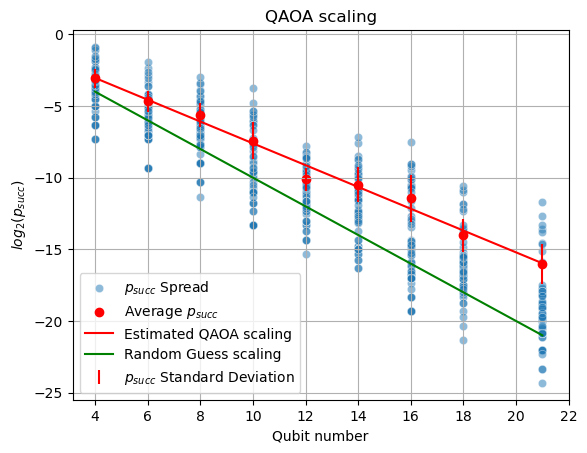

[0.76060609]
[0.01243766]


In [10]:
visualize_experiment(experiment_B_average, experiment_B_spread, 21)

# Creating scaling graphs

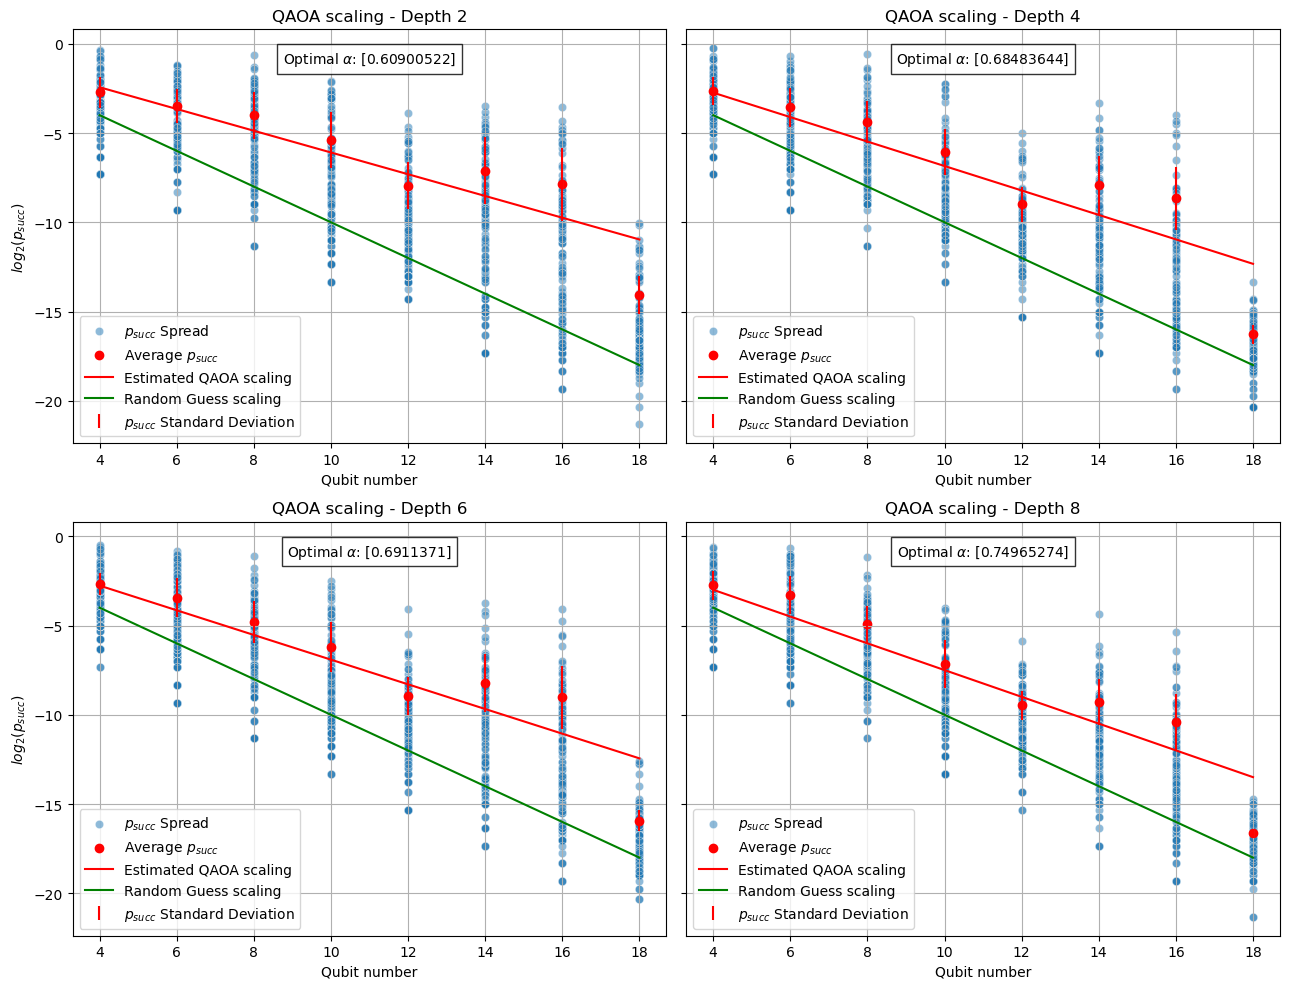

[0.74965274]
[0.04600733]


In [15]:
# Scaling on 2x3 start:
averages_list = [experiment_1_4_average, experiment_1_1_3_average, experiment_1_3_2_average, experiment_1_5_2_average]
spreads_list = [experiment_1_4_spread, experiment_1_1_3_spread, experiment_1_3_2_spread, experiment_1_5_2_spread]

import numpy as np
from numpy import array
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Don't forget to import pandas

# Visualize curves script:
def visualize_experiment_2(averages_list, spread_list, max_qubits_num, min_qubits_num=4):
    def exponential_growth(x, alpha):
        return (-alpha*x)

    qubit_nums = [4, 6, 8, 10, 12, 14, 16, 18, 21]
    depths = [2, 4, 6, 8]

    fig, axs = plt.subplots(2, 2, figsize=(13, 10), sharey=True)  # Create a 1x5 grid of subplots

    for i in range(2):
        for j in range(2):
            idx = i * 2 + j
            if idx >= len(averages_list):
                break
            
            averages = averages_list[idx]
            spread = spread_list[idx]

            x_data = [x for x in qubit_nums if (x >= min_qubits_num and x <= max_qubits_num)]  # np.arange(min_qubits_num, max_qubits_num+2, step=2)
            y_data = np.log2(averages)

            tidy_data = pd.DataFrame({
                'Point': np.repeat(x_data, len(spread[0])),
                'Value': np.concatenate(np.log2(spread))
            })

            sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.5, ax=axs[i, j], label="$p_{succ}$ Spread")

            # Plot the sample data
            axs[i, j].scatter(x_data, y_data, label='Average $p_{succ}$', color='red')

            # Perform the curve fitting
            popt, pcov = curve_fit(exponential_growth, x_data, y_data, p0=[0])

            alpha_opt = popt

            param_errors = np.sqrt(np.diag(pcov))

            y_means = np.log2(np.average((spread), axis=1))
            y_errors = np.log2(np.std(np.log2(spread), axis=1))
            axs[i, j].errorbar(x_data, y_means, yerr=y_errors, color="red", linestyle="", label='$p_{succ}$ Standard Deviation')

            # Generate the fitted curve using the optimized parameters
            y_fit = exponential_growth(x_data, alpha_opt)

            # Plot the fitted curve
            axs[i, j].plot(x_data, y_fit, color='red', label='Estimated QAOA scaling')
            axs[i, j].plot(x_data, [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')

            axs[i, j].set_xlabel('Qubit number')
            axs[i, j].set_xticks(np.arange(min_qubits_num, max_qubits_num+2, 2))
            axs[i, j].set_ylabel('$log_2(p_{succ})$')
            axs[i, j].set_title(f'QAOA scaling - Depth {depths[idx]}')
            axs[i, j].legend(loc="lower left")
            
            # Display the optimized alpha value as text
            axs[i, j].text(0.5, 0.95, f'Optimal $\\alpha$: {alpha_opt}', transform=axs[i, j].transAxes,
               fontsize=10, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))
            axs[i, j].grid(True)


    plt.tight_layout()
    plt.savefig('18-scaling-2x3.pdf')
    plt.show()
    print(alpha_opt)
    print(param_errors)
    
# averages_list = [experiment_1_1_average, experiment_1_3_average, experiment_1_5_average, experiment_1_6_average, experiment_1_8_average]
# spreads_list = [experiment_1_1_spread, experiment_1_3_spread, experiment_1_5_spread, experiment_1_6_spread, experiment_1_8_spread]

visualize_experiment_2(averages_list=averages_list, spread_list=spreads_list, max_qubits_num=18)

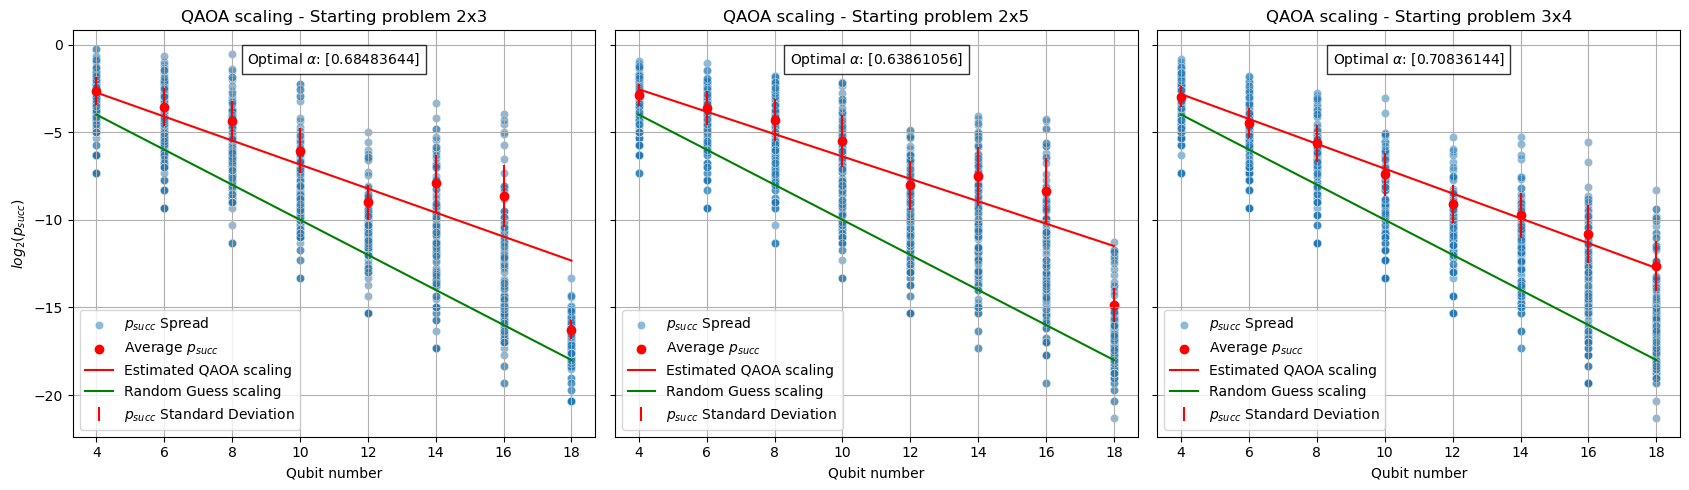

[0.70836144]
[0.01039027]


In [23]:
# Visualizing the difference between starting circuits:
averages_list = [experiment_1_1_3_average, experiment_1_2_average, experiment_1_3_4_average]
spreads_list = [experiment_1_1_3_spread, experiment_1_2_spread, experiment_1_3_4_spread]

def visualize_experiment_3(averages_list, spread_list, max_qubits_num, min_qubits_num=4):
    def exponential_growth(x, alpha):
        return (-alpha*x)

    qubit_nums = [4, 6, 8, 10, 12, 14, 16, 18, 21]
    depths = ["2x3", "2x5", "3x4"]

    fig, axs = plt.subplots(1, 3, figsize=(17, 5), sharey=True)  # Create a 1x5 grid of subplots

    for i in range(3):
            idx = i
            if idx >= len(averages_list):
                break
            
            averages = averages_list[idx]
            spread = spread_list[idx]

            x_data = [x for x in qubit_nums if (x >= min_qubits_num and x <= max_qubits_num)]  # np.arange(min_qubits_num, max_qubits_num+2, step=2)
            y_data = np.log2(averages)

            tidy_data = pd.DataFrame({
                'Point': np.repeat(x_data, len(spread[0])),
                'Value': np.concatenate(np.log2(spread))
            })

            sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.5, ax=axs[i], label="$p_{succ}$ Spread")

            # Plot the sample data
            axs[i].scatter(x_data, y_data, label='Average $p_{succ}$', color='red')

            # Perform the curve fitting
            popt, pcov = curve_fit(exponential_growth, x_data, y_data, p0=[0])

            alpha_opt = popt

            param_errors = np.sqrt(np.diag(pcov))

            y_means = np.log2(np.average((spread), axis=1))
            y_errors = np.log2(np.std(np.log2(spread), axis=1))
            axs[i].errorbar(x_data, y_means, yerr=y_errors, color="red", linestyle="", label='$p_{succ}$ Standard Deviation')

            # Generate the fitted curve using the optimized parameters
            y_fit = exponential_growth(x_data, alpha_opt)

            # Plot the fitted curve
            axs[i].plot(x_data, y_fit, color='red', label='Estimated QAOA scaling')
            axs[i].plot(x_data, [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')

            axs[i].set_xlabel('Qubit number')
            axs[i].set_xticks(np.arange(min_qubits_num, max_qubits_num+2, 2))
            axs[i].set_ylabel('$log_2(p_{succ})$')
            axs[i].set_title(f'QAOA scaling - Starting problem {depths[idx]}')
            axs[i].legend(loc="lower left")
            
            # Display the optimized alpha value as text
            axs[i].text(0.5, 0.95, f'Optimal $\\alpha$: {alpha_opt}', transform=axs[i].transAxes,
               fontsize=10, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))
            axs[i].grid(True)


    plt.tight_layout()
    plt.savefig('18-scaling-3-starts.pdf')
    plt.show()
    print(alpha_opt)
    print(param_errors)
    
visualize_experiment_3(averages_list=averages_list, spread_list=spreads_list, max_qubits_num=18)

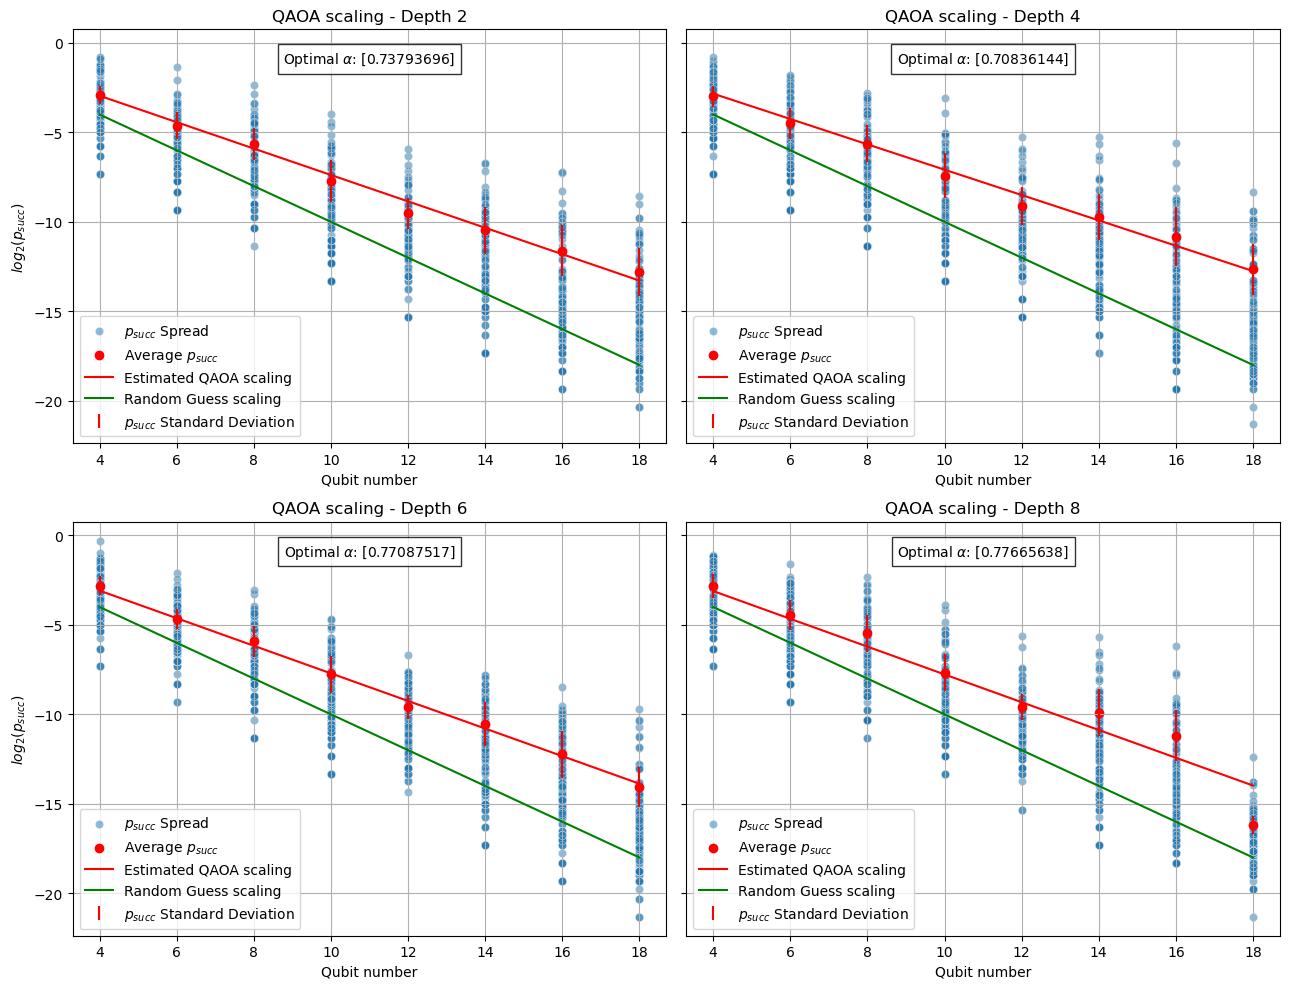

[0.77665638]
[0.03187184]


In [26]:
# scaling 3x4 start:
averages_list = [experiment_1_3_4_2_average, experiment_1_3_4_average, experiment_1_3_4_3_average, experiment_1_3_4_4_average]
spreads_list = [experiment_1_3_4_2_spread, experiment_1_3_4_spread, experiment_1_3_4_3_spread, experiment_1_3_4_4_spread]

import numpy as np
from numpy import array
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Don't forget to import pandas

# Visualize curves script:
def visualize_experiment_2(averages_list, spread_list, max_qubits_num, min_qubits_num=4):
    def exponential_growth(x, alpha):
        return (-alpha*x)

    qubit_nums = [4, 6, 8, 10, 12, 14, 16, 18, 21]
    depths = [2, 4, 6, 8]

    fig, axs = plt.subplots(2, 2, figsize=(13, 10), sharey=True)  # Create a 1x5 grid of subplots

    for i in range(2):
        for j in range(2):
            idx = i * 2 + j
            if idx >= len(averages_list):
                break
            
            averages = averages_list[idx]
            spread = spread_list[idx]

            x_data = [x for x in qubit_nums if (x >= min_qubits_num and x <= max_qubits_num)]  # np.arange(min_qubits_num, max_qubits_num+2, step=2)
            y_data = np.log2(averages)

            tidy_data = pd.DataFrame({
                'Point': np.repeat(x_data, len(spread[0])),
                'Value': np.concatenate(np.log2(spread))
            })

            sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.5, ax=axs[i, j], label="$p_{succ}$ Spread")

            # Plot the sample data
            axs[i, j].scatter(x_data, y_data, label='Average $p_{succ}$', color='red')

            # Perform the curve fitting
            popt, pcov = curve_fit(exponential_growth, x_data, y_data, p0=[0])

            alpha_opt = popt

            param_errors = np.sqrt(np.diag(pcov))

            y_means = np.log2(np.average((spread), axis=1))
            y_errors = np.log2(np.std(np.log2(spread), axis=1))
            axs[i, j].errorbar(x_data, y_means, yerr=y_errors, color="red", linestyle="", label='$p_{succ}$ Standard Deviation')

            # Generate the fitted curve using the optimized parameters
            y_fit = exponential_growth(x_data, alpha_opt)

            # Plot the fitted curve
            axs[i, j].plot(x_data, y_fit, color='red', label='Estimated QAOA scaling')
            axs[i, j].plot(x_data, [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')

            axs[i, j].set_xlabel('Qubit number')
            axs[i, j].set_xticks(np.arange(min_qubits_num, max_qubits_num+2, 2))
            axs[i, j].set_ylabel('$log_2(p_{succ})$')
            axs[i, j].set_title(f'QAOA scaling - Depth {depths[idx]}')
            axs[i, j].legend(loc="lower left")
            
            # Display the optimized alpha value as text
            axs[i, j].text(0.5, 0.95, f'Optimal $\\alpha$: {alpha_opt}', transform=axs[i, j].transAxes,
               fontsize=10, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))
            axs[i, j].grid(True)


    plt.tight_layout()
    plt.savefig('18-scaling-3x4.pdf')
    plt.show()
    print(alpha_opt)
    print(param_errors)
    
# averages_list = [experiment_1_1_average, experiment_1_3_average, experiment_1_5_average, experiment_1_6_average, experiment_1_8_average]
# spreads_list = [experiment_1_1_spread, experiment_1_3_spread, experiment_1_5_spread, experiment_1_6_spread, experiment_1_8_spread]

visualize_experiment_2(averages_list=averages_list, spread_list=spreads_list, max_qubits_num=18)

# VQE experiments

### Eighteen qubits Code: 2.1

Introduction:

Name: 18 qubits run

What: attempt to solve an 18 qubit problem (20 times!)

Why: the aim is to find how much resources the cluster requires to solve a problem size 18 qubits

Conclusion:
Worked at <3 hours! 4GPU's at 20G ram.
Average overlap 0.4! Very good actually!

Running parameters: 4h, 4GPU

Bash script name: test-bash.sh

Python script name: VQA-experiments-for-cluster-18-qubits.py

Hours: 4h

GPU's: 4

job ID: 39579380

In [1]:
experiment_2_1_result = [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
# Can maybe visualize this on 20 graphs?

In [2]:
print(len(experiment_2_1_result))

20


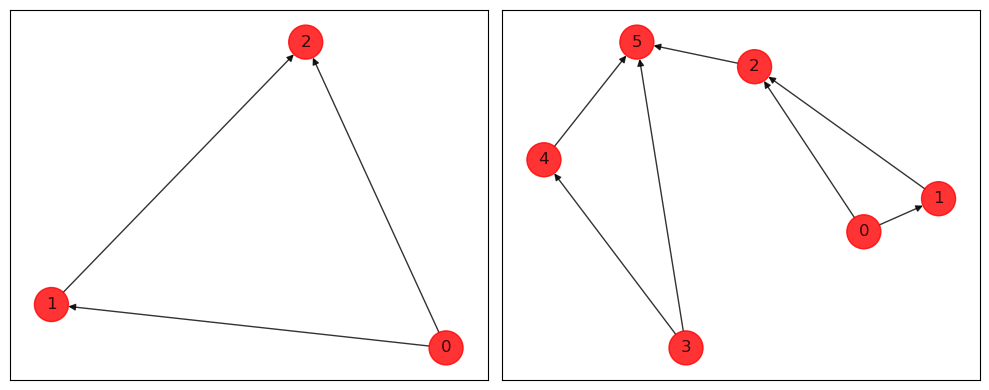

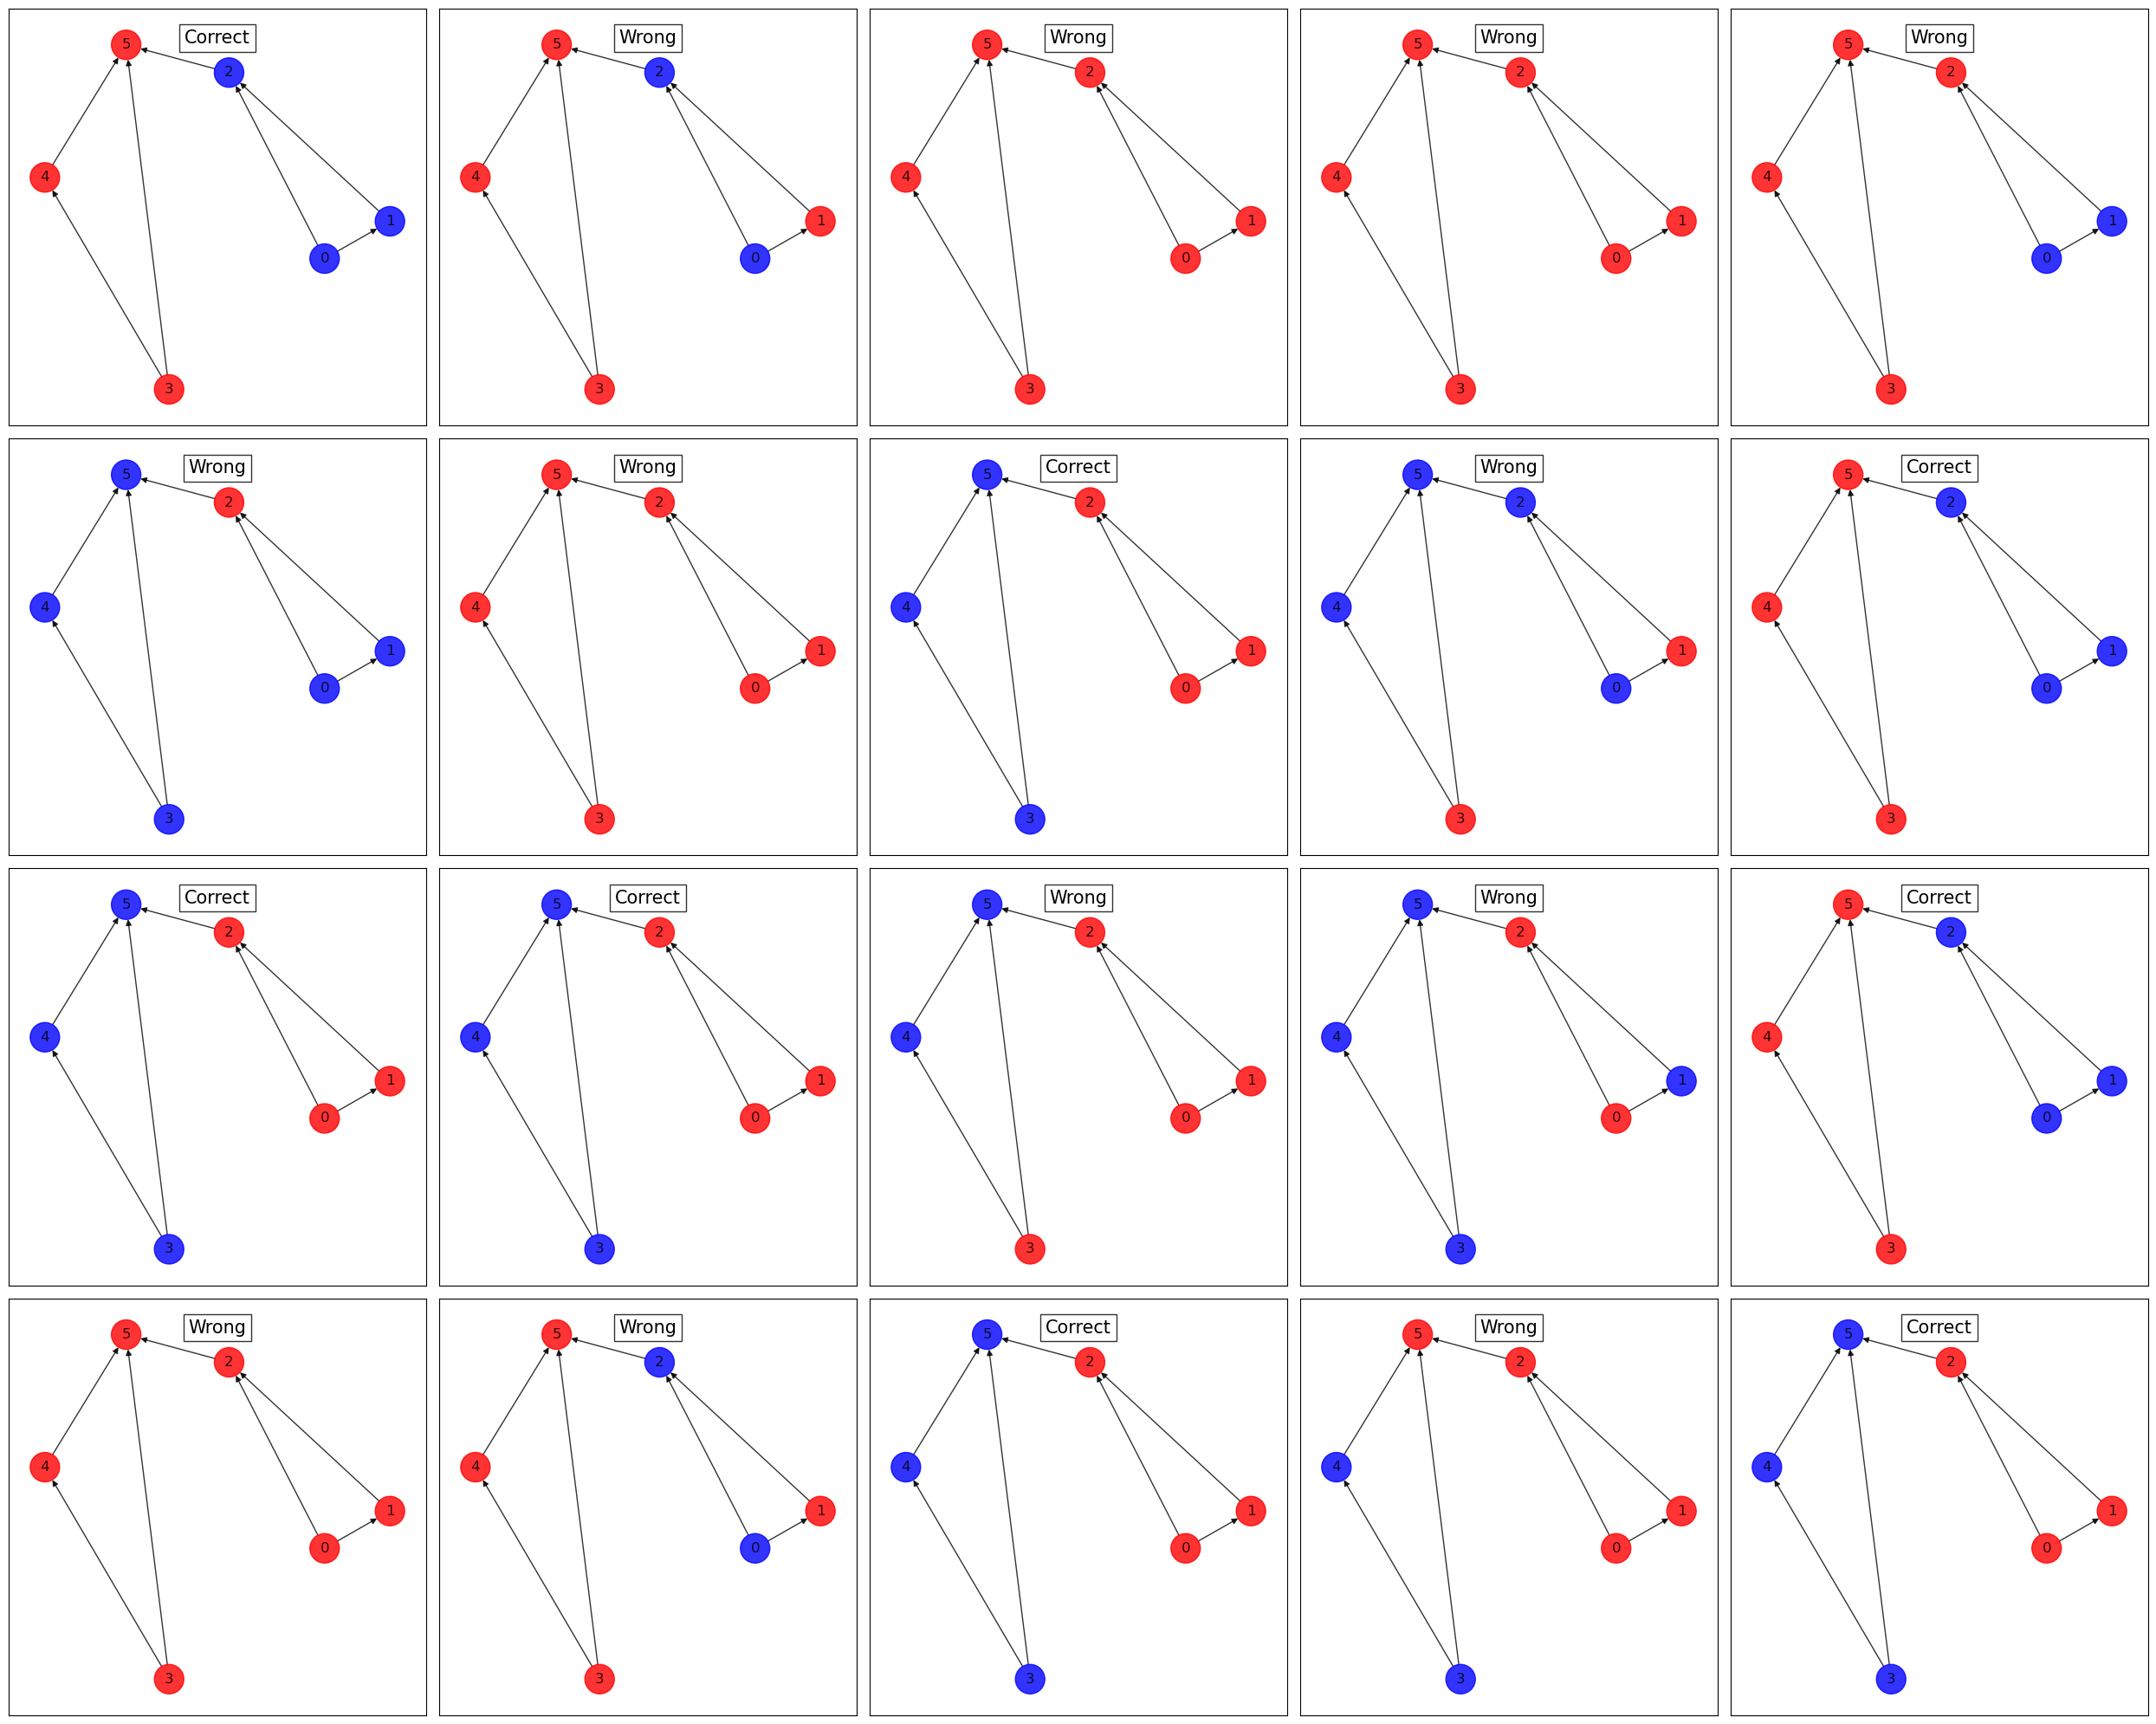

In [5]:
import numpy as np
import networkx as nx
from collections import Counter

from VQALib import CubicProgram, IsingHamiltonian

def draw_graph(G, colors, pos, ax=None):
    default_axes = plt.axes(frameon=True) if ax is None else ax
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

def compute_matrix(n, G):
    # Computing the weight matrix from the random graph
    w = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            temp = G.get_edge_data(i, j, default=0)
            if temp != 0:
                w[i, j] = 1
    return w

def color_graph(bitstring, n, m, H, posH, ax=None):
    #print(bitstring)
    colors = ["r" for node in range(m)]
    for k in range(n*m):
        i = k // m  # Integer division to retrieve the i value
        j = k % m   # Modulus operation to retrieve the j value
        if bitstring[k] == 1:
            #print(f"coloring {j}!")
            colors[j] = "b"
    draw_graph(H, colors, posH, ax)

def create_graph(n, elistG, m, elistH):
    # Target graph:
    H = nx.DiGraph()
    H.add_nodes_from(np.arange(0, m, 1))
    H.add_edges_from(elistH)
    colorsH = ["r" for node in H.nodes()]
    posH = nx.spring_layout(H)

    # Pattern graph:
    G = nx.DiGraph()
    G.add_nodes_from(np.arange(0, n, 1))
    G.add_edges_from(elistG)
    colorsG = ["r" for node in G.nodes()]
    posG = nx.spring_layout(H)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    draw_graph(G, colorsG, posG, axes[0])
    draw_graph(H, colorsH, posH, axes[1])
    plt.tight_layout()
    plt.show()

    return G, colorsG, posG, H, colorsH, posH

# ------------ ARITHMETIC FUNCTIONS ------
def expand_arithmetic_function(mat1, mat2, n, m):
    linear = []
    quadratic = []
    cubic = []

    penalty = n

    def translate(i, j):
        return (i*m+j)

    # FIRST TERM:
    sum = 0
    for i in range(n):
        for u in range(m):
            linear.append((translate(i, u), -1))

    # SECOND TERM (EXPANDED):
    sum2 = 0
    for v in range(m):
        inner = 0
        for i in range(n):
            for k in range(n):
                quadratic.append( ( (translate(i, v), translate(k, v) ), 1) )   # ( (var1, var2),  coeff )
        
        for i in range(n):
            linear.append((translate(i, v), -1))
    

    sum2 = 0
    # THIRD TERM (CHECKS THAT NUMBER OF OUTGOING EDGES OF EACH VERTEX U IS EQUAL TO OUTGOING EDGES OF EACH VERTEX I):
    for u in range(m):
        for i in range(n):
            for j in range(n):
                # Add the linear terms:
                linear.append((translate(i, u), penalty*mat1[i][j]*mat1[i][j]))

                for v in range(m):
                    # Add quadratic terms:
                    quadratic.append( ( (translate(j,v), translate(i, u) ), -1*2*penalty*mat1[i][j]*mat2[u][v]) )
                
                for v in range(m):
                    for k in range(m):
                        # Add cubic terms:
                        cubic.append( ( ( translate(j,v), translate(j, k), translate(i,u) ), penalty*mat2[u][v]*mat2[u][k] ) )
            

    # FOURTH TERM (CHECKS THAT NUMBER OF INCOMING EDGES OF EACH VERTEX U IS EQUAL TO OUTGOING EDGES OF EACH VERTEX I):
    for u in range(m):
        for i in range(n):
            for j in range(n):
                # Add the linear terms:
                linear.append((translate(i, u), penalty*mat1[j][i]*mat1[j][i]))

                for v in range(m):
                    # Add quadratic terms:
                    quadratic.append( ( (translate(j,v), translate(i, u) ), -1*2*penalty*mat1[j][i]*mat2[v][u]) )
                
                for v in range(m):
                    for k in range(m):
                        # Add cubic terms:
                        cubic.append( ( ( translate(j,v), translate(j, k), translate(i,u) ), penalty*mat2[v][u]*mat2[k][u] ) )
    
    return linear, quadratic, cubic

def clean_coefficients(linear, quadratic, cubic):
    """Removes all the terms with coefficient 0 from the function.

    Args:
        linear (_type_): linear terms
        quadratic (_type_): quadratic_terms
        cubic (_type_): cubic terms
    """    
    def drop(list):
        to_remove = []
        for idx, (term, coeff) in enumerate(list):
            if coeff == 0:
                to_remove.append((term, coeff))
        
        for item in to_remove:
            list.remove(item)
        return list
    
    linear = drop(linear)
    quadratic = drop(quadratic)
    cubic = drop(cubic)
    
    return linear, quadratic, cubic

def collect_terms(linear, quadratic, cubic):
    """Sums all identical terms together to reduce function to strictly unique terms with real coefficient.
    """    
    def combine(tuple_list):
        combined_tuples = {}
        
        for tpl, coeff in tuple_list:
            # Convert the tuple to a hashable format using sorted tuple of its Counter elements
            if isinstance(tpl, int):
                tpl = (tpl,)
            hashable_tpl = tuple(sorted(Counter(tpl).items()))
            # Check if the hashable tuple already exists in the dictionary
            if hashable_tpl in combined_tuples:
                # Accumulate the coefficient for the existing tuple
                combined_tuples[hashable_tpl] += coeff
            else:
                # Create a new entry in the dictionary
                combined_tuples[hashable_tpl] = coeff
        
        # Convert the dictionary back to the original format of list of tuples
        reduced_list = [( tuple(x for x, count in dict_key for _ in range(count)) , coeff) for dict_key, coeff in combined_tuples.items()]
        
        return reduced_list

    
    collected_linear_terms = combine(linear)
    collected_quadratic_terms = combine(quadratic)
    collected_cubic_terms = combine(cubic)

    return collected_linear_terms, collected_quadratic_terms, collected_cubic_terms

def produce_terms_from_graphs(mat1, mat2, n, m):
    linear, quadratic, cubic = expand_arithmetic_function(mat1, mat2, n, m)
    linear, quadratic, cubic = clean_coefficients(linear, quadratic, cubic)
    linear, quadratic, cubic = collect_terms(linear, quadratic, cubic)
    #print(f"Size: {len(linear)}, linear terms: {linear}")
    #print(f"Size: {len(quadratic)}, quadratic terms: {quadratic}")
    #print(f"Size: {len(cubic)}, cubic terms: {cubic}")
    return linear, quadratic, cubic

def produce_cubic_problem_from_graph(n, elistG, m, elistH):
    G, colorsG, posG, H, colorsH, posH = create_graph(n, elistG, m, elistH)
    linear, quadratic, cubic = produce_terms_from_graphs(compute_matrix(n, G), compute_matrix(m, H), n, m)
    cubic_instance = CubicProgram(linear, quadratic, cubic, n*m)
    return cubic_instance, n, m, H, posH

# Create subplots based on the number of graphs
num_graphs = len(experiment_2_1_result)
num_rows = 4  # You can adjust the layout based on your preference
num_cols = 5

n = 3
m = 6
elistG = [(0, 1), (0, 2), (1, 2)]
elistH = [(0, 1), (1, 2), (0, 2), (2, 5), (3, 5), (3, 4), (4, 5)]
cubic_instance, n, m, H, posH = produce_cubic_problem_from_graph(n, elistG, m, elistH)

correct = [1, 8, 10, 11, 12, 15, 18, 20]

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
# Flatten the axes array if necessary
axes = axes.flatten()
for i, likeliest_bitstring in enumerate(experiment_2_1_result):
    # Determine the subplot for the current graph
    if num_graphs > 1:
        ax = axes[i]
    else:
        ax = axes
    
    color_graph(likeliest_bitstring[::-1], n, m, H, posH, ax)
    if i+1 in correct:
        ax.text(0.5, 0.95, f'Correct', transform=ax.transAxes,
                fontsize=15, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))
    else:
        ax.text(0.5, 0.95, f'Wrong', transform=ax.transAxes,
                fontsize=15, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

# Display the subplots
plt.show()

### Twenty-one qubits VQE Code: 2.2

Introduction:

Name: 21 qubits run

What: attempt to solve an 21 qubit problem (20 times!)

Why: the aim is to find how much resources the cluster requires to solve a problem size 21 qubits

Conclusion:


Running parameters: 12h, 4GPU

Bash script name: twentyone-vqe.sh

Python script name: VQA-experiments-for-cluster-21-qubits-VQE.py

Saves to: twentyone_qubits_vqe.txt

Hours: 12h

GPU's: 4

job ID: 41069822

# Quadratic Experiments

## Quadratic VQE (12 qubits) Code 3.1

Name: running VQE on the quadratic problem

What: run VQE on size 10 problems, first run cubic, then quadratic

Why: compare performance of vqe on size 12 problems with quadratic and cubic hamiltonian
Conclusion:

Running parameters:

Bash script name: vqe-quadratic-12.sh

Python script name: VQA-experiments-for-cluster-vqe-quadratic-12.py

Saves to: vqe_quadratic_12.txt

Hours: 12h

GPU's: 4    

job ID: 41148637

Think on how to present VQE results

## Quadratic QAOA Complexity scaling (12 qubits) Code 3.2

Name: scaling up to 12 quadratic

What: find how the quadratic problem scales but due to introduction of many qubits limited to small instances

Why: the aim is to find whether the scaling of the quadratic problem is better or worse than cubic

Conclusion:  interesting :thinking:, it is on average always slightly worse? I guess its because there are so many qubits being used... for the size 12, 12 ancillary variables were added for a problem size of 24, which is so much more complex. Interesting though.

Running parameters:

Bash script name: scaling-quadratic-12.sh

Python script name: VQA-experiments-for-cluster-scaling-quadratic-12.py

Saves to: scaling_quadratic_12.txt

Hours: 6h

GPU's: 6

job ID: 40941755

In [3]:
experiment_3_2_results = [(0.12260416666666665, array([0.075  , 0.00625, 0.03125, 0.025  , 0.00625, 0.0125 , 0.25   ,
       0.19375, 0.1375 , 0.1875 , 0.01875, 0.00625, 0.175  , 0.2125 ,
       0.18125, 0.3    , 0.1125 , 0.08125, 0.1625 , 0.06875, 0.025  ,
       0.03125, 0.0875 , 0.04375, 0.20625, 0.03125, 0.025  , 0.03125,
       0.06875, 0.05   , 0.08125, 0.075  , 0.125  , 0.4875 , 0.1125 ,
       0.1    , 0.075  , 0.08125, 0.08125, 0.11875, 0.31875, 0.25625,
       0.20625, 0.20625, 0.19375, 0.1875 , 0.15   , 0.15   , 0.2375 ,
       0.0875 , 0.1    , 0.03125, 0.1    , 0.075  , 0.05625, 0.05   ,
       0.0625 , 0.2625 , 0.2625 , 0.18125])), (0.04703125, array([0.16875   , 0.034375  , 0.00195312, 0.0078125 , 0.0078125 ,
       0.00195312, 0.1515625 , 0.0046875 , 0.00195312, 0.10625   ,
       0.0171875 , 0.00195312, 0.2453125 , 0.128125  , 0.00195312,
       0.03125   , 0.0265625 , 0.00195312, 0.3953125 , 0.03125   ,
       0.00195312, 0.0671875 , 0.0734375 , 0.00195312, 0.0046875 ,
       0.0015625 , 0.00195312, 0.0421875 , 0.015625  , 0.00195312,
       0.0171875 , 0.009375  , 0.00195312, 0.0625    , 0.0109375 ,
       0.00195312, 0.084375  , 0.0015625 , 0.00195312, 0.2171875 ,
       0.053125  , 0.00195312, 0.078125  , 0.0140625 , 0.00195312,
       0.1703125 , 0.028125  , 0.00195312, 0.03125   , 0.0453125 ,
       0.00195312, 0.034375  , 0.0015625 , 0.00195312, 0.0265625 ,
       0.009375  , 0.00195312, 0.2375    , 0.0890625 , 0.00195312])), (0.026471354166666666, array([0.00195312, 0.00820313, 0.06015625, 0.00195312, 0.00195312,
       0.00273437, 0.02578125, 0.00273437, 0.02109375, 0.00039063,
       0.01835938, 0.06679688, 0.04257813, 0.03554687, 0.06015625,
       0.01328125, 0.01367188, 0.0171875 , 0.0015625 , 0.0296875 ,
       0.20546875, 0.00742187, 0.03164063, 0.04492188, 0.00195312,
       0.01953125, 0.02773437, 0.00234375, 0.0015625 , 0.01054687,
       0.009375  , 0.00546875, 0.0171875 , 0.01914063, 0.01054688,
       0.00507813, 0.00625   , 0.00390625, 0.09960938, 0.06914062,
       0.00664062, 0.10039062, 0.03867188, 0.00585938, 0.0015625 ,
       0.01523437, 0.00273438, 0.02109375, 0.00703125, 0.0390625 ,
       0.07421875, 0.01289062, 0.0078125 , 0.0171875 , 0.0015625 ,
       0.03515625, 0.0140625 , 0.05742187, 0.04335937, 0.06171875])), (0.006888020833333333, array([2.63671875e-03, 4.19921875e-03, 1.22070312e-04, 4.88281250e-04,
       2.92968750e-04, 1.22070312e-04, 6.25000000e-03, 3.41796875e-02,
       1.22070312e-04, 9.76562500e-05, 3.63281250e-02, 1.22070312e-04,
       1.85546875e-02, 1.18164063e-02, 1.22070312e-04, 1.07421875e-03,
       5.37109375e-03, 1.22070312e-04, 5.85937500e-03, 7.69531250e-02,
       1.22070312e-04, 2.05078125e-03, 1.76757813e-02, 1.22070312e-04,
       1.95312500e-04, 9.76562500e-05, 1.22070312e-04, 4.88281250e-04,
       6.83593750e-04, 1.22070312e-04, 1.95312500e-04, 4.49218750e-03,
       1.22070312e-04, 7.81250000e-04, 6.05468750e-03, 1.22070312e-04,
       9.76562500e-05, 1.66015625e-03, 1.22070312e-04, 4.10156250e-03,
       6.98242188e-02, 1.22070312e-04, 2.05078125e-03, 1.47460938e-02,
       1.22070312e-04, 1.26953125e-03, 1.66015625e-03, 1.22070312e-04,
       2.92968750e-04, 2.64648437e-02, 1.22070312e-04, 6.83593750e-04,
       2.49023438e-02, 1.22070312e-04, 3.41796875e-03, 6.25000000e-03,
       1.22070312e-04, 6.15234375e-03, 1.04492187e-02, 1.22070312e-04])), (0.0006817980607350667, array([8.30078125e-04, 1.90734863e-06, 2.98023224e-08, 1.22070312e-04,
       1.90734863e-06, 2.98023224e-08, 3.17382813e-04, 1.90734863e-06,
       2.98023224e-08, 8.78906250e-04, 1.90734863e-06, 2.98023224e-08,
       1.57226563e-02, 1.90734863e-06, 2.98023224e-08, 8.54492188e-04,
       1.90734863e-06, 2.98023224e-08, 7.10449219e-03, 1.90734863e-06,
       2.98023224e-08, 2.66113281e-03, 1.90734863e-06, 2.98023224e-08,
       1.14746094e-03, 1.90734863e-06, 2.98023224e-08, 1.22070312e-04,
       1.90734863e-06, 2.98023224e-08, 2.92968750e-04, 1.90734863e-06,
       2.98023224e-08, 5.85937500e-04, 1.90734863e-06, 2.98023224e-08,
       4.88281250e-05, 1.90734863e-06, 2.98023224e-08, 4.07714844e-03,
       1.90734863e-06, 2.98023224e-08, 9.76562500e-05, 1.90734863e-06,
       2.98023224e-08, 8.78906250e-04, 1.90734863e-06, 2.98023224e-08,
       7.08007813e-04, 1.90734863e-06, 2.98023224e-08, 1.70898437e-04,
       1.90734863e-06, 2.98023224e-08, 2.92968750e-04, 1.90734863e-06,
       2.98023224e-08, 3.95507813e-03, 1.90734863e-06, 2.98023224e-08]))]

experiment_3_2_average = [x for (x, y) in experiment_3_2_results]
experiment_3_2_spread = [y for (x, y) in experiment_3_2_results]

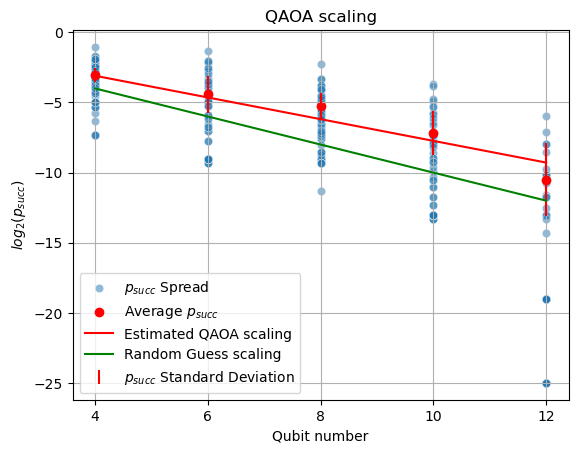

[0.77368293]
[0.04403403]


In [5]:
visualize_experiment(experiment_3_2_average, experiment_3_2_spread, 12)
#visualize_experiment_spread(experiment_3_2_average, experiment_3_2_spread, 12)

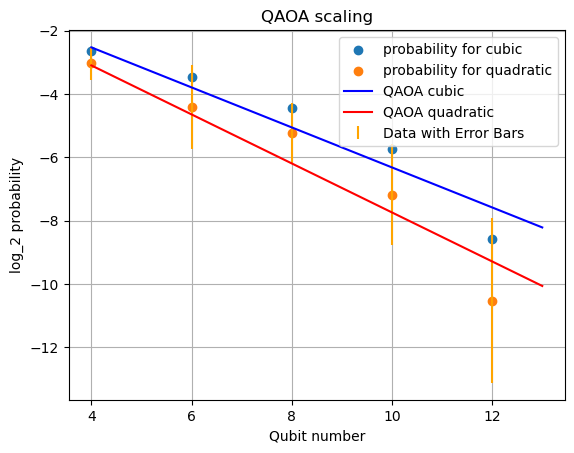

Cubic:
Alpha: [0.63156327], Error: [0.03551278]
Quadratic:
Alpha: [0.77368293], Error: [0.04403403]


In [9]:
# Comparison with non-quadratic:
def exponential_growth(x, alpha):
    return (-alpha*x)

x_data = np.arange(4, 12+2, step=2)
y_data_1 = np.log2(experiment_1_9_average[:5])
y_data_2 = np.log2(experiment_3_2_average)

# Errors:
y_means = np.log2(np.average((experiment_3_2_spread), axis=1))
y_errors = np.log2(np.std(np.log2(experiment_3_2_spread), axis=1))
plt.errorbar(np.arange(4, 12+2, 2), y_means, yerr=y_errors, color="orange", linestyle="", label='Data with Error Bars')

# Plot the sample data
plt.scatter(x_data, y_data_1, label='probability for cubic')
plt.scatter(x_data, y_data_2, label='probability for quadratic')

# Perform the curve fitting
popt_1, pcov_1 = curve_fit(exponential_growth, x_data, y_data_1, p0=[0])

alpha_opt_1 = popt_1

param_errors_1 = np.sqrt(np.diag(pcov_1))

popt_2, pcov_2 = curve_fit(exponential_growth, x_data, y_data_2, p0=[0])

alpha_opt_2 = popt_2

param_errors_2 = np.sqrt(np.diag(pcov_2))

# Generate the fitted curve using the optimized parameters
y_fit_1 = exponential_growth(np.arange(4, 12+2), alpha_opt_1)
y_fit_2 = exponential_growth(np.arange(4, 12+2), alpha_opt_2)

# Plot the fitted curve
plt.plot(np.arange(4, 12+2), y_fit_1, color='blue', label='QAOA cubic')
plt.plot(np.arange(4, 12+2), y_fit_2, color='red', label='QAOA quadratic')
#plt.plot(np.arange(min_qubits_num, max_qubits_num+2, 2), [np.log2(1/(2**x)) for x in np.arange(min_qubits_num, max_qubits_num+2, 2)], color='blue', label='Random Guess')

plt.xlabel('Qubit number')
plt.xticks(np.arange(4, 12+2, 2))
plt.ylabel('log_2 probability')
plt.title('QAOA scaling')
plt.legend()
plt.grid()
plt.show()
print("Cubic:")
print(f"Alpha: {alpha_opt_1}, Error: {param_errors_1}")
print("Quadratic:")
print(f"Alpha: {alpha_opt_2}, Error: {param_errors_2}")

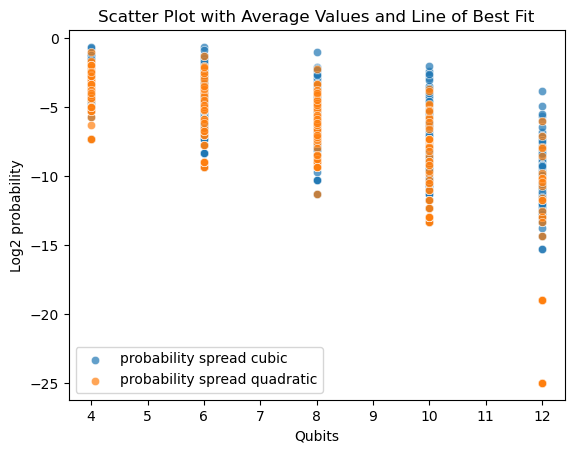

In [43]:
x_data = np.arange(4, 12+2, 2)

tidy_data_1 = pd.DataFrame({
    'Point': np.repeat(x_data, len(experiment_1_9_spread[0])),
    'Value': np.concatenate(np.log2(experiment_1_9_spread[:5]))
})

tidy_data_2 = pd.DataFrame({
    'Point': np.repeat(x_data, len(experiment_3_2_spread[0])),
    'Value': np.concatenate(np.log2(experiment_3_2_spread))
})

# Create a scatter plot using Seaborn
sns.scatterplot(x='Point', y='Value', data=tidy_data_1, alpha=0.7, label="probability spread cubic")
sns.scatterplot(x='Point', y='Value', data=tidy_data_2, alpha=0.7, label="probability spread quadratic")


# Overlay average values with a different color
# sns.scatterplot(x=x_data, y=np.log2(experiment_1_9_average[:5]), marker='o', color='red', label='Average')

# # Plot a line of best fit
# sns.regplot(x=x_data, y=np.log2(averages), color='red', label='Line of Best Fit')

# # Plot a line of best fit for random
# sns.regplot(x=x_data, y=[np.log2(1/(2**x)) for x in np.arange(min_qubits_num, qubit_num+2, 2)], color='green', label='Random guess')

#plt.errorbar(np.arange(4, 12+2, 2), y_means, yerr=y_errors, fmt='o-', label='Data with Error Bars')

plt.title('Scatter Plot with Average Values and Line of Best Fit')
plt.xlabel('Qubits')
plt.ylabel('Log2 probability')
plt.legend()
plt.show()

In [36]:
print(np.log2(experiment_3_2_average))
print(np.log2(np.average((experiment_3_2_spread), axis=1)))

[ -3.02792009  -4.41023651  -5.23942419  -7.18169478 -10.51836788]
[ -3.02792009  -4.41023656  -5.2394242   -7.18169478 -10.51836788]


In [13]:
# up to 10 just to check if consistent:
scaling_quadratic_10 = [(0.16749999999999998, array([0.3875 , 0.23125, 0.28125, 0.4125 , 0.44375, 0.45625, 0.2    ,
       0.08125, 0.125  , 0.075  , 0.2375 , 0.26875, 0.26875, 0.0125 ,
       0.03125, 0.225  , 0.08125, 0.04375, 0.3625 , 0.05   , 0.08125,
       0.0375 , 0.19375, 0.21875, 0.11875, 0.01875, 0.00625, 0.1875 ,
       0.01875, 0.03125, 0.18125, 0.3875 , 0.45625, 0.16875, 0.23125,
       0.16875, 0.3125 , 0.4    , 0.38125, 0.21875, 0.33125, 0.25   ,
       0.0625 , 0.2875 , 0.35625, 0.15   , 0.0625 , 0.09375, 0.25625,
       0.10625, 0.1    , 0.075  , 0.2375 , 0.19375, 0.38125, 0.3375 ,
       0.34375, 0.09375, 0.2125 , 0.225  , 0.1375 , 0.03125, 0.025  ,
       0.08125, 0.04375, 0.125  , 0.28125, 0.15   , 0.1125 , 0.30625,
       0.1125 , 0.1625 , 0.18125, 0.2125 , 0.2375 , 0.41875, 0.0375 ,
       0.0125 , 0.13125, 0.05625, 0.0625 , 0.20625, 0.1375 , 0.14375,
       0.525  , 0.03125, 0.03125, 0.05625, 0.0125 , 0.0375 , 0.6125 ,
       0.0125 , 0.025  , 0.39375, 0.025  , 0.06875, 0.18125, 0.00625,
       0.03125, 0.075  , 0.0125 , 0.0125 , 0.15625, 0.1125 , 0.175  ,
       0.08125, 0.08125, 0.08125, 0.09375, 0.01875, 0.03125, 0.03125,
       0.1875 , 0.15   , 0.31875, 0.0375 , 0.025  , 0.075  , 0.325  ,
       0.3125 ])), (0.11174479166666669, array([0.0265625, 0.0109375, 0.0296875, 0.4796875, 0.265625 , 0.1703125,
       0.15625  , 0.01875  , 0.05     , 0.48125  , 0.2515625, 0.1234375,
       0.209375 , 0.003125 , 0.0078125, 0.2046875, 0.03125  , 0.0640625,
       0.1609375, 0.046875 , 0.0125   , 0.334375 , 0.1578125, 0.0140625,
       0.0234375, 0.003125 , 0.0078125, 0.0453125, 0.0140625, 0.0171875,
       0.528125 , 0.1828125, 0.0078125, 0.0265625, 0.003125 , 0.0359375,
       0.43125  , 0.0671875, 0.1609375, 0.6703125, 0.2046875, 0.0421875,
       0.08125  , 0.01875  , 0.0515625, 0.103125 , 0.034375 , 0.003125 ,
       0.040625 , 0.0671875, 0.0015625, 0.1515625, 0.0328125, 0.0078125,
       0.115625 , 0.1046875, 0.0171875, 0.121875 , 0.16875  , 0.0859375,
       0.021875 , 0.003125 , 0.0078125, 0.0390625, 0.0921875, 0.040625 ,
       0.0734375, 0.046875 , 0.071875 , 0.2875   , 0.025    , 0.05     ,
       0.53125  , 0.021875 , 0.009375 , 0.125    , 0.0421875, 0.0046875,
       0.3078125, 0.090625 , 0.015625 , 0.44375  , 0.04375  , 0.0265625,
       0.7171875, 0.0921875, 0.0453125, 0.153125 , 0.1265625, 0.053125 ,
       0.2609375, 0.0203125, 0.009375 , 0.115625 , 0.0265625, 0.0109375,
       0.1265625, 0.103125 , 0.034375 , 0.225    , 0.009375 , 0.0140625,
       0.15625  , 0.134375 , 0.0484375, 0.0875   , 0.05625  , 0.0046875,
       0.3609375, 0.0265625, 0.0515625, 0.303125 , 0.196875 , 0.096875 ,
       0.103125 , 0.0015625, 0.00625  , 0.1125   , 0.0890625, 0.0171875])), (0.05714192708333334, array([6.44531250e-02, 5.07812500e-03, 2.07031250e-02, 1.66796875e-01,
       4.64843750e-02, 2.07421875e-01, 1.13281250e-02, 7.42187500e-03,
       3.63281250e-02, 7.22656250e-02, 1.35546875e-01, 3.50390625e-01,
       1.95312500e-03, 8.98437500e-03, 2.34375000e-02, 4.68750000e-03,
       1.99218750e-02, 3.98437500e-02, 2.73437500e-03, 1.83593750e-02,
       2.03125000e-02, 5.03906250e-02, 1.52343750e-01, 1.36718750e-01,
       1.95312500e-03, 1.95312500e-03, 1.17187500e-02, 3.90625000e-04,
       7.81250000e-04, 8.59375000e-03, 1.86328125e-01, 8.86718750e-02,
       1.68750000e-01, 5.58593750e-02, 1.40625000e-02, 2.92968750e-02,
       1.52734375e-01, 4.84375000e-02, 1.60156250e-02, 8.04687500e-02,
       1.30468750e-01, 4.30859375e-01, 9.76562500e-02, 1.60156250e-02,
       8.47656250e-02, 3.90625000e-03, 4.68750000e-02, 3.98437500e-02,
       1.71875000e-02, 5.70312500e-02, 6.09375000e-02, 2.96875000e-02,
       1.95312500e-03, 3.90625000e-02, 8.08593750e-02, 5.15625000e-02,
       2.18750000e-02, 3.39843750e-02, 1.39453125e-01, 1.35546875e-01,
       3.90625000e-04, 3.90625000e-04, 4.72656250e-02, 3.12500000e-03,
       2.57812500e-02, 9.37500000e-03, 1.56250000e-02, 4.57031250e-02,
       4.25781250e-02, 1.01562500e-02, 1.13281250e-02, 4.72656250e-02,
       4.64843750e-02, 1.48437500e-02, 6.64062500e-02, 7.81250000e-04,
       4.57031250e-02, 6.25000000e-03, 1.95312500e-03, 7.81250000e-02,
       7.14843750e-02, 1.13281250e-02, 9.37500000e-03, 1.91406250e-02,
       1.95312500e-03, 9.45312500e-02, 3.61328125e-01, 2.34375000e-03,
       1.17968750e-01, 1.75390625e-01, 3.90625000e-04, 8.59375000e-03,
       4.41406250e-02, 1.17187500e-03, 8.98437500e-03, 2.50000000e-02,
       1.95312500e-03, 1.05859375e-01, 1.07812500e-01, 3.90625000e-04,
       2.07031250e-02, 9.25781250e-02, 2.46093750e-02, 6.87500000e-02,
       1.17187500e-01, 7.03125000e-03, 1.99218750e-02, 3.51562500e-03,
       7.81250000e-04, 7.22656250e-02, 2.83203125e-01, 2.30468750e-02,
       5.03906250e-02, 1.01562500e-01, 7.81250000e-04, 1.52343750e-02,
       1.05859375e-01, 8.35937500e-02, 4.02343750e-02, 4.76562500e-02])), (0.022303873697916664, array([2.73437500e-03, 1.09375000e-02, 1.26953125e-03, 6.67968750e-02,
       6.64062500e-03, 2.37304688e-02, 3.90625000e-04, 1.48437500e-02,
       2.05078125e-03, 4.40429688e-02, 2.15917969e-01, 1.50390625e-02,
       9.76562500e-05, 2.24609375e-03, 7.81250000e-04, 3.12500000e-03,
       5.69335938e-02, 5.85937500e-04, 4.88281250e-04, 2.14843750e-03,
       3.02734375e-03, 3.77929688e-02, 3.26171875e-02, 2.34375000e-03,
       1.95312500e-04, 1.46484375e-03, 1.95312500e-04, 9.76562500e-05,
       3.61328125e-03, 6.83593750e-04, 7.21679688e-02, 5.17578125e-02,
       3.07617188e-02, 1.95312500e-04, 1.90429688e-02, 4.88281250e-04,
       4.94140625e-02, 2.35351563e-02, 1.08398437e-02, 6.72851563e-02,
       2.02734375e-01, 2.03125000e-02, 4.88281250e-04, 6.83593750e-03,
       6.54296875e-03, 2.24609375e-03, 5.57617188e-02, 5.85937500e-04,
       1.26953125e-03, 5.91796875e-02, 1.95312500e-04, 1.85546875e-03,
       3.30078125e-02, 4.10156250e-03, 7.81250000e-03, 3.20312500e-02,
       3.90625000e-04, 7.71484375e-03, 1.15136719e-01, 3.12500000e-03,
       1.46484375e-03, 8.98437500e-03, 1.95312500e-04, 2.44140625e-03,
       4.19921875e-03, 2.92968750e-03, 2.05078125e-03, 5.12695312e-02,
       4.88281250e-04, 2.05078125e-03, 7.61718750e-03, 1.95312500e-04,
       8.78906250e-04, 7.44140625e-02, 2.73437500e-03, 2.92968750e-03,
       2.92968750e-03, 9.76562500e-04, 1.66015625e-03, 1.04492187e-02,
       6.83593750e-04, 1.75781250e-03, 2.07031250e-02, 4.88281250e-04,
       2.14843750e-03, 7.73437500e-02, 3.22265625e-03, 2.05078125e-03,
       1.91699219e-01, 1.56250000e-03, 9.76562500e-05, 3.02734375e-03,
       6.83593750e-04, 8.78906250e-04, 1.02539062e-02, 1.46484375e-03,
       3.22265625e-03, 1.34960938e-01, 2.53906250e-03, 1.95312500e-04,
       7.22656250e-02, 7.81250000e-04, 4.98046875e-03, 9.42382812e-02,
       6.83593750e-04, 8.78906250e-04, 2.68554688e-02, 1.95312500e-04,
       1.46484375e-03, 1.63281250e-01, 4.88281250e-04, 1.02539062e-02,
       4.64843750e-02, 1.36718750e-03, 4.88281250e-04, 1.00488281e-01,
       6.83593750e-04, 8.39843750e-03, 5.99609375e-02, 2.73437500e-03]))]
scaling_quadratic_10_average = [x for (x, y) in scaling_quadratic_10]
scaling_quadratic_10_spread = [y for (x, y) in scaling_quadratic_10]

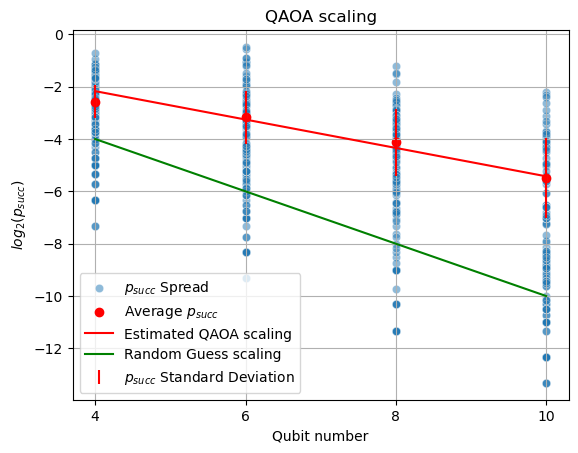

[0.54250677]
[0.01855741]


In [14]:
visualize_experiment(scaling_quadratic_10_average, scaling_quadratic_10_spread, 10)

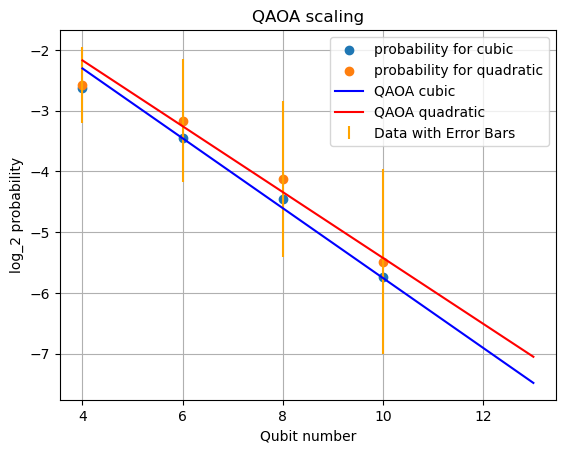

Cubic:
Alpha: [0.57564429], Error: [0.01402841]
Quadratic:
Alpha: [0.54250677], Error: [0.01855741]


In [17]:
def exponential_growth(x, alpha):
    return (-alpha*x)

x_data = np.arange(4, 10+2, step=2)
y_data_1 = np.log2(experiment_1_9_average[:4])
y_data_2 = np.log2(scaling_quadratic_10_average)

# Errors:
y_means = np.log2(np.average((scaling_quadratic_10_spread), axis=1))
y_errors = np.log2(np.std(np.log2(scaling_quadratic_10_spread), axis=1))
plt.errorbar(np.arange(4, 10+2, 2), y_means, yerr=y_errors, color="orange", linestyle="", label='Data with Error Bars')

# Plot the sample data
plt.scatter(x_data, y_data_1, label='probability for cubic')
plt.scatter(x_data, y_data_2, label='probability for quadratic')

# Perform the curve fitting
popt_1, pcov_1 = curve_fit(exponential_growth, x_data, y_data_1, p0=[0])

alpha_opt_1 = popt_1

param_errors_1 = np.sqrt(np.diag(pcov_1))

popt_2, pcov_2 = curve_fit(exponential_growth, x_data, y_data_2, p0=[0])

alpha_opt_2 = popt_2

param_errors_2 = np.sqrt(np.diag(pcov_2))

# Generate the fitted curve using the optimized parameters
y_fit_1 = exponential_growth(np.arange(4, 12+2), alpha_opt_1)
y_fit_2 = exponential_growth(np.arange(4, 12+2), alpha_opt_2)

# Plot the fitted curve
plt.plot(np.arange(4, 12+2), y_fit_1, color='blue', label='QAOA cubic')
plt.plot(np.arange(4, 12+2), y_fit_2, color='red', label='QAOA quadratic')
#plt.plot(np.arange(min_qubits_num, max_qubits_num+2, 2), [np.log2(1/(2**x)) for x in np.arange(min_qubits_num, max_qubits_num+2, 2)], color='blue', label='Random Guess')

plt.xlabel('Qubit number')
plt.xticks(np.arange(4, 12+2, 2))
plt.ylabel('log_2 probability')
plt.title('QAOA scaling')
plt.legend()
plt.grid()
plt.show()
print("Cubic:")
print(f"Alpha: {alpha_opt_1}, Error: {param_errors_1}")
print("Quadratic:")
print(f"Alpha: {alpha_opt_2}, Error: {param_errors_2}")

### Quadratic QAOA Complexity scaling (14 qubits) Code: 3.3

Name: scaling up to 14 quadratic

What: find how the quadratic problem scales but due to introduction of many qubits limited to small instances

Why: double check again with slightly more qubits just to be sure

Conclusion: This current result is wrong!!!

Running parameters:

Bash script name: scaling-quadratic-14.sh

Python script name: VQA-experiments-for-cluster-scaling-quadratic-14.py

Saves to: scaling_quadratic_14.txt

Hours: 6h

GPU's: 

job ID: 

In [18]:
experiment_3_3_results = [(0.164375, array([0.24375, 0.0625 , 0.0625 , 0.05   , 0.2    , 0.175  , 0.36875,
       0.0375 , 0.025  , 0.4625 , 0.1625 , 0.1375 , 0.20625, 0.09375,
       0.125  , 0.25625, 0.05   , 0.05625, 0.26875, 0.24375, 0.2125 ,
       0.275  , 0.3    , 0.275  , 0.10625, 0.05625, 0.08125, 0.15625,
       0.225  , 0.2375 , 0.06875, 0.09375, 0.14375, 0.13125, 0.05   ,
       0.0625 , 0.03125, 0.19375, 0.1875 , 0.11875, 0.1375 , 0.125  ,
       0.175  , 0.2125 , 0.125  , 0.3625 , 0.25625, 0.23125, 0.06875,
       0.01875, 0.01875, 0.10625, 0.25625, 0.3    , 0.4    , 0.20625,
       0.275  , 0.15   , 0.0125 , 0.04375, 0.08125, 0.0125 , 0.03125,
       0.125  , 0.1    , 0.11875, 0.29375, 0.10625, 0.08125, 0.1375 ,
       0.35   , 0.1875 , 0.39375, 0.325  , 0.3625 , 0.13125, 0.28125,
       0.2125 , 0.20625, 0.46875, 0.41875, 0.33125, 0.175  , 0.23125,
       0.16875, 0.08125, 0.1    , 0.175  , 0.0375 , 0.05625, 0.15   ,
       0.00625, 0.0125 , 0.43125, 0.03125, 0.03125, 0.06875, 0.1375 ,
       0.18125, 0.275  , 0.04375, 0.05   , 0.14375, 0.275  , 0.3125 ,
       0.14375, 0.03125, 0.0375 , 0.375  , 0.025  , 0.025  , 0.00625,
       0.20625, 0.1375 , 0.08125, 0.09375, 0.10625, 0.2    , 0.23125,
       0.31875])), (0.10920572916666668, array([0.0453125, 0.0140625, 0.0265625, 0.296875 , 0.0046875, 0.003125 ,
       0.2453125, 0.0875   , 0.0390625, 0.409375 , 0.1671875, 0.184375 ,
       0.1734375, 0.034375 , 0.0015625, 0.1171875, 0.1109375, 0.0046875,
       0.5203125, 0.0765625, 0.0109375, 0.2171875, 0.125    , 0.009375 ,
       0.234375 , 0.0015625, 0.0359375, 0.021875 , 0.04375  , 0.009375 ,
       0.1625   , 0.0109375, 0.0265625, 0.04375  , 0.0015625, 0.0109375,
       0.2015625, 0.1453125, 0.0015625, 0.0421875, 0.0265625, 0.0015625,
       0.0546875, 0.0515625, 0.0359375, 0.2625   , 0.2109375, 0.1390625,
       0.6390625, 0.009375 , 0.0015625, 0.00625  , 0.0046875, 0.003125 ,
       0.1625   , 0.059375 , 0.00625  , 0.475    , 0.0484375, 0.0109375,
       0.009375 , 0.0015625, 0.0171875, 0.4140625, 0.1765625, 0.159375 ,
       0.196875 , 0.021875 , 0.0296875, 0.0078125, 0.0296875, 0.00625  ,
       0.5484375, 0.3625   , 0.2953125, 0.2625   , 0.121875 , 0.084375 ,
       0.175    , 0.015625 , 0.034375 , 0.334375 , 0.2140625, 0.190625 ,
       0.2234375, 0.071875 , 0.00625  , 0.040625 , 0.0078125, 0.0078125,
       0.2375   , 0.0015625, 0.003125 , 0.021875 , 0.0078125, 0.046875 ,
       0.1984375, 0.0125   , 0.00625  , 0.0125   , 0.00625  , 0.103125 ,
       0.365625 , 0.2234375, 0.1546875, 0.00625  , 0.0015625, 0.04375  ,
       0.575    , 0.015625 , 0.003125 , 0.08125  , 0.059375 , 0.0046875,
       0.0171875, 0.003125 , 0.015625 , 0.3234375, 0.2390625, 0.11875  ])), (0.06103515625, array([2.73437500e-03, 1.60156250e-02, 1.09375000e-02, 3.39843750e-02,
       1.99218750e-02, 7.89062500e-02, 1.17187500e-03, 1.10937500e-01,
       1.65234375e-01, 3.71093750e-02, 1.67578125e-01, 1.88281250e-01,
       1.25000000e-02, 1.91406250e-02, 3.04687500e-02, 8.20312500e-03,
       7.81250000e-02, 1.22656250e-01, 5.97656250e-02, 2.69531250e-02,
       9.84375000e-02, 8.86718750e-02, 1.48437500e-02, 1.23828125e-01,
       7.81250000e-03, 9.37500000e-03, 2.73437500e-03, 5.50781250e-02,
       1.01562500e-02, 1.17187500e-03, 5.85937500e-03, 7.34375000e-02,
       1.87500000e-02, 2.73437500e-03, 5.46875000e-03, 7.03125000e-03,
       3.08593750e-02, 7.46093750e-02, 1.21484375e-01, 1.67968750e-02,
       2.81250000e-02, 1.09375000e-02, 1.52343750e-02, 3.75000000e-02,
       6.09375000e-02, 6.01562500e-02, 1.64453125e-01, 2.68750000e-01,
       1.95312500e-03, 1.06250000e-01, 4.11328125e-01, 7.10937500e-02,
       6.64062500e-03, 1.95312500e-02, 4.76562500e-02, 1.95312500e-02,
       9.76562500e-03, 3.90625000e-04, 1.32812500e-02, 1.78125000e-01,
       1.95312500e-03, 1.95312500e-03, 1.56250000e-03, 7.42187500e-03,
       1.27343750e-01, 3.66406250e-01, 8.59375000e-03, 3.90625000e-02,
       1.01562500e-02, 4.92187500e-02, 2.50000000e-02, 3.90625000e-04,
       9.41406250e-02, 2.76953125e-01, 4.99609375e-01, 5.58593750e-02,
       8.20312500e-03, 9.02343750e-02, 1.96875000e-01, 7.81250000e-03,
       2.34375000e-03, 4.25781250e-02, 1.77734375e-01, 3.10937500e-01,
       1.17187500e-02, 2.73437500e-02, 2.73437500e-03, 7.81250000e-04,
       2.73437500e-03, 1.67968750e-02, 1.95312500e-03, 3.90625000e-04,
       1.95312500e-03, 3.90625000e-04, 1.56250000e-03, 1.17187500e-03,
       1.83593750e-02, 6.64062500e-03, 1.79687500e-02, 1.56250000e-03,
       2.03125000e-02, 1.95312500e-02, 7.96875000e-02, 1.42578125e-01,
       2.74218750e-01, 1.95312500e-03, 3.90625000e-03, 5.27343750e-02,
       7.81250000e-04, 2.85156250e-02, 1.40625000e-02, 3.04687500e-02,
       4.92187500e-02, 5.35156250e-02, 9.37500000e-03, 1.25000000e-02,
       4.64843750e-02, 6.75781250e-02, 1.35156250e-01, 2.73828125e-01])), (0.023146972656250004, array([2.14843750e-03, 6.93359375e-03, 5.85937500e-04, 1.66015625e-03,
       8.14453125e-02, 2.53906250e-03, 4.68750000e-03, 1.52148437e-01,
       1.36718750e-03, 3.21289062e-02, 1.20800781e-01, 1.62109375e-02,
       2.63671875e-03, 1.26953125e-03, 3.90625000e-04, 3.02734375e-03,
       1.10058594e-01, 4.88281250e-04, 6.34765625e-03, 4.71679687e-02,
       1.46484375e-03, 2.63671875e-02, 6.12304688e-02, 1.26953125e-03,
       1.26953125e-03, 1.33789062e-02, 7.81250000e-04, 6.83593750e-04,
       2.24609375e-03, 1.95312500e-04, 2.92968750e-03, 2.20703125e-02,
       2.14843750e-03, 1.66015625e-03, 1.00585938e-02, 1.85546875e-03,
       8.39843750e-03, 7.81250000e-02, 1.17187500e-03, 1.56250000e-03,
       5.66406250e-03, 2.92968750e-04, 2.34375000e-03, 1.66992188e-02,
       2.24609375e-03, 1.64062500e-02, 2.02343750e-01, 4.88281250e-03,
       4.88281250e-04, 1.11035156e-01, 4.88281250e-04, 1.95312500e-04,
       7.42187500e-03, 1.85546875e-03, 2.14843750e-03, 8.69140625e-03,
       9.76562500e-05, 5.17578125e-03, 5.44921875e-02, 1.46484375e-03,
       4.88281250e-04, 4.88281250e-04, 4.88281250e-04, 2.10937500e-02,
       1.84375000e-01, 1.05468750e-02, 1.07421875e-03, 1.12304688e-02,
       9.76562500e-05, 6.83593750e-04, 1.07421875e-03, 2.92968750e-04,
       5.81054688e-02, 3.01269531e-01, 2.75390625e-02, 4.98046875e-03,
       2.50976563e-02, 3.80859375e-03, 2.53906250e-03, 5.76171875e-03,
       1.95312500e-04, 2.40234375e-02, 1.88574219e-01, 1.24023437e-02,
       1.19140625e-02, 4.14062500e-02, 1.46484375e-03, 1.95312500e-04,
       6.25000000e-03, 2.63671875e-03, 1.95312500e-04, 1.32812500e-02,
       6.83593750e-04, 4.88281250e-04, 2.44140625e-03, 3.90625000e-04,
       1.46484375e-03, 1.65039062e-02, 2.73437500e-03, 9.76562500e-04,
       4.10156250e-03, 9.76562500e-05, 3.67187500e-02, 1.65429688e-01,
       8.69140625e-03, 3.90625000e-04, 1.58203125e-02, 4.88281250e-04,
       1.56250000e-03, 5.85937500e-04, 1.46484375e-03, 4.00390625e-03,
       5.15625000e-02, 1.95312500e-04, 9.76562500e-05, 3.95507812e-02,
       9.76562500e-05, 2.43164062e-02, 1.47265625e-01, 8.59375000e-03])), (0.004951578776041667, array([1.04980469e-03, 4.88281250e-05, 1.46484375e-04, 1.22070312e-04,
       2.58789063e-03, 1.09863281e-03, 1.19628906e-02, 3.90625000e-04,
       2.44140625e-05, 3.42285156e-02, 1.23046875e-02, 4.39453125e-04,
       1.34277344e-03, 8.05664063e-04, 8.30078125e-04, 6.61621094e-03,
       1.36718750e-03, 6.83593750e-04, 2.46582031e-03, 2.24609375e-03,
       8.78906250e-04, 2.09472656e-02, 9.76562500e-05, 8.78906250e-04,
       1.70898437e-04, 2.92968750e-04, 9.76562500e-05, 1.12304687e-03,
       4.63867187e-04, 2.19726562e-04, 3.73535156e-03, 4.63867187e-04,
       1.95312500e-04, 4.15039062e-04, 7.81250000e-04, 2.68554688e-04,
       9.81445313e-03, 1.73339844e-03, 2.19726563e-04, 1.56250000e-03,
       1.44042969e-03, 6.34765625e-04, 2.58789063e-03, 2.92968750e-04,
       1.22070312e-04, 3.39111328e-02, 2.22167969e-03, 1.70898437e-04,
       6.10351562e-04, 8.78906250e-04, 2.68554688e-04, 7.56835938e-04,
       1.26953125e-03, 9.76562500e-05, 1.78222656e-03, 2.34375000e-03,
       1.00097656e-03, 3.78417969e-03, 2.68554688e-04, 2.44140625e-05,
       1.22070312e-04, 2.12402344e-03, 1.22070312e-04, 3.45947266e-02,
       1.43310547e-02, 4.15039063e-04, 3.90625000e-04, 4.63867188e-04,
       1.22070312e-04, 4.39453125e-04, 1.78222656e-03, 2.68554688e-04,
       1.03857422e-01, 3.36181641e-02, 1.22070312e-04, 8.05664062e-03,
       5.02929688e-03, 5.61523437e-04, 2.44140625e-05, 6.59179687e-04,
       1.41601562e-03, 4.55078125e-02, 2.70263672e-02, 9.03320313e-04,
       2.56347656e-03, 1.41601562e-03, 1.22070312e-04, 3.17382813e-04,
       1.95312500e-04, 4.63867187e-04, 1.46484375e-04, 4.15039063e-04,
       7.08007812e-04, 2.44140625e-05, 1.02539062e-03, 2.05078125e-03,
       5.85937500e-04, 1.61132812e-03, 2.44140625e-05, 4.88281250e-04,
       1.34277344e-03, 1.26953125e-03, 4.90234375e-02, 3.05175781e-03,
       2.85644531e-03, 3.17382813e-04, 3.90625000e-04, 4.88281250e-04,
       5.85937500e-04, 5.12695313e-04, 1.46484375e-04, 3.12500000e-03,
       3.66210938e-04, 2.44140625e-04, 7.32421875e-05, 1.08154297e-02,
       4.15039063e-04, 3.99902344e-02, 5.37109375e-03, 9.76562500e-05])), (0.010498555501302085, array([6.04248047e-04, 5.37109375e-04, 1.40380859e-04, 5.12695313e-04,
       4.64477539e-03, 1.70898437e-04, 1.62414551e-02, 3.05664063e-02,
       4.27246094e-05, 3.53942871e-02, 3.84948730e-02, 3.66210937e-05,
       6.34765625e-04, 3.72924805e-03, 3.05175781e-05, 7.42797852e-03,
       7.62939453e-03, 1.28173828e-04, 1.92260742e-03, 5.60913086e-03,
       3.05175781e-05, 1.18469238e-02, 1.71997070e-02, 9.15527344e-04,
       5.92041016e-04, 6.65283203e-04, 3.66210937e-05, 3.47900391e-04,
       4.88281250e-05, 2.13623047e-04, 3.23486328e-03, 1.06811523e-03,
       2.44140625e-04, 2.50244141e-04, 2.44140625e-05, 1.52587891e-04,
       9.58862305e-03, 8.78906250e-03, 6.10351563e-06, 1.06201172e-03,
       2.86865234e-04, 4.27246094e-05, 2.22167969e-03, 1.11694336e-03,
       6.10351563e-06, 3.80371094e-02, 4.07348633e-02, 3.17382813e-04,
       2.76000977e-02, 1.75341797e-01, 3.05175781e-05, 1.77001953e-04,
       6.22558594e-04, 1.09863281e-04, 4.82177734e-04, 4.76074219e-04,
       3.90625000e-04, 3.03955078e-03, 2.82958984e-02, 3.05175781e-05,
       3.05175781e-05, 6.10351563e-06, 6.10351563e-06, 3.57543945e-02,
       8.95568848e-02, 9.33837891e-04, 5.85937500e-04, 4.27246094e-05,
       1.22070313e-05, 4.82177734e-04, 6.10351563e-06, 1.10473633e-03,
       1.14514160e-01, 1.50256348e-01, 3.39965820e-03, 1.92871094e-03,
       9.25292969e-03, 1.79443359e-03, 1.22070312e-04, 1.02539063e-03,
       3.96728516e-04, 4.64172363e-02, 6.48132324e-02, 1.96533203e-03,
       2.18505859e-03, 2.99072266e-04, 1.34277344e-04, 2.31933594e-04,
       6.83593750e-04, 4.88281250e-05, 6.10351562e-05, 6.10351563e-06,
       6.10351563e-06, 3.05175781e-05, 3.05175781e-05, 7.32421875e-05,
       1.40380859e-04, 4.39453125e-04, 1.22070312e-04, 1.70898438e-04,
       1.52587891e-04, 5.49316406e-05, 4.32250977e-02, 5.97290039e-02,
       1.29394531e-03, 2.80761719e-04, 1.11694336e-03, 5.49316406e-05,
       9.64355469e-04, 5.06591797e-04, 2.44140625e-05, 3.13110352e-03,
       2.06298828e-03, 1.46484375e-04, 2.62451172e-04, 9.52148437e-04,
       6.10351563e-06, 3.72619629e-02, 4.78149414e-02, 1.53808594e-03]))]
experiment_3_3_average = [x for (x, y) in experiment_3_3_results]
experiment_3_3_spread = [y for (x, y) in experiment_3_3_results]

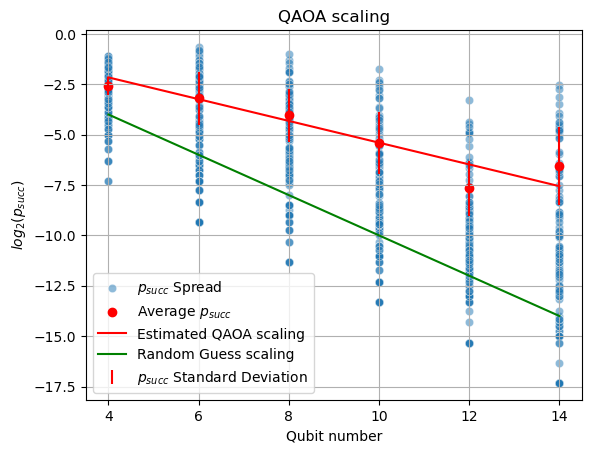

[0.53978263]
[0.03083395]


In [21]:
visualize_experiment(experiment_3_3_average, experiment_3_3_spread, 14)
#visualize_experiment_spread(experiment_3_3_average, experiment_3_3_spread, 14)

6
6


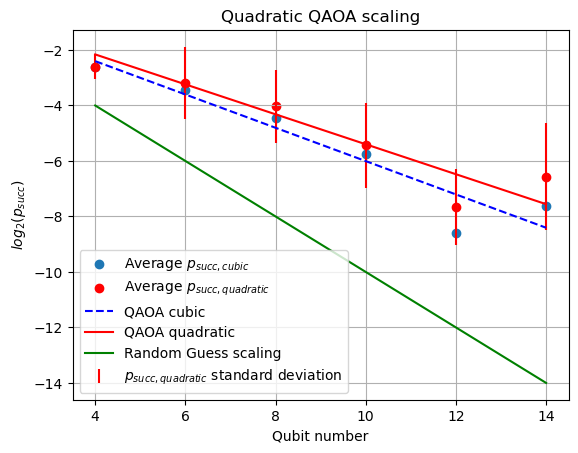

Cubic:
Alpha: [0.60049017], Error: [0.03174821]
Quadratic:
Alpha: [0.53978263], Error: [0.03083395]


In [45]:
def exponential_growth(x, alpha):
    return (-alpha*x)

tidy_data = pd.DataFrame({
        'Point': np.repeat(x_data, len(experiment_3_3_spread[0])),
        'Value': np.concatenate(np.log2(experiment_3_3_spread))
    })
    
#sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.4, color="orange", label="$p_{succ, quadratic}$ Spread")

x_data = np.arange(4, 14+2, step=2)
y_data_1 = np.log2(experiment_1_9_average[:6])
y_data_2 = np.log2(experiment_3_3_average)

# Errors:
y_means = np.log2(np.average((experiment_3_3_spread), axis=1))
y_errors = np.log2(np.std(np.log2(experiment_3_3_spread), axis=1))
y_means2 = np.log2(np.average((experiment_1_9_spread[:6]), axis=1))
y_errors2 = np.log2(np.std(np.log2(experiment_1_9_spread[:6]), axis=1))
plt.errorbar(np.arange(4, 14+2, 2), y_means, yerr=y_errors, color="red", linestyle="", label='$p_{succ, quadratic}$ standard deviation')
#plt.errorbar(np.arange(4, 14+2, 2), y_means2, yerr=y_errors2, color="blue", linestyle="", label='$p_{succ, cubic}$ standard deviation')

# Plot the sample data
plt.scatter(x_data, y_data_1, label='Average $p_{succ, cubic}$')
plt.scatter(x_data, y_data_2, label='Average $p_{succ, quadratic}$', color="red")

# Perform the curve fitting
popt_1, pcov_1 = curve_fit(exponential_growth, x_data, y_data_1, p0=[0])

alpha_opt_1 = popt_1

param_errors_1 = np.sqrt(np.diag(pcov_1))

popt_2, pcov_2 = curve_fit(exponential_growth, x_data, y_data_2, p0=[0])

alpha_opt_2 = popt_2

param_errors_2 = np.sqrt(np.diag(pcov_2))

# Generate the fitted curve using the optimized parameters
y_fit_1 = exponential_growth(np.arange(4, 14+1), alpha_opt_1)
y_fit_2 = exponential_growth(np.arange(4, 14+1), alpha_opt_2)

# Plot the fitted curve
plt.plot(np.arange(4, 15), y_fit_1, color='blue', label='QAOA cubic', linestyle="--")
plt.plot(np.arange(4, 15), y_fit_2, color='red', label='QAOA quadratic')
print(len(np.arange(4, 14+2, 2)))
print(len([np.log2(1/(2**x)) for x in x_data]))
plt.plot(np.arange(4, 14+2, 2), [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')
#plt.plot(np.arange(min_qubits_num, max_qubits_num+2, 2), [np.log2(1/(2**x)) for x in np.arange(min_qubits_num, max_qubits_num+2, 2)], color='blue', label='Random Guess')

plt.xlabel('Qubit number')
plt.xticks(np.arange(4, 14+2, 2))
plt.ylabel('$log_2(p_{succ})$')
plt.title('Quadratic QAOA scaling')
plt.legend()
plt.grid()
plt.show()
print("Cubic:")
print(f"Alpha: {alpha_opt_1}, Error: {param_errors_1}")
print("Quadratic:")
print(f"Alpha: {alpha_opt_2}, Error: {param_errors_2}")

### Quadratic QAOA Complexity scaling (16 qubits) Code: 3.4

In [3]:
experiment_3_4_results = [(0.22125, array([0.36875, 0.3375 , 0.25625, 0.1875 , 0.175  , 0.225  , 0.18125,
       0.26875, 0.30625, 0.06875, 0.18125, 0.15625, 0.28125, 0.06875,
       0.075  , 0.2875 , 0.19375, 0.2    , 0.19375, 0.225  , 0.225  ,
       0.0875 , 0.01875, 0.01875, 0.11875, 0.1625 , 0.125  , 0.1125 ,
       0.1375 , 0.1125 , 0.09375, 0.0125 , 0.00625, 0.4875 , 0.175  ,
       0.175  , 0.31875, 0.8    , 0.75625, 0.26875, 0.03125, 0.04375,
       0.2    , 0.0875 , 0.0625 , 0.30625, 0.28125, 0.29375, 0.425  ,
       0.30625, 0.30625, 0.55625, 0.15625, 0.10625, 0.49375, 0.3    ,
       0.275  , 0.1375 , 0.2    , 0.25625])), (0.08158854166666667, array([0.4859375, 0.028125 , 0.0046875, 0.1859375, 0.0046875, 0.0171875,
       0.0796875, 0.1203125, 0.071875 , 0.3421875, 0.1796875, 0.0765625,
       0.05     , 0.0421875, 0.078125 , 0.0625   , 0.1      , 0.0796875,
       0.1328125, 0.0484375, 0.0078125, 0.0234375, 0.003125 , 0.0375   ,
       0.128125 , 0.015625 , 0.0140625, 0.0546875, 0.0109375, 0.0109375,
       0.0078125, 0.0359375, 0.0078125, 0.234375 , 0.0703125, 0.009375 ,
       0.0015625, 0.0078125, 0.0046875, 0.025    , 0.0453125, 0.0359375,
       0.20625  , 0.075    , 0.0109375, 0.0828125, 0.0046875, 0.0484375,
       0.4890625, 0.2421875, 0.0171875, 0.115625 , 0.0203125, 0.0078125,
       0.26875  , 0.0015625, 0.00625  , 0.2171875, 0.0453125, 0.053125 ])), (0.05639973958333333, array([9.29687500e-02, 9.37500000e-03, 1.06250000e-01, 4.41406250e-02,
       2.22656250e-02, 9.37500000e-03, 6.64062500e-02, 1.09375000e-01,
       1.30859375e-01, 3.12500000e-02, 9.92187500e-02, 2.78125000e-01,
       6.64062500e-03, 5.23437500e-02, 5.62500000e-02, 2.46093750e-02,
       8.32031250e-02, 6.52343750e-02, 6.36718750e-02, 2.46093750e-02,
       1.52343750e-02, 7.81250000e-04, 1.25000000e-02, 5.85937500e-03,
       2.10937500e-02, 6.25000000e-03, 2.46093750e-02, 2.03125000e-02,
       1.05468750e-02, 3.67187500e-02, 3.90625000e-04, 3.55468750e-02,
       1.95312500e-03, 2.03125000e-02, 2.03125000e-02, 3.90625000e-04,
       6.45703125e-01, 3.90625000e-04, 6.64062500e-03, 7.81250000e-04,
       2.38281250e-02, 3.20312500e-02, 4.68750000e-03, 2.92968750e-02,
       4.33593750e-02, 6.71875000e-02, 3.90625000e-04, 2.10937500e-02,
       9.41406250e-02, 1.26562500e-01, 4.11718750e-01, 1.05468750e-02,
       2.22656250e-02, 6.87500000e-02, 7.30468750e-02, 9.76562500e-03,
       3.90625000e-03, 4.60937500e-02, 1.17187500e-03, 3.16406250e-02])), (0.017013346354166667, array([6.15234375e-03, 2.81250000e-02, 7.81250000e-04, 
1.07421875e-03,
       4.00390625e-03, 1.46484375e-03, 5.76171875e-03, 1.25000000e-01,
       1.95312500e-04, 1.86523438e-02, 1.62109375e-01, 4.78515625e-03,
       1.07421875e-03, 5.93750000e-02, 5.85937500e-04, 4.29687500e-03,
       7.91992188e-02, 4.88281250e-04, 9.17968750e-03, 2.92968750e-04,
       1.36718750e-03, 9.76562500e-05, 1.41601562e-02, 3.90625000e-04,
       1.46484375e-03, 2.05078125e-03, 2.14843750e-03, 1.95312500e-04,
       3.75976562e-02, 2.92968750e-04, 1.85546875e-03, 3.32031250e-03,
       9.76562500e-05, 3.41796875e-03, 3.90625000e-04, 4.10156250e-03,
       4.88281250e-04, 5.95703125e-03, 4.88281250e-04, 4.88281250e-04,
       3.29101563e-02, 3.90625000e-04, 1.10351563e-02, 4.31640625e-02,
       1.26953125e-03, 9.76562500e-05, 6.73828125e-03, 9.76562500e-04,
       4.77539062e-02, 2.43847656e-01, 2.83203125e-03, 1.56250000e-03,
       1.75781250e-02, 1.85546875e-03, 1.75781250e-03, 5.85937500e-04,
       4.88281250e-04, 2.34375000e-03, 1.05468750e-02, 9.76562500e-05])), (0.0030879720052083334, array([1.80664063e-03, 1.00097656e-03, 3.17382812e-04, 2.97851563e-03,
       3.41796875e-04, 1.22070312e-04, 1.01318359e-02, 7.56835938e-04,
       8.30078125e-04, 2.88330078e-02, 1.36474609e-02, 1.46484375e-04,
       1.41601562e-03, 2.92968750e-04, 4.88281250e-05, 4.29687500e-03,
       1.46484375e-04, 1.95312500e-04, 4.19921875e-03, 1.24511719e-03,
       5.85937500e-04, 2.68554688e-04, 2.88085938e-03, 9.76562500e-05,
       5.12695313e-04, 9.76562500e-04, 3.17382812e-04, 2.44140625e-05,
       4.88281250e-05, 9.76562500e-05, 1.75781250e-03, 1.70898437e-04,
       5.61523437e-04, 4.39453125e-03, 3.66210938e-04, 1.04980469e-03,
       2.44140625e-05, 7.32421875e-05, 1.70898437e-04, 1.46484375e-04,
       1.46484375e-04, 1.22070312e-03, 7.49511719e-03, 2.68554688e-04,
       4.88281250e-05, 5.37109375e-04, 8.30078125e-04, 4.88281250e-05,
       6.29150391e-02, 1.39892578e-02, 5.37109375e-04, 4.39453125e-04,
       1.87988281e-03, 2.68554688e-04, 7.32421875e-04, 1.04980469e-03,
       1.53808594e-03, 2.31933594e-03, 1.48925781e-03, 2.44140625e-04])), (0.005258585611979167, array([1.75170898e-03, 4.88891602e-03, 6.10351563e-06, 
9.39941406e-04,
       1.41601563e-03, 9.15527344e-05, 1.17553711e-02, 5.77392578e-03,
       2.92968750e-04, 2.80334473e-02, 4.93347168e-02, 4.21142578e-03,
       1.88598633e-03, 1.50146484e-03, 2.44140625e-05, 6.43310547e-03,
       2.61840820e-03, 5.49316406e-05, 2.02636719e-03, 1.12915039e-03,
       6.10351562e-05, 5.92041016e-04, 5.49316406e-05, 3.05175781e-05,
       7.50732422e-04, 1.03149414e-03, 3.05175781e-05, 1.15966797e-04,
       4.33349609e-04, 1.03759766e-04, 1.50756836e-03, 6.71386719e-05,
       5.49316406e-05, 1.04980469e-03, 3.47900391e-04, 1.03759766e-04,
       2.44140625e-05, 6.10351563e-06, 4.27246094e-04, 4.39453125e-04,
       4.76074219e-04, 4.88281250e-05, 4.95605469e-03, 4.27856445e-03,
       1.83105469e-04, 6.10351562e-05, 3.05175781e-05, 2.50244141e-04,
       5.64270020e-02, 1.09924316e-01, 3.66210937e-05, 3.96728516e-04,
       4.88281250e-03, 7.93457031e-05, 2.86865234e-04, 2.74658203e-04,
       3.05175781e-05, 5.43212891e-04, 9.39941406e-04, 6.10351563e-06])), (0.0031129455566406253, array([3.43322754e-04, 2.73895264e-03, 7.78198242e-05, 4.08935547e-04,
       6.14929199e-04, 1.98364258e-04, 1.44958496e-04, 9.25140381e-03,
       7.62939453e-05, 2.00195312e-03, 4.38827515e-02, 1.55487061e-03,
       1.06811523e-05, 1.88598633e-03, 1.98364258e-05, 9.30786133e-05,
       3.86962891e-03, 9.15527344e-06, 2.10571289e-04, 5.14221191e-04,
       5.34057617e-05, 7.62939453e-06, 3.96728516e-05, 1.22070313e-05,
       7.62939453e-05, 4.34875488e-04, 9.46044922e-05, 3.05175781e-06,
       8.46862793e-04, 1.52587891e-06, 1.52587891e-06, 6.10351562e-05,
       7.62939453e-06, 1.06811523e-04, 2.60925293e-04, 4.57763672e-05,
       7.62939453e-06, 3.20434570e-05, 3.05175781e-06, 4.57763672e-06,
       6.60705566e-04, 4.57763672e-06, 5.24902344e-04, 3.35998535e-03,
       1.06811523e-05, 1.22070313e-05, 1.48010254e-04, 7.62939453e-06,
       6.77795410e-03, 1.02131653e-01, 2.45666504e-04, 1.06811523e-05,
       1.68914795e-03, 1.67846680e-05, 3.96728516e-05, 2.36511230e-04,
       2.89916992e-05, 4.27246094e-05, 7.26318359e-04, 9.30786133e-05]))]
experiment_3_4_average = [x for (x, y) in experiment_3_4_results]
experiment_3_4_spread = [y for (x, y) in experiment_3_4_results]

ValueError: 'x' and 'y' must have the same size

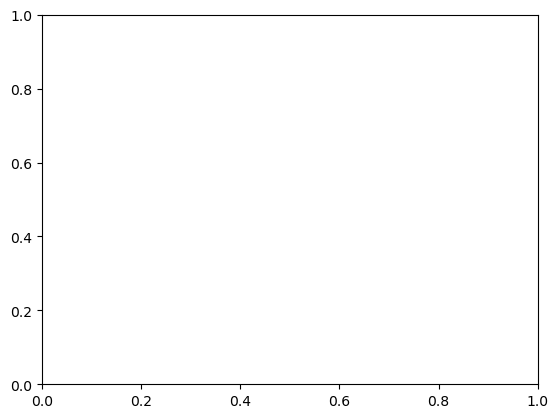

In [8]:
def exponential_growth(x, alpha):
    return (-alpha*x)
    
#sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.4, color="orange", label="$p_{succ, quadratic}$ Spread")

print(len(experiment_3_4_average))
print(len(experiment_3_9_average))

x_data = np.arange(4, 16+1, step=2)
y_data_1 = np.log2(experiment_1_9_average[:7])
y_data_2 = np.log2(experiment_3_4_average)

tidy_data = pd.DataFrame({
        'Point': np.repeat(x_data, len(experiment_3_4_spread[0])),
        'Value': np.concatenate(np.log2(experiment_3_4_spread))
    })

# Errors:
y_means = np.log2(np.average((experiment_3_4_spread), axis=1))
y_errors = np.log2(np.std(np.log2(experiment_3_4_spread), axis=1))
y_means2 = np.log2(np.average((experiment_1_9_spread[:7]), axis=1))
y_errors2 = np.log2(np.std(np.log2(experiment_1_9_spread[:7]), axis=1))
plt.errorbar(np.arange(4, 16+1, 2), y_means, yerr=y_errors, color="red", linestyle="", label='$p_{succ, quadratic}$ standard deviation')
#plt.errorbar(np.arange(4, 14+2, 2), y_means2, yerr=y_errors2, color="blue", linestyle="", label='$p_{succ, cubic}$ standard deviation')

# Plot the sample data
plt.scatter(x_data, y_data_1, label='Average $p_{succ, cubic}$')
plt.scatter(x_data, y_data_2, label='Average $p_{succ, quadratic}$', color="red")

# Perform the curve fitting
popt_1, pcov_1 = curve_fit(exponential_growth, x_data, y_data_1, p0=[0])

alpha_opt_1 = popt_1

param_errors_1 = np.sqrt(np.diag(pcov_1))

popt_2, pcov_2 = curve_fit(exponential_growth, x_data, y_data_2, p0=[0])

alpha_opt_2 = popt_2

param_errors_2 = np.sqrt(np.diag(pcov_2))

# Generate the fitted curve using the optimized parameters
y_fit_1 = exponential_growth(np.arange(4, 15+1), alpha_opt_1)
y_fit_2 = exponential_growth(np.arange(4, 15+1), alpha_opt_2)

# Plot the fitted curve
plt.plot(np.arange(4, 16), y_fit_1, color='blue', label='QAOA cubic', linestyle="--")
plt.plot(np.arange(4, 16), y_fit_2, color='red', label='QAOA quadratic')
print(len(np.arange(4, 14+2, 2)))
print(len([np.log2(1/(2**x)) for x in x_data]))
plt.plot(np.arange(4, 14+2, 2), [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')
#plt.plot(np.arange(min_qubits_num, max_qubits_num+2, 2), [np.log2(1/(2**x)) for x in np.arange(min_qubits_num, max_qubits_num+2, 2)], color='blue', label='Random Guess')

plt.xlabel('Qubit number')
plt.xticks(np.arange(4, 14+2, 2))
plt.ylabel('$log_2(p_{succ})$')
plt.title('Quadratic QAOA scaling')
plt.legend()
plt.grid()
plt.show()
print("Cubic:")
print(f"Alpha: {alpha_opt_1}, Error: {param_errors_1}")
print("Quadratic:")
print(f"Alpha: {alpha_opt_2}, Error: {param_errors_2}")

## Comparing vqe quadratic vs cubic

Aim: find whether performance of cubic or quadratic is better on problems up to and including 10
Conclusion: if any qubits are introduced, performance immediately worse than cubic

In [6]:
cubic_results = [(0.8000000000000002, [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0]], [[1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 
0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 
1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 
1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 
0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], 
[1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0], [1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0]], [[1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], 
[1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0]]]), (0.7333333333333334, [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 
0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 
0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0], [1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0]], [[1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 
1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 
1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 
1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 
1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 
1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 
1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 
1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 
1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 
1.0]]]), (0.6417122395833333, [[[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 
0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 
0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], 
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.502734375, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0]], [[0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 
1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], 
[0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0]]]), (0.43337239583333337, [[[0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 
0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 
1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0]], [[1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 
1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 
1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 
1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 1.0, 0.5033203125, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.4990234375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0]], [[0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0]]])]

quadratic_results = [(0.7833333333333333, [[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
1.0]], [[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 
1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], 
[1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0]], [[0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 
1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 
0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]]), (0.4833333333333334, [[[1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0]], [[1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 
1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 
1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0], [1.0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]), (0.7346875, [[[0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 
0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 
0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0], [0, 0, 1.0, 0, 1.0, 0, 0.08125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0]], [[0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 
0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0], [0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0]], [[1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 
1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]]), (0.36684082031250004, [[[0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0], [0, 1.0, 1.0, 0, 0.010546875, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0]], [[1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
[1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 
0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.99990234375, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0]]])]

C:\Users\Alexander's Laptop\AppData\Local\Temp\ipykernel_1864\3078486268.py:27: RuntimeWarning: divide by zero encountered in log2
  y_means = np.log2(np.average((cubic_spread), axis=1))
C:\Users\Alexander's Laptop\AppData\Local\Temp\ipykernel_1864\3078486268.py:28: RuntimeWarning: divide by zero encountered in log2
  y_errors = np.log2(np.std(np.log2(cubic_spread), axis=1))


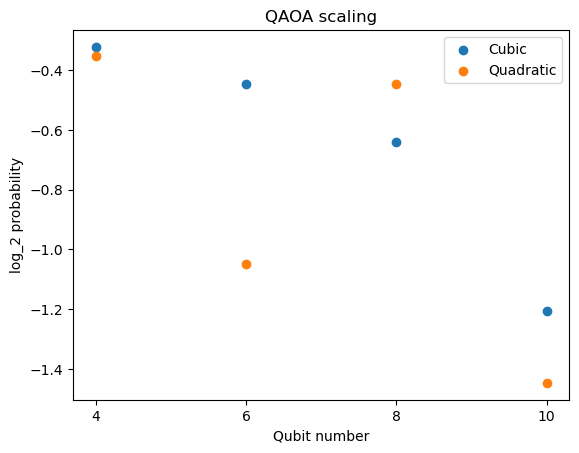

In [11]:
cubic_averages = [x for (x, y) in cubic_results]
quadratic_averages = [x for (x, y) in quadratic_results]

cubic_spread = [y for (x, y) in cubic_results]
quadratic_spread = [y for (x, y) in quadratic_results]

min_qubits_num = 4
max_qubits_num = 10
x_data = np.arange(min_qubits_num, max_qubits_num+2, step=2)
y_data = np.log2(cubic_averages)

# Plot the sample data
plt.scatter(x_data, y_data, label='Cubic')

x_data_quad = np.arange(min_qubits_num, max_qubits_num+2, step=2)
y_data_quad = np.log2(quadratic_averages)

plt.scatter(x_data, y_data_quad, label='Quadratic')

# Perform the curve fitting
# popt, pcov = curve_fit(exponential_growth, x_data, y_data, p0=[0])

# alpha_opt = popt

# param_errors = np.sqrt(np.diag(pcov))

y_means = np.log2(np.average((cubic_spread), axis=1))
y_errors = np.log2(np.std(np.log2(cubic_spread), axis=1))
#plt.errorbar(np.arange(min_qubits_num, max_qubits_num+2, 2), y_means, yerr=y_errors, color="blue", linestyle="", label='Data with Error Bars')

# Generate the fitted curve using the optimized parameters
#y_fit = exponential_growth(np.arange(min_qubits_num, max_qubits_num+2), alpha_opt)

# Plot the fitted curve
#plt.plot(np.arange(min_qubits_num, max_qubits_num+2), y_fit, color='red', label='QAOA')
#plt.plot(np.arange(min_qubits_num, max_qubits_num+2, 2), [np.log2(1/(2**x)) for x in np.arange(min_qubits_num, max_qubits_num+2, 2)], color='blue', label='Random Guess')

plt.xlabel('Qubit number')
plt.xticks(np.arange(min_qubits_num, max_qubits_num+2, 2))
plt.ylabel('log_2 probability')
plt.title('QAOA scaling')
plt.legend()
plt.show()
#print(alpha_opt)
#print(param_errors)

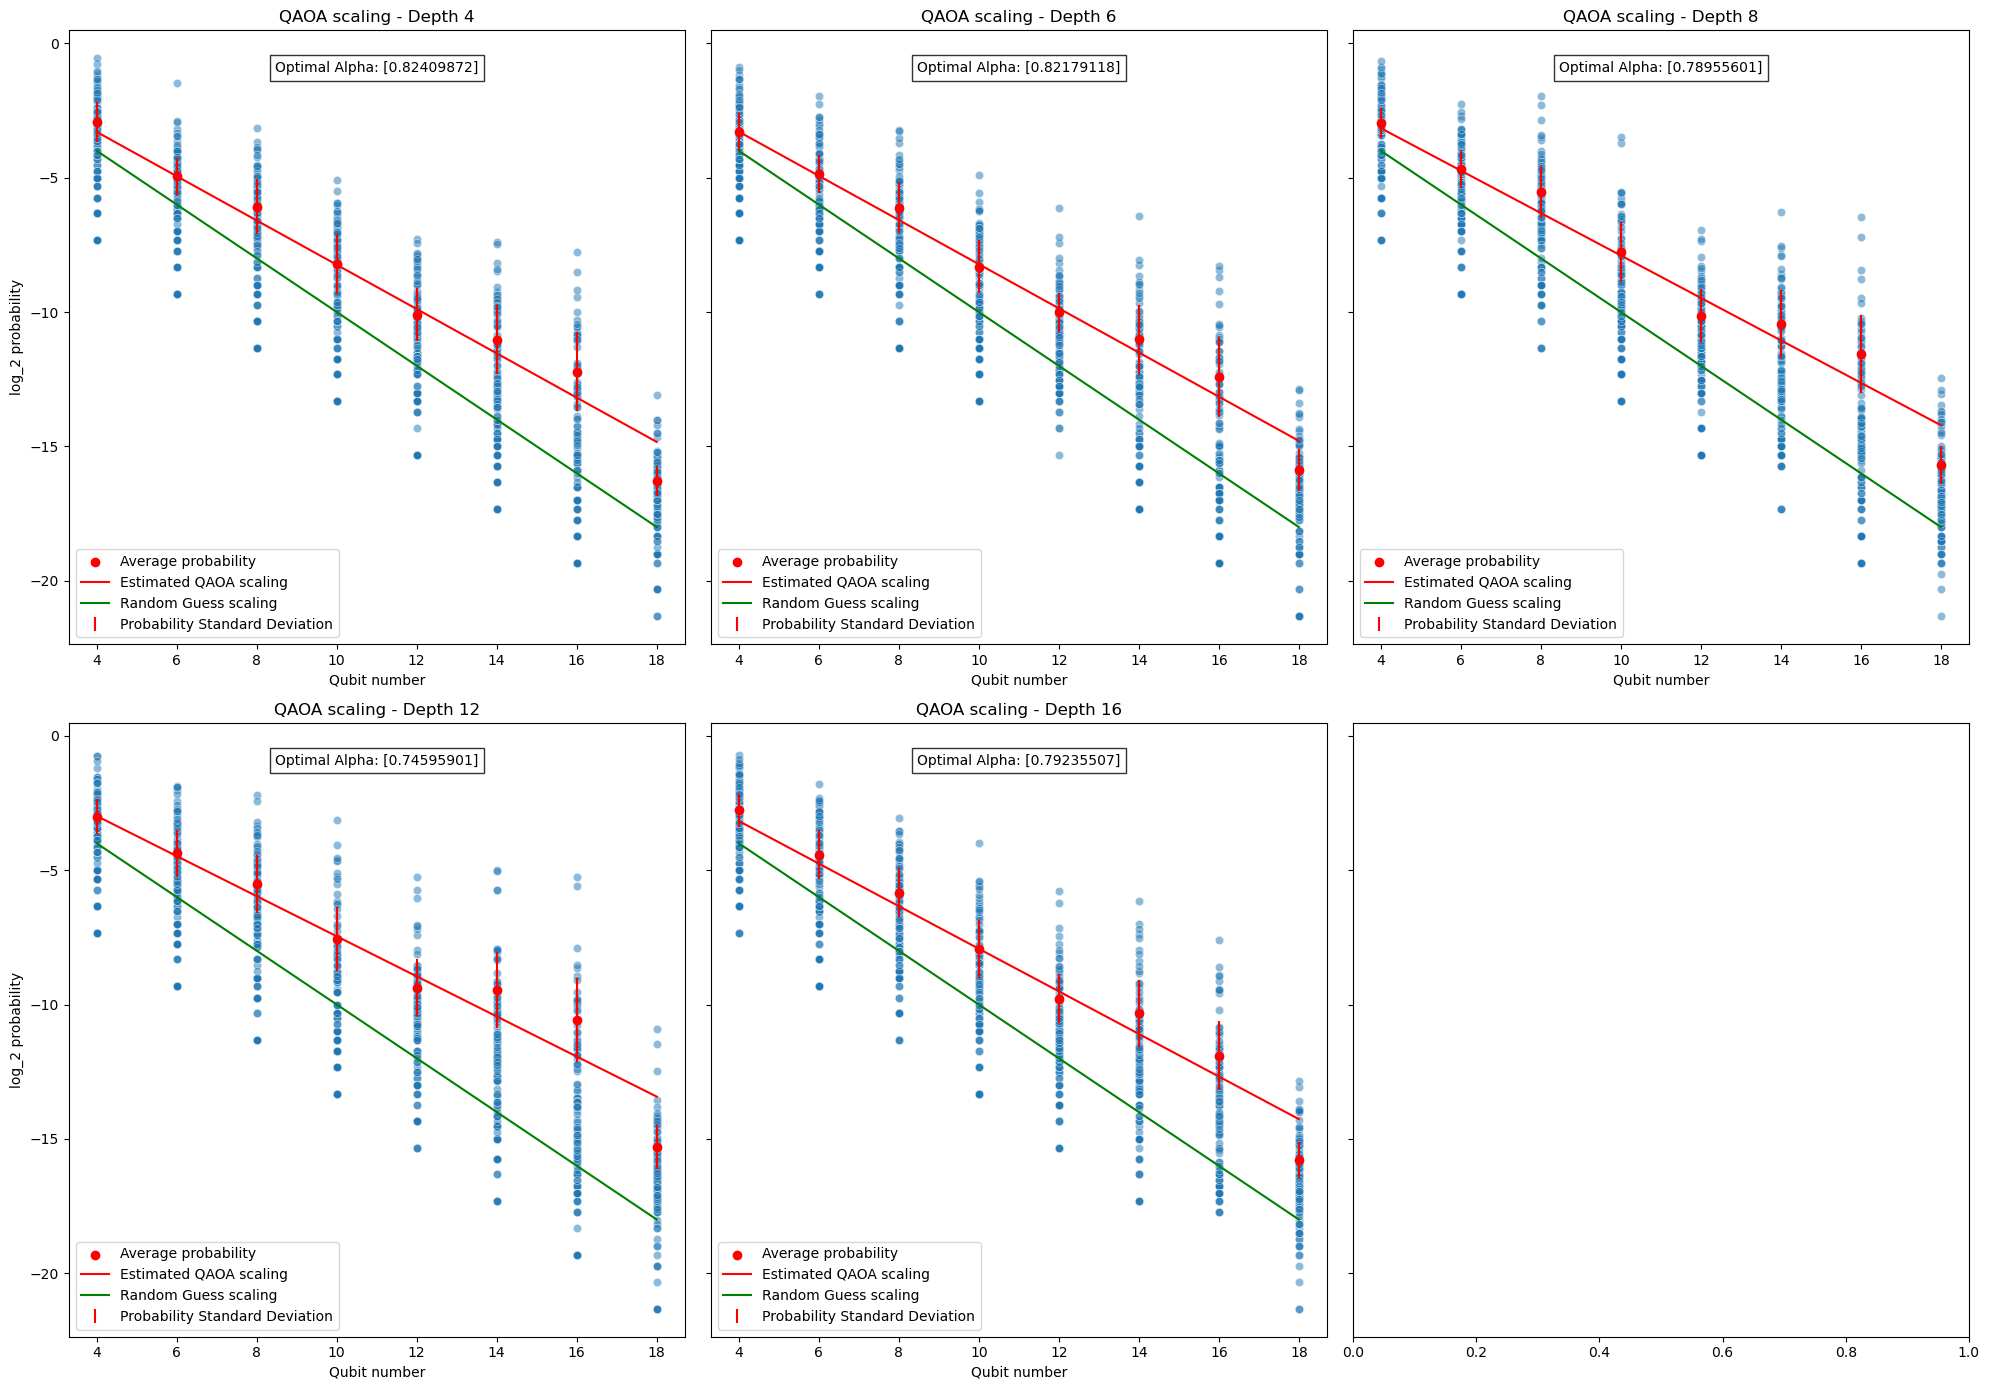

[0.79235507]
[0.02267897]


In [65]:
import numpy as np
from numpy import array
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Don't forget to import pandas

# Visualize curves script:
def visualize_experiment_2(averages_list, spread_list, max_qubits_num, min_qubits_num=4):
    def exponential_growth(x, alpha):
        return (-alpha*x)

    qubit_nums = [4, 6, 8, 10, 12, 14, 16, 18, 21]
    depths = [4, 6, 8, 12, 16]

    fig, axs = plt.subplots(2, 3, figsize=(20, 14), sharey=True)  # Create a 1x5 grid of subplots

    for i in range(2):
        for j in range(3):
            idx = i * 3 + j
            if idx >= len(averages_list):
                break
            
            averages = averages_list[idx]
            spread = spread_list[idx]

            x_data = [x for x in qubit_nums if (x >= min_qubits_num and x <= max_qubits_num)]  # np.arange(min_qubits_num, max_qubits_num+2, step=2)
            y_data = np.log2(averages)

            tidy_data = pd.DataFrame({
                'Point': np.repeat(x_data, len(spread[0])),
                'Value': np.concatenate(np.log2(spread))
            })

            sns.scatterplot(x='Point', y='Value', data=tidy_data, alpha=0.5, ax=axs[i, j])

            # Plot the sample data
            axs[i, j].scatter(x_data, y_data, label='Average probability', color='red')

            # Perform the curve fitting
            popt, pcov = curve_fit(exponential_growth, x_data, y_data, p0=[0])

            alpha_opt = popt

            param_errors = np.sqrt(np.diag(pcov))

            y_means = np.log2(np.average((spread), axis=1))
            y_errors = np.log2(np.std(np.log2(spread), axis=1))
            axs[i, j].errorbar(x_data, y_means, yerr=y_errors, color="red", linestyle="", label='Probability Standard Deviation')

            # Generate the fitted curve using the optimized parameters
            y_fit = exponential_growth(x_data, alpha_opt)

            # Plot the fitted curve
            axs[i, j].plot(x_data, y_fit, color='red', label='Estimated QAOA scaling')
            axs[i, j].plot(x_data, [np.log2(1/(2**x)) for x in x_data], color='green', label='Random Guess scaling')

            axs[i, j].set_xlabel('Qubit number')
            axs[i, j].set_xticks(np.arange(min_qubits_num, max_qubits_num+2, 2))
            axs[i, j].set_ylabel('log_2 probability')
            axs[i, j].set_title(f'QAOA scaling - Depth {depths[idx]}')
            axs[i, j].legend(loc="lower left")
            
            # Display the optimized alpha value as text
            axs[i, j].text(0.5, 0.95, f'Optimal Alpha: {alpha_opt}', transform=axs[i, j].transAxes,
               fontsize=10, va='top', ha='center', bbox=dict(facecolor='white', alpha=0.8))


    plt.tight_layout()
    plt.show()
    print(alpha_opt)
    print(param_errors)
    
averages_list = [experiment_1_1_average, experiment_1_3_average, experiment_1_5_average, experiment_1_6_average, experiment_1_8_average]
spreads_list = [experiment_1_1_spread, experiment_1_3_spread, experiment_1_5_spread, experiment_1_6_spread, experiment_1_8_spread]

visualize_experiment(averages_list=averages_list, spread_list=spreads_list, max_qubits_num=18)